In [1]:
import networkx as nx

from fair_cc_functions import *
import matplotlib.pyplot as plt
import numpy as np

nodes = [i for i in range(10, 61, 2)]
iters = 100

In [2]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def stats_complete(unfair_graph):
    stats = []
    nodes = len(unfair_graph.nodes)
    if nodes < 4: return -1
    fairlets = create_fairlets(unfair_graph)
    fair_graph = nx.Graph()
    fair_graph.add_nodes_from(fairlets)
    fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
    fair_graph.add_weighted_edges_from(fair_p)
    fair_graph.add_weighted_edges_from(fair_m)
    fair_cluster = cc_pivot(fair_graph)
    costs = cost(fair_cluster, unfair_graph)
    stats.append(costs)
    return stats

def stats_incomplete(unfair_graph, iteration=10):
    stats = []
    nodes = len(unfair_graph.nodes())
    if nodes < 4: return -1
    for j in range(iteration):
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations_incomplete(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        fair_cluster = cc_pivot(fair_graph)
        costs = cost(fair_cluster, unfair_graph)
        stats.append(costs)
    return stats

# random vs. random plot
plt.rc('font', size=11)
def draw_boxplot(to_plot,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):

    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([i/(j) for i,j in zip(to_plot, np.min(to_plot, axis=1))], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()

In [3]:
# stats for scenario 1
# always same costs as already optimal
res0 = []
for i in range(10, 61, 2):
    unfair_graph = generate_complete_graph(i)
    res0.append(stats_complete(unfair_graph))
max_calc_cost = [i*i/4 for i in nodes]

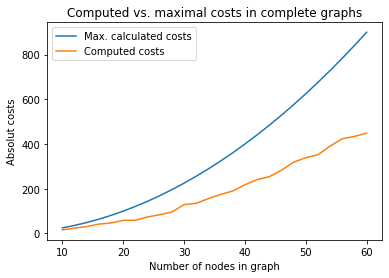

In [4]:
plt.plot(nodes, max_calc_cost, label='Max. calculated costs')
plt.plot(nodes, res0, label='Computed costs')
plt.ylabel('Absolut costs')
plt.xlabel('Number of nodes in graph')
plt.title('Computed vs. maximal costs in complete graphs')
plt.legend()
plt.savefig('../comp_vs_calc_cost_complete_graph.png')
plt.savefig('CompleteGraphsPlots/comp_vs_calc_cost_complete_graph.png')
plt.show()

In [5]:
# similar density of incomplete graphs
# probability for (+), resp. (-), is 0.5 in red and blue subgraphs => expected same density
rnd_rnd = []
for i in range(10, 61, 2):
    unfair_graph = generate_incomplete_graph(i)
    stat = stats_incomplete(unfair_graph, iteration=iters)
    rnd_rnd.append(stat)

In [6]:
# red/blue subgraphs are both sparse (regarding (+) relations)
tree_tree, tree_star, star_star, cyc_cyc = [], [], [], []
cyc_star, cyc_tree = [],[]
for i in range(10, 61, 2):
    tree_tree_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'bal_bin_tree')
    tree_tree.append(stats_incomplete(tree_tree_graph, iteration=iters))


In [7]:
for i in range(10, 61,2):
    tree_star_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'star')
    tree_star.append(stats_incomplete(tree_star_graph, iteration=iters))


In [8]:
for i in range(10, 61, 2):
    star_star_graph, b,r = generate_red_blue_graph(i, 'star', 'star')
    star_star.append(stats_incomplete(star_star_graph, iteration=iters))


In [9]:
for i in range(10, 61, 2):
    cyc_cyc_graph, b, r = generate_red_blue_graph(i, 'circle', 'circle')
    cyc_cyc.append(stats_incomplete(cyc_cyc_graph, iteration=iters))


In [10]:
for i in range(10, 61, 2):
    cyc_star_graph, b, r = generate_red_blue_graph(i, 'circle', 'star')
    cyc_star.append(stats_incomplete(cyc_star_graph, iteration=iters))


In [11]:
for i in range(10, 61, 2):
    cyc_tree_graph, b, r = generate_red_blue_graph(i, 'circle', 'bal_bin_tree')
    cyc_tree.append(stats_incomplete(cyc_tree_graph, iteration=iters))


In [12]:
# red/blue subgraphs are both dense (regarding (+) relations)
bipar_bipar =[]
bipar_3par = []
threepar_3par = []
for i in range(10, 61, 2):
    bipar_bipar_grap, b, r  = generate_red_blue_graph(i, 'bipartite', 'bipartite')
    bipar_bipar.append(stats_incomplete(bipar_bipar_grap, iteration=iters))


In [13]:
for i in range(10, 61, 2):
    bipar_3par_graph, b, r = generate_red_blue_graph(i, 'bipartite', '3partite')
    bipar_3par.append(stats_incomplete(bipar_3par_graph, iteration=iters))


In [14]:
for i in range(10, 61, 2):
    threepar_3par_graph, b, r = generate_red_blue_graph(i, '3partite', '3partite')
    threepar_3par.append(stats_incomplete(threepar_3par_graph, iteration=iters))
    # clique_clique_graph = generate_red_blue_graph(i, 'clique', 'clique')
    # clique_clique.append(stats_incomplete(clique_clique_graph, iteration=50))
    # bipar_clique_graph = generate_red_blue_graph(i, 'clique', 'bipartite')
    # bipar_clique.append(stats_incomplete(bipar_clique_graph, iteration=50))

In [15]:
erd_ren09 = []
for i in range(10, 61, 2):
    erd_ren_graph, b, r = generate_red_blue_graph(i, 'erdos_renyi', 'erdos_renyi', p1 = 0.9, p2=0.9)
    erd_ren09.append(stats_incomplete(erd_ren_graph, iteration=iters))
erd_ren07 = []
for i in range(10, 61, 2):
    erd_ren_graph, b, r = generate_red_blue_graph(i, 'erdos_renyi', 'erdos_renyi')
    erd_ren07.append(stats_incomplete(erd_ren_graph, iteration=iters))

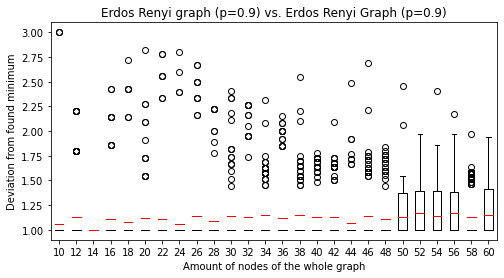

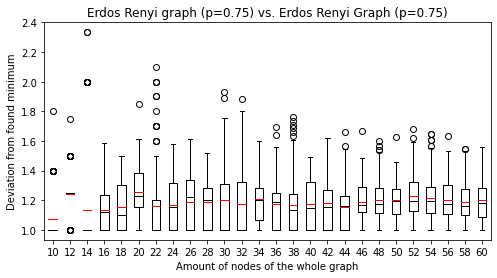

In [16]:
draw_boxplot(erd_ren09, 'Erdos Renyi graph (p=0.9) vs. Erdos Renyi Graph (p=0.9)', name='erd_ren_09')
draw_boxplot(erd_ren07, 'Erdos Renyi graph (p=0.75) vs. Erdos Renyi Graph (p=0.75)', name='erd_ren_07')

In [17]:
# red/blue subgraph are dense/sparse (regarding + relations)
tree_bipar, star_bipar, cyc_bipar = [], [], []
tree_3par, star_3par, cyc_3par = [],[],[]
for i in range(10, 61, 2):
    tree_bipar_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'bipartite')
    tree_bipar.append(stats_incomplete(tree_bipar_graph, iteration=iters))


In [18]:
for i in range(10, 61, 2):
    star_bipar_graph, b, r = generate_red_blue_graph(i, 'star', 'bipartite')
    star_bipar.append(stats_incomplete(star_bipar_graph, iteration=iters))


In [19]:
for i in range(10, 61, 2):
    cyc_bipar_graph, b, r = generate_red_blue_graph(i, 'circle', 'bipartite')
    cyc_bipar.append(stats_incomplete(cyc_bipar_graph, iteration=iters))


In [20]:
for i in range(10, 61, 2):
    tree_3par_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', '3partite')
    tree_3par.append(stats_incomplete(tree_3par_graph, iteration=iters))


In [21]:
for i in range(10, 61, 2):
    star_3par_graph , b, r= generate_red_blue_graph(i, 'star', '3partite')
    star_3par.append(stats_incomplete(star_3par_graph, iteration=iters))


In [22]:
for i in range(10, 61, 2):
    cyc_3par_graph, b, r = generate_red_blue_graph(i, 'circle', '3partite')
    cyc_3par.append(stats_incomplete(cyc_3par_graph, iteration=iters))


In [3]:
def draw_multi_boxplot(to_plot,
                       title='Title',
                       ylabel ='Deviation from found minimum',
                       xlabel='Amount of nodes of the whole graph',
                       name='boxplot'
                        ):
    plt.rc('font', size=18)
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    n_plots = len(to_plot)
    positions = [-0.3, 0, 0.3]
    colors=['black', 'blue', 'green']
    for i in range(n_plots):
        draw_plot(to_plot[i], ax, positions[i], colors[i], 'white', title, ylabel, xlabel)
    plt.xticks([i for i in range(len(nodes))], nodes)
    # plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()


# function to get multiple boxplots as one figure
def draw_plot(data, ax, offset, edge_color, fill_color, title, ylabel, xlabel):
    pos = np.arange(len(data))+offset
    bp = ax.boxplot([(i-j)/(k-j) for i,j,k in zip(data, np.min(data, axis=1), 3*np.min(data, axis=1))], positions= pos, widths=0.2, patch_artist=True,
                    showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'}, flierprops={'markeredgecolor':edge_color})
    for element in ['boxes', 'whiskers', 'fliers', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)


In [32]:
#data = [cyc_cyc, star_star, tree_star, cyc_star, tree_tree, cyc_tree, bipar_bipar, bipar_3par, threepar_3par, cyc_bipar, cyc_3par, tree_bipar, tree_3par, star_bipar, star_3par, erd_ren09, erd_ren07]
names = ['cyc_cyc', 'star_star', 'tree_star', 'cyc_star', 'tree_tree', 'cyc_tree', 'bipar_bipar', 'bipar_3par', 'threepar_3par', 'cyc_bipar', 'cyc_3par', 'tree_bipar', 'tree_3par', 'star_bipar', 'star_3par', 'erdos_ren_09', 'erdos_ren_075']
max=0
max_mean = 0

max_p=0
max_mean_p = 0
print(len(data_puzzle))
print(len(data))

for i in range(len(data[:-2])):
    scaled1 = [i for i,j,k in zip(data[i], np.min(data[i]+data_puzzle[i], axis=1), 3*np.min(data[i], axis=1))]
    scaled2 = [i for i,j in zip(data_puzzle[i], np.min(data[i]+data_puzzle[i], axis=1))]
    if np.max(scaled1) > max: max = np.max(scaled1)
    if np.max(scaled2) > max_p: max_p = np.max(scaled2)
    if np.max(np.mean(scaled1, axis=1)) > max_mean: max_mean = np.max(np.mean(scaled1, axis=1))
    if np.max(np.mean(scaled2, axis=1)) > max_mean_p : max_mean_p = np.max(np.mean(scaled2, axis=1))
    mins_fairlet = np.min(scaled1, axis=1)
    mins_puzzle = np.min(scaled2, axis=1)
    #means = np.mean(scaled, axis=1)
    print(names[i]+'(max/mean for fairlet):' + str(np.max(scaled1)) + '/'+str(np.max(np.mean(scaled1, axis=1))))
    print(names[i]+'(max/mean for puzzle):'+str(np.max(scaled2))+'/'+str(np.max(np.mean(scaled2, axis=1))))
    print('Min compare:', [np.sign(i-j) for i,j in zip(mins_fairlet, mins_puzzle)])
    print()
i=15
scaled1 = [i for i,j,k in zip(data[i+1], np.min(data[i+1]+data_puzzle[i], axis=1), 3*np.min(data[i+1], axis=1))]
scaled2 = [i for i,j in zip(data_puzzle[i], np.min(data[i+1]+data_puzzle[i], axis=1))]
if np.max(scaled1) > max: max = np.max(scaled1)
if np.max(scaled2) > max_p: max_p = np.max(scaled2)
if np.max(np.mean(scaled1, axis=1)) > max_mean: max_mean = np.max(np.mean(scaled1, axis=1))
if np.max(np.mean(scaled2, axis=1)) > max_mean_p : max_mean_p = np.max(np.mean(scaled2, axis=1))
mins_fairlet = np.min(scaled1, axis=1)
mins_puzzle = np.min(scaled2, axis=1)
#means = np.mean(scaled, axis=1)
print(names[i+1]+'(max/mean for fairlet):' + str(np.max(scaled1)) + '/'+str(np.max(np.mean(scaled1, axis=1))))
print(names[i+1]+'(max/mean for puzzle):'+str(np.max(scaled2))+'/'+str(np.max(np.mean(scaled2, axis=1))))
print('Min compare:', [np.sign(i-j) for i,j in zip(mins_fairlet, mins_puzzle)])
print()
print(max)
print(max_mean)
print(max_p)
print(max_mean_p)

# star_opt(max/mean/amt > 1):14.0/1.4699565217391304/23
# cyc_opt(max/mean/amt > 1):3.25/2.2146/4
# tree_opt(max/mean/amt > 1):3.857142857142857/2.2398/22

16
17
cyc_cyc(max/mean for fairlet):60/55.76
cyc_cyc(max/mean for puzzle):66/42.72
Min compare: [0, -1, 0, -1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

star_star(max/mean for fairlet):702/58.5
star_star(max/mean for puzzle):814/131.8
Min compare: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

tree_star(max/mean for fairlet):58/56.16
tree_star(max/mean for puzzle):814/151.84
Min compare: [0, -1, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

cyc_star(max/mean for fairlet):59/57.08
cyc_star(max/mean for puzzle):815/213.46
Min compare: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

tree_tree(max/mean for fairlet):58/54.08
tree_tree(max/mean for puzzle):262/63.83
Min compare: [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

cyc_tree(max/mean for fairlet):59/55.36
cyc_tree(max/mean for puzzle):301/81.2

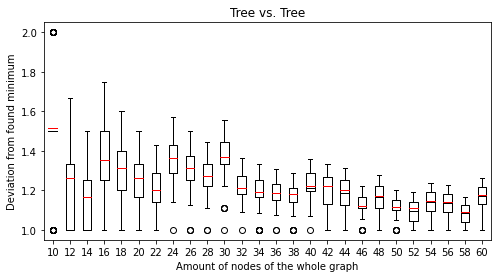

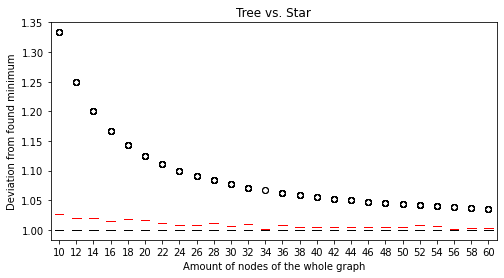

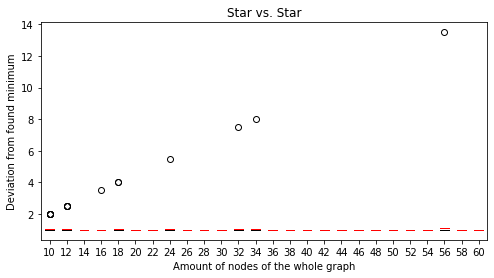

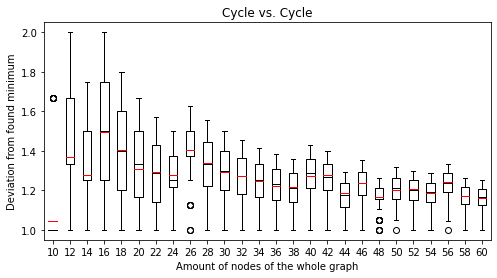

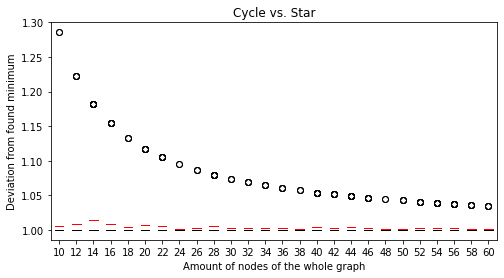

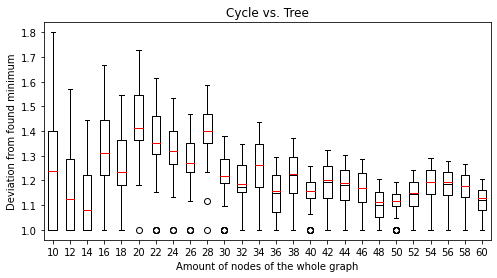

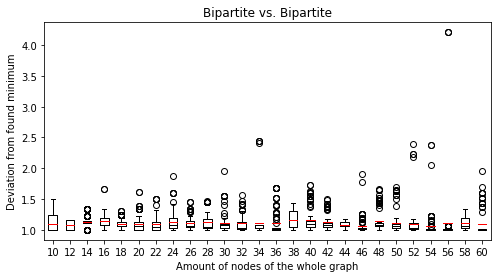

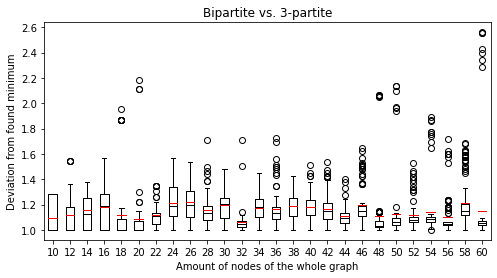

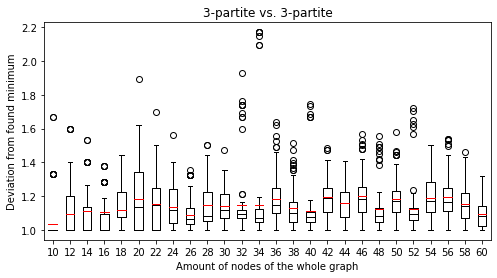

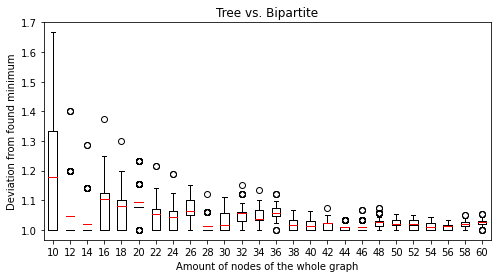

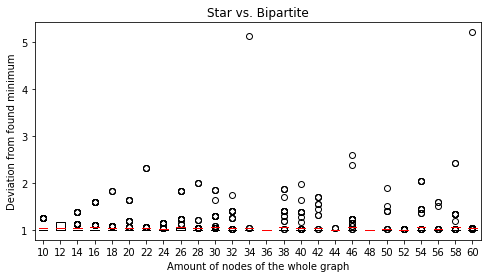

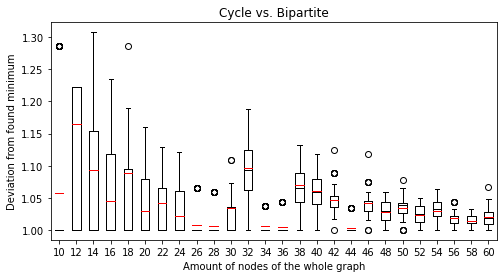

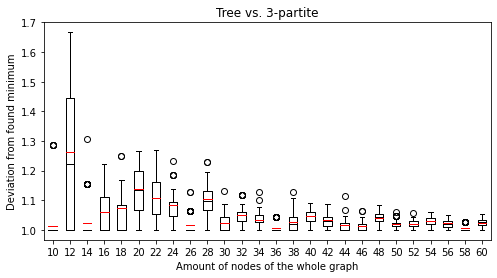

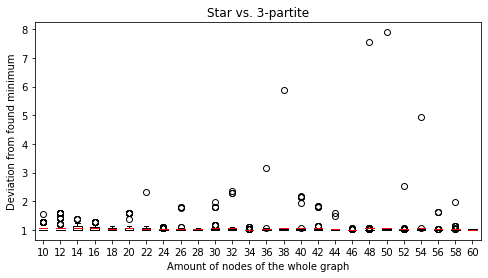

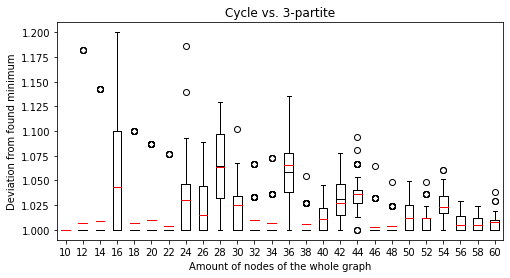

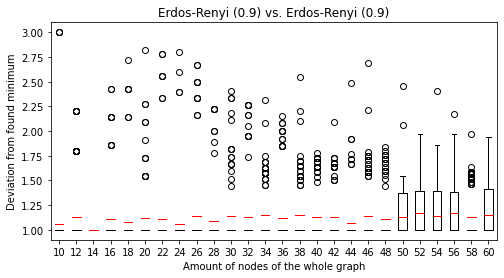

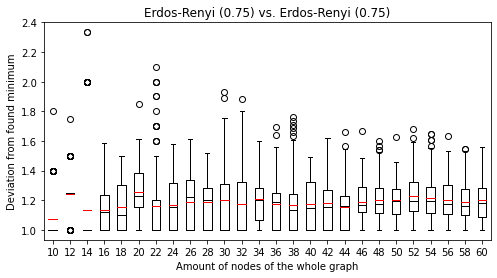

In [24]:
# draw_boxplot(, 'Random vs. random', name='random_random.png')
draw_boxplot(data[4], "Tree vs. Tree", name='tree_tree')
draw_boxplot(data[2], 'Tree vs. Star', name='tree_star')
draw_boxplot(data[1], 'Star vs. Star', name='star_star')
draw_boxplot(data[0], 'Cycle vs. Cycle', name='cyc_cyc')
draw_boxplot(data[3], 'Cycle vs. Star', name='cyc_star')
draw_boxplot(data[5], "Cycle vs. Tree", name='cyc_tree')
draw_boxplot(data[6], 'Bipartite vs. Bipartite', name='bipar_bipar')
draw_boxplot(data[7], 'Bipartite vs. 3-partite', name='bipar_3par')
draw_boxplot(data[8], '3-partite vs. 3-partite', name='threepar_threepar')
draw_boxplot(data[11], "Tree vs. Bipartite", name ='tree_bipar')
draw_boxplot(data[13], 'Star vs. Bipartite', name='star_bipar')
draw_boxplot(data[9], "Cycle vs. Bipartite", name='cyc_bipar')
draw_boxplot(data[12], 'Tree vs. 3-partite', name='tree_3par')
draw_boxplot(data[14], 'Star vs. 3-partite', name='star_3par')
draw_boxplot(data[10], "Cycle vs. 3-partite", name='cyc_3par')
draw_boxplot(data[15], 'Erdos-Renyi (0.9) vs. Erdos-Renyi (0.9)', name='erd_ren_09')
draw_boxplot(data[16], 'Erdos-Renyi (0.75) vs. Erdos-Renyi (0.75)', name='erd_ren_07')

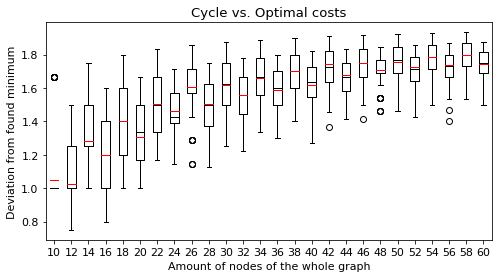

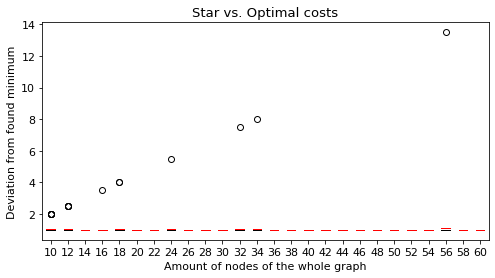

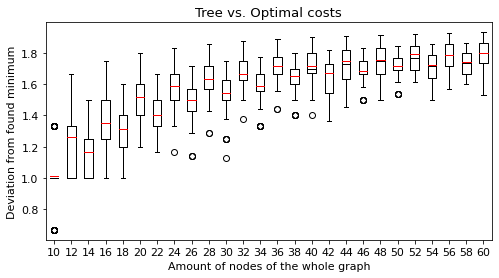

In [25]:
# random vs. random plot
plt.rc('font', size=11)
def boxplot_vs_opt(to_plot, opt,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):
    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([i/j for i,j in zip(to_plot, opt)], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()

tree_tree = data[4]
star_star = data[1]
cyc_cyc = data[0]
opt_star = [np.float64(i-4) for i in range(10,61,2)]
opt_cyc = [2*(np.floor((j/2)/2)+1) for j in range(10,61,2)]
opt_tree = [2*(np.floor((j/2)/2)+ (j/2) % 2) for j in range (10, 61, 2)]

boxplot_vs_opt(cyc_cyc, opt_cyc, 'Cycle vs. Optimal costs', name='cyc_opt')
boxplot_vs_opt(star_star, opt_star, 'Star vs. Optimal costs', name='star_opt')
boxplot_vs_opt(tree_tree, opt_tree, 'Tree vs. Optimal costs', name='tree_opt')

In [26]:
names_opt = ['star_opt', 'cyc_opt', 'tree_opt']
for i in range(len([star_star, cyc_cyc, tree_tree])):
    scaled = [i/j for i,j in zip([star_star, cyc_cyc, tree_tree][i], [opt_star, opt_cyc, opt_tree][i])]
    if np.max(scaled) > max: max = np.max(scaled)
    if np.max(np.mean(scaled, axis=1)) > max_mean: max_mean = np.max(np.mean(scaled, axis=1))
    if np.sum(np.max(scaled, axis=1)>3) > max_amt: max_amt = np.sum(np.max(scaled, axis=1)>3)
    print(names_opt[i]+'(max/mean/amt > 1):' + str(np.max(scaled)) + '/'+str(np.max(np.mean(scaled, axis=1)))+'/'+str(np.sum(np.max(scaled, axis = 1)>3)))

star_opt(max/mean/amt > 1):13.5/1.125/6
cyc_opt(max/mean/amt > 1):1.9333333333333333/1.7980000000000005/0
tree_opt(max/mean/amt > 1):1.9333333333333333/1.802666666666667/0


In [32]:
for i in range(len(data_puzzle)):
     print(names[i])
     print([np.sign(i-j) for i,j in zip(np.mean(data_puzzle[i], axis=1), np.mean(data[i], axis=1))])
     print([np.sign(i-j) for i,j in zip(np.max(data_puzzle[i], axis=1), np.max(data[i], axis=1))])

cyc_cyc
[-1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[-1, -1, -1, 0, -1, -1, -1, 1, -1, 0, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1]
star_star
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tree_star
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
cyc_star
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tree_tree
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [30]:
f = open('res.txt', 'w')
f.write(str(data))
f.close()

In [5]:
data_puzzle = [[[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [8, 10, 8, 8, 10, 10, 8, 8, 8, 10, 8, 8, 10, 10, 10, 10, 10, 8, 8, 8, 10, 8, 10, 10, 10, 10, 10, 8, 8, 10, 10, 10, 8, 10, 8, 8, 8, 10, 10, 10, 10, 8, 8, 8, 10, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 8, 8, 8, 10, 8, 10, 8, 10, 10, 10, 10, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8], [10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 8, 10, 10, 8, 8, 8, 10, 8, 8, 10, 10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 8, 10, 10, 10, 8, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 8, 10, 8, 10, 8, 10, 10, 10, 10, 8, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10], [12, 10, 10, 16, 10, 12, 14, 14, 14, 12, 14, 10, 12, 12, 16, 16, 10, 14, 12, 14, 10, 16, 14, 10, 10, 14, 10, 10, 10, 14, 10, 16, 14, 16, 16, 12, 10, 12, 14, 10, 14, 14, 10, 14, 12, 10, 12, 14, 10, 16, 10, 16, 10, 14, 10, 12, 10, 12, 12, 10, 12, 10, 12, 12, 12, 12, 16, 14, 10, 14, 14, 12, 16, 10, 12, 10, 14, 16, 14, 12, 14, 10, 12, 14, 12, 16, 14, 14, 10, 12, 16, 12, 14, 14, 10, 12, 12, 14, 12, 10], [14, 12, 12, 12, 14, 12, 16, 12, 16, 16, 14, 12, 14, 16, 16, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 16, 14, 12, 12, 12, 12, 16, 16, 14, 12, 16, 12, 12, 14, 14, 12, 12, 14, 12, 14, 16, 12, 12, 12, 12, 12, 12, 14, 14, 14, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 12, 12, 12, 16, 12, 12, 12], [14, 14, 14, 16, 12, 16, 16, 18, 18, 16, 16, 14, 12, 14, 16, 16, 16, 12, 12, 18, 14, 18, 18, 14, 18, 16, 14, 16, 12, 18, 16, 14, 16, 12, 16, 18, 16, 14, 14, 14, 12, 16, 16, 16, 16, 18, 12, 14, 14, 14, 12, 14, 18, 12, 16, 14, 14, 18, 12, 14, 16, 14, 16, 12, 16, 12, 16, 14, 14, 14, 16, 16, 12, 14, 16, 16, 14, 16, 14, 14, 18, 16, 14, 12, 12, 12, 12, 12, 12, 16, 14, 16, 16, 16, 16, 12, 18, 16, 14, 12], [18, 14, 14, 16, 18, 14, 14, 14, 14, 18, 16, 16, 16, 18, 18, 16, 18, 14, 16, 18, 14, 18, 14, 16, 18, 14, 18, 14, 18, 14, 16, 14, 14, 18, 16, 16, 16, 18, 14, 14, 18, 18, 16, 14, 20, 16, 14, 20, 14, 16, 20, 18, 16, 14, 14, 18, 14, 14, 16, 20, 16, 14, 18, 16, 18, 14, 14, 16, 14, 14, 14, 14, 14, 16, 16, 14, 14, 18, 14, 14, 14, 16, 14, 18, 14, 20, 18, 14, 16, 16, 14, 14, 14, 14, 18, 20, 18, 18, 16, 16], [20, 20, 20, 18, 18, 16, 16, 16, 16, 14, 16, 16, 20, 18, 16, 20, 16, 18, 16, 16, 18, 16, 14, 20, 18, 16, 16, 18, 22, 20, 20, 20, 18, 16, 16, 16, 18, 14, 18, 20, 20, 16, 20, 18, 20, 18, 16, 20, 20, 20, 16, 18, 16, 14, 16, 18, 36, 16, 20, 20, 18, 16, 22, 16, 20, 20, 18, 20, 20, 20, 18, 16, 16, 16, 20, 16, 16, 16, 18, 16, 18, 18, 16, 16, 22, 20, 18, 18, 18, 16, 20, 20, 14, 20, 16, 20, 18, 18, 20, 18], [18, 22, 16, 22, 20, 18, 18, 16, 20, 16, 20, 20, 20, 20, 18, 20, 16, 20, 20, 20, 18, 22, 22, 20, 20, 20, 20, 20, 22, 20, 16, 18, 22, 20, 20, 18, 22, 22, 16, 18, 20, 20, 18, 18, 22, 22, 18, 18, 20, 22, 18, 20, 22, 18, 20, 18, 18, 22, 20, 16, 20, 20, 16, 16, 20, 20, 18, 20, 16, 20, 22, 18, 16, 18, 18, 22, 20, 22, 18, 20, 20, 20, 16, 16, 18, 20, 18, 22, 20, 16, 18, 16, 22, 16, 16, 20, 20, 20, 20, 20], [16, 20, 18, 22, 22, 20, 16, 22, 18, 20, 22, 22, 22, 16, 18, 18, 22, 20, 18, 24, 22, 20, 18, 22, 18, 20, 18, 20, 18, 24, 18, 20, 18, 24, 22, 18, 16, 18, 22, 18, 26, 18, 22, 18, 22, 18, 24, 22, 22, 20, 22, 22, 24, 20, 22, 18, 20, 22, 24, 18, 24, 24, 16, 20, 18, 18, 18, 20, 20, 22, 18, 22, 18, 20, 22, 22, 18, 22, 24, 20, 24, 22, 24, 16, 18, 22, 20, 20, 18, 20, 22, 18, 22, 18, 18, 20, 20, 18, 20, 28], [20, 22, 22, 24, 22, 22, 22, 24, 22, 24, 24, 22, 20, 18, 22, 20, 18, 22, 24, 20, 24, 24, 20, 24, 22, 20, 24, 24, 24, 24, 24, 20, 20, 24, 20, 24, 22, 24, 18, 22, 22, 18, 24, 22, 22, 20, 22, 26, 20, 24, 22, 24, 20, 24, 24, 24, 24, 26, 20, 20, 24, 22, 22, 26, 22, 20, 22, 20, 24, 24, 18, 20, 24, 22, 22, 24, 22, 22, 22, 24, 22, 22, 20, 24, 24, 18, 24, 24, 24, 22, 20, 22, 18, 24, 22, 22, 24, 24, 22, 22], [48, 24, 22, 20, 26, 28, 20, 24, 22, 24, 24, 20, 20, 26, 22, 28, 24, 22, 22, 44, 28, 24, 22, 20, 24, 24, 20, 22, 22, 26, 22, 20, 24, 24, 22, 22, 20, 24, 24, 26, 24, 24, 24, 22, 22, 24, 22, 22, 20, 28, 22, 22, 22, 20, 22, 22, 24, 24, 22, 24, 24, 20, 26, 20, 22, 24, 26, 22, 22, 22, 26, 24, 22, 20, 22, 20, 24, 20, 22, 24, 22, 22, 26, 24, 24, 26, 24, 24, 24, 22, 24, 26, 24, 22, 46, 24, 20, 24, 20, 24], [24, 26, 26, 22, 26, 22, 26, 22, 24, 28, 22, 24, 28, 22, 26, 24, 22, 22, 22, 28, 26, 26, 24, 28, 26, 26, 28, 26, 26, 22, 22, 24, 26, 22, 28, 24, 24, 22, 28, 24, 22, 24, 28, 26, 24, 24, 26, 26, 22, 22, 26, 30, 26, 24, 26, 24, 26, 22, 28, 22, 26, 22, 28, 22, 24, 26, 24, 24, 26, 22, 26, 26, 24, 22, 24, 26, 22, 22, 28, 26, 22, 26, 22, 24, 26, 22, 26, 26, 26, 24, 26, 26, 26, 22, 26, 26, 26, 26, 28, 22], [26, 28, 26, 28, 28, 26, 24, 32, 26, 26, 30, 30, 28, 28, 26, 22, 24, 28, 28, 28, 26, 24, 26, 28, 28, 26, 24, 26, 22, 30, 26, 24, 26, 26, 28, 26, 24, 26, 26, 26, 24, 28, 28, 26, 28, 28, 26, 28, 28, 28, 26, 24, 28, 28, 26, 28, 30, 28, 26, 28, 28, 28, 22, 28, 28, 26, 28, 28, 32, 26, 28, 24, 26, 26, 24, 26, 34, 24, 28, 22, 28, 26, 28, 24, 26, 28, 28, 24, 28, 26, 28, 26, 24, 24, 26, 22, 26, 24, 26, 28], [44, 28, 30, 30, 24, 28, 28, 28, 28, 26, 28, 30, 28, 28, 28, 28, 24, 24, 28, 26, 26, 28, 26, 26, 28, 24, 24, 28, 30, 28, 28, 30, 30, 28, 28, 28, 50, 28, 28, 26, 24, 28, 28, 28, 24, 28, 28, 30, 28, 28, 30, 24, 28, 30, 24, 30, 24, 28, 28, 26, 28, 26, 28, 28, 28, 26, 26, 30, 28, 30, 24, 28, 32, 26, 30, 30, 28, 28, 30, 28, 24, 28, 28, 30, 28, 28, 24, 28, 30, 24, 30, 30, 26, 24, 28, 28, 28, 32, 26, 28], [28, 30, 28, 30, 30, 28, 30, 30, 30, 26, 32, 30, 26, 28, 30, 30, 34, 28, 30, 28, 30, 26, 26, 30, 32, 30, 30, 28, 28, 28, 24, 26, 32, 32, 26, 30, 32, 30, 28, 28, 26, 26, 30, 26, 32, 26, 32, 28, 28, 26, 30, 28, 30, 26, 30, 28, 26, 30, 24, 30, 26, 26, 36, 30, 30, 28, 34, 30, 30, 32, 32, 28, 26, 28, 30, 26, 30, 28, 28, 28, 30, 26, 30, 26, 26, 26, 24, 28, 30, 28, 28, 28, 32, 30, 30, 26, 32, 30, 32, 28], [32, 32, 32, 30, 36, 34, 30, 30, 34, 28, 28, 32, 30, 28, 32, 28, 30, 32, 30, 32, 30, 26, 32, 28, 32, 30, 28, 34, 32, 28, 30, 30, 32, 30, 32, 30, 28, 32, 32, 30, 30, 30, 26, 30, 28, 28, 32, 36, 26, 28, 32, 26, 34, 32, 30, 34, 28, 28, 28, 32, 30, 34, 34, 26, 26, 32, 30, 32, 30, 30, 30, 30, 32, 30, 28, 30, 34, 32, 28, 32, 32, 30, 30, 38, 30, 32, 30, 32, 30, 30, 30, 32, 36, 30, 30, 34, 32, 34, 32, 30], [32, 40, 32, 30, 28, 32, 34, 32, 28, 34, 32, 30, 32, 34, 32, 34, 32, 32, 32, 32, 32, 28, 30, 32, 34, 36, 30, 30, 34, 32, 34, 32, 30, 30, 32, 30, 28, 52, 30, 34, 34, 28, 28, 28, 30, 38, 34, 32, 34, 32, 32, 32, 32, 32, 32, 36, 32, 28, 30, 34, 28, 40, 34, 28, 32, 30, 32, 32, 32, 32, 32, 30, 28, 32, 30, 32, 36, 32, 32, 32, 34, 30, 26, 32, 32, 28, 32, 34, 36, 34, 34, 28, 32, 30, 32, 30, 32, 34, 32, 32], [34, 34, 38, 34, 32, 34, 34, 38, 34, 32, 32, 34, 30, 30, 34, 34, 34, 30, 32, 36, 34, 32, 34, 38, 34, 34, 32, 36, 32, 28, 34, 40, 34, 34, 32, 34, 34, 34, 32, 34, 38, 30, 34, 30, 34, 34, 32, 34, 34, 36, 28, 34, 32, 34, 34, 34, 34, 32, 30, 30, 34, 32, 30, 30, 32, 34, 38, 34, 30, 30, 38, 36, 32, 32, 30, 36, 30, 32, 38, 30, 34, 34, 36, 36, 28, 32, 34, 34, 32, 58, 30, 34, 30, 34, 34, 30, 30, 34, 28, 28], [36, 36, 38, 32, 36, 32, 36, 36, 32, 36, 30, 30, 32, 32, 32, 38, 36, 34, 36, 34, 36, 40, 32, 38, 38, 36, 32, 34, 36, 36, 34, 34, 34, 38, 40, 34, 32, 34, 40, 36, 32, 34, 30, 34, 38, 40, 36, 34, 38, 30, 34, 30, 36, 38, 34, 40, 34, 38, 38, 34, 36, 32, 42, 36, 32, 34, 36, 34, 32, 36, 36, 34, 34, 34, 36, 40, 40, 36, 32, 40, 34, 36, 32, 60, 38, 32, 34, 36, 34, 36, 36, 32, 34, 32, 36, 34, 36, 40, 34, 30], [32, 38, 44, 32, 36, 36, 42, 34, 38, 30, 38, 34, 36, 34, 36, 36, 38, 34, 36, 38, 36, 40, 36, 60, 36, 36, 36, 36, 36, 38, 38, 34, 38, 34, 38, 40, 32, 34, 38, 36, 34, 36, 36, 42, 36, 36, 38, 32, 34, 38, 36, 38, 38, 34, 34, 34, 44, 36, 40, 36, 36, 36, 36, 36, 34, 36, 32, 38, 36, 36, 36, 38, 34, 38, 42, 36, 36, 36, 34, 38, 34, 34, 32, 36, 36, 36, 34, 58, 32, 36, 32, 40, 36, 34, 36, 36, 36, 34, 40, 36], [36, 36, 38, 38, 38, 38, 38, 32, 38, 36, 36, 38, 38, 36, 32, 40, 38, 38, 40, 36, 38, 38, 34, 34, 40, 32, 36, 34, 38, 42, 36, 38, 38, 40, 36, 40, 38, 38, 38, 38, 40, 38, 36, 36, 36, 40, 38, 38, 40, 32, 34, 38, 40, 38, 38, 62, 38, 36, 36, 38, 34, 38, 36, 42, 34, 56, 36, 38, 42, 34, 38, 40, 42, 36, 38, 42, 36, 42, 36, 42, 60, 40, 36, 34, 38, 38, 36, 36, 34, 36, 34, 38, 40, 40, 40, 36, 40, 36, 64, 36], [34, 44, 36, 38, 36, 40, 34, 38, 40, 40, 42, 36, 40, 42, 38, 36, 42, 36, 38, 40, 40, 34, 38, 38, 34, 34, 40, 40, 44, 36, 34, 34, 34, 40, 40, 34, 40, 40, 40, 34, 40, 44, 42, 38, 42, 36, 40, 34, 38, 36, 36, 38, 40, 38, 34, 46, 38, 36, 38, 40, 36, 40, 40, 40, 38, 40, 40, 46, 38, 40, 38, 38, 38, 38, 40, 38, 38, 42, 38, 38, 38, 38, 40, 38, 46, 38, 36, 40, 38, 38, 42, 36, 36, 38, 38, 44, 40, 42, 38, 38], [36, 38, 44, 36, 44, 36, 36, 40, 48, 40, 40, 42, 44, 40, 38, 42, 42, 40, 36, 40, 38, 44, 36, 36, 38, 40, 46, 38, 38, 44, 36, 40, 46, 46, 36, 40, 38, 36, 40, 36, 40, 38, 38, 42, 40, 36, 38, 42, 38, 40, 38, 42, 40, 38, 40, 36, 38, 42, 40, 42, 36, 40, 42, 36, 38, 40, 42, 40, 46, 40, 38, 40, 40, 44, 40, 40, 42, 40, 38, 38, 46, 38, 40, 40, 38, 38, 40, 38, 44, 38, 42, 38, 38, 40, 36, 40, 36, 40, 40, 42], [36, 42, 38, 42, 46, 40, 38, 38, 40, 38, 40, 42, 44, 40, 42, 40, 38, 40, 44, 42, 40, 40, 38, 36, 40, 38, 40, 40, 40, 42, 42, 36, 42, 42, 48, 38, 42, 42, 42, 40, 42, 42, 40, 38, 36, 70, 46, 42, 38, 38, 42, 38, 36, 42, 40, 42, 44, 38, 42, 42, 38, 44, 40, 44, 44, 106, 38, 36, 46, 48, 38, 40, 42, 46, 36, 42, 44, 40, 36, 40, 46, 38, 42, 42, 38, 36, 44, 42, 46, 40, 40, 42, 42, 46, 40, 42, 38, 40, 40, 46], [44, 46, 44, 44, 42, 42, 42, 50, 42, 44, 42, 44, 46, 48, 42, 44, 44, 42, 42, 46, 50, 44, 42, 42, 40, 40, 44, 48, 38, 42, 42, 38, 44, 42, 42, 44, 42, 42, 40, 38, 40, 46, 44, 42, 40, 44, 44, 44, 40, 44, 44, 40, 46, 42, 42, 44, 46, 44, 48, 44, 42, 42, 42, 42, 48, 48, 68, 50, 42, 72, 40, 42, 42, 44, 44, 42, 48, 44, 38, 44, 42, 46, 46, 42, 46, 50, 42, 44, 46, 42, 44, 48, 42, 44, 44, 44, 42, 44, 38, 44]], [[14, 14, 14, 6, 12, 6, 6, 6, 6, 6, 14, 6, 6, 14, 6, 6, 6, 6, 6, 6, 14, 14, 14, 6, 6, 6, 14, 6, 14, 6, 6, 6, 14, 6, 6, 14, 6, 6, 6, 14, 14, 6, 6, 6, 6, 6, 14, 6, 14, 14, 6, 14, 6, 12, 14, 6, 6, 6, 6, 6, 14, 6, 6, 14, 6, 14, 6, 6, 6, 14, 14, 6, 14, 6, 14, 6, 6, 14, 6, 14, 6, 6, 6, 6, 12, 6, 6, 6, 6, 14, 14, 14, 12, 6, 6, 6, 6, 6, 6, 14], [22, 8, 8, 22, 8, 8, 8, 22, 8, 8, 8, 22, 22, 22, 8, 22, 8, 22, 22, 8, 8, 8, 8, 22, 8, 8, 8, 8, 8, 8, 8, 22, 8, 20, 22, 8, 8, 8, 8, 22, 8, 8, 8, 22, 8, 8, 8, 8, 8, 8, 8, 22, 8, 8, 8, 22, 8, 8, 22, 22, 22, 22, 8, 8, 22, 22, 8, 8, 22, 8, 22, 22, 22, 8, 8, 8, 8, 8, 8, 8, 8, 22, 22, 8, 22, 8, 8, 22, 22, 8, 22, 8, 8, 8, 8, 22, 8, 8, 22, 8], [32, 10, 10, 10, 10, 32, 32, 10, 10, 10, 32, 32, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 32, 32, 10, 10, 32, 10, 10, 10, 10, 32, 10, 10, 10, 32, 30, 10, 10, 10, 10, 10, 10, 10, 32, 10, 10, 10, 10, 32, 32, 10, 10, 32, 10, 10, 10, 10, 32, 10, 32, 10, 10, 10, 10, 10, 10, 32, 32, 32, 32, 10, 10, 10, 10, 10, 10, 32, 10, 10, 10, 10, 10, 10, 10, 10, 32, 10, 10, 10, 32, 32, 10, 32, 10, 10, 10, 32], [44, 12, 12, 12, 12, 44, 12, 12, 12, 12, 12, 42, 12, 12, 12, 12, 44, 44, 44, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 44, 12, 12, 12, 44, 12, 12, 12, 44, 12, 12, 44, 44, 12, 44, 12, 12, 44, 12, 12, 12, 12, 12, 44, 44, 12, 12, 42, 44, 44, 12, 12, 12, 12, 12, 12, 44, 12, 12, 12, 44, 44, 12, 44, 12, 44, 44, 12, 12, 12, 12, 44, 44, 12, 12, 12, 12, 12, 12, 44, 12, 12, 12, 44, 12, 44, 12, 12, 12, 12], [14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 58, 14, 58, 14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 58, 14, 14, 58, 14, 14, 14, 14, 14, 56, 14, 14, 14, 14, 58, 14, 14, 58, 58, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 58, 58, 58], [16, 16, 16, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 16, 74, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 74, 16, 16, 72, 16, 74, 16, 74, 16, 16, 16, 74, 74, 16, 74, 16, 16, 16, 74, 16, 16, 74, 16, 16, 74, 16, 16, 16, 74, 74, 74, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 74, 74, 16, 72, 74, 16, 16, 16, 16], [18, 92, 18, 18, 18, 18, 18, 18, 92, 92, 18, 18, 18, 18, 92, 18, 18, 18, 92, 92, 18, 18, 92, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 92, 18, 18, 92, 18, 18, 92, 18, 18, 18, 18, 18, 18, 92, 92, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 92, 92, 18, 18, 18, 18, 18, 18, 18, 18, 18, 92, 18, 92, 92, 18], [20, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112, 20, 112, 112, 20, 20, 20, 112, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112, 20, 112, 20, 20, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112], [134, 134, 132, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 134, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 22, 134, 22, 22, 22, 22, 22, 22, 22, 22, 134, 134, 134, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 134, 22, 22, 22, 22, 22, 22, 134, 22, 22, 22, 22, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22], [24, 158, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 158, 24, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 24, 24, 158, 24, 24, 24, 158, 24, 24, 24, 24, 158, 24, 24, 24, 24, 24, 158, 24, 158, 24, 24, 24, 24, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 24, 156, 24, 24, 24, 158, 24, 24, 158, 24, 158], [26, 26, 26, 184, 184, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 182, 26, 26, 26, 184, 26, 26, 26, 26, 26, 184, 26, 26, 26, 184, 184, 26, 184, 184, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 184, 184, 26, 26, 26, 26, 26, 26, 26, 184, 184, 26, 26, 26, 26, 26, 26, 184, 26, 26, 26, 184, 184, 26, 26, 184], [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 28, 28, 212, 28, 28, 28, 28, 28, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 28, 28, 28, 28, 28, 212, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 212, 212, 28, 28, 28, 28, 212, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28], [30, 242, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 240, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 242, 242, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 242], [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32], [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 308, 34, 34, 34, 34, 34, 34, 34, 34, 308, 34, 34, 308, 34, 34, 308, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 308, 308, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 308, 34, 308, 34, 34, 34, 308, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34], [344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 342, 36, 344, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 344, 36, 344, 36, 36, 36, 344, 36, 36, 36, 36, 344, 36, 344, 36, 36, 36, 36, 36, 36, 36, 344, 344, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 344], [382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 382, 380, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38], [40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 422, 40, 40, 40, 40, 422, 422, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 422, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40], [42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 42, 464, 464, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 462, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42], [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 508, 44, 44, 44, 44, 44, 44, 508, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 508, 44, 508, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44], [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46], [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 602, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 602, 48, 48, 48, 602, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 602, 48, 48, 48, 48, 602, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 704, 704, 52, 52, 52, 704, 52, 704, 52, 52, 52, 52], [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 756, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 758, 54, 54, 54, 54, 54, 54, 758, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54], [56, 56, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 56, 56]], [[6, 10, 8, 6, 8, 8, 14, 6, 14, 8, 6, 8, 10, 8, 14, 8, 8, 6, 8, 8, 8, 6, 6, 10, 6, 6, 10, 8, 10, 8, 14, 14, 14, 6, 14, 8, 6, 8, 8, 14, 8, 8, 10, 14, 6, 14, 14, 10, 8, 14, 6, 10, 14, 14, 10, 6, 6, 10, 10, 8, 14, 10, 8, 6, 14, 6, 6, 8, 6, 8, 6, 14, 6, 8, 6, 6, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 10, 8, 6, 6, 8, 14, 8, 10, 6, 8, 8, 8, 6, 6], [10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 22, 10, 22, 12, 10, 12, 22, 12, 12, 10, 12, 12, 12, 10, 10, 10, 10, 22, 10, 10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 10, 22, 22, 10, 10, 10, 22, 22, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 16, 12, 12, 10, 10, 22, 10, 22, 10, 12, 10, 10, 12, 10, 22, 22, 12, 10, 10, 14, 10, 22, 12, 10, 12, 10, 22, 12, 10, 14, 10, 16, 10], [12, 14, 12, 12, 14, 12, 12, 32, 16, 12, 24, 14, 12, 14, 14, 12, 12, 14, 14, 24, 12, 12, 16, 12, 12, 14, 14, 14, 32, 12, 14, 12, 14, 12, 14, 12, 14, 24, 14, 14, 12, 12, 12, 14, 12, 24, 12, 12, 32, 24, 12, 14, 12, 14, 12, 12, 12, 12, 12, 14, 12, 14, 12, 32, 14, 12, 14, 24, 14, 14, 12, 16, 12, 12, 14, 32, 12, 14, 12, 32, 24, 24, 12, 12, 12, 32, 12, 32, 12, 12, 12, 14, 12, 14, 16, 12, 32, 14, 12, 32], [44, 14, 16, 24, 14, 14, 14, 34, 16, 32, 16, 44, 32, 14, 14, 14, 14, 14, 16, 16, 16, 14, 24, 44, 14, 12, 14, 16, 16, 14, 14, 16, 16, 12, 14, 16, 14, 16, 16, 14, 16, 44, 16, 14, 14, 14, 14, 24, 12, 24, 16, 14, 14, 16, 16, 14, 14, 16, 14, 44, 14, 14, 12, 14, 14, 44, 24, 16, 16, 26, 14, 26, 14, 14, 44, 14, 14, 14, 12, 44, 14, 14, 14, 14, 16, 14, 44, 16, 14, 14, 16, 14, 16, 26, 16, 24, 14, 14, 14, 16], [18, 16, 14, 18, 18, 28, 16, 28, 16, 18, 18, 14, 16, 34, 16, 18, 16, 18, 18, 18, 16, 18, 18, 16, 58, 22, 18, 34, 18, 16, 18, 28, 18, 18, 18, 34, 18, 22, 18, 16, 14, 18, 18, 16, 58, 18, 18, 18, 16, 28, 28, 16, 18, 16, 18, 16, 18, 16, 18, 16, 58, 16, 16, 18, 18, 14, 16, 58, 16, 28, 16, 18, 16, 18, 34, 16, 28, 18, 58, 18, 16, 18, 16, 18, 22, 18, 16, 16, 16, 58, 34, 14, 22, 28, 18, 22, 16, 34, 16, 28], [18, 36, 18, 20, 36, 18, 20, 18, 20, 24, 18, 18, 18, 18, 20, 18, 20, 18, 18, 24, 74, 20, 18, 36, 48, 18, 20, 58, 18, 18, 18, 24, 20, 20, 20, 18, 28, 18, 76, 74, 18, 74, 18, 28, 20, 18, 24, 20, 20, 18, 46, 28, 24, 74, 18, 24, 16, 36, 20, 20, 18, 24, 74, 16, 20, 24, 20, 28, 18, 20, 20, 24, 20, 28, 20, 20, 28, 18, 20, 18, 20, 20, 18, 18, 74, 18, 20, 18, 74, 28, 28, 30, 20, 74, 18, 28, 20, 24, 18, 20], [20, 22, 22, 20, 22, 26, 22, 92, 32, 22, 22, 38, 22, 22, 22, 22, 32, 22, 20, 20, 26, 22, 32, 26, 22, 22, 40, 22, 20, 20, 20, 92, 22, 20, 20, 60, 38, 92, 22, 40, 20, 22, 32, 20, 20, 22, 38, 20, 38, 22, 26, 32, 32, 22, 22, 22, 32, 22, 26, 92, 22, 32, 22, 32, 22, 92, 38, 92, 22, 92, 22, 22, 22, 20, 38, 20, 22, 32, 22, 20, 22, 20, 18, 20, 20, 22, 32, 20, 32, 22, 20, 26, 32, 20, 38, 22, 18, 20, 22, 38], [34, 112, 26, 34, 24, 24, 22, 34, 22, 22, 34, 28, 24, 114, 24, 34, 22, 34, 20, 22, 28, 52, 24, 22, 22, 32, 28, 22, 24, 24, 20, 24, 22, 34, 24, 40, 112, 28, 22, 24, 22, 26, 24, 26, 24, 22, 22, 22, 24, 40, 24, 24, 24, 34, 112, 22, 22, 112, 112, 34, 22, 34, 24, 22, 24, 24, 24, 28, 112, 24, 42, 24, 22, 42, 34, 22, 34, 24, 22, 22, 22, 22, 40, 22, 22, 22, 28, 40, 116, 34, 22, 40, 24, 40, 32, 20, 22, 32, 24, 112], [26, 34, 22, 26, 42, 26, 42, 26, 24, 42, 26, 26, 26, 42, 42, 26, 42, 134, 134, 36, 26, 26, 26, 26, 36, 44, 42, 26, 30, 36, 26, 22, 24, 24, 24, 24, 26, 134, 24, 26, 26, 24, 24, 26, 24, 36, 134, 26, 36, 26, 44, 42, 22, 44, 26, 42, 42, 22, 24, 30, 36, 24, 24, 36, 24, 36, 24, 34, 26, 24, 24, 26, 26, 34, 24, 26, 26, 26, 24, 26, 42, 66, 26, 24, 26, 134, 42, 36, 34, 24, 26, 42, 26, 24, 22, 34, 24, 44, 24, 44], [38, 26, 44, 36, 46, 36, 26, 26, 28, 28, 28, 28, 32, 38, 28, 28, 26, 30, 160, 38, 36, 158, 44, 44, 68, 28, 26, 32, 28, 38, 28, 44, 28, 30, 26, 28, 26, 44, 28, 26, 26, 46, 38, 44, 32, 26, 32, 26, 44, 68, 38, 46, 36, 46, 158, 28, 26, 36, 28, 46, 26, 26, 26, 38, 28, 82, 28, 158, 56, 38, 28, 28, 26, 66, 28, 28, 38, 46, 36, 32, 54, 28, 26, 32, 28, 28, 158, 26, 26, 158, 82, 46, 28, 32, 46, 26, 38, 28, 66, 28], [30, 70, 48, 40, 48, 28, 40, 184, 28, 30, 48, 30, 30, 40, 46, 30, 28, 30, 28, 70, 28, 30, 30, 34, 28, 34, 30, 46, 40, 70, 30, 40, 30, 28, 70, 56, 184, 46, 70, 40, 40, 30, 38, 38, 70, 28, 30, 48, 184, 34, 48, 38, 184, 184, 28, 184, 48, 28, 30, 34, 28, 48, 46, 40, 38, 40, 48, 30, 70, 30, 68, 30, 70, 70, 40, 28, 48, 28, 30, 28, 46, 48, 40, 68, 30, 34, 48, 48, 38, 58, 38, 40, 28, 38, 184, 34, 30, 30, 48, 48], [68, 36, 60, 50, 70, 212, 32, 68, 30, 36, 84, 42, 30, 32, 30, 40, 212, 30, 50, 30, 50, 36, 32, 40, 48, 36, 32, 30, 72, 50, 48, 48, 42, 32, 42, 70, 42, 32, 50, 30, 58, 72, 30, 30, 32, 212, 32, 42, 212, 32, 42, 42, 72, 68, 72, 30, 34, 40, 42, 32, 30, 32, 212, 32, 42, 30, 30, 40, 40, 30, 28, 70, 70, 28, 32, 72, 48, 70, 32, 32, 50, 48, 30, 56, 72, 30, 32, 42, 58, 36, 32, 50, 30, 70, 40, 72, 30, 40, 32, 48], [242, 38, 34, 44, 52, 62, 34, 32, 50, 84, 34, 38, 34, 74, 42, 60, 72, 52, 52, 72, 242, 44, 34, 86, 52, 50, 32, 44, 32, 44, 86, 32, 32, 52, 34, 74, 72, 38, 104, 38, 52, 62, 32, 34, 32, 32, 242, 52, 32, 32, 42, 34, 242, 50, 44, 74, 44, 32, 32, 34, 42, 50, 34, 44, 32, 50, 38, 52, 50, 34, 242, 70, 52, 242, 72, 52, 72, 34, 34, 34, 32, 34, 32, 44, 32, 52, 32, 50, 74, 44, 34, 242, 38, 42, 50, 42, 52, 52, 52, 42], [52, 54, 36, 46, 52, 74, 52, 44, 64, 34, 36, 274, 54, 36, 52, 62, 274, 52, 54, 76, 40, 274, 52, 52, 40, 46, 36, 44, 36, 46, 40, 46, 34, 86, 52, 52, 46, 54, 46, 74, 46, 40, 46, 44, 54, 34, 72, 54, 40, 54, 54, 36, 64, 34, 276, 34, 40, 34, 74, 44, 34, 52, 34, 62, 54, 36, 36, 64, 274, 76, 34, 52, 46, 38, 40, 52, 74, 40, 54, 88, 44, 76, 40, 52, 274, 62, 74, 274, 52, 52, 62, 64, 46, 36, 36, 74, 34, 76, 36, 62], [46, 38, 38, 308, 46, 56, 76, 36, 78, 124, 56, 56, 56, 46, 56, 90, 78, 56, 106, 54, 38, 48, 38, 42, 38, 308, 48, 56, 46, 48, 56, 48, 56, 48, 54, 38, 308, 42, 56, 64, 308, 54, 108, 78, 56, 54, 38, 36, 166, 42, 78, 46, 64, 56, 78, 166, 66, 56, 76, 36, 124, 42, 42, 36, 38, 38, 106, 48, 76, 38, 36, 36, 54, 38, 36, 38, 78, 124, 78, 36, 76, 48, 38, 92, 66, 54, 308, 48, 308, 36, 54, 48, 76, 78, 48, 48, 48, 106, 42, 308], [110, 58, 80, 68, 108, 124, 48, 48, 80, 40, 42, 38, 42, 80, 42, 44, 38, 110, 48, 80, 38, 40, 76, 90, 110, 68, 90, 48, 108, 80, 38, 58, 40, 50, 50, 42, 48, 40, 40, 78, 50, 58, 64, 66, 50, 44, 48, 90, 78, 48, 38, 38, 40, 58, 50, 80, 38, 80, 344, 50, 126, 80, 38, 48, 42, 40, 48, 56, 38, 78, 50, 108, 50, 56, 126, 48, 38, 56, 56, 42, 78, 44, 48, 58, 50, 42, 48, 50, 38, 344, 66, 66, 80, 66, 92, 68, 50, 50, 50, 78], [42, 70, 80, 60, 52, 52, 382, 42, 68, 110, 60, 40, 110, 94, 68, 80, 40, 66, 58, 40, 52, 58, 382, 40, 42, 52, 38, 52, 46, 382, 80, 60, 52, 40, 82, 80, 80, 60, 382, 82, 52, 80, 52, 82, 46, 110, 80, 80, 80, 78, 52, 42, 46, 68, 60, 108, 80, 170, 42, 40, 50, 58, 382, 60, 46, 42, 40, 60, 110, 58, 68, 78, 94, 40, 82, 112, 80, 40, 130, 110, 60, 110, 130, 110, 80, 80, 60, 52, 68, 382, 58, 68, 42, 82, 110, 40, 60, 42, 68, 58], [62, 84, 48, 82, 94, 96, 82, 42, 98, 60, 54, 114, 84, 72, 82, 70, 82, 84, 54, 54, 44, 60, 80, 96, 98, 82, 98, 54, 54, 46, 62, 72, 98, 96, 422, 54, 44, 422, 44, 84, 62, 44, 82, 60, 54, 422, 60, 110, 84, 42, 150, 72, 94, 422, 48, 62, 44, 52, 96, 82, 96, 130, 96, 82, 82, 98, 94, 48, 48, 424, 112, 60, 52, 80, 54, 54, 70, 42, 54, 58, 72, 42, 44, 54, 70, 112, 82, 82, 48, 72, 82, 84, 82, 62, 62, 60, 84, 62, 72, 54], [46, 56, 84, 54, 46, 112, 62, 64, 86, 114, 46, 100, 56, 116, 64, 72, 72, 56, 44, 464, 70, 100, 56, 64, 54, 74, 84, 114, 84, 56, 54, 72, 64, 114, 100, 74, 62, 98, 64, 46, 98, 46, 72, 62, 86, 56, 62, 112, 464, 74, 56, 74, 74, 56, 70, 64, 64, 46, 56, 44, 54, 74, 84, 174, 46, 44, 74, 50, 114, 82, 46, 54, 48, 98, 64, 50, 64, 82, 62, 84, 464, 56, 114, 64, 84, 134, 82, 62, 46, 54, 100, 64, 62, 56, 134, 56, 44, 56, 56, 62], [150, 118, 58, 56, 66, 52, 64, 98, 72, 66, 102, 64, 114, 88, 114, 86, 84, 58, 46, 88, 114, 88, 86, 48, 48, 100, 88, 76, 58, 76, 66, 152, 84, 46, 50, 88, 76, 66, 134, 66, 88, 118, 48, 86, 74, 64, 86, 52, 112, 86, 100, 44, 74, 88, 132, 76, 66, 508, 76, 84, 48, 58, 102, 46, 102, 134, 66, 508, 100, 76, 508, 134, 136, 88, 48, 88, 512, 136, 76, 100, 56, 102, 178, 86, 508, 46, 512, 50, 50, 88, 64, 86, 508, 48, 114, 84, 46, 58, 98, 102], [90, 88, 78, 50, 68, 138, 54, 48, 156, 102, 230, 60, 554, 104, 156, 68, 46, 102, 48, 554, 116, 68, 54, 60, 52, 134, 86, 138, 60, 134, 138, 134, 68, 88, 48, 100, 554, 66, 68, 78, 154, 76, 102, 88, 104, 120, 102, 118, 138, 66, 58, 90, 120, 50, 102, 60, 76, 116, 154, 50, 60, 68, 554, 104, 554, 90, 118, 68, 54, 76, 78, 554, 90, 88, 90, 116, 78, 76, 68, 60, 102, 104, 50, 132, 554, 202, 134, 54, 90, 88, 90, 50, 68, 58, 86, 60, 118, 158, 50, 180], [62, 80, 104, 62, 104, 92, 78, 92, 606, 90, 62, 70, 180, 90, 70, 92, 104, 80, 78, 90, 102, 156, 92, 200, 140, 158, 160, 60, 118, 136, 136, 50, 62, 138, 90, 120, 90, 90, 62, 56, 104, 138, 90, 80, 106, 62, 62, 70, 60, 78, 52, 70, 70, 106, 88, 88, 90, 68, 120, 50, 80, 80, 176, 122, 102, 140, 90, 122, 122, 62, 62, 138, 136, 62, 88, 76, 120, 90, 140, 118, 104, 120, 106, 160, 60, 122, 88, 62, 90, 68, 118, 602, 104, 62, 80, 138, 92, 78, 78, 70], [80, 72, 70, 64, 62, 94, 136, 92, 72, 94, 52, 108, 62, 106, 656, 90, 158, 94, 106, 104, 62, 120, 140, 94, 124, 92, 80, 108, 138, 54, 54, 62, 138, 94, 108, 82, 92, 72, 62, 136, 106, 64, 70, 72, 158, 124, 82, 652, 94, 64, 122, 120, 80, 90, 80, 158, 62, 162, 72, 652, 652, 80, 104, 72, 82, 54, 124, 64, 70, 120, 122, 208, 52, 184, 178, 54, 120, 90, 82, 62, 158, 70, 106, 652, 52, 162, 64, 52, 92, 140, 180, 122, 94, 108, 140, 80, 92, 106, 178, 106], [142, 94, 96, 122, 110, 144, 140, 92, 96, 144, 210, 144, 180, 138, 74, 96, 160, 94, 82, 144, 64, 144, 94, 82, 94, 92, 74, 66, 126, 72, 180, 66, 84, 142, 96, 110, 164, 122, 84, 704, 84, 122, 140, 74, 54, 82, 106, 74, 64, 94, 138, 54, 124, 84, 56, 64, 142, 704, 122, 66, 144, 262, 162, 108, 64, 94, 108, 106, 94, 164, 108, 208, 84, 122, 124, 82, 140, 704, 66, 184, 96, 704, 164, 108, 94, 106, 124, 66, 94, 66, 164, 54, 126, 140, 72, 286, 208, 94, 122, 122], [96, 98, 162, 126, 162, 96, 112, 86, 126, 164, 108, 758, 86, 84, 124, 94, 86, 96, 96, 112, 142, 126, 84, 98, 108, 146, 68, 66, 68, 66, 124, 258, 128, 56, 126, 98, 98, 146, 96, 94, 98, 94, 68, 146, 112, 66, 142, 166, 66, 128, 58, 66, 56, 96, 128, 58, 62, 758, 66, 66, 146, 76, 128, 68, 144, 76, 58, 232, 66, 86, 128, 758, 76, 98, 98, 76, 188, 96, 232, 162, 112, 112, 128, 126, 76, 96, 84, 68, 162, 126, 144, 68, 58, 110, 142, 98, 162, 146, 84, 98], [814, 164, 190, 58, 70, 168, 148, 70, 60, 148, 84, 190, 112, 96, 148, 144, 144, 100, 184, 126, 130, 266, 100, 114, 126, 190, 60, 124, 164, 60, 148, 86, 86, 98, 64, 110, 126, 126, 112, 78, 60, 144, 148, 814, 168, 234, 214, 88, 164, 190, 112, 212, 114, 70, 114, 164, 68, 112, 78, 130, 78, 112, 232, 128, 190, 100, 98, 162, 76, 236, 78, 88, 98, 70, 130, 186, 264, 236, 164, 144, 78, 110, 208, 114, 78, 124, 166, 100, 86, 124, 188, 144, 110, 126, 100, 110, 100, 110, 130, 114]], [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [11, 13, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 13, 11, 13, 11, 11, 11, 11, 13, 11, 13, 11, 11, 11, 13, 11, 23, 13, 11, 11, 13, 13, 11, 11, 11, 13, 11, 23, 23, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 23, 13, 23, 11, 11, 11, 11, 23, 11, 11, 23, 11, 11, 23, 11, 13, 13, 11, 13, 13, 13, 11, 11, 11, 11, 13, 23, 11, 11, 11, 11, 11, 11, 13, 11, 13, 11, 13, 11, 11, 13, 13, 13], [13, 13, 17, 13, 13, 13, 17, 17, 17, 13, 13, 13, 17, 17, 13, 13, 13, 23, 17, 17, 33, 17, 17, 17, 13, 23, 17, 17, 17, 13, 13, 13, 17, 13, 23, 23, 17, 17, 23, 13, 13, 17, 13, 23, 17, 17, 13, 13, 13, 17, 13, 23, 33, 17, 17, 17, 17, 13, 13, 13, 13, 17, 17, 23, 13, 13, 13, 13, 23, 13, 13, 13, 23, 13, 23, 23, 17, 17, 17, 13, 17, 23, 13, 17, 13, 13, 17, 13, 33, 13, 13, 17, 17, 17, 33, 13, 17, 13, 13, 17], [15, 21, 19, 21, 19, 19, 15, 21, 21, 19, 21, 19, 19, 19, 19, 19, 19, 45, 19, 19, 15, 19, 19, 19, 15, 15, 15, 45, 19, 21, 15, 19, 33, 19, 19, 15, 19, 33, 45, 19, 15, 21, 15, 15, 15, 19, 19, 21, 45, 19, 19, 21, 15, 19, 15, 19, 15, 19, 21, 15, 21, 15, 19, 21, 15, 33, 19, 21, 19, 19, 15, 19, 19, 19, 15, 19, 19, 33, 19, 15, 15, 15, 15, 15, 19, 21, 21, 19, 45, 21, 15, 19, 19, 19, 15, 19, 19, 19, 15, 15], [21, 21, 21, 31, 21, 23, 23, 17, 21, 31, 59, 23, 59, 23, 23, 23, 23, 31, 21, 21, 23, 23, 31, 23, 23, 23, 21, 21, 23, 23, 23, 21, 31, 23, 23, 21, 23, 17, 59, 23, 17, 23, 23, 21, 31, 17, 17, 21, 23, 23, 21, 23, 59, 59, 31, 31, 23, 31, 23, 23, 23, 23, 21, 23, 23, 23, 23, 21, 31, 23, 23, 23, 21, 23, 23, 17, 17, 21, 23, 23, 21, 23, 23, 17, 21, 21, 23, 21, 31, 23, 23, 21, 23, 21, 21, 23, 23, 23, 23, 17], [25, 25, 25, 23, 25, 25, 23, 25, 25, 23, 25, 25, 25, 35, 23, 35, 35, 25, 19, 75, 23, 25, 35, 35, 25, 19, 19, 35, 25, 25, 25, 75, 25, 23, 25, 25, 35, 25, 25, 59, 23, 35, 35, 25, 25, 35, 35, 23, 25, 23, 25, 25, 75, 23, 19, 59, 25, 35, 25, 25, 35, 25, 23, 75, 35, 25, 59, 75, 25, 35, 75, 23, 59, 35, 25, 25, 23, 23, 25, 35, 25, 25, 35, 35, 23, 25, 19, 23, 35, 25, 23, 19, 19, 75, 25, 25, 23, 25, 25, 25], [39, 27, 39, 27, 37, 37, 37, 25, 37, 25, 37, 37, 27, 37, 93, 37, 27, 75, 37, 37, 25, 75, 27, 27, 37, 27, 25, 27, 93, 39, 75, 27, 37, 37, 27, 39, 37, 39, 39, 39, 39, 39, 37, 39, 21, 27, 27, 37, 25, 37, 37, 25, 27, 27, 27, 37, 27, 37, 27, 37, 27, 37, 27, 39, 39, 25, 27, 27, 25, 27, 27, 39, 93, 27, 27, 37, 39, 27, 27, 39, 27, 39, 25, 27, 27, 27, 21, 27, 27, 27, 27, 37, 27, 25, 27, 93, 37, 39, 27, 27], [29, 29, 29, 41, 39, 41, 29, 29, 41, 113, 29, 41, 39, 29, 93, 39, 41, 27, 41, 29, 27, 41, 29, 57, 39, 29, 41, 29, 29, 41, 39, 39, 113, 41, 113, 57, 113, 41, 113, 41, 29, 29, 29, 41, 39, 29, 39, 29, 27, 29, 41, 41, 41, 29, 29, 27, 41, 29, 41, 41, 113, 29, 93, 41, 41, 29, 29, 113, 29, 29, 29, 41, 113, 41, 41, 27, 41, 39, 39, 39, 39, 27, 29, 41, 41, 57, 29, 29, 39, 93, 41, 29, 29, 29, 41, 41, 29, 41, 39, 29], [135, 61, 43, 41, 43, 45, 43, 31, 135, 43, 43, 43, 61, 43, 43, 43, 43, 61, 43, 61, 45, 25, 43, 61, 135, 31, 31, 31, 31, 31, 41, 43, 31, 31, 43, 41, 43, 43, 61, 31, 43, 31, 43, 43, 31, 43, 43, 43, 31, 41, 43, 43, 43, 135, 45, 31, 31, 43, 43, 41, 43, 45, 43, 41, 45, 61, 45, 43, 43, 31, 43, 43, 43, 43, 41, 41, 43, 31, 43, 135, 61, 113, 45, 41, 41, 31, 43, 43, 113, 31, 45, 31, 31, 41, 43, 31, 45, 43, 41, 29], [159, 47, 159, 45, 33, 47, 43, 33, 65, 47, 47, 45, 47, 33, 45, 47, 159, 45, 47, 65, 65, 33, 33, 63, 159, 45, 159, 63, 33, 63, 45, 63, 65, 45, 33, 45, 45, 47, 47, 33, 45, 47, 43, 45, 33, 45, 45, 45, 45, 33, 63, 159, 63, 31, 63, 63, 33, 33, 63, 45, 159, 33, 159, 45, 65, 45, 63, 65, 43, 43, 159, 65, 47, 33, 65, 47, 45, 65, 63, 65, 47, 47, 45, 45, 63, 33, 33, 63, 65, 45, 63, 45, 45, 45, 43, 63, 45, 159, 63, 45], [67, 65, 67, 67, 159, 65, 35, 69, 67, 67, 67, 35, 185, 35, 65, 47, 67, 35, 47, 49, 185, 67, 49, 49, 69, 47, 69, 47, 67, 47, 47, 47, 49, 49, 35, 45, 47, 47, 185, 69, 69, 67, 47, 185, 47, 49, 49, 67, 49, 91, 49, 47, 47, 35, 47, 67, 65, 67, 67, 65, 49, 67, 65, 91, 49, 47, 49, 45, 49, 65, 185, 65, 67, 65, 67, 49, 67, 47, 49, 35, 47, 67, 47, 47, 47, 49, 47, 185, 65, 49, 47, 49, 67, 185, 69, 49, 49, 65, 47, 49], [51, 51, 69, 71, 69, 51, 69, 49, 37, 51, 37, 51, 35, 37, 69, 37, 71, 69, 51, 95, 51, 51, 69, 51, 69, 49, 69, 67, 71, 71, 95, 71, 69, 71, 49, 49, 69, 71, 37, 71, 51, 71, 71, 69, 69, 71, 51, 69, 51, 49, 49, 49, 71, 49, 49, 37, 95, 69, 69, 51, 95, 51, 37, 51, 67, 37, 69, 69, 95, 185, 69, 95, 51, 71, 49, 69, 71, 37, 49, 51, 51, 213, 37, 37, 49, 69, 49, 71, 49, 69, 49, 69, 51, 49, 69, 71, 49, 51, 71, 51], [71, 243, 71, 51, 73, 39, 51, 73, 51, 97, 51, 53, 75, 51, 97, 97, 53, 71, 51, 69, 51, 39, 71, 71, 243, 73, 51, 71, 73, 51, 51, 53, 51, 69, 69, 73, 51, 51, 71, 73, 71, 53, 99, 97, 97, 51, 53, 71, 99, 71, 53, 73, 53, 51, 51, 51, 71, 75, 39, 53, 73, 73, 71, 51, 99, 99, 73, 243, 73, 53, 71, 73, 53, 97, 53, 51, 53, 71, 53, 71, 71, 71, 71, 71, 71, 73, 51, 73, 53, 73, 53, 39, 51, 51, 71, 51, 73, 243, 99, 99], [53, 101, 73, 75, 41, 53, 75, 73, 75, 75, 55, 275, 75, 75, 73, 55, 55, 53, 75, 75, 53, 53, 77, 77, 77, 55, 55, 77, 75, 75, 53, 55, 53, 77, 55, 75, 55, 73, 53, 101, 75, 73, 77, 75, 73, 73, 55, 73, 75, 55, 55, 275, 75, 41, 75, 55, 73, 75, 75, 103, 55, 55, 41, 101, 55, 55, 55, 99, 73, 73, 99, 73, 53, 77, 73, 275, 99, 55, 73, 53, 77, 77, 73, 101, 73, 55, 55, 75, 77, 77, 101, 55, 101, 53, 55, 75, 55, 55, 75, 275], [101, 75, 57, 77, 77, 103, 79, 103, 105, 105, 103, 309, 55, 77, 105, 57, 79, 57, 79, 77, 79, 309, 77, 77, 75, 105, 57, 77, 77, 75, 309, 105, 77, 75, 309, 103, 79, 75, 77, 105, 101, 75, 77, 107, 57, 77, 75, 57, 77, 57, 57, 57, 75, 55, 105, 103, 309, 77, 137, 105, 137, 77, 101, 105, 75, 309, 77, 101, 103, 105, 309, 77, 137, 77, 79, 79, 57, 77, 77, 105, 43, 103, 105, 79, 57, 79, 57, 75, 79, 105, 101, 103, 77, 57, 79, 55, 103, 105, 55, 77], [81, 77, 79, 59, 79, 81, 81, 345, 81, 79, 79, 105, 79, 81, 81, 107, 107, 79, 59, 141, 77, 81, 79, 79, 81, 79, 81, 107, 81, 59, 59, 107, 77, 79, 105, 59, 77, 105, 103, 81, 107, 79, 109, 59, 107, 107, 79, 105, 57, 107, 107, 81, 79, 59, 81, 107, 79, 345, 79, 139, 77, 107, 105, 81, 109, 79, 81, 109, 105, 79, 107, 77, 109, 79, 345, 59, 79, 105, 107, 107, 57, 107, 107, 59, 79, 107, 105, 107, 79, 107, 77, 107, 81, 81, 107, 81, 57, 105, 79, 79], [109, 109, 109, 111, 107, 109, 383, 83, 109, 81, 81, 143, 47, 145, 109, 83, 145, 107, 81, 81, 61, 109, 79, 111, 109, 145, 111, 83, 81, 107, 83, 109, 83, 107, 83, 107, 109, 109, 345, 83, 79, 113, 83, 141, 109, 59, 109, 81, 79, 83, 81, 107, 143, 109, 143, 143, 107, 109, 143, 107, 109, 81, 83, 81, 109, 109, 111, 105, 109, 83, 109, 109, 83, 109, 109, 383, 83, 109, 109, 143, 383, 111, 83, 143, 141, 109, 81, 109, 59, 109, 113, 109, 83, 83, 81, 81, 81, 107, 83, 109], [145, 111, 147, 145, 111, 85, 113, 85, 113, 113, 83, 111, 109, 83, 85, 145, 113, 113, 111, 111, 149, 113, 113, 149, 113, 113, 113, 111, 111, 85, 111, 111, 83, 83, 85, 111, 111, 115, 145, 115, 111, 113, 111, 83, 111, 111, 63, 83, 111, 145, 111, 423, 109, 111, 111, 107, 113, 111, 145, 85, 111, 147, 109, 145, 423, 85, 113, 423, 83, 113, 149, 63, 83, 61, 113, 115, 85, 83, 111, 85, 113, 85, 111, 111, 85, 113, 113, 113, 83, 113, 83, 83, 145, 147, 83, 85, 113, 113, 145, 113], [115, 151, 117, 115, 113, 85, 151, 87, 87, 65, 87, 113, 149, 465, 115, 83, 113, 87, 117, 145, 85, 151, 85, 115, 115, 115, 85, 113, 85, 115, 115, 115, 87, 117, 87, 465, 115, 151, 115, 113, 149, 115, 465, 149, 115, 113, 149, 85, 85, 115, 87, 85, 465, 85, 189, 115, 465, 115, 115, 151, 115, 115, 115, 149, 149, 115, 111, 115, 149, 111, 85, 113, 87, 87, 465, 113, 87, 87, 115, 85, 115, 115, 147, 465, 115, 151, 113, 115, 113, 85, 149, 149, 149, 85, 115, 117, 113, 113, 423, 147], [117, 115, 509, 117, 119, 509, 87, 87, 115, 89, 89, 153, 153, 117, 153, 153, 151, 117, 151, 115, 115, 89, 149, 151, 89, 153, 115, 153, 153, 115, 115, 195, 89, 117, 119, 117, 117, 89, 115, 117, 117, 149, 149, 153, 117, 67, 117, 119, 117, 89, 151, 117, 153, 89, 87, 115, 87, 119, 115, 67, 115, 117, 89, 117, 151, 151, 87, 117, 89, 117, 115, 89, 151, 117, 151, 151, 153, 117, 87, 89, 67, 155, 153, 153, 153, 117, 115, 509, 113, 113, 149, 509, 153, 155, 195, 117, 153, 87, 509, 151], [91, 197, 155, 153, 155, 119, 155, 153, 91, 155, 153, 197, 151, 153, 117, 155, 155, 155, 151, 119, 119, 119, 555, 155, 89, 89, 155, 91, 153, 155, 117, 119, 555, 119, 115, 119, 117, 117, 151, 117, 157, 155, 555, 91, 115, 117, 117, 91, 155, 195, 117, 117, 153, 117, 195, 121, 153, 89, 119, 119, 119, 119, 119, 117, 153, 151, 155, 119, 153, 153, 199, 119, 555, 157, 155, 153, 153, 155, 155, 157, 157, 91, 87, 157, 119, 91, 117, 87, 119, 119, 69, 121, 121, 121, 197, 199, 155, 119, 155, 121], [123, 155, 161, 121, 197, 157, 157, 119, 199, 157, 123, 123, 197, 157, 157, 155, 119, 121, 123, 119, 157, 155, 155, 155, 201, 157, 121, 159, 123, 121, 157, 157, 119, 157, 119, 121, 121, 201, 155, 119, 157, 121, 603, 199, 123, 155, 123, 161, 123, 121, 155, 157, 119, 121, 201, 123, 119, 155, 123, 155, 603, 157, 123, 199, 155, 157, 153, 91, 603, 119, 159, 157, 121, 121, 93, 157, 159, 93, 159, 119, 155, 157, 93, 123, 119, 91, 123, 157, 159, 157, 157, 157, 157, 199, 123, 199, 123, 121, 91, 157], [205, 159, 203, 95, 159, 161, 159, 201, 157, 123, 125, 157, 161, 121, 159, 123, 203, 125, 95, 203, 157, 157, 159, 125, 159, 161, 125, 159, 203, 95, 161, 251, 251, 161, 201, 159, 121, 203, 155, 161, 123, 157, 157, 125, 125, 123, 161, 161, 201, 125, 161, 201, 203, 95, 159, 205, 159, 199, 161, 159, 203, 123, 125, 125, 157, 163, 201, 123, 119, 157, 159, 203, 125, 123, 653, 201, 205, 201, 125, 161, 161, 123, 201, 203, 125, 201, 161, 201, 203, 159, 121, 201, 121, 125, 121, 157, 159, 159, 125, 159], [205, 125, 161, 205, 161, 205, 165, 163, 205, 205, 163, 705, 253, 127, 161, 125, 205, 205, 161, 165, 257, 123, 125, 161, 125, 163, 161, 203, 253, 209, 163, 163, 159, 203, 95, 161, 165, 257, 159, 127, 165, 205, 161, 97, 127, 125, 161, 159, 127, 205, 161, 163, 161, 123, 165, 205, 127, 161, 161, 161, 163, 205, 205, 207, 127, 127, 163, 203, 125, 163, 209, 161, 205, 163, 207, 255, 205, 161, 163, 705, 251, 163, 159, 163, 161, 161, 161, 203, 205, 125, 125, 163, 205, 161, 127, 205, 207, 125, 253, 163], [163, 127, 205, 259, 125, 129, 209, 209, 165, 129, 205, 165, 209, 207, 125, 127, 127, 165, 125, 163, 207, 207, 163, 209, 209, 165, 165, 209, 127, 163, 129, 127, 165, 207, 259, 161, 159, 167, 127, 127, 167, 209, 167, 127, 129, 127, 759, 209, 207, 165, 209, 129, 163, 127, 165, 759, 129, 207, 167, 161, 127, 205, 127, 163, 209, 165, 165, 163, 163, 163, 165, 129, 165, 163, 205, 163, 205, 125, 129, 207, 167, 167, 161, 207, 163, 259, 129, 209, 207, 129, 167, 167, 205, 163, 163, 207, 207, 167, 125, 255], [165, 209, 815, 261, 165, 165, 131, 131, 169, 261, 209, 167, 209, 207, 211, 211, 211, 165, 209, 209, 127, 209, 211, 259, 167, 211, 169, 211, 165, 211, 165, 261, 129, 211, 169, 165, 207, 163, 131, 209, 169, 129, 257, 209, 209, 167, 261, 129, 167, 209, 815, 169, 165, 259, 213, 209, 131, 165, 163, 129, 167, 167, 129, 131, 209, 165, 129, 257, 165, 165, 167, 165, 815, 213, 167, 131, 815, 165, 211, 261, 209, 167, 131, 163, 261, 169, 211, 165, 167, 209, 207, 263, 261, 131, 165, 131, 167, 209, 165, 209]], [[6, 4, 10, 6, 6, 10, 10, 10, 4, 6, 4, 4, 8, 6, 4, 6, 6, 4, 8, 4, 4, 6, 6, 10, 6, 6, 6, 4, 4, 6, 4, 6, 8, 6, 4, 4, 6, 4, 6, 4, 10, 4, 10, 6, 6, 4, 8, 10, 8, 4, 6, 6, 4, 4, 10, 6, 4, 6, 4, 10, 10, 4, 6, 6, 4, 4, 8, 4, 6, 10, 6, 6, 4, 4, 6, 4, 4, 6, 6, 4, 10, 4, 10, 6, 6, 4, 6, 6, 8, 6, 6, 6, 4, 6, 10, 10, 8, 6, 6, 10], [6, 8, 10, 16, 18, 12, 8, 16, 6, 10, 8, 14, 10, 12, 12, 10, 8, 10, 16, 10, 10, 6, 8, 16, 6, 10, 18, 8, 10, 8, 10, 12, 8, 14, 6, 10, 10, 8, 10, 8, 10, 10, 8, 10, 6, 14, 8, 16, 10, 16, 14, 8, 18, 6, 16, 6, 6, 6, 8, 10, 16, 6, 6, 6, 8, 10, 16, 18, 6, 18, 6, 10, 18, 8, 10, 10, 8, 8, 6, 10, 8, 10, 12, 8, 10, 10, 16, 10, 16, 6, 16, 10, 8, 8, 18, 8, 8, 6, 10, 10], [16, 14, 8, 8, 8, 8, 10, 16, 18, 14, 10, 18, 10, 8, 14, 8, 10, 10, 10, 18, 14, 10, 10, 8, 10, 24, 18, 8, 10, 18, 18, 8, 10, 12, 14, 24, 8, 12, 10, 24, 18, 8, 16, 18, 18, 16, 16, 10, 24, 8, 18, 18, 8, 8, 14, 8, 10, 10, 8, 8, 12, 16, 10, 18, 14, 24, 8, 8, 8, 24, 18, 10, 18, 10, 14, 26, 18, 26, 8, 10, 10, 12, 18, 8, 10, 18, 16, 8, 8, 8, 18, 12, 14, 18, 14, 8, 8, 10, 8, 18], [12, 12, 12, 18, 12, 10, 10, 14, 14, 10, 14, 12, 8, 8, 12, 16, 8, 10, 8, 12, 12, 12, 10, 12, 12, 10, 8, 10, 12, 10, 12, 14, 12, 12, 12, 14, 10, 18, 12, 10, 10, 10, 12, 10, 16, 16, 18, 18, 12, 10, 16, 14, 12, 18, 12, 16, 14, 10, 14, 10, 12, 14, 8, 16, 14, 12, 12, 8, 12, 12, 10, 12, 8, 14, 12, 14, 16, 12, 12, 14, 10, 10, 10, 18, 16, 12, 10, 14, 12, 10, 10, 12, 12, 10, 12, 14, 10, 12, 12, 10], [18, 12, 14, 14, 12, 14, 12, 10, 36, 18, 12, 12, 20, 16, 10, 16, 12, 16, 16, 14, 16, 12, 16, 36, 14, 16, 12, 14, 12, 18, 10, 16, 14, 20, 18, 14, 34, 20, 20, 16, 12, 10, 12, 18, 16, 34, 18, 16, 10, 12, 14, 34, 36, 12, 14, 14, 12, 12, 14, 12, 20, 14, 16, 14, 16, 14, 12, 36, 12, 18, 14, 14, 12, 12, 16, 12, 10, 18, 12, 10, 12, 12, 18, 10, 12, 14, 12, 16, 14, 12, 12, 34, 14, 12, 14, 34, 10, 14, 14, 14], [20, 16, 20, 12, 12, 36, 12, 16, 34, 16, 16, 36, 14, 20, 44, 16, 16, 16, 16, 16, 16, 20, 22, 36, 22, 12, 26, 16, 12, 12, 12, 20, 14, 14, 16, 16, 16, 10, 12, 18, 12, 14, 16, 14, 12, 16, 16, 14, 22, 16, 20, 46, 16, 16, 26, 16, 16, 14, 18, 14, 18, 20, 16, 12, 36, 12, 12, 16, 20, 16, 36, 18, 14, 16, 20, 48, 16, 16, 16, 12, 14, 36, 18, 16, 22, 20, 22, 12, 12, 20, 16, 26, 14, 36, 22, 36, 12, 16, 18, 16], [38, 36, 40, 20, 14, 18, 36, 18, 38, 18, 18, 38, 16, 18, 20, 46, 18, 40, 18, 16, 18, 14, 24, 22, 18, 18, 60, 16, 18, 36, 14, 38, 22, 14, 14, 40, 38, 38, 14, 22, 24, 14, 18, 36, 18, 28, 36, 22, 18, 38, 16, 24, 20, 16, 14, 18, 18, 14, 18, 14, 12, 14, 22, 16, 38, 24, 18, 14, 46, 14, 14, 20, 14, 18, 14, 18, 16, 24, 24, 38, 18, 14, 18, 18, 14, 16, 24, 16, 16, 16, 14, 24, 16, 36, 18, 14, 24, 22, 18, 46], [18, 40, 22, 18, 18, 18, 20, 18, 20, 18, 24, 22, 16, 52, 22, 18, 18, 20, 20, 24, 24, 30, 20, 16, 16, 18, 18, 16, 20, 18, 18, 24, 24, 18, 18, 18, 14, 18, 22, 48, 20, 20, 16, 26, 20, 16, 24, 24, 24, 14, 40, 20, 30, 18, 18, 20, 20, 18, 24, 24, 12, 20, 26, 22, 18, 24, 18, 20, 18, 14, 22, 20, 26, 18, 14, 18, 40, 20, 20, 32, 22, 14, 20, 22, 18, 20, 18, 18, 20, 18, 16, 22, 24, 30, 16, 18, 30, 14, 18, 18], [32, 24, 20, 24, 40, 26, 40, 26, 22, 20, 24, 20, 22, 20, 34, 24, 18, 20, 16, 16, 16, 24, 18, 20, 22, 18, 20, 20, 18, 16, 22, 64, 18, 18, 20, 24, 32, 24, 20, 28, 26, 20, 18, 18, 16, 22, 22, 32, 26, 22, 16, 24, 24, 16, 24, 42, 24, 42, 22, 20, 40, 30, 26, 28, 24, 44, 20, 52, 42, 24, 26, 20, 20, 16, 16, 22, 24, 32, 20, 28, 28, 32, 20, 16, 24, 20, 24, 22, 24, 16, 44, 20, 20, 16, 20, 24, 26, 30, 52, 16], [24, 20, 20, 18, 22, 18, 24, 18, 26, 24, 20, 20, 30, 82, 30, 38, 26, 28, 22, 22, 30, 52, 26, 20, 24, 20, 22, 38, 22, 30, 28, 20, 16, 16, 22, 42, 70, 30, 24, 54, 30, 26, 70, 20, 38, 22, 46, 24, 26, 26, 22, 24, 20, 20, 22, 20, 30, 24, 22, 20, 24, 20, 28, 46, 40, 26, 26, 22, 28, 38, 32, 30, 26, 22, 32, 26, 24, 24, 52, 38, 24, 34, 20, 26, 26, 34, 22, 16, 22, 22, 26, 56, 54, 36, 30, 16, 36, 22, 52, 20], [20, 40, 20, 26, 22, 24, 26, 24, 28, 42, 36, 22, 20, 26, 72, 26, 28, 50, 28, 38, 26, 22, 28, 26, 72, 30, 26, 22, 24, 24, 52, 24, 48, 72, 56, 30, 30, 26, 22, 26, 32, 24, 22, 20, 26, 68, 22, 70, 20, 26, 54, 26, 42, 34, 40, 26, 18, 22, 20, 36, 26, 26, 26, 26, 22, 26, 26, 32, 22, 22, 20, 30, 26, 42, 34, 22, 30, 20, 26, 28, 24, 26, 38, 26, 24, 26, 36, 26, 20, 22, 20, 20, 22, 30, 26, 20, 34, 22, 86, 24], [38, 50, 24, 32, 32, 30, 28, 26, 30, 32, 30, 72, 22, 32, 34, 26, 26, 42, 52, 32, 24, 32, 28, 56, 26, 30, 28, 28, 70, 26, 38, 28, 30, 22, 42, 22, 36, 22, 26, 28, 28, 22, 32, 74, 28, 32, 50, 24, 30, 28, 28, 24, 22, 72, 28, 26, 26, 24, 24, 24, 36, 34, 26, 26, 28, 28, 30, 26, 56, 22, 26, 30, 28, 24, 58, 30, 26, 20, 28, 24, 26, 28, 20, 70, 30, 48, 26, 100, 22, 30, 58, 26, 32, 24, 26, 36, 42, 60, 22, 22], [30, 26, 30, 32, 40, 32, 26, 26, 24, 38, 26, 32, 30, 32, 32, 20, 40, 28, 86, 32, 44, 28, 36, 26, 28, 28, 28, 32, 28, 28, 44, 32, 32, 50, 24, 30, 24, 30, 32, 32, 28, 30, 28, 32, 46, 32, 30, 32, 52, 34, 26, 30, 34, 34, 28, 30, 32, 24, 30, 60, 30, 36, 34, 28, 46, 24, 36, 30, 32, 30, 28, 28, 26, 24, 34, 34, 26, 32, 24, 32, 30, 28, 36, 58, 24, 38, 34, 34, 28, 24, 26, 38, 28, 30, 30, 36, 28, 36, 28, 24], [36, 28, 92, 26, 26, 32, 30, 34, 32, 32, 32, 36, 30, 26, 70, 32, 32, 28, 74, 30, 30, 28, 22, 60, 26, 34, 32, 30, 28, 36, 30, 22, 28, 30, 30, 38, 28, 28, 32, 32, 60, 34, 34, 32, 22, 76, 38, 32, 24, 32, 32, 30, 30, 30, 28, 26, 28, 34, 30, 28, 28, 44, 38, 32, 28, 24, 32, 28, 28, 32, 26, 36, 28, 26, 34, 28, 34, 28, 26, 28, 26, 44, 40, 28, 38, 28, 34, 32, 28, 74, 36, 26, 42, 62, 30, 26, 28, 30, 26, 50], [26, 30, 54, 32, 38, 24, 38, 46, 36, 28, 30, 28, 32, 122, 90, 28, 106, 34, 34, 32, 32, 30, 32, 38, 30, 38, 40, 32, 36, 28, 30, 28, 34, 36, 24, 38, 26, 32, 74, 26, 36, 28, 52, 34, 26, 36, 34, 42, 38, 34, 72, 28, 36, 30, 36, 32, 40, 32, 32, 32, 30, 30, 34, 34, 38, 28, 36, 34, 34, 34, 74, 60, 40, 36, 32, 44, 78, 34, 34, 34, 36, 24, 144, 36, 38, 28, 38, 30, 36, 36, 122, 28, 34, 34, 38, 36, 40, 28, 38, 44], [30, 48, 36, 38, 32, 34, 148, 40, 32, 28, 34, 38, 36, 38, 46, 36, 34, 24, 30, 46, 30, 30, 30, 30, 36, 44, 32, 90, 34, 34, 38, 34, 34, 110, 30, 30, 38, 66, 40, 32, 66, 36, 46, 44, 78, 28, 44, 42, 34, 36, 32, 34, 34, 32, 38, 36, 44, 34, 74, 34, 38, 30, 78, 34, 36, 36, 40, 36, 34, 32, 34, 32, 72, 34, 38, 38, 36, 36, 34, 40, 36, 40, 36, 62, 126, 34, 40, 36, 30, 36, 34, 46, 26, 146, 52, 40, 36, 28, 34, 36], [50, 32, 34, 150, 40, 28, 44, 34, 36, 32, 40, 38, 36, 44, 38, 36, 30, 38, 40, 36, 30, 46, 36, 32, 32, 42, 32, 38, 36, 148, 36, 42, 34, 30, 34, 36, 36, 52, 36, 28, 46, 38, 36, 38, 36, 40, 42, 32, 126, 30, 110, 46, 40, 126, 34, 94, 40, 30, 38, 32, 34, 28, 32, 36, 36, 46, 36, 38, 46, 36, 32, 38, 42, 42, 34, 60, 36, 34, 40, 42, 36, 32, 34, 36, 50, 38, 34, 44, 54, 36, 170, 42, 38, 34, 40, 38, 38, 36, 38, 34], [46, 40, 42, 36, 40, 30, 40, 40, 36, 36, 44, 58, 40, 46, 38, 44, 72, 40, 46, 32, 44, 44, 28, 72, 34, 32, 48, 42, 44, 40, 46, 40, 126, 54, 40, 36, 40, 40, 44, 150, 80, 40, 32, 36, 36, 36, 36, 36, 36, 72, 40, 48, 32, 40, 36, 66, 46, 40, 32, 34, 38, 44, 32, 44, 46, 40, 110, 38, 42, 36, 34, 36, 60, 34, 34, 44, 36, 32, 46, 38, 42, 42, 42, 42, 36, 42, 38, 44, 36, 84, 36, 52, 38, 34, 34, 40, 36, 36, 32, 48], [44, 40, 38, 36, 112, 46, 36, 42, 48, 38, 38, 66, 40, 64, 36, 42, 40, 44, 42, 46, 48, 32, 40, 36, 46, 40, 42, 46, 92, 42, 110, 46, 36, 44, 38, 38, 38, 32, 112, 44, 36, 96, 40, 40, 34, 42, 46, 180, 38, 50, 44, 40, 40, 44, 42, 38, 32, 48, 54, 48, 112, 44, 50, 42, 46, 32, 36, 78, 38, 46, 72, 98, 42, 48, 112, 48, 42, 38, 82, 52, 72, 36, 38, 44, 42, 38, 98, 42, 38, 36, 42, 46, 42, 38, 40, 38, 56, 30, 48, 70], [38, 90, 38, 72, 34, 130, 36, 38, 40, 38, 138, 46, 46, 36, 40, 42, 50, 120, 40, 52, 36, 172, 40, 98, 40, 42, 42, 40, 118, 88, 38, 38, 42, 36, 42, 42, 34, 40, 48, 32, 38, 48, 54, 42, 50, 36, 42, 42, 132, 38, 38, 34, 40, 34, 38, 44, 96, 44, 42, 44, 40, 36, 40, 34, 42, 36, 44, 86, 34, 42, 34, 34, 42, 48, 40, 78, 44, 40, 42, 32, 38, 42, 42, 36, 38, 86, 48, 40, 46, 52, 38, 38, 42, 48, 46, 44, 38, 38, 44, 48], [44, 44, 42, 44, 44, 50, 48, 34, 40, 44, 54, 36, 44, 54, 44, 48, 44, 38, 44, 48, 44, 52, 132, 40, 40, 60, 42, 46, 44, 40, 46, 42, 66, 40, 52, 114, 40, 42, 42, 44, 50, 54, 42, 36, 46, 50, 42, 44, 50, 48, 44, 42, 98, 86, 42, 36, 48, 100, 50, 54, 42, 52, 40, 42, 40, 54, 44, 44, 56, 70, 56, 40, 42, 44, 52, 40, 44, 50, 56, 56, 54, 44, 52, 40, 44, 44, 38, 38, 54, 116, 88, 54, 84, 40, 44, 44, 44, 40, 52, 44], [50, 42, 42, 54, 54, 38, 118, 40, 66, 42, 58, 42, 44, 44, 42, 46, 42, 44, 38, 38, 36, 46, 68, 52, 48, 44, 52, 42, 48, 76, 50, 46, 40, 44, 42, 62, 46, 46, 40, 42, 154, 56, 100, 48, 52, 50, 54, 52, 116, 42, 50, 46, 44, 138, 56, 40, 48, 50, 46, 54, 44, 54, 44, 50, 38, 50, 54, 54, 60, 54, 80, 42, 48, 42, 136, 46, 138, 48, 42, 52, 54, 48, 40, 42, 42, 56, 42, 52, 56, 160, 42, 54, 42, 44, 44, 42, 44, 58, 44, 52], [40, 122, 46, 68, 120, 48, 88, 56, 116, 46, 48, 48, 50, 42, 54, 46, 50, 60, 46, 54, 50, 46, 52, 56, 42, 90, 42, 116, 52, 62, 48, 56, 46, 50, 58, 52, 102, 96, 42, 50, 46, 140, 124, 58, 138, 56, 178, 46, 52, 48, 44, 56, 56, 44, 48, 46, 76, 52, 52, 48, 42, 52, 52, 156, 46, 48, 52, 58, 50, 42, 98, 48, 54, 90, 48, 48, 54, 56, 46, 46, 40, 46, 38, 46, 52, 48, 52, 44, 156, 42, 42, 42, 46, 38, 46, 42, 118, 60, 50, 58], [44, 52, 44, 58, 48, 50, 50, 46, 52, 44, 38, 48, 48, 52, 56, 46, 92, 184, 54, 70, 52, 126, 60, 52, 54, 48, 184, 42, 56, 46, 42, 44, 52, 48, 58, 48, 48, 40, 56, 54, 44, 50, 48, 44, 60, 46, 186, 56, 80, 48, 52, 54, 60, 48, 66, 42, 48, 40, 52, 48, 40, 62, 40, 50, 64, 52, 46, 44, 56, 58, 60, 48, 86, 52, 88, 58, 92, 52, 48, 44, 48, 48, 56, 48, 46, 88, 46, 46, 48, 46, 102, 50, 56, 40, 46, 50, 82, 44, 48, 42], [44, 52, 50, 56, 52, 140, 48, 56, 50, 58, 70, 54, 44, 48, 52, 56, 50, 46, 52, 72, 50, 60, 48, 74, 162, 52, 42, 54, 56, 58, 62, 50, 52, 72, 46, 56, 50, 56, 54, 62, 126, 68, 46, 62, 44, 72, 62, 52, 50, 48, 58, 60, 52, 58, 54, 50, 52, 48, 156, 62, 44, 62, 170, 68, 46, 156, 56, 52, 48, 68, 56, 58, 88, 48, 58, 56, 46, 50, 54, 44, 52, 46, 58, 186, 60, 50, 62, 50, 50, 48, 56, 52, 58, 58, 94, 52, 62, 48, 48, 44], [50, 104, 60, 92, 76, 48, 136, 48, 58, 104, 54, 190, 46, 60, 46, 52, 48, 146, 46, 52, 170, 60, 54, 76, 52, 56, 58, 52, 58, 58, 58, 64, 48, 86, 220, 60, 52, 50, 60, 166, 48, 52, 186, 60, 116, 66, 72, 72, 56, 64, 64, 140, 64, 72, 54, 50, 54, 56, 48, 46, 142, 48, 50, 168, 48, 48, 54, 64, 58, 52, 58, 94, 52, 46, 62, 58, 124, 52, 56, 86, 48, 118, 52, 48, 60, 52, 46, 50, 52, 46, 48, 54, 64, 68, 46, 122, 110, 46, 92, 164]], [[5, 5, 7, 9, 9, 9, 5, 5, 5, 5, 7, 9, 5, 5, 5, 9, 5, 5, 9, 9, 5, 9, 5, 7, 5, 9, 9, 9, 7, 9, 9, 9, 9, 7, 5, 5, 7, 7, 5, 7, 5, 5, 5, 9, 5, 5, 5, 7, 9, 9, 5, 5, 9, 9, 5, 9, 9, 5, 9, 7, 5, 5, 5, 5, 9, 5, 5, 5, 9, 7, 7, 5, 9, 5, 5, 7, 5, 5, 5, 7, 5, 9, 7, 5, 7, 7, 9, 5, 5, 9, 7, 7, 5, 9, 5, 9, 5, 5, 5, 5], [7, 13, 11, 11, 7, 9, 11, 11, 13, 7, 9, 9, 9, 13, 7, 9, 9, 7, 7, 11, 7, 9, 9, 11, 9, 9, 11, 7, 7, 11, 13, 7, 13, 9, 13, 11, 9, 13, 9, 9, 7, 7, 9, 7, 11, 9, 9, 13, 7, 9, 9, 13, 11, 13, 9, 9, 9, 11, 13, 11, 11, 9, 13, 13, 7, 13, 9, 9, 7, 7, 9, 13, 13, 11, 9, 13, 11, 13, 13, 9, 11, 9, 7, 11, 9, 11, 7, 9, 7, 11, 11, 7, 11, 11, 7, 9, 11, 9, 9, 13], [13, 17, 13, 15, 11, 11, 13, 13, 11, 13, 13, 13, 13, 17, 13, 11, 13, 13, 13, 13, 15, 11, 13, 13, 13, 17, 13, 17, 13, 17, 13, 11, 13, 17, 13, 11, 17, 13, 13, 11, 13, 13, 13, 13, 13, 13, 11, 17, 13, 13, 13, 11, 13, 11, 11, 15, 11, 11, 13, 13, 13, 13, 11, 13, 11, 11, 13, 13, 13, 11, 11, 11, 13, 13, 17, 11, 13, 13, 13, 13, 13, 17, 13, 15, 15, 11, 13, 13, 13, 13, 17, 17, 11, 13, 17, 11, 13, 13, 13, 13], [13, 11, 15, 9, 23, 15, 15, 15, 23, 17, 15, 13, 25, 13, 11, 13, 11, 11, 23, 15, 15, 15, 13, 13, 11, 23, 15, 17, 15, 11, 13, 13, 11, 19, 11, 17, 17, 23, 11, 17, 25, 15, 15, 11, 25, 11, 13, 13, 17, 11, 25, 15, 17, 13, 11, 17, 9, 23, 25, 11, 9, 15, 17, 11, 11, 11, 17, 15, 15, 15, 11, 15, 11, 25, 15, 15, 17, 17, 15, 15, 11, 15, 15, 15, 11, 15, 25, 23, 23, 13, 13, 15, 13, 11, 15, 17, 15, 19, 23, 17], [19, 15, 15, 19, 21, 27, 27, 13, 17, 23, 17, 15, 19, 13, 19, 19, 19, 21, 19, 15, 31, 23, 31, 15, 13, 19, 15, 15, 21, 15, 15, 15, 15, 19, 19, 17, 21, 23, 19, 15, 15, 19, 19, 21, 15, 15, 31, 23, 19, 15, 27, 21, 21, 21, 27, 21, 19, 17, 21, 21, 19, 17, 17, 21, 21, 15, 13, 21, 27, 15, 19, 17, 21, 17, 13, 13, 21, 19, 19, 19, 15, 11, 19, 23, 15, 21, 15, 19, 27, 17, 21, 13, 17, 15, 23, 19, 21, 19, 19, 11], [23, 19, 17, 19, 19, 19, 15, 19, 13, 17, 15, 19, 15, 19, 17, 19, 19, 17, 21, 25, 19, 17, 23, 19, 17, 25, 17, 15, 15, 19, 13, 19, 15, 15, 17, 21, 17, 19, 17, 13, 17, 17, 17, 17, 17, 13, 17, 13, 17, 13, 15, 19, 15, 15, 17, 19, 15, 15, 17, 15, 19, 13, 19, 13, 17, 15, 19, 19, 15, 19, 17, 17, 17, 17, 17, 17, 11, 17, 15, 17, 21, 17, 15, 17, 17, 13, 39, 17, 17, 13, 17, 25, 17, 17, 15, 17, 15, 17, 23, 17], [21, 37, 29, 19, 17, 23, 25, 17, 17, 21, 19, 25, 21, 25, 23, 19, 23, 21, 21, 17, 37, 23, 21, 35, 21, 45, 21, 27, 21, 23, 23, 37, 17, 21, 15, 17, 37, 23, 21, 37, 35, 21, 25, 25, 21, 19, 21, 27, 17, 21, 17, 21, 17, 37, 17, 23, 23, 17, 17, 41, 19, 17, 21, 35, 35, 19, 33, 23, 23, 23, 45, 19, 19, 35, 21, 21, 17, 17, 19, 19, 23, 25, 15, 21, 23, 21, 35, 23, 17, 21, 17, 21, 45, 17, 17, 17, 23, 25, 27, 45], [31, 21, 19, 27, 21, 25, 19, 17, 21, 15, 19, 29, 25, 19, 19, 31, 19, 19, 21, 15, 19, 19, 17, 19, 19, 17, 19, 39, 39, 19, 31, 31, 31, 21, 21, 17, 25, 17, 39, 31, 41, 41, 19, 27, 17, 25, 21, 19, 19, 25, 31, 19, 19, 21, 41, 19, 17, 21, 19, 31, 19, 35, 25, 21, 39, 25, 17, 17, 31, 19, 19, 25, 27, 39, 21, 41, 41, 27, 23, 19, 29, 23, 39, 39, 57, 19, 21, 41, 27, 19, 23, 21, 19, 31, 17, 21, 29, 39, 21, 21], [27, 25, 29, 29, 19, 31, 23, 23, 21, 23, 23, 17, 23, 19, 19, 19, 25, 23, 21, 31, 25, 19, 29, 21, 23, 23, 21, 25, 25, 25, 25, 27, 23, 23, 21, 21, 25, 23, 25, 23, 21, 29, 59, 25, 21, 21, 37, 23, 55, 31, 33, 29, 33, 19, 23, 31, 25, 25, 43, 29, 19, 25, 39, 19, 25, 29, 39, 19, 21, 19, 21, 25, 37, 23, 37, 19, 23, 21, 33, 23, 43, 19, 25, 23, 25, 37, 21, 29, 23, 27, 21, 19, 21, 17, 23, 29, 23, 41, 33, 21], [25, 33, 23, 29, 25, 45, 17, 25, 23, 23, 21, 21, 25, 25, 21, 65, 17, 47, 25, 21, 31, 23, 27, 21, 21, 25, 23, 23, 61, 21, 23, 27, 27, 25, 31, 39, 21, 25, 23, 53, 33, 19, 25, 25, 21, 53, 17, 25, 29, 19, 25, 35, 17, 23, 45, 21, 29, 27, 21, 31, 33, 33, 39, 25, 37, 25, 25, 43, 31, 23, 23, 21, 25, 25, 61, 21, 21, 21, 29, 25, 21, 21, 23, 39, 25, 21, 25, 21, 23, 29, 23, 33, 33, 33, 21, 23, 17, 25, 33, 27], [35, 37, 23, 29, 25, 35, 27, 23, 35, 35, 25, 27, 35, 45, 27, 27, 27, 41, 69, 19, 25, 23, 25, 27, 27, 63, 31, 41, 29, 35, 23, 25, 39, 63, 23, 35, 25, 25, 25, 23, 23, 29, 25, 51, 25, 43, 29, 29, 25, 23, 25, 25, 35, 25, 35, 29, 35, 65, 25, 27, 23, 33, 35, 35, 35, 19, 23, 27, 35, 27, 23, 27, 27, 27, 27, 33, 23, 33, 23, 25, 27, 25, 29, 23, 27, 29, 35, 31, 41, 33, 25, 23, 27, 41, 43, 37, 65, 35, 33, 25], [25, 29, 25, 51, 39, 25, 27, 27, 27, 25, 23, 47, 67, 23, 33, 25, 27, 33, 27, 23, 27, 29, 21, 21, 39, 25, 45, 67, 35, 51, 39, 41, 33, 29, 21, 43, 27, 25, 67, 29, 39, 29, 27, 29, 81, 27, 51, 25, 27, 47, 45, 25, 31, 45, 23, 33, 35, 27, 25, 33, 27, 35, 35, 25, 19, 35, 25, 29, 23, 27, 47, 25, 39, 35, 35, 29, 25, 27, 27, 25, 27, 31, 29, 51, 47, 31, 29, 71, 37, 49, 25, 45, 27, 99, 25, 69, 55, 37, 25, 27], [29, 37, 75, 45, 39, 31, 29, 37, 29, 31, 39, 37, 55, 85, 35, 117, 39, 29, 39, 29, 57, 29, 27, 25, 27, 35, 27, 25, 39, 31, 97, 31, 29, 31, 25, 37, 25, 29, 25, 31, 41, 41, 29, 35, 27, 29, 27, 27, 43, 37, 27, 39, 27, 37, 29, 113, 29, 37, 27, 29, 47, 59, 25, 39, 29, 27, 29, 47, 27, 35, 31, 31, 29, 29, 27, 29, 33, 35, 27, 31, 31, 59, 31, 25, 23, 33, 33, 39, 29, 31, 35, 55, 29, 27, 29, 51, 49, 39, 39, 31], [33, 27, 37, 35, 31, 59, 35, 27, 27, 33, 101, 27, 31, 73, 69, 87, 101, 33, 33, 45, 33, 27, 27, 27, 39, 37, 61, 27, 37, 63, 35, 37, 47, 35, 29, 67, 39, 35, 31, 35, 85, 31, 39, 39, 35, 37, 43, 35, 33, 43, 25, 35, 87, 31, 43, 39, 31, 75, 117, 31, 35, 69, 33, 69, 53, 33, 51, 29, 31, 33, 49, 33, 27, 31, 27, 31, 33, 59, 35, 29, 67, 45, 27, 31, 37, 71, 29, 69, 39, 25, 29, 35, 29, 29, 35, 33, 27, 31, 33, 41], [57, 37, 29, 39, 33, 33, 69, 33, 61, 71, 51, 87, 29, 27, 49, 29, 49, 41, 27, 41, 57, 77, 35, 101, 29, 51, 87, 57, 59, 37, 31, 39, 41, 29, 41, 77, 49, 35, 63, 73, 73, 35, 87, 37, 59, 33, 31, 121, 31, 87, 31, 51, 35, 29, 41, 39, 53, 31, 67, 107, 71, 47, 33, 41, 45, 31, 39, 63, 73, 85, 35, 45, 31, 35, 69, 61, 103, 57, 31, 37, 35, 55, 33, 39, 73, 31, 51, 33, 71, 53, 35, 35, 39, 39, 65, 35, 49, 85, 75, 31], [89, 35, 41, 31, 31, 31, 31, 41, 43, 35, 57, 39, 33, 39, 35, 39, 123, 41, 29, 41, 35, 31, 45, 43, 33, 39, 37, 41, 29, 39, 37, 33, 35, 39, 59, 39, 65, 45, 39, 35, 33, 57, 59, 29, 59, 43, 35, 37, 35, 51, 41, 29, 57, 33, 47, 41, 37, 43, 43, 63, 31, 53, 39, 35, 33, 45, 55, 43, 35, 39, 47, 29, 33, 33, 29, 41, 43, 63, 39, 35, 117, 55, 29, 33, 37, 29, 35, 31, 35, 65, 37, 37, 31, 35, 29, 39, 35, 41, 45, 27], [69, 39, 33, 63, 47, 55, 39, 39, 39, 37, 49, 53, 43, 33, 35, 37, 47, 43, 79, 39, 63, 47, 73, 31, 33, 37, 183, 49, 35, 43, 105, 69, 35, 37, 39, 61, 39, 45, 39, 47, 63, 81, 107, 89, 31, 65, 41, 45, 31, 103, 31, 39, 37, 63, 45, 41, 41, 45, 107, 39, 45, 35, 109, 37, 143, 69, 37, 121, 31, 33, 35, 37, 35, 63, 35, 67, 39, 33, 37, 65, 37, 39, 65, 35, 41, 63, 35, 65, 37, 31, 39, 89, 51, 31, 43, 43, 37, 39, 143, 49], [43, 69, 41, 143, 39, 49, 39, 41, 35, 125, 91, 33, 55, 41, 41, 127, 41, 33, 35, 39, 53, 71, 41, 95, 39, 37, 39, 39, 83, 75, 33, 47, 97, 33, 43, 33, 91, 43, 41, 109, 33, 45, 111, 37, 51, 31, 71, 31, 41, 95, 49, 39, 37, 123, 41, 43, 43, 93, 35, 41, 129, 39, 41, 51, 37, 39, 79, 51, 127, 39, 51, 39, 125, 35, 39, 89, 31, 87, 39, 41, 49, 39, 39, 41, 37, 33, 33, 37, 51, 35, 67, 41, 45, 39, 71, 51, 37, 41, 77, 37], [115, 81, 47, 39, 35, 37, 81, 47, 37, 45, 39, 43, 35, 89, 35, 37, 35, 105, 35, 53, 97, 33, 43, 111, 55, 117, 73, 35, 45, 105, 45, 147, 87, 131, 105, 79, 71, 135, 71, 45, 43, 53, 59, 109, 51, 43, 149, 35, 193, 35, 47, 43, 41, 43, 43, 57, 45, 57, 41, 45, 35, 47, 97, 115, 45, 169, 33, 39, 39, 155, 43, 83, 67, 69, 69, 73, 73, 43, 35, 45, 45, 37, 39, 85, 45, 97, 73, 35, 81, 33, 77, 59, 43, 35, 47, 39, 69, 45, 43, 79], [147, 49, 39, 85, 49, 79, 39, 39, 129, 55, 49, 45, 117, 37, 45, 43, 43, 51, 127, 51, 41, 43, 47, 49, 45, 39, 43, 43, 47, 45, 117, 79, 71, 115, 35, 43, 87, 47, 49, 41, 43, 41, 37, 133, 45, 37, 43, 85, 57, 47, 65, 43, 73, 75, 47, 113, 33, 43, 85, 173, 47, 35, 47, 41, 85, 153, 41, 47, 49, 33, 115, 69, 33, 35, 43, 71, 43, 45, 35, 37, 49, 99, 43, 49, 41, 87, 105, 117, 49, 35, 113, 45, 109, 69, 35, 43, 43, 145, 37, 81], [51, 45, 49, 73, 47, 135, 61, 49, 51, 147, 71, 39, 37, 47, 47, 155, 51, 133, 41, 37, 47, 51, 49, 39, 45, 47, 75, 125, 57, 45, 127, 49, 55, 43, 41, 55, 47, 131, 51, 47, 57, 39, 131, 91, 75, 55, 63, 103, 51, 49, 89, 133, 151, 153, 73, 47, 47, 113, 51, 79, 47, 35, 59, 101, 97, 53, 53, 37, 45, 47, 49, 37, 55, 49, 49, 59, 45, 53, 47, 67, 77, 53, 51, 49, 63, 43, 51, 47, 47, 49, 55, 55, 61, 47, 51, 179, 49, 113, 55, 53], [55, 49, 153, 63, 59, 47, 59, 45, 59, 51, 49, 47, 85, 53, 37, 47, 135, 47, 43, 179, 59, 101, 63, 47, 51, 47, 101, 51, 47, 85, 39, 85, 47, 73, 47, 37, 51, 89, 47, 91, 49, 47, 155, 51, 41, 77, 53, 55, 47, 63, 157, 87, 65, 55, 39, 117, 43, 53, 57, 39, 37, 77, 61, 39, 47, 133, 53, 51, 47, 57, 55, 155, 123, 139, 49, 153, 89, 77, 93, 45, 85, 47, 43, 85, 87, 45, 43, 51, 39, 153, 87, 51, 47, 51, 39, 53, 41, 143, 51, 157], [133, 89, 159, 53, 61, 89, 91, 45, 41, 59, 41, 89, 57, 55, 43, 57, 85, 41, 65, 153, 49, 59, 143, 59, 53, 285, 117, 117, 45, 49, 49, 43, 55, 49, 57, 49, 129, 51, 47, 43, 125, 59, 63, 91, 93, 41, 51, 45, 43, 99, 49, 85, 59, 43, 135, 115, 53, 49, 59, 119, 53, 93, 45, 49, 91, 53, 71, 119, 55, 55, 53, 49, 129, 49, 39, 51, 125, 89, 55, 53, 57, 43, 59, 57, 59, 115, 83, 57, 79, 227, 173, 105, 69, 63, 43, 51, 135, 91, 49, 41], [53, 43, 53, 69, 43, 87, 53, 143, 129, 61, 201, 127, 91, 57, 115, 45, 121, 55, 59, 51, 51, 39, 55, 51, 203, 49, 47, 51, 41, 97, 45, 57, 69, 49, 119, 53, 53, 53, 137, 65, 59, 61, 63, 53, 85, 51, 57, 81, 45, 49, 43, 59, 139, 49, 41, 49, 49, 45, 39, 59, 45, 59, 161, 91, 127, 41, 53, 43, 49, 159, 51, 93, 41, 45, 55, 55, 107, 51, 49, 317, 59, 59, 59, 59, 49, 163, 47, 51, 137, 45, 61, 59, 39, 179, 49, 91, 73, 47, 61, 53], [51, 55, 53, 137, 139, 55, 157, 55, 43, 53, 61, 45, 61, 61, 63, 63, 157, 55, 75, 131, 53, 57, 155, 57, 65, 159, 93, 51, 61, 55, 61, 45, 41, 165, 135, 59, 43, 55, 55, 45, 65, 51, 51, 61, 67, 125, 67, 51, 89, 61, 205, 79, 55, 45, 51, 43, 87, 91, 181, 121, 143, 121, 53, 83, 89, 161, 57, 57, 61, 53, 75, 49, 53, 143, 47, 53, 49, 123, 53, 79, 45, 69, 59, 57, 55, 53, 187, 59, 61, 57, 259, 123, 93, 53, 51, 51, 61, 59, 49, 49], [47, 47, 63, 237, 53, 95, 187, 63, 51, 67, 63, 93, 181, 65, 101, 65, 183, 59, 153, 69, 145, 101, 47, 47, 45, 127, 57, 57, 65, 59, 61, 55, 53, 55, 125, 95, 57, 63, 59, 61, 105, 185, 61, 61, 47, 61, 57, 233, 253, 67, 59, 65, 61, 59, 145, 109, 45, 89, 61, 63, 139, 43, 93, 73, 155, 61, 111, 85, 45, 47, 161, 123, 289, 55, 59, 147, 155, 55, 61, 209, 59, 49, 55, 55, 163, 93, 61, 63, 47, 133, 195, 61, 181, 51, 55, 89, 63, 49, 67, 123]], [[14, 10, 10, 14, 14, 10, 10, 12, 10, 14, 12, 14, 10, 12, 14, 10, 10, 14, 14, 10, 12, 14, 14, 14, 14, 14, 14, 14, 10, 14, 14, 14, 14, 14, 12, 14, 10, 10, 10, 12, 14, 12, 10, 10, 14, 14, 14, 12, 12, 12, 14, 14, 12, 10, 10, 14, 14, 10, 10, 10, 14, 14, 10, 14, 14, 10, 14, 10, 14, 10, 10, 14, 10, 12, 10, 12, 10, 10, 10, 14, 12, 10, 10, 14, 14, 14, 10, 14, 12, 14, 14, 14, 12, 10, 10, 12, 14, 10, 10, 10], [20, 14, 20, 20, 20, 14, 14, 20, 20, 20, 20, 14, 20, 20, 14, 14, 20, 20, 14, 20, 20, 14, 14, 14, 20, 20, 20, 20, 14, 14, 20, 20, 20, 20, 20, 14, 20, 14, 14, 20, 20, 20, 14, 14, 14, 14, 14, 20, 14, 14, 20, 14, 20, 14, 20, 20, 20, 14, 20, 20, 20, 20, 20, 14, 20, 14, 14, 14, 14, 20, 14, 20, 14, 20, 20, 14, 14, 14, 20, 20, 14, 14, 14, 14, 14, 20, 14, 14, 14, 14, 20, 20, 14, 20, 14, 14, 14, 20, 14, 20], [24, 24, 28, 30, 30, 30, 30, 30, 30, 30, 30, 24, 28, 24, 28, 24, 30, 28, 30, 30, 24, 30, 30, 24, 24, 30, 24, 24, 28, 24, 30, 24, 28, 24, 28, 30, 24, 30, 24, 28, 28, 30, 30, 24, 30, 30, 30, 30, 30, 24, 30, 30, 30, 28, 30, 30, 30, 30, 28, 30, 30, 30, 24, 30, 28, 24, 28, 28, 24, 24, 28, 30, 24, 30, 28, 24, 30, 30, 30, 30, 28, 24, 30, 24, 30, 24, 24, 24, 30, 30, 24, 30, 28, 30, 30, 24, 30, 30, 28, 28], [32, 32, 42, 32, 42, 32, 42, 42, 32, 32, 42, 32, 42, 32, 32, 32, 32, 32, 42, 32, 42, 42, 32, 32, 32, 32, 32, 32, 42, 32, 32, 42, 32, 32, 32, 32, 32, 32, 32, 32, 42, 32, 32, 32, 32, 32, 32, 42, 32, 32, 32, 32, 32, 42, 42, 32, 42, 32, 32, 32, 32, 32, 32, 32, 32, 42, 32, 32, 32, 32, 42, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 42, 32, 32, 32, 32, 42, 32, 32, 32, 32, 42, 32, 32, 42, 32, 32, 32, 32, 32], [44, 58, 44, 44, 46, 44, 58, 52, 46, 46, 44, 44, 44, 44, 46, 46, 58, 44, 58, 46, 44, 52, 58, 44, 52, 46, 44, 52, 44, 46, 44, 44, 44, 46, 46, 44, 46, 46, 58, 46, 46, 44, 44, 44, 52, 58, 58, 44, 44, 44, 44, 46, 46, 46, 46, 44, 46, 58, 44, 44, 52, 46, 44, 46, 44, 44, 44, 58, 46, 44, 52, 52, 52, 46, 46, 46, 58, 44, 52, 58, 44, 46, 52, 46, 58, 52, 44, 58, 46, 46, 46, 52, 52, 52, 46, 46, 44, 46, 44, 52], [60, 42, 42, 42, 42, 60, 60, 60, 60, 42, 42, 42, 42, 60, 60, 60, 42, 70, 42, 60, 60, 42, 60, 60, 42, 70, 60, 42, 42, 42, 60, 60, 60, 60, 60, 42, 60, 60, 70, 42, 42, 42, 42, 42, 60, 42, 42, 60, 60, 42, 60, 60, 70, 42, 42, 60, 70, 42, 42, 60, 42, 60, 60, 42, 42, 60, 60, 42, 42, 42, 60, 42, 42, 60, 70, 42, 70, 70, 70, 42, 60, 42, 60, 60, 70, 60, 70, 42, 42, 60, 60, 42, 42, 60, 42, 60, 60, 60, 60, 42], [50, 50, 50, 68, 50, 50, 78, 68, 78, 90, 50, 50, 50, 50, 78, 68, 50, 68, 68, 50, 50, 68, 68, 68, 50, 50, 50, 50, 50, 50, 68, 78, 78, 50, 50, 50, 50, 68, 50, 50, 50, 78, 50, 50, 50, 90, 90, 68, 50, 50, 78, 68, 68, 50, 50, 50, 68, 78, 50, 78, 68, 78, 50, 68, 50, 50, 68, 50, 68, 78, 50, 78, 68, 50, 50, 50, 50, 50, 50, 50, 50, 68, 50, 68, 50, 68, 78, 50, 50, 68, 68, 50, 68, 90, 50, 50, 50, 68, 50, 50], [77, 77, 63, 77, 63, 103, 77, 63, 63, 63, 63, 63, 95, 63, 63, 77, 63, 95, 63, 77, 77, 77, 63, 77, 63, 63, 103, 77, 77, 77, 63, 77, 77, 63, 63, 77, 77, 77, 77, 95, 63, 77, 103, 63, 63, 77, 77, 77, 63, 95, 63, 77, 77, 77, 77, 63, 77, 95, 77, 63, 63, 63, 63, 95, 63, 77, 63, 95, 63, 77, 63, 63, 63, 103, 63, 95, 63, 63, 103, 63, 63, 63, 95, 63, 63, 63, 77, 77, 95, 63, 63, 95, 103, 95, 77, 63, 77, 63, 95, 77], [76, 104, 76, 104, 76, 104, 76, 104, 104, 126, 104, 104, 104, 104, 76, 76, 126, 76, 126, 104, 76, 104, 104, 104, 104, 126, 76, 104, 104, 76, 76, 104, 76, 76, 104, 76, 76, 104, 76, 126, 104, 76, 104, 104, 76, 76, 76, 76, 76, 76, 76, 104, 76, 76, 76, 104, 76, 104, 126, 76, 76, 76, 76, 126, 104, 104, 126, 76, 76, 104, 76, 104, 76, 104, 76, 76, 104, 76, 104, 76, 104, 76, 104, 104, 76, 104, 76, 104, 76, 76, 76, 76, 76, 76, 76, 104, 104, 104, 104, 104], [107, 131, 107, 131, 93, 143, 93, 93, 107, 107, 93, 93, 93, 93, 93, 107, 131, 93, 107, 93, 131, 131, 93, 107, 93, 93, 107, 93, 93, 131, 93, 93, 93, 107, 93, 143, 143, 107, 131, 131, 93, 107, 93, 93, 93, 143, 107, 93, 107, 93, 93, 107, 93, 93, 107, 93, 93, 93, 93, 107, 93, 93, 107, 93, 93, 93, 107, 143, 107, 143, 131, 107, 93, 93, 107, 107, 93, 93, 107, 93, 107, 107, 131, 93, 107, 93, 93, 93, 93, 93, 93, 93, 143, 107, 107, 93, 93, 93, 131, 143], [146, 124, 124, 146, 146, 124, 136, 124, 124, 124, 176, 124, 124, 124, 124, 124, 146, 124, 176, 176, 146, 146, 136, 146, 124, 124, 176, 146, 146, 176, 146, 146, 176, 176, 124, 124, 136, 124, 124, 176, 124, 176, 124, 176, 146, 136, 136, 124, 146, 124, 136, 136, 124, 136, 146, 136, 136, 136, 124, 136, 124, 136, 136, 146, 124, 146, 146, 176, 136, 136, 124, 124, 124, 146, 124, 176, 136, 136, 136, 136, 124, 146, 124, 136, 136, 176, 124, 176, 136, 176, 146, 124, 124, 146, 124, 136, 146, 146, 136, 124], [102, 102, 102, 190, 146, 102, 146, 146, 102, 146, 102, 102, 146, 102, 174, 146, 146, 146, 146, 146, 146, 102, 102, 102, 146, 146, 146, 102, 102, 174, 102, 174, 102, 146, 146, 102, 102, 102, 190, 146, 190, 102, 102, 146, 102, 102, 102, 146, 102, 146, 146, 102, 146, 146, 174, 102, 102, 146, 102, 146, 146, 102, 102, 102, 146, 146, 102, 102, 174, 146, 146, 102, 102, 146, 102, 102, 146, 174, 102, 190, 190, 102, 174, 102, 146, 146, 102, 146, 174, 102, 102, 174, 102, 102, 146, 146, 102, 102, 146, 102], [172, 132, 172, 172, 132, 132, 172, 190, 172, 172, 172, 190, 172, 190, 172, 132, 190, 190, 172, 132, 132, 132, 132, 132, 132, 230, 132, 172, 172, 132, 132, 172, 132, 190, 230, 172, 132, 172, 132, 190, 132, 172, 190, 172, 132, 132, 172, 132, 132, 172, 132, 132, 190, 230, 132, 132, 172, 172, 172, 172, 132, 132, 172, 132, 230, 132, 132, 132, 172, 132, 172, 172, 172, 132, 132, 230, 132, 190, 132, 172, 132, 132, 132, 132, 172, 190, 132, 132, 172, 132, 172, 132, 172, 132, 230, 132, 190, 132, 132, 172], [205, 199, 199, 199, 247, 205, 199, 247, 219, 205, 247, 199, 219, 247, 247, 199, 205, 199, 247, 199, 199, 247, 219, 219, 199, 199, 219, 219, 219, 199, 199, 247, 205, 247, 247, 219, 247, 247, 219, 247, 199, 199, 199, 219, 219, 247, 205, 247, 205, 247, 205, 205, 205, 199, 247, 199, 199, 247, 199, 205, 219, 199, 199, 205, 205, 205, 219, 199, 205, 205, 199, 247, 219, 205, 199, 205, 205, 199, 205, 199, 199, 205, 205, 205, 199, 219, 219, 205, 205, 247, 219, 205, 205, 199, 205, 219, 199, 199, 219, 205], [198, 198, 198, 216, 242, 198, 278, 216, 278, 278, 198, 242, 198, 198, 198, 216, 198, 278, 216, 216, 216, 198, 278, 242, 198, 242, 242, 198, 278, 198, 198, 198, 198, 242, 198, 242, 198, 216, 198, 198, 216, 198, 278, 242, 278, 242, 198, 198, 216, 242, 242, 198, 242, 216, 198, 242, 216, 198, 242, 198, 278, 198, 198, 278, 198, 242, 216, 278, 198, 198, 198, 278, 198, 198, 242, 278, 216, 216, 242, 198, 216, 216, 278, 278, 278, 198, 216, 216, 242, 242, 198, 216, 198, 278, 216, 216, 198, 198, 198, 216], [276, 224, 276, 224, 206, 224, 224, 224, 224, 224, 206, 206, 206, 206, 206, 224, 296, 224, 296, 224, 224, 224, 206, 206, 224, 276, 224, 206, 224, 224, 206, 224, 276, 206, 296, 206, 206, 206, 206, 206, 296, 224, 206, 276, 206, 296, 206, 296, 206, 224, 206, 224, 206, 224, 206, 206, 206, 276, 224, 224, 206, 224, 224, 206, 206, 296, 206, 276, 296, 224, 206, 224, 206, 224, 206, 296, 296, 224, 296, 206, 206, 206, 206, 224, 206, 206, 206, 224, 296, 276, 224, 206, 224, 296, 206, 224, 224, 296, 224, 206], [170, 170, 170, 170, 368, 170, 170, 170, 170, 170, 290, 290, 170, 170, 170, 290, 290, 170, 170, 170, 170, 290, 170, 170, 290, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 368, 170, 368, 170, 170, 290, 170, 368, 170, 170, 290, 170, 170, 170, 170, 290, 170, 170, 170, 170, 290, 170, 170, 170, 170, 290, 290, 290, 290, 170, 290, 368, 170, 170, 290, 170, 290, 290, 170, 170, 290, 290, 368, 290, 290, 170, 290, 170, 290, 170, 290, 368, 170, 170, 290, 170, 170, 170, 170, 170, 290, 170], [399, 259, 259, 301, 301, 259, 301, 259, 259, 315, 399, 399, 301, 301, 259, 315, 259, 315, 301, 301, 301, 259, 315, 259, 259, 301, 399, 399, 259, 301, 301, 315, 315, 315, 259, 259, 259, 259, 315, 315, 399, 259, 259, 399, 259, 301, 399, 259, 315, 315, 301, 259, 315, 301, 259, 301, 259, 315, 259, 301, 301, 315, 301, 301, 315, 315, 301, 315, 315, 301, 259, 259, 259, 259, 259, 301, 301, 301, 301, 259, 301, 315, 301, 315, 315, 301, 301, 301, 259, 259, 301, 315, 315, 315, 315, 399, 301, 259, 301, 259], [344, 354, 212, 212, 212, 212, 354, 212, 212, 212, 354, 212, 212, 212, 344, 344, 464, 344, 344, 212, 212, 212, 354, 212, 212, 212, 344, 212, 212, 212, 212, 212, 212, 354, 212, 212, 212, 354, 212, 212, 212, 212, 212, 354, 212, 212, 354, 344, 344, 212, 212, 212, 212, 212, 344, 212, 344, 212, 212, 212, 212, 354, 354, 212, 212, 212, 344, 212, 212, 212, 344, 212, 212, 464, 212, 212, 212, 354, 354, 344, 212, 212, 354, 354, 212, 212, 344, 344, 212, 212, 212, 354, 354, 344, 212, 212, 344, 212, 212, 344], [333, 347, 401, 333, 347, 347, 333, 401, 347, 347, 347, 333, 401, 433, 401, 333, 401, 347, 333, 347, 433, 433, 347, 333, 401, 333, 333, 347, 347, 333, 333, 401, 333, 333, 347, 347, 433, 347, 433, 401, 347, 347, 347, 333, 433, 433, 333, 333, 433, 333, 347, 433, 333, 433, 333, 401, 347, 401, 333, 347, 333, 347, 347, 333, 333, 401, 433, 333, 333, 347, 333, 401, 401, 347, 333, 333, 433, 333, 333, 347, 347, 333, 347, 347, 433, 347, 433, 401, 347, 333, 333, 347, 333, 333, 401, 347, 401, 347, 333, 401], [394, 394, 486, 426, 394, 426, 486, 394, 486, 406, 406, 426, 486, 426, 486, 486, 394, 394, 394, 426, 394, 394, 394, 406, 486, 406, 486, 426, 406, 406, 486, 394, 406, 426, 406, 426, 394, 394, 426, 426, 394, 486, 426, 426, 394, 394, 426, 394, 394, 394, 486, 406, 406, 426, 394, 406, 394, 406, 486, 394, 394, 406, 486, 406, 394, 406, 394, 406, 486, 406, 486, 406, 426, 406, 426, 426, 406, 394, 426, 394, 406, 406, 394, 426, 394, 394, 426, 486, 486, 426, 394, 426, 486, 394, 394, 406, 426, 394, 426, 486], [407, 341, 341, 341, 455, 341, 341, 341, 341, 539, 407, 407, 407, 407, 341, 341, 341, 539, 539, 341, 341, 341, 341, 341, 539, 341, 407, 455, 455, 407, 341, 455, 407, 341, 341, 341, 407, 539, 341, 539, 341, 539, 341, 341, 341, 341, 407, 341, 407, 407, 455, 455, 341, 407, 341, 341, 341, 539, 455, 539, 341, 407, 407, 539, 539, 341, 407, 407, 341, 341, 341, 407, 407, 539, 407, 341, 341, 341, 455, 407, 341, 341, 539, 341, 341, 341, 341, 341, 341, 455, 341, 341, 539, 455, 341, 341, 341, 341, 455, 341], [476, 460, 370, 370, 476, 476, 370, 370, 476, 620, 476, 370, 460, 370, 370, 620, 460, 370, 370, 460, 370, 370, 476, 620, 370, 370, 370, 460, 620, 460, 476, 476, 370, 460, 370, 370, 476, 370, 370, 476, 620, 476, 370, 370, 460, 460, 370, 620, 370, 370, 476, 370, 476, 370, 460, 370, 460, 620, 460, 476, 620, 620, 476, 460, 460, 476, 370, 370, 460, 460, 620, 460, 370, 370, 476, 620, 370, 476, 476, 460, 370, 460, 370, 370, 460, 476, 370, 460, 370, 476, 460, 370, 460, 370, 476, 476, 460, 460, 370, 370], [554, 554, 440, 554, 582, 414, 440, 554, 582, 414, 414, 414, 554, 414, 440, 414, 440, 554, 554, 414, 440, 440, 440, 414, 554, 440, 440, 414, 440, 440, 440, 414, 414, 414, 440, 414, 440, 554, 414, 440, 414, 440, 440, 414, 414, 582, 414, 582, 414, 414, 440, 414, 554, 414, 440, 414, 440, 440, 554, 414, 440, 414, 440, 440, 582, 414, 414, 440, 414, 582, 582, 440, 414, 554, 582, 440, 554, 554, 414, 440, 440, 414, 554, 414, 440, 582, 414, 414, 582, 440, 440, 440, 414, 440, 414, 440, 414, 440, 440, 414], [566, 296, 296, 588, 296, 738, 296, 296, 296, 588, 296, 296, 296, 566, 296, 296, 296, 296, 296, 296, 296, 566, 296, 296, 296, 296, 566, 566, 296, 588, 588, 566, 296, 566, 588, 588, 296, 296, 566, 566, 296, 566, 296, 566, 566, 296, 566, 566, 566, 296, 738, 296, 296, 588, 566, 296, 296, 296, 296, 296, 296, 588, 296, 588, 588, 738, 296, 296, 296, 296, 588, 296, 296, 588, 588, 296, 296, 738, 296, 296, 296, 588, 296, 296, 566, 588, 588, 296, 296, 296, 566, 588, 296, 296, 566, 296, 296, 296, 588, 296], [499, 499, 499, 499, 653, 499, 653, 499, 653, 499, 499, 499, 499, 499, 499, 653, 499, 499, 499, 653, 499, 653, 653, 499, 499, 499, 653, 499, 499, 499, 499, 499, 499, 499, 499, 499, 653, 499, 653, 499, 499, 653, 653, 653, 499, 653, 499, 499, 499, 499, 499, 653, 653, 499, 653, 499, 499, 653, 653, 499, 499, 499, 499, 499, 499, 499, 499, 653, 499, 499, 499, 499, 499, 499, 499, 499, 653, 499, 499, 499, 653, 499, 653, 653, 499, 499, 499, 653, 653, 499, 499, 653, 499, 499, 653, 499, 499, 499, 499, 499]], [[13, 13, 13, 11, 9, 9, 13, 9, 9, 13, 11, 9, 13, 11, 13, 9, 9, 11, 13, 9, 9, 9, 11, 9, 11, 9, 13, 9, 13, 13, 9, 11, 11, 11, 9, 9, 13, 9, 9, 11, 9, 13, 9, 13, 11, 9, 11, 11, 13, 9, 9, 13, 9, 9, 13, 11, 11, 11, 13, 13, 13, 13, 9, 13, 13, 11, 13, 9, 9, 13, 9, 11, 9, 13, 9, 13, 11, 11, 13, 11, 9, 9, 13, 9, 13, 9, 11, 13, 11, 11, 9, 9, 13, 9, 9, 9, 9, 13, 13, 9], [13, 17, 19, 17, 19, 17, 19, 13, 17, 17, 17, 13, 13, 13, 13, 13, 19, 19, 13, 17, 21, 19, 19, 13, 19, 17, 17, 19, 17, 21, 19, 13, 13, 13, 13, 17, 19, 13, 13, 13, 13, 13, 17, 19, 13, 19, 17, 19, 13, 17, 13, 13, 13, 13, 13, 13, 21, 21, 13, 17, 19, 13, 19, 17, 13, 13, 17, 13, 17, 13, 13, 13, 13, 19, 19, 19, 17, 13, 13, 13, 13, 13, 17, 19, 13, 19, 13, 19, 13, 17, 19, 21, 13, 13, 17, 13, 17, 13, 21, 17], [26, 22, 26, 24, 30, 22, 22, 22, 22, 28, 26, 26, 28, 24, 22, 22, 30, 22, 30, 26, 28, 28, 22, 22, 30, 22, 26, 30, 28, 22, 22, 28, 28, 30, 26, 26, 24, 22, 22, 28, 28, 22, 30, 22, 24, 28, 22, 22, 22, 22, 22, 26, 22, 28, 28, 30, 22, 28, 28, 22, 30, 26, 22, 22, 30, 22, 28, 28, 28, 22, 30, 22, 22, 28, 28, 26, 22, 22, 22, 22, 28, 22, 22, 30, 22, 22, 26, 28, 22, 22, 24, 30, 26, 30, 26, 22, 22, 22, 22, 22], [28, 34, 28, 36, 28, 36, 28, 28, 28, 36, 28, 28, 42, 34, 34, 36, 28, 42, 28, 34, 28, 42, 36, 28, 34, 28, 42, 28, 36, 34, 28, 28, 36, 28, 34, 28, 34, 34, 28, 36, 30, 28, 28, 36, 30, 36, 28, 36, 28, 28, 28, 28, 36, 28, 34, 34, 36, 28, 28, 30, 34, 28, 28, 28, 28, 30, 28, 28, 34, 34, 34, 42, 36, 42, 28, 34, 36, 28, 42, 34, 34, 28, 34, 36, 34, 34, 28, 30, 28, 36, 30, 30, 36, 34, 30, 36, 28, 34, 28, 36], [48, 40, 40, 40, 40, 48, 40, 40, 40, 48, 40, 40, 40, 40, 48, 40, 40, 40, 40, 40, 40, 40, 40, 52, 52, 40, 40, 40, 40, 40, 48, 52, 40, 40, 40, 52, 40, 40, 40, 40, 48, 40, 40, 40, 48, 48, 40, 52, 40, 40, 40, 40, 40, 52, 40, 40, 40, 48, 40, 52, 48, 48, 40, 40, 40, 40, 40, 48, 40, 40, 40, 40, 40, 40, 40, 40, 52, 40, 52, 52, 40, 40, 52, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 52, 40, 48, 40, 48, 40], [58, 58, 58, 48, 48, 48, 48, 48, 48, 66, 48, 48, 48, 58, 58, 48, 48, 48, 48, 48, 58, 48, 58, 58, 66, 48, 48, 48, 48, 58, 66, 48, 48, 48, 48, 58, 48, 48, 48, 48, 58, 58, 48, 48, 48, 66, 66, 48, 58, 58, 48, 66, 66, 48, 48, 48, 48, 58, 48, 48, 48, 48, 48, 48, 58, 66, 48, 48, 48, 48, 48, 48, 48, 58, 48, 58, 48, 48, 48, 48, 48, 48, 58, 58, 48, 48, 48, 48, 66, 48, 48, 48, 48, 48, 48, 48, 58, 48, 48, 48], [59, 57, 57, 57, 87, 59, 59, 71, 71, 57, 69, 69, 69, 57, 87, 71, 71, 71, 71, 71, 69, 69, 57, 71, 71, 69, 57, 87, 71, 71, 57, 59, 57, 65, 71, 71, 59, 87, 71, 57, 69, 71, 57, 57, 71, 71, 57, 65, 87, 57, 69, 71, 57, 71, 71, 71, 69, 87, 59, 69, 59, 69, 59, 57, 69, 69, 57, 71, 57, 57, 57, 71, 57, 71, 65, 71, 71, 57, 57, 69, 87, 57, 71, 71, 71, 87, 65, 69, 87, 71, 69, 57, 69, 57, 57, 57, 57, 69, 57, 57], [87, 61, 61, 87, 79, 79, 61, 79, 79, 61, 61, 61, 79, 103, 61, 87, 61, 61, 61, 61, 61, 61, 87, 103, 61, 61, 61, 61, 79, 61, 79, 61, 103, 79, 79, 87, 61, 79, 61, 61, 61, 79, 61, 87, 61, 87, 61, 61, 61, 61, 61, 79, 61, 61, 61, 103, 87, 61, 79, 87, 61, 103, 79, 79, 79, 61, 79, 61, 61, 87, 61, 79, 61, 61, 87, 79, 79, 79, 87, 61, 61, 61, 79, 61, 87, 61, 61, 61, 61, 87, 61, 87, 61, 79, 61, 61, 103, 61, 87, 61], [84, 100, 100, 100, 88, 100, 112, 100, 84, 100, 94, 112, 100, 100, 100, 84, 100, 94, 100, 84, 84, 100, 84, 112, 94, 84, 84, 88, 84, 100, 84, 84, 84, 88, 94, 94, 112, 84, 88, 112, 84, 100, 84, 84, 84, 100, 84, 84, 100, 94, 84, 100, 84, 100, 94, 88, 112, 88, 112, 84, 84, 88, 88, 112, 88, 112, 84, 100, 100, 112, 94, 112, 84, 84, 94, 94, 84, 112, 100, 84, 84, 100, 84, 100, 100, 84, 100, 88, 84, 84, 88, 100, 94, 100, 84, 84, 84, 84, 100, 84], [130, 130, 58, 130, 58, 58, 130, 58, 130, 58, 58, 58, 130, 130, 58, 130, 58, 58, 58, 58, 130, 58, 130, 58, 58, 130, 58, 130, 58, 58, 130, 58, 58, 58, 58, 130, 58, 130, 130, 58, 58, 58, 58, 130, 130, 58, 58, 58, 58, 58, 58, 58, 58, 130, 58, 58, 58, 130, 146, 58, 130, 58, 58, 58, 58, 58, 130, 58, 130, 130, 130, 58, 58, 58, 58, 58, 58, 146, 58, 58, 58, 58, 146, 146, 58, 58, 130, 130, 58, 130, 130, 58, 58, 130, 58, 58, 130, 146, 146, 58], [134, 136, 136, 136, 138, 136, 126, 138, 126, 134, 138, 126, 136, 126, 126, 138, 134, 136, 138, 136, 136, 134, 138, 138, 134, 134, 136, 126, 138, 138, 138, 136, 138, 134, 138, 138, 126, 136, 138, 126, 136, 136, 134, 138, 126, 126, 126, 138, 136, 134, 138, 138, 126, 138, 136, 134, 126, 126, 126, 134, 126, 126, 134, 134, 134, 138, 138, 126, 136, 138, 126, 126, 134, 138, 138, 126, 138, 126, 136, 136, 126, 134, 126, 126, 126, 134, 134, 134, 126, 126, 136, 134, 136, 138, 138, 126, 126, 126, 134, 134], [123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 163, 123, 123, 123, 163], [173, 161, 151, 181, 211, 181, 173, 181, 181, 161, 211, 161, 211, 181, 161, 173, 161, 181, 161, 161, 161, 173, 181, 161, 161, 173, 173, 161, 181, 173, 173, 151, 161, 211, 161, 161, 161, 173, 161, 173, 181, 161, 161, 161, 161, 145, 211, 161, 173, 161, 211, 173, 145, 173, 173, 161, 161, 161, 211, 181, 145, 211, 161, 173, 173, 161, 173, 173, 173, 151, 161, 181, 161, 161, 211, 181, 211, 211, 161, 181, 145, 145, 151, 211, 173, 211, 161, 173, 211, 173, 181, 161, 161, 161, 211, 161, 161, 161, 161, 211], [220, 88, 88, 88, 88, 88, 88, 88, 88, 88, 220, 88, 88, 228, 88, 88, 220, 88, 220, 220, 220, 220, 244, 244, 88, 220, 88, 88, 88, 88, 88, 228, 88, 88, 228, 88, 220, 220, 88, 88, 88, 228, 88, 88, 88, 88, 88, 88, 88, 88, 88, 228, 88, 88, 244, 220, 88, 88, 220, 228, 88, 220, 88, 228, 88, 88, 88, 220, 88, 220, 88, 88, 88, 88, 88, 228, 88, 88, 244, 88, 88, 88, 88, 88, 88, 88, 220, 88, 88, 220, 220, 88, 88, 88, 228, 88, 88, 220, 88, 88], [226, 226, 252, 182, 196, 226, 252, 196, 252, 196, 196, 182, 182, 226, 196, 182, 182, 182, 182, 196, 252, 226, 182, 182, 182, 182, 196, 196, 196, 252, 252, 182, 182, 182, 182, 196, 182, 226, 182, 226, 196, 252, 196, 182, 182, 226, 182, 182, 196, 182, 252, 196, 182, 182, 196, 252, 182, 252, 182, 226, 182, 196, 196, 182, 196, 182, 226, 182, 182, 226, 182, 182, 182, 252, 196, 182, 182, 196, 226, 182, 196, 196, 182, 182, 196, 182, 226, 182, 182, 182, 252, 196, 226, 182, 182, 226, 182, 182, 182, 226], [158, 158, 250, 158, 158, 158, 250, 158, 250, 246, 158, 158, 246, 250, 158, 246, 158, 246, 158, 158, 158, 250, 158, 158, 158, 246, 158, 250, 158, 158, 246, 250, 158, 250, 158, 158, 158, 158, 282, 158, 158, 158, 158, 246, 246, 158, 250, 158, 158, 158, 158, 282, 250, 282, 158, 158, 246, 158, 158, 158, 158, 246, 158, 282, 158, 158, 246, 158, 158, 246, 158, 158, 246, 158, 246, 158, 158, 158, 158, 246, 158, 158, 250, 246, 250, 246, 158, 158, 158, 158, 246, 158, 158, 246, 158, 158, 158, 250, 158, 282], [173, 253, 173, 173, 253, 293, 253, 173, 173, 253, 303, 293, 173, 173, 173, 253, 173, 173, 173, 173, 173, 173, 253, 173, 173, 173, 173, 173, 173, 173, 173, 253, 253, 173, 173, 173, 173, 173, 173, 253, 253, 173, 253, 173, 253, 253, 173, 173, 173, 173, 173, 173, 253, 173, 253, 173, 173, 173, 253, 303, 173, 253, 173, 173, 253, 173, 253, 173, 173, 173, 173, 253, 253, 173, 173, 253, 253, 173, 173, 173, 173, 173, 173, 253, 173, 173, 173, 253, 173, 173, 253, 303, 253, 173, 253, 303, 173, 173, 253, 253], [204, 348, 204, 204, 318, 318, 204, 276, 318, 264, 318, 204, 264, 204, 204, 276, 204, 204, 204, 204, 204, 204, 264, 204, 204, 204, 204, 264, 264, 264, 276, 348, 276, 204, 204, 204, 264, 204, 264, 264, 276, 204, 264, 276, 264, 276, 276, 204, 204, 204, 204, 204, 204, 276, 204, 276, 204, 318, 276, 318, 204, 204, 264, 348, 264, 204, 318, 264, 264, 204, 204, 318, 264, 318, 204, 264, 204, 204, 276, 264, 276, 204, 276, 204, 204, 318, 204, 204, 276, 264, 276, 318, 276, 204, 264, 264, 318, 318, 318, 204], [236, 326, 326, 236, 326, 236, 326, 236, 310, 328, 400, 328, 326, 346, 346, 326, 236, 236, 236, 346, 326, 326, 326, 236, 328, 236, 236, 236, 236, 328, 326, 236, 236, 236, 236, 236, 328, 310, 326, 346, 236, 326, 236, 236, 328, 236, 400, 236, 326, 310, 236, 236, 236, 236, 328, 236, 326, 328, 236, 400, 236, 236, 326, 236, 328, 346, 326, 236, 326, 236, 326, 400, 236, 236, 236, 328, 310, 400, 326, 326, 236, 328, 326, 326, 326, 236, 326, 328, 236, 236, 328, 236, 236, 236, 236, 236, 326, 236, 310, 236], [379, 281, 293, 375, 281, 303, 303, 293, 303, 281, 281, 293, 293, 281, 293, 293, 281, 375, 303, 375, 303, 303, 303, 303, 281, 293, 281, 293, 303, 303, 281, 281, 281, 281, 303, 303, 281, 303, 281, 379, 293, 303, 281, 281, 293, 281, 281, 303, 303, 281, 281, 379, 303, 303, 281, 281, 293, 281, 303, 375, 293, 383, 375, 303, 303, 281, 303, 281, 293, 281, 293, 281, 293, 293, 293, 293, 281, 293, 281, 303, 303, 293, 281, 303, 293, 375, 293, 303, 303, 281, 303, 293, 293, 303, 303, 303, 303, 281, 303, 281], [334, 344, 408, 344, 344, 344, 334, 358, 408, 418, 418, 334, 418, 334, 408, 334, 408, 418, 344, 354, 344, 344, 344, 408, 344, 358, 344, 344, 344, 334, 334, 418, 344, 334, 354, 358, 344, 334, 344, 334, 418, 344, 334, 334, 418, 334, 334, 344, 344, 344, 334, 334, 418, 344, 408, 344, 344, 344, 408, 334, 334, 344, 334, 418, 354, 358, 344, 358, 334, 334, 334, 418, 344, 334, 344, 344, 344, 344, 418, 344, 334, 418, 334, 344, 344, 344, 344, 334, 354, 334, 334, 418, 418, 344, 344, 334, 344, 344, 358, 344], [492, 180, 516, 180, 180, 180, 484, 180, 180, 484, 484, 556, 180, 180, 484, 180, 180, 180, 180, 180, 180, 180, 484, 180, 180, 180, 180, 180, 180, 484, 484, 180, 180, 180, 180, 180, 516, 180, 180, 180, 180, 484, 180, 180, 484, 180, 484, 180, 180, 180, 180, 180, 484, 180, 180, 492, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 484, 516, 180, 180, 180, 484, 556, 180, 492, 484, 180, 180, 484, 180, 180, 180, 180, 180, 180, 180, 180, 484, 180, 180, 180, 180], [224, 490, 566, 224, 224, 224, 224, 224, 496, 496, 566, 224, 224, 490, 224, 224, 224, 602, 602, 224, 224, 224, 224, 512, 224, 496, 224, 224, 224, 224, 496, 496, 224, 512, 224, 224, 490, 224, 224, 512, 496, 224, 490, 224, 224, 224, 224, 496, 224, 224, 224, 496, 496, 224, 224, 224, 224, 224, 512, 224, 512, 224, 224, 496, 224, 224, 224, 224, 224, 224, 496, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 602, 512, 224, 224, 490, 224, 512, 490, 224, 512, 224, 224, 224, 224, 224, 512, 512, 496], [519, 519, 447, 447, 447, 519, 447, 447, 447, 453, 533, 447, 447, 447, 519, 447, 453, 453, 453, 533, 453, 453, 447, 519, 453, 447, 453, 453, 533, 519, 447, 519, 447, 447, 447, 447, 453, 533, 447, 453, 447, 447, 447, 519, 533, 453, 447, 447, 447, 519, 519, 533, 447, 519, 447, 453, 533, 447, 519, 447, 519, 447, 519, 533, 453, 519, 447, 447, 519, 453, 453, 453, 447, 519, 447, 453, 453, 533, 447, 533, 447, 447, 533, 519, 519, 533, 447, 519, 533, 447, 447, 519, 533, 519, 447, 447, 519, 519, 519, 453], [493, 501, 501, 461, 461, 461, 461, 493, 543, 461, 461, 461, 501, 461, 461, 493, 493, 461, 461, 461, 543, 501, 461, 501, 543, 461, 461, 461, 501, 543, 543, 493, 461, 501, 501, 501, 461, 493, 461, 493, 543, 493, 493, 461, 461, 461, 493, 461, 461, 543, 493, 461, 493, 501, 501, 461, 501, 493, 493, 493, 501, 461, 461, 461, 543, 461, 501, 461, 461, 461, 493, 493, 501, 461, 493, 501, 461, 493, 493, 543, 461, 501, 461, 501, 543, 493, 461, 461, 501, 543, 461, 493, 461, 543, 493, 493, 501, 493, 493, 501], [516, 504, 504, 504, 588, 516, 558, 558, 516, 588, 516, 504, 504, 558, 516, 504, 504, 516, 588, 504, 516, 504, 588, 504, 558, 588, 504, 588, 588, 504, 516, 516, 516, 504, 504, 558, 558, 558, 558, 588, 516, 588, 588, 588, 516, 504, 504, 516, 504, 516, 516, 504, 504, 516, 504, 558, 504, 504, 504, 588, 558, 558, 504, 558, 516, 504, 504, 558, 558, 558, 588, 504, 516, 558, 504, 558, 504, 504, 516, 558, 504, 516, 516, 504, 558, 516, 516, 504, 516, 516, 504, 504, 516, 516, 558, 504, 516, 588, 504, 504]], [[13, 9, 11, 13, 13, 9, 13, 9, 11, 13, 9, 11, 11, 9, 11, 13, 13, 13, 9, 11, 13, 11, 9, 13, 13, 9, 9, 9, 9, 9, 9, 13, 9, 11, 9, 11, 13, 13, 9, 11, 9, 11, 11, 13, 9, 9, 13, 13, 9, 13, 13, 9, 9, 11, 9, 9, 13, 9, 13, 13, 9, 13, 9, 11, 13, 9, 9, 11, 11, 11, 13, 11, 13, 9, 9, 13, 9, 13, 9, 9, 9, 13, 11, 13, 9, 13, 9, 9, 13, 9, 9, 13, 9, 11, 11, 11, 9, 13, 9, 13], [17, 17, 13, 13, 17, 19, 17, 19, 19, 19, 21, 19, 17, 13, 19, 17, 13, 13, 19, 17, 13, 19, 21, 17, 13, 13, 19, 19, 13, 17, 13, 19, 21, 13, 13, 17, 21, 17, 17, 13, 13, 21, 13, 19, 13, 13, 13, 17, 13, 13, 17, 13, 19, 13, 21, 13, 13, 17, 17, 19, 17, 13, 21, 21, 13, 13, 19, 19, 13, 13, 17, 21, 21, 13, 19, 17, 13, 13, 17, 19, 13, 13, 17, 17, 21, 17, 17, 19, 13, 13, 19, 17, 13, 17, 13, 19, 17, 19, 13, 13], [24, 24, 24, 24, 28, 28, 26, 28, 28, 24, 24, 26, 26, 24, 28, 26, 26, 24, 24, 24, 26, 26, 26, 24, 26, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 28, 24, 26, 26, 26, 24, 24, 26, 24, 26, 24, 24, 28, 24, 24, 28, 24, 26, 28, 24, 24, 26, 28, 26, 26, 28, 26, 26, 24, 26, 24, 24, 26, 28, 24, 24, 28, 28, 28, 28, 28, 26, 24, 24, 24, 26, 26, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26], [35, 31, 31, 31, 31, 31, 31, 35, 35, 31, 31, 35, 31, 35, 31, 31, 31, 35, 35, 31, 31, 31, 35, 31, 31, 31, 31, 31, 31, 35, 31, 31, 31, 31, 31, 31, 35, 31, 31, 31, 31, 31, 31, 31, 35, 31, 31, 31, 31, 35, 31, 31, 31, 31, 35, 31, 31, 31, 35, 31, 35, 31, 31, 35, 31, 31, 31, 35, 31, 35, 31, 35, 31, 31, 31, 31, 31, 35, 31, 35, 31, 35, 31, 31, 31, 31, 35, 35, 31, 31, 31, 35, 35, 35, 31, 31, 31, 31, 35, 35], [40, 48, 48, 48, 40, 34, 34, 34, 34, 40, 40, 34, 34, 34, 34, 40, 46, 40, 34, 34, 40, 40, 48, 40, 34, 48, 40, 34, 34, 40, 34, 40, 46, 34, 34, 40, 34, 34, 34, 40, 34, 34, 34, 46, 40, 34, 34, 46, 40, 46, 40, 34, 40, 46, 34, 46, 34, 34, 40, 40, 34, 40, 34, 40, 34, 34, 40, 40, 40, 48, 40, 48, 48, 40, 48, 40, 40, 40, 34, 34, 34, 40, 46, 46, 40, 40, 48, 46, 40, 48, 48, 46, 48, 48, 34, 34, 40, 40, 46, 40], [38, 38, 58, 58, 38, 58, 38, 38, 38, 38, 58, 38, 38, 58, 58, 38, 58, 58, 58, 58, 38, 58, 38, 38, 38, 38, 58, 38, 38, 38, 38, 38, 38, 38, 66, 58, 58, 58, 58, 58, 38, 58, 38, 58, 38, 58, 58, 58, 38, 38, 38, 58, 58, 58, 58, 38, 38, 66, 38, 38, 38, 58, 58, 58, 38, 58, 58, 38, 38, 38, 58, 66, 38, 58, 58, 58, 58, 38, 38, 38, 38, 38, 38, 58, 38, 38, 38, 38, 58, 58, 66, 38, 58, 58, 58, 38, 38, 58, 38, 58], [64, 64, 62, 64, 74, 74, 64, 74, 64, 62, 66, 62, 68, 64, 62, 74, 74, 74, 74, 74, 74, 66, 68, 62, 66, 74, 74, 68, 64, 62, 62, 74, 62, 74, 74, 74, 64, 68, 74, 74, 74, 74, 74, 74, 64, 64, 64, 74, 74, 74, 64, 74, 66, 64, 74, 64, 74, 64, 64, 68, 64, 66, 74, 64, 74, 74, 74, 68, 74, 74, 64, 74, 74, 74, 64, 74, 64, 68, 62, 62, 64, 74, 62, 64, 64, 66, 68, 62, 66, 74, 64, 64, 64, 64, 64, 64, 68, 64, 62, 64], [48, 90, 102, 90, 90, 48, 48, 48, 90, 48, 48, 90, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 90, 90, 48, 48, 102, 90, 48, 48, 90, 90, 48, 90, 102, 48, 48, 48, 48, 48, 90, 48, 90, 90, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 102, 90, 90, 90, 90, 90, 90, 48, 48, 102, 48, 102, 48, 48, 90, 48, 48, 48, 90, 90, 90, 48, 48, 48, 90, 90, 48, 48, 90, 48, 48, 48, 90, 48, 48, 48, 90, 90, 48, 48, 90, 48, 48, 48, 90], [80, 80, 82, 80, 82, 80, 80, 82, 82, 118, 112, 82, 80, 118, 82, 80, 80, 80, 80, 82, 80, 82, 118, 80, 82, 118, 82, 80, 82, 80, 82, 80, 80, 80, 82, 82, 118, 80, 80, 80, 80, 118, 80, 82, 82, 82, 80, 118, 80, 82, 118, 82, 80, 82, 80, 80, 80, 82, 82, 112, 80, 80, 82, 112, 112, 118, 82, 118, 82, 82, 112, 82, 112, 80, 82, 82, 118, 82, 82, 82, 118, 82, 118, 82, 82, 80, 82, 80, 82, 118, 118, 82, 118, 80, 112, 82, 80, 80, 82, 82], [80, 118, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 136, 80, 80, 136, 118, 112, 112, 112, 118, 80, 80, 80, 112, 80, 80, 80, 112, 80, 80, 80, 112, 80, 80, 80, 118, 80, 136, 80, 112, 112, 136, 136, 112, 80, 80, 80, 112, 136, 112, 136, 80, 80, 118, 118, 118, 80, 112, 80, 80, 80, 112, 80, 112, 80, 118, 118, 118, 80, 112, 136, 112, 80, 118, 136, 112, 80, 80, 112, 118, 80, 80, 118, 80, 118, 80, 118, 118, 80, 112, 118, 136, 80, 80, 80, 118, 80, 80, 80], [112, 110, 112, 110, 160, 112, 112, 112, 112, 112, 110, 112, 112, 160, 110, 112, 146, 112, 112, 112, 146, 160, 112, 112, 112, 112, 112, 112, 110, 112, 110, 146, 112, 112, 112, 146, 112, 112, 110, 110, 160, 110, 112, 112, 160, 152, 112, 112, 110, 110, 112, 112, 160, 112, 110, 112, 110, 112, 110, 112, 112, 110, 110, 112, 112, 112, 112, 146, 112, 112, 112, 152, 112, 112, 152, 112, 152, 110, 152, 112, 152, 110, 112, 110, 112, 112, 112, 112, 112, 146, 160, 112, 112, 160, 146, 110, 146, 110, 152, 152], [144, 144, 130, 138, 144, 138, 144, 174, 138, 174, 138, 160, 154, 154, 174, 130, 154, 144, 144, 160, 174, 144, 144, 154, 130, 174, 154, 144, 138, 160, 144, 160, 144, 144, 160, 138, 144, 144, 154, 154, 160, 144, 144, 144, 144, 130, 144, 154, 174, 154, 160, 154, 160, 138, 138, 154, 160, 160, 138, 154, 138, 154, 160, 174, 160, 160, 160, 130, 130, 154, 174, 154, 144, 160, 130, 144, 154, 160, 130, 174, 144, 174, 144, 144, 144, 130, 130, 160, 130, 144, 144, 154, 160, 154, 154, 174, 144, 160, 154, 154], [152, 152, 158, 182, 152, 152, 158, 158, 152, 164, 152, 168, 152, 152, 158, 152, 176, 182, 158, 158, 152, 158, 158, 152, 152, 158, 152, 158, 158, 158, 152, 152, 182, 158, 176, 152, 152, 164, 158, 176, 158, 164, 152, 176, 164, 182, 152, 152, 176, 158, 176, 158, 168, 176, 158, 176, 152, 164, 158, 176, 152, 158, 152, 158, 168, 152, 176, 152, 158, 152, 176, 158, 164, 176, 152, 158, 152, 182, 152, 168, 158, 152, 158, 164, 158, 152, 176, 158, 152, 152, 182, 182, 152, 152, 164, 152, 158, 168, 158, 158], [145, 169, 207, 145, 207, 207, 169, 145, 219, 169, 169, 169, 145, 145, 145, 169, 145, 169, 169, 169, 145, 169, 145, 169, 145, 169, 169, 169, 145, 207, 169, 169, 169, 145, 145, 145, 169, 145, 169, 169, 169, 169, 169, 207, 169, 145, 219, 145, 169, 219, 169, 169, 169, 169, 169, 169, 169, 169, 169, 145, 145, 169, 145, 145, 169, 169, 169, 169, 207, 207, 169, 145, 145, 169, 169, 169, 219, 169, 145, 145, 169, 145, 145, 145, 145, 145, 169, 169, 145, 169, 145, 207, 169, 219, 169, 169, 145, 145, 145, 169], [208, 172, 212, 172, 172, 212, 268, 212, 172, 212, 198, 212, 172, 172, 212, 212, 212, 212, 212, 212, 228, 172, 172, 172, 198, 212, 268, 212, 208, 172, 172, 172, 172, 268, 172, 172, 212, 268, 212, 172, 212, 268, 172, 172, 172, 172, 212, 172, 212, 172, 198, 172, 268, 268, 172, 172, 268, 198, 172, 228, 172, 212, 212, 198, 172, 268, 212, 212, 172, 172, 172, 212, 198, 172, 172, 172, 212, 172, 172, 212, 212, 268, 228, 172, 212, 212, 212, 172, 212, 268, 228, 212, 212, 172, 172, 172, 212, 172, 228, 268], [142, 142, 250, 246, 324, 142, 250, 142, 142, 142, 250, 142, 142, 142, 142, 142, 142, 250, 142, 142, 250, 270, 250, 142, 250, 142, 142, 142, 142, 324, 142, 142, 270, 142, 142, 142, 250, 246, 250, 250, 142, 142, 250, 142, 142, 250, 142, 142, 250, 142, 250, 270, 142, 142, 142, 250, 324, 142, 142, 142, 324, 250, 142, 250, 142, 142, 142, 142, 250, 142, 246, 142, 250, 270, 142, 324, 142, 142, 142, 270, 142, 250, 142, 142, 142, 270, 142, 274, 142, 142, 142, 250, 142, 142, 142, 270, 250, 142, 142, 270], [252, 264, 264, 276, 252, 276, 264, 252, 252, 276, 264, 252, 252, 252, 252, 252, 252, 264, 252, 276, 252, 252, 252, 276, 252, 264, 252, 252, 252, 264, 252, 252, 252, 264, 264, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 276, 252, 252, 252, 264, 264, 252, 252, 276, 264, 252, 276, 252, 276, 252, 276, 252, 276, 276, 252, 252, 264, 252, 252, 252, 252, 252, 252, 252, 252, 252, 264, 252, 264, 252, 264, 264, 252, 252, 252, 252, 252, 264, 252, 252, 252, 252, 252, 264, 252, 252, 252, 252, 252, 252], [217, 217, 217, 217, 321, 217, 251, 217, 217, 217, 217, 321, 217, 217, 251, 251, 217, 217, 217, 217, 217, 251, 251, 217, 251, 251, 217, 217, 251, 217, 217, 217, 217, 217, 217, 217, 217, 251, 217, 217, 217, 251, 217, 217, 251, 217, 251, 217, 217, 217, 217, 251, 251, 217, 251, 251, 217, 325, 251, 251, 217, 217, 217, 217, 251, 251, 251, 217, 217, 251, 217, 251, 217, 251, 251, 217, 251, 251, 251, 217, 217, 217, 251, 217, 251, 251, 217, 217, 251, 325, 251, 251, 217, 217, 217, 251, 217, 217, 321, 251], [379, 139, 139, 139, 139, 139, 139, 379, 139, 139, 441, 139, 139, 139, 407, 139, 441, 139, 139, 139, 139, 139, 139, 139, 379, 139, 139, 139, 441, 385, 379, 139, 139, 139, 139, 139, 385, 139, 139, 379, 139, 139, 385, 379, 139, 139, 139, 385, 139, 139, 379, 139, 139, 139, 139, 373, 139, 139, 139, 379, 139, 385, 139, 385, 139, 139, 139, 139, 139, 139, 139, 139, 139, 373, 139, 139, 373, 139, 139, 139, 139, 379, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 379, 139, 139, 139, 379, 139, 385], [315, 305, 305, 385, 305, 305, 305, 305, 381, 305, 381, 305, 315, 315, 305, 305, 305, 305, 305, 381, 305, 315, 305, 385, 385, 305, 315, 427, 385, 305, 381, 305, 305, 305, 305, 305, 315, 305, 305, 305, 305, 385, 305, 305, 305, 315, 381, 305, 305, 381, 427, 315, 305, 305, 305, 305, 305, 305, 385, 381, 385, 305, 315, 427, 305, 305, 305, 305, 315, 315, 315, 381, 315, 305, 305, 305, 315, 427, 305, 305, 305, 315, 385, 305, 385, 381, 385, 305, 305, 305, 315, 381, 315, 305, 381, 305, 381, 305, 315, 305], [432, 198, 406, 406, 406, 198, 198, 198, 198, 198, 406, 198, 198, 406, 406, 406, 432, 406, 198, 406, 198, 484, 198, 406, 198, 406, 406, 406, 198, 198, 432, 198, 198, 198, 198, 198, 198, 198, 432, 406, 198, 198, 198, 198, 406, 198, 406, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 406, 198, 198, 406, 406, 406, 406, 406, 198, 198, 406, 198, 406, 198, 198, 198, 198, 198, 198, 406, 406, 198, 406, 198, 198, 406, 198, 406, 198, 406, 198, 198, 198, 198, 198, 198, 406, 198, 406, 198, 406, 198, 406], [506, 160, 160, 160, 160, 160, 160, 496, 160, 506, 160, 160, 160, 160, 506, 160, 160, 160, 496, 496, 160, 160, 160, 160, 160, 160, 160, 160, 506, 160, 506, 496, 160, 160, 160, 160, 160, 160, 160, 496, 160, 160, 160, 160, 496, 160, 160, 506, 160, 160, 160, 496, 538, 160, 160, 160, 160, 160, 496, 160, 160, 160, 160, 496, 160, 506, 160, 160, 160, 160, 538, 160, 160, 160, 160, 160, 160, 160, 506, 160, 496, 496, 160, 160, 160, 496, 160, 160, 160, 160, 160, 160, 160, 160, 496, 160, 496, 160, 160, 496], [302, 472, 302, 302, 302, 472, 472, 302, 472, 472, 472, 470, 302, 302, 302, 470, 302, 626, 302, 302, 302, 302, 302, 302, 472, 302, 472, 472, 302, 472, 302, 302, 302, 472, 472, 472, 302, 470, 470, 456, 302, 470, 302, 470, 470, 470, 472, 472, 470, 302, 302, 302, 472, 302, 302, 302, 472, 470, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 470, 302, 302, 302, 470, 302, 626, 470, 302, 302, 302, 626, 302, 470, 302, 470, 470, 626, 302, 626, 302, 472, 302, 302, 472, 430, 302, 472, 302, 470], [524, 514, 516, 516, 514, 278, 278, 516, 278, 516, 278, 278, 514, 278, 278, 516, 514, 278, 516, 524, 524, 278, 516, 524, 278, 278, 608, 278, 278, 278, 516, 524, 516, 278, 278, 524, 514, 278, 278, 278, 516, 278, 278, 278, 278, 608, 278, 524, 278, 516, 278, 608, 516, 278, 278, 524, 278, 516, 570, 278, 278, 278, 278, 278, 570, 516, 524, 278, 278, 278, 278, 524, 278, 278, 514, 278, 516, 278, 278, 524, 278, 278, 278, 278, 516, 278, 278, 278, 278, 278, 278, 278, 516, 278, 278, 278, 524, 278, 524, 278], [496, 496, 586, 392, 392, 392, 392, 482, 482, 392, 586, 482, 496, 392, 534, 534, 392, 392, 392, 392, 496, 392, 392, 496, 392, 482, 534, 496, 392, 392, 482, 392, 392, 482, 392, 392, 392, 392, 392, 392, 534, 496, 392, 392, 392, 392, 392, 392, 392, 392, 482, 534, 534, 392, 534, 534, 482, 392, 392, 534, 392, 534, 496, 496, 392, 534, 534, 534, 496, 652, 392, 392, 392, 392, 392, 586, 496, 392, 496, 652, 392, 534, 392, 482, 496, 534, 392, 534, 496, 534, 392, 534, 534, 392, 534, 392, 496, 496, 392, 534], [213, 663, 213, 213, 213, 663, 213, 213, 663, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 663, 213, 213, 663, 213, 663, 213, 213, 213, 213, 663, 663, 213, 213, 213, 681, 213, 213, 663, 213, 213, 213, 213, 213, 663, 213, 213, 213, 213, 663, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 717, 213, 663, 663, 663, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 663, 663]], [[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [14, 14, 16, 16, 16, 14, 16, 16, 14, 14, 16, 14, 18, 16, 18, 16, 16, 16, 16, 14, 18, 16, 14, 14, 16, 14, 16, 14, 16, 18, 18, 16, 14, 18, 16, 16, 16, 14, 14, 16, 16, 14, 16, 14, 16, 16, 14, 14, 14, 16, 16, 14, 16, 14, 16, 14, 14, 14, 18, 16, 18, 18, 14, 16, 16, 18, 16, 14, 16, 16, 16, 14, 14, 16, 14, 14, 16, 14, 16, 18, 16, 14, 16, 16, 14, 16, 14, 16, 16, 14, 14, 14, 14, 18, 16, 16, 18, 14, 14, 16], [25, 25, 23, 23, 23, 23, 23, 23, 23, 25, 25, 23, 23, 23, 25, 23, 25, 23, 23, 25, 25, 25, 25, 23, 25, 23, 23, 25, 23, 25, 23, 25, 23, 25, 23, 25, 23, 23, 23, 25, 23, 23, 23, 23, 25, 23, 23, 25, 23, 25, 23, 23, 23, 23, 23, 23, 25, 25, 23, 25, 23, 23, 23, 23, 23, 25, 23, 25, 23, 23, 23, 25, 23, 23, 23, 25, 25, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 25, 25, 23, 25, 25, 23, 25, 25, 23, 23], [29, 35, 27, 23, 29, 35, 35, 27, 29, 29, 35, 27, 23, 27, 27, 35, 35, 29, 23, 35, 27, 35, 29, 27, 29, 27, 23, 29, 35, 29, 35, 27, 35, 23, 35, 35, 35, 27, 23, 29, 35, 29, 29, 27, 35, 27, 23, 27, 35, 23, 29, 23, 35, 35, 29, 35, 27, 35, 27, 27, 35, 23, 23, 27, 29, 29, 29, 29, 27, 35, 27, 27, 29, 29, 29, 29, 35, 23, 29, 29, 27, 29, 29, 27, 35, 35, 29, 35, 23, 23, 35, 35, 29, 29, 35, 23, 27, 35, 29, 27], [39, 43, 43, 39, 43, 43, 43, 43, 43, 43, 37, 43, 43, 39, 43, 43, 43, 43, 43, 43, 43, 43, 39, 39, 43, 39, 39, 43, 43, 39, 39, 43, 43, 39, 39, 39, 43, 39, 39, 43, 39, 43, 43, 39, 39, 39, 39, 37, 39, 43, 39, 43, 37, 43, 39, 39, 39, 39, 39, 43, 39, 39, 39, 39, 43, 37, 43, 39, 39, 43, 43, 37, 43, 43, 43, 39, 43, 43, 43, 39, 43, 39, 39, 39, 43, 39, 39, 39, 39, 39, 39, 39, 43, 43, 39, 39, 43, 37, 43, 37], [51, 39, 39, 35, 35, 61, 37, 37, 37, 37, 37, 39, 37, 37, 39, 61, 61, 61, 39, 37, 61, 39, 35, 39, 39, 37, 37, 39, 39, 61, 37, 51, 51, 37, 37, 37, 37, 61, 61, 35, 37, 61, 61, 51, 39, 37, 39, 37, 37, 37, 37, 39, 35, 61, 37, 37, 51, 61, 35, 61, 61, 37, 35, 51, 39, 61, 39, 37, 61, 35, 35, 37, 61, 37, 35, 37, 37, 61, 39, 61, 37, 37, 37, 37, 37, 35, 37, 35, 37, 37, 61, 61, 39, 39, 37, 37, 37, 61, 37, 37], [53, 41, 53, 77, 41, 41, 41, 77, 39, 41, 41, 41, 41, 77, 39, 41, 41, 41, 39, 39, 43, 77, 77, 41, 39, 41, 45, 41, 43, 41, 55, 77, 41, 41, 41, 39, 39, 43, 39, 77, 41, 77, 45, 43, 43, 43, 45, 41, 41, 77, 41, 45, 39, 45, 77, 41, 77, 45, 45, 41, 41, 41, 41, 77, 41, 45, 41, 41, 41, 41, 43, 45, 45, 77, 39, 77, 41, 77, 77, 41, 77, 39, 41, 77, 41, 45, 41, 45, 77, 41, 39, 45, 41, 43, 43, 77, 77, 77, 41, 77], [56, 56, 88, 54, 56, 56, 54, 56, 88, 56, 56, 54, 54, 88, 56, 56, 56, 54, 56, 56, 88, 88, 88, 56, 54, 56, 88, 60, 58, 88, 56, 88, 56, 54, 88, 88, 88, 88, 56, 88, 54, 88, 88, 56, 54, 88, 88, 88, 56, 56, 88, 88, 88, 54, 54, 56, 88, 54, 88, 56, 54, 88, 56, 58, 54, 56, 52, 56, 54, 56, 56, 56, 56, 60, 54, 88, 88, 88, 88, 56, 56, 88, 56, 56, 54, 54, 52, 58, 56, 54, 56, 54, 88, 56, 88, 56, 88, 88, 56, 56], [59, 107, 61, 61, 61, 63, 61, 63, 61, 107, 67, 61, 107, 61, 107, 61, 61, 63, 61, 61, 61, 107, 107, 107, 59, 61, 67, 61, 61, 61, 61, 61, 61, 63, 107, 107, 63, 59, 107, 63, 67, 107, 107, 107, 61, 63, 61, 107, 107, 107, 107, 61, 59, 59, 67, 107, 61, 59, 59, 61, 61, 61, 107, 63, 61, 107, 59, 59, 107, 107, 107, 61, 107, 107, 59, 61, 59, 67, 59, 59, 107, 61, 61, 107, 107, 61, 107, 67, 107, 67, 107, 59, 61, 61, 107, 63, 61, 59, 59, 67], [101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 99, 101, 101, 101, 101], [71, 81, 151, 151, 81, 71, 71, 79, 69, 79, 79, 73, 151, 117, 73, 79, 79, 81, 151, 71, 73, 73, 73, 77, 71, 79, 79, 71, 73, 151, 151, 71, 151, 81, 79, 79, 79, 79, 77, 79, 151, 73, 151, 151, 71, 151, 151, 151, 151, 81, 73, 73, 77, 69, 79, 151, 79, 151, 71, 151, 71, 71, 69, 71, 79, 81, 81, 151, 151, 79, 73, 151, 73, 73, 73, 81, 73, 151, 71, 151, 71, 73, 151, 79, 151, 73, 81, 151, 73, 73, 71, 77, 151, 79, 91, 79, 73, 71, 151, 79], [132, 130, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 128, 132, 132, 132, 132, 132, 132, 132, 130, 132, 132, 132, 132, 130, 132, 132, 132, 130, 132, 130, 130, 130, 132, 132, 130, 130, 132, 132, 132, 132, 130, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 130, 132, 132, 132, 132, 132, 132, 132, 128, 132, 132, 128, 132, 132, 132, 132, 132, 132, 132, 132, 132, 130, 132, 132, 132, 132, 132, 132, 132, 132, 132, 130, 130, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132], [71, 83, 215, 83, 83, 71, 71, 81, 71, 71, 81, 65, 81, 99, 215, 71, 81, 81, 81, 69, 83, 83, 101, 69, 215, 101, 215, 69, 83, 69, 83, 81, 81, 219, 81, 65, 83, 81, 83, 83, 215, 67, 83, 81, 71, 101, 83, 71, 69, 71, 191, 83, 69, 193, 81, 215, 83, 71, 69, 81, 215, 83, 69, 71, 71, 215, 69, 191, 69, 65, 83, 71, 71, 83, 215, 81, 69, 69, 71, 69, 71, 65, 83, 81, 215, 83, 101, 81, 83, 81, 219, 83, 69, 83, 191, 83, 101, 83, 83, 81], [107, 107, 103, 119, 219, 103, 101, 105, 103, 109, 103, 107, 105, 107, 107, 103, 107, 109, 105, 103, 219, 105, 119, 219, 107, 219, 107, 219, 219, 103, 107, 107, 107, 219, 101, 219, 109, 119, 103, 103, 101, 219, 109, 117, 219, 105, 219, 119, 107, 219, 219, 117, 105, 219, 103, 105, 103, 107, 103, 105, 219, 107, 107, 219, 219, 103, 105, 219, 219, 105, 219, 107, 219, 219, 219, 109, 105, 219, 219, 197, 103, 109, 117, 219, 107, 105, 219, 105, 101, 103, 219, 219, 105, 105, 107, 107, 101, 219, 219, 103], [193, 193, 193, 175, 179, 175, 175, 193, 175, 179, 193, 177, 177, 193, 193, 191, 191, 193, 193, 193, 193, 193, 193, 191, 193, 175, 179, 175, 191, 177, 193, 193, 177, 177, 193, 193, 177, 177, 177, 179, 179, 175, 177, 177, 177, 193, 175, 177, 193, 179, 175, 179, 193, 179, 193, 193, 193, 175, 177, 179, 177, 175, 193, 193, 179, 175, 173, 177, 193, 175, 175, 175, 175, 193, 193, 193, 193, 193, 179, 193, 193, 177, 179, 177, 175, 177, 193, 175, 179, 177, 175, 177, 193, 175, 193, 193, 193, 193, 193, 179], [97, 93, 95, 117, 95, 97, 115, 95, 311, 81, 141, 113, 311, 95, 83, 115, 97, 95, 311, 111, 117, 113, 311, 93, 141, 283, 83, 95, 95, 95, 95, 95, 113, 95, 95, 315, 97, 93, 93, 95, 93, 95, 95, 95, 117, 83, 117, 95, 141, 83, 117, 117, 97, 97, 97, 97, 113, 95, 115, 83, 95, 113, 115, 93, 95, 117, 139, 311, 113, 95, 97, 115, 117, 97, 93, 311, 83, 283, 115, 113, 97, 113, 97, 113, 141, 311, 115, 97, 117, 115, 113, 283, 81, 283, 83, 115, 97, 93, 283, 283], [217, 217, 215, 219, 217, 213, 217, 217, 215, 217, 235, 219, 215, 219, 235, 213, 213, 215, 219, 215, 215, 219, 217, 235, 219, 219, 235, 233, 217, 235, 235, 219, 217, 235, 235, 235, 217, 235, 217, 235, 233, 213, 213, 235, 215, 215, 235, 233, 235, 233, 235, 217, 217, 235, 233, 235, 235, 235, 219, 217, 217, 217, 235, 235, 219, 235, 235, 215, 217, 217, 235, 233, 235, 235, 217, 233, 217, 217, 217, 215, 217, 215, 235, 235, 217, 235, 235, 233, 235, 219, 217, 235, 215, 233, 235, 217, 219, 235, 235, 213], [158, 148, 150, 158, 156, 156, 156, 158, 148, 150, 150, 156, 334, 148, 334, 146, 170, 148, 158, 334, 148, 334, 156, 172, 156, 172, 154, 156, 148, 334, 146, 334, 150, 334, 156, 154, 148, 334, 158, 172, 334, 158, 156, 170, 172, 156, 334, 148, 148, 150, 158, 334, 172, 334, 170, 148, 334, 170, 334, 172, 156, 150, 334, 156, 154, 334, 148, 158, 334, 150, 148, 334, 148, 334, 148, 148, 160, 158, 334, 158, 170, 158, 150, 148, 334, 158, 156, 156, 334, 148, 156, 334, 334, 156, 158, 150, 160, 146, 148, 150], [137, 151, 169, 139, 169, 169, 169, 169, 149, 135, 167, 151, 151, 151, 139, 139, 149, 167, 153, 195, 167, 139, 389, 389, 151, 139, 137, 151, 137, 139, 137, 389, 151, 389, 149, 139, 389, 389, 169, 149, 389, 133, 389, 149, 389, 389, 149, 147, 151, 169, 169, 357, 151, 389, 139, 169, 137, 389, 151, 131, 171, 147, 169, 149, 389, 139, 171, 149, 151, 389, 389, 171, 169, 139, 389, 389, 139, 389, 171, 137, 147, 137, 151, 389, 389, 389, 171, 149, 151, 169, 151, 151, 139, 389, 169, 389, 149, 389, 389, 169], [159, 131, 113, 111, 157, 131, 193, 131, 133, 429, 113, 131, 109, 133, 135, 159, 467, 131, 163, 131, 131, 113, 131, 133, 157, 133, 163, 133, 161, 471, 133, 467, 131, 135, 133, 161, 159, 133, 133, 159, 113, 135, 431, 161, 163, 135, 133, 99, 113, 131, 131, 133, 161, 113, 161, 159, 131, 135, 133, 159, 135, 129, 467, 131, 109, 159, 159, 135, 161, 135, 111, 161, 113, 111, 161, 133, 111, 471, 155, 133, 159, 133, 135, 135, 113, 193, 429, 135, 161, 133, 159, 113, 133, 111, 111, 113, 159, 159, 159, 471], [243, 239, 239, 391, 391, 391, 243, 251, 239, 237, 391, 391, 237, 391, 239, 245, 239, 239, 391, 243, 243, 251, 241, 391, 243, 391, 241, 391, 391, 243, 237, 237, 391, 251, 251, 391, 239, 391, 253, 239, 391, 391, 241, 239, 243, 245, 239, 239, 239, 391, 241, 391, 391, 237, 239, 239, 239, 391, 241, 391, 391, 241, 391, 243, 239, 237, 391, 237, 391, 239, 245, 241, 391, 239, 391, 243, 237, 241, 391, 243, 241, 239, 245, 391, 239, 391, 239, 391, 239, 391, 391, 391, 239, 391, 241, 239, 243, 253, 253, 391], [515, 217, 215, 215, 169, 213, 515, 191, 515, 169, 191, 189, 189, 167, 167, 217, 515, 515, 191, 515, 189, 167, 215, 187, 169, 189, 157, 219, 477, 215, 169, 169, 171, 515, 157, 169, 187, 167, 189, 189, 157, 187, 477, 515, 169, 171, 189, 515, 189, 169, 169, 515, 249, 189, 169, 151, 189, 191, 191, 477, 185, 157, 167, 169, 169, 171, 213, 217, 191, 189, 189, 215, 169, 155, 167, 215, 515, 515, 515, 515, 189, 157, 187, 515, 515, 169, 191, 171, 169, 515, 217, 515, 515, 515, 515, 479, 515, 515, 515, 515], [147, 173, 145, 147, 147, 175, 123, 209, 175, 561, 175, 605, 175, 249, 173, 173, 175, 175, 173, 171, 175, 609, 175, 173, 563, 145, 147, 173, 249, 175, 173, 147, 175, 147, 211, 249, 209, 145, 605, 205, 145, 171, 207, 125, 169, 209, 145, 171, 209, 563, 175, 145, 563, 147, 175, 605, 173, 609, 147, 171, 145, 207, 145, 251, 211, 171, 173, 561, 173, 209, 125, 173, 211, 173, 145, 609, 173, 147, 147, 147, 145, 561, 173, 205, 209, 211, 145, 171, 249, 173, 173, 605, 143, 175, 561, 205, 145, 207, 173, 173], [318, 300, 296, 494, 494, 296, 294, 296, 300, 304, 294, 494, 494, 494, 296, 304, 494, 494, 304, 494, 306, 296, 494, 494, 294, 296, 304, 296, 298, 318, 494, 494, 494, 304, 318, 494, 306, 298, 494, 296, 494, 494, 294, 494, 304, 296, 494, 494, 300, 296, 296, 304, 296, 294, 316, 494, 304, 296, 494, 302, 494, 494, 304, 296, 296, 296, 302, 304, 294, 494, 494, 296, 296, 296, 296, 292, 298, 494, 296, 296, 298, 494, 296, 494, 298, 494, 494, 494, 298, 304, 494, 296, 494, 296, 494, 294, 302, 296, 296, 294], [195, 683, 195, 221, 683, 197, 687, 197, 195, 171, 221, 169, 265, 683, 169, 193, 225, 227, 195, 193, 229, 263, 687, 223, 225, 195, 197, 197, 261, 193, 193, 193, 171, 683, 683, 151, 225, 637, 169, 193, 169, 225, 195, 169, 265, 195, 197, 225, 225, 169, 227, 223, 171, 193, 193, 261, 193, 195, 683, 195, 195, 225, 265, 223, 225, 223, 225, 195, 227, 225, 153, 225, 227, 223, 225, 637, 683, 169, 195, 197, 265, 169, 225, 195, 193, 263, 195, 637, 193, 169, 223, 195, 195, 197, 227, 639, 153, 195, 169, 171], [434, 482, 428, 430, 430, 432, 486, 432, 486, 486, 430, 486, 428, 482, 486, 486, 428, 430, 486, 432, 486, 432, 486, 482, 426, 484, 432, 486, 484, 486, 430, 432, 430, 430, 486, 484, 434, 486, 486, 426, 482, 484, 428, 486, 486, 434, 486, 486, 428, 484, 486, 486, 482, 428, 430, 428, 486, 432, 486, 486, 428, 426, 486, 432, 486, 428, 430, 432, 486, 486, 484, 486, 430, 432, 430, 430, 482, 484, 486, 484, 486, 428, 428, 482, 486, 432, 486, 484, 484, 486, 486, 432, 428, 486, 428, 430, 484, 432, 430, 484]], [[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [14, 14, 14, 18, 14, 18, 16, 16, 14, 14, 14, 14, 16, 14, 14, 14, 16, 16, 16, 14, 14, 14, 18, 16, 14, 14, 16, 16, 16, 16, 16, 14, 14, 16, 14, 14, 16, 16, 14, 14, 14, 18, 14, 16, 16, 18, 14, 16, 14, 16, 14, 14, 16, 14, 16, 14, 16, 14, 16, 14, 16, 14, 14, 14, 16, 18, 16, 16, 16, 16, 14, 16, 14, 16, 14, 16, 16, 14, 14, 16, 14, 16, 16, 14, 14, 18, 16, 14, 16, 14, 16, 16, 14, 16, 16, 16, 14, 16, 16, 14], [23, 25, 23, 23, 25, 25, 25, 23, 25, 25, 23, 25, 25, 25, 23, 23, 23, 25, 23, 23, 23, 23, 25, 23, 25, 25, 25, 23, 23, 23, 23, 23, 23, 23, 25, 25, 23, 23, 23, 23, 23, 25, 23, 25, 25, 23, 25, 23, 25, 25, 23, 23, 23, 23, 25, 23, 25, 23, 23, 23, 23, 25, 25, 23, 25, 23, 25, 25, 25, 25, 25, 25, 23, 23, 23, 23, 23, 25, 25, 25, 25, 25, 25, 23, 25, 23, 23, 23, 25, 23, 23, 23, 25, 23, 25, 23, 25, 23, 23, 25], [35, 23, 27, 23, 23, 27, 29, 27, 35, 27, 23, 35, 35, 27, 27, 27, 35, 35, 27, 27, 23, 29, 29, 35, 23, 27, 27, 27, 27, 35, 23, 29, 35, 35, 27, 27, 35, 27, 27, 29, 27, 35, 23, 35, 35, 29, 29, 27, 27, 29, 29, 27, 29, 27, 35, 29, 35, 27, 35, 29, 27, 27, 27, 27, 29, 27, 29, 35, 27, 35, 35, 29, 27, 27, 27, 35, 27, 27, 29, 35, 35, 29, 29, 27, 35, 29, 23, 29, 35, 29, 35, 23, 29, 27, 35, 29, 35, 35, 23, 27], [43, 39, 39, 43, 43, 39, 43, 39, 39, 39, 39, 39, 39, 43, 39, 39, 39, 39, 39, 39, 39, 43, 43, 37, 39, 39, 43, 43, 37, 43, 43, 37, 39, 37, 43, 43, 39, 39, 43, 39, 39, 39, 43, 39, 43, 39, 37, 39, 43, 39, 43, 43, 39, 39, 43, 43, 39, 39, 43, 37, 39, 37, 43, 43, 43, 39, 43, 39, 39, 39, 43, 43, 43, 39, 39, 43, 39, 43, 43, 43, 39, 39, 43, 39, 39, 37, 39, 39, 39, 39, 43, 39, 43, 43, 43, 37, 39, 43, 43, 39], [37, 51, 35, 39, 39, 61, 39, 39, 61, 61, 37, 61, 37, 61, 61, 61, 61, 35, 61, 61, 39, 39, 37, 37, 37, 37, 51, 37, 39, 61, 37, 61, 37, 37, 61, 61, 37, 39, 35, 37, 37, 37, 39, 39, 39, 61, 39, 61, 39, 39, 35, 35, 37, 35, 61, 37, 39, 39, 61, 37, 37, 61, 37, 37, 61, 35, 35, 61, 37, 37, 61, 37, 37, 61, 37, 37, 51, 35, 37, 61, 39, 61, 37, 37, 35, 39, 61, 61, 35, 35, 35, 35, 35, 37, 51, 37, 61, 61, 37, 61], [41, 41, 77, 77, 41, 41, 53, 55, 45, 77, 41, 77, 77, 45, 43, 53, 41, 77, 41, 43, 55, 41, 41, 77, 43, 41, 45, 77, 39, 43, 77, 43, 77, 41, 41, 43, 77, 39, 41, 39, 41, 43, 77, 43, 41, 41, 55, 41, 77, 43, 43, 39, 39, 55, 41, 39, 43, 77, 39, 41, 41, 43, 43, 41, 43, 39, 41, 41, 39, 45, 45, 39, 43, 77, 77, 77, 43, 41, 77, 41, 43, 41, 41, 39, 41, 43, 77, 55, 43, 53, 77, 43, 41, 41, 53, 43, 41, 43, 45, 41], [81, 65, 65, 81, 81, 63, 81, 67, 67, 81, 63, 65, 81, 67, 81, 63, 65, 67, 63, 67, 67, 65, 81, 65, 65, 67, 65, 67, 67, 81, 63, 65, 67, 81, 65, 63, 63, 63, 81, 81, 81, 67, 65, 81, 65, 65, 67, 63, 81, 81, 63, 81, 67, 67, 81, 81, 65, 65, 67, 81, 81, 81, 63, 65, 81, 67, 81, 65, 81, 81, 65, 63, 81, 65, 65, 81, 65, 81, 81, 65, 81, 63, 81, 63, 81, 81, 81, 63, 81, 81, 81, 63, 81, 65, 81, 81, 81, 65, 65, 65], [107, 61, 107, 61, 107, 61, 107, 107, 107, 59, 107, 61, 61, 107, 59, 61, 61, 107, 61, 63, 59, 61, 107, 61, 107, 63, 67, 61, 61, 63, 61, 59, 61, 67, 107, 61, 67, 107, 107, 63, 107, 61, 61, 107, 107, 63, 59, 107, 59, 67, 61, 61, 59, 61, 59, 59, 59, 61, 59, 67, 61, 63, 61, 59, 61, 107, 63, 63, 67, 63, 107, 61, 61, 63, 107, 67, 107, 61, 63, 63, 59, 61, 107, 59, 107, 61, 61, 61, 61, 61, 107, 61, 61, 107, 59, 61, 59, 61, 61, 107], [74, 68, 66, 66, 66, 128, 74, 68, 112, 128, 72, 74, 68, 66, 66, 64, 66, 66, 64, 74, 74, 72, 74, 128, 68, 66, 68, 74, 128, 66, 68, 128, 128, 68, 128, 68, 68, 128, 64, 66, 66, 128, 66, 68, 74, 128, 74, 64, 128, 66, 128, 128, 128, 68, 66, 68, 72, 66, 66, 66, 66, 128, 66, 68, 68, 128, 66, 66, 66, 74, 66, 66, 112, 74, 66, 68, 66, 66, 68, 68, 66, 128, 128, 66, 66, 68, 68, 68, 128, 66, 72, 128, 128, 66, 128, 66, 128, 66, 66, 66], [121, 111, 111, 109, 111, 121, 111, 109, 109, 111, 111, 121, 121, 121, 111, 121, 109, 109, 107, 107, 111, 121, 121, 121, 121, 121, 111, 121, 109, 109, 121, 121, 119, 109, 109, 109, 109, 111, 121, 121, 121, 107, 121, 111, 121, 121, 111, 111, 109, 111, 109, 111, 121, 121, 109, 121, 109, 111, 109, 121, 111, 111, 121, 121, 111, 111, 121, 121, 121, 121, 121, 109, 111, 107, 121, 111, 111, 111, 109, 109, 111, 121, 121, 109, 111, 111, 109, 121, 109, 111, 121, 107, 121, 107, 109, 111, 109, 109, 109, 121], [98, 78, 86, 84, 82, 84, 86, 76, 176, 86, 76, 176, 176, 84, 82, 176, 176, 78, 84, 156, 78, 176, 84, 86, 98, 82, 84, 98, 176, 78, 86, 176, 176, 176, 78, 76, 78, 78, 86, 84, 84, 76, 176, 84, 88, 156, 78, 78, 82, 86, 84, 76, 76, 84, 84, 82, 176, 156, 84, 176, 176, 78, 86, 78, 176, 176, 86, 84, 84, 98, 84, 84, 156, 76, 78, 88, 176, 176, 76, 176, 84, 176, 88, 156, 84, 98, 76, 78, 86, 176, 84, 98, 86, 78, 84, 84, 78, 78, 156, 98], [155, 141, 139, 155, 143, 143, 155, 139, 155, 141, 141, 139, 155, 143, 155, 141, 141, 143, 155, 155, 143, 143, 155, 141, 143, 155, 155, 141, 143, 155, 143, 141, 141, 141, 155, 155, 155, 155, 141, 139, 155, 155, 155, 143, 155, 141, 155, 139, 155, 155, 155, 141, 155, 143, 143, 141, 141, 141, 155, 141, 155, 155, 139, 141, 141, 155, 139, 141, 155, 155, 155, 155, 155, 143, 155, 155, 143, 141, 141, 155, 155, 139, 155, 141, 139, 155, 143, 139, 155, 139, 155, 155, 155, 143, 155, 155, 155, 141, 155, 155], [193, 193, 193, 135, 137, 135, 137, 135, 133, 137, 137, 193, 139, 193, 135, 137, 193, 133, 137, 135, 137, 133, 133, 135, 135, 137, 135, 137, 137, 137, 137, 133, 137, 133, 193, 193, 137, 193, 137, 137, 193, 135, 133, 135, 193, 193, 135, 139, 193, 193, 193, 133, 193, 193, 137, 135, 193, 193, 193, 193, 193, 133, 135, 193, 135, 193, 135, 193, 193, 135, 135, 193, 137, 193, 193, 193, 193, 133, 133, 193, 133, 137, 193, 133, 135, 137, 193, 193, 137, 135, 137, 135, 193, 133, 193, 193, 193, 193, 193, 193], [161, 161, 207, 161, 207, 207, 207, 161, 207, 159, 161, 159, 159, 161, 207, 207, 165, 161, 163, 161, 161, 161, 163, 207, 161, 161, 207, 207, 207, 207, 157, 159, 207, 157, 159, 159, 159, 161, 159, 207, 207, 159, 163, 207, 157, 207, 207, 207, 157, 161, 159, 207, 207, 207, 207, 207, 207, 159, 161, 207, 157, 207, 161, 161, 159, 163, 161, 159, 161, 207, 161, 159, 159, 161, 207, 161, 161, 207, 159, 161, 207, 207, 161, 159, 207, 161, 159, 207, 159, 159, 159, 163, 207, 207, 207, 159, 207, 159, 207, 159], [108, 106, 122, 122, 108, 124, 142, 296, 106, 120, 108, 106, 106, 120, 118, 106, 122, 120, 296, 104, 106, 104, 108, 108, 108, 106, 106, 122, 122, 96, 124, 106, 122, 122, 122, 108, 106, 108, 106, 124, 122, 108, 106, 120, 268, 122, 98, 96, 296, 122, 120, 120, 124, 122, 106, 106, 144, 106, 106, 98, 108, 106, 106, 124, 120, 296, 104, 106, 122, 108, 106, 104, 120, 296, 122, 106, 104, 98, 296, 122, 296, 122, 118, 124, 104, 124, 122, 120, 296, 96, 106, 106, 108, 122, 106, 108, 144, 106, 142, 296], [141, 139, 149, 139, 143, 141, 143, 141, 299, 139, 299, 299, 141, 299, 141, 141, 147, 149, 299, 299, 165, 147, 149, 143, 143, 299, 183, 149, 147, 141, 299, 299, 299, 163, 299, 147, 141, 299, 299, 299, 141, 163, 299, 139, 143, 299, 141, 143, 141, 151, 141, 151, 149, 161, 149, 163, 299, 299, 299, 141, 139, 147, 145, 299, 299, 299, 147, 149, 143, 163, 141, 151, 141, 143, 149, 299, 299, 141, 149, 141, 147, 141, 149, 141, 299, 149, 163, 161, 299, 139, 149, 299, 299, 149, 141, 299, 141, 143, 149, 147], [125, 123, 125, 123, 123, 123, 385, 105, 151, 103, 105, 125, 123, 123, 105, 103, 123, 125, 123, 151, 151, 103, 123, 103, 151, 123, 105, 105, 125, 385, 389, 123, 105, 91, 105, 149, 125, 125, 125, 105, 103, 127, 125, 123, 125, 103, 147, 125, 105, 385, 91, 123, 385, 353, 149, 149, 91, 149, 353, 103, 123, 125, 103, 127, 103, 125, 151, 105, 105, 353, 123, 103, 123, 353, 105, 105, 125, 151, 105, 103, 121, 149, 123, 125, 389, 151, 125, 125, 103, 103, 121, 125, 149, 151, 149, 353, 125, 385, 125, 127], [189, 139, 373, 137, 161, 159, 407, 373, 123, 161, 137, 407, 411, 141, 407, 157, 407, 159, 139, 137, 121, 161, 191, 407, 139, 407, 137, 135, 113, 121, 137, 161, 407, 407, 139, 123, 121, 139, 407, 407, 113, 411, 407, 163, 121, 119, 139, 139, 407, 121, 135, 123, 159, 161, 407, 123, 407, 159, 141, 139, 139, 141, 407, 137, 163, 139, 137, 139, 139, 407, 139, 123, 119, 161, 407, 159, 139, 159, 121, 123, 373, 139, 139, 141, 137, 139, 121, 137, 123, 407, 159, 159, 159, 123, 137, 123, 411, 161, 123, 139], [172, 172, 170, 186, 186, 186, 172, 190, 172, 172, 378, 188, 410, 172, 168, 410, 170, 186, 162, 188, 410, 170, 172, 170, 186, 184, 184, 164, 164, 164, 188, 410, 174, 410, 208, 174, 410, 188, 410, 410, 162, 162, 170, 410, 410, 186, 410, 186, 170, 164, 186, 174, 190, 172, 172, 164, 184, 410, 186, 210, 410, 172, 172, 170, 410, 170, 170, 172, 188, 208, 410, 172, 164, 172, 172, 188, 186, 410, 172, 170, 170, 170, 170, 174, 208, 186, 186, 186, 188, 170, 410, 170, 186, 188, 170, 410, 410, 186, 208, 188], [185, 471, 163, 181, 471, 181, 161, 185, 183, 165, 471, 161, 435, 471, 185, 207, 159, 207, 183, 149, 183, 471, 471, 183, 185, 163, 163, 185, 183, 471, 165, 181, 209, 161, 163, 471, 185, 435, 163, 163, 149, 471, 151, 151, 471, 471, 163, 205, 181, 471, 471, 147, 185, 471, 179, 165, 149, 163, 207, 163, 209, 151, 183, 149, 183, 151, 471, 183, 163, 185, 471, 151, 163, 149, 161, 161, 165, 209, 183, 163, 151, 183, 471, 161, 179, 161, 183, 165, 185, 165, 149, 181, 183, 149, 471, 163, 151, 471, 165, 179], [180, 152, 154, 178, 156, 176, 156, 154, 180, 178, 178, 210, 154, 178, 154, 178, 178, 154, 536, 154, 536, 206, 138, 178, 156, 178, 150, 176, 154, 540, 156, 128, 178, 154, 208, 178, 208, 206, 138, 154, 156, 174, 176, 154, 178, 178, 536, 152, 176, 496, 154, 176, 154, 154, 154, 136, 536, 178, 152, 178, 178, 208, 536, 536, 180, 208, 178, 208, 178, 138, 210, 156, 208, 536, 174, 156, 154, 176, 178, 138, 176, 540, 180, 536, 154, 156, 178, 138, 536, 498, 208, 540, 208, 536, 536, 178, 498, 156, 154, 536], [309, 429, 307, 429, 429, 311, 307, 429, 429, 311, 309, 311, 429, 429, 307, 311, 307, 309, 309, 307, 429, 429, 429, 311, 429, 429, 309, 309, 429, 429, 309, 307, 311, 309, 307, 309, 429, 429, 309, 311, 429, 313, 429, 311, 313, 429, 429, 307, 313, 321, 309, 313, 311, 311, 429, 309, 311, 429, 309, 429, 429, 309, 309, 309, 429, 309, 311, 309, 311, 313, 309, 311, 313, 309, 429, 429, 311, 429, 429, 313, 429, 309, 429, 429, 429, 429, 311, 307, 429, 321, 307, 311, 311, 313, 429, 429, 429, 429, 311, 309], [170, 682, 170, 210, 138, 170, 168, 206, 168, 138, 252, 208, 136, 252, 208, 110, 168, 208, 210, 170, 170, 682, 138, 168, 138, 168, 170, 208, 138, 682, 168, 206, 166, 208, 170, 682, 208, 170, 208, 134, 166, 138, 208, 212, 168, 170, 168, 632, 112, 170, 208, 206, 94, 168, 170, 138, 204, 138, 210, 168, 252, 206, 168, 168, 168, 168, 136, 204, 170, 168, 112, 208, 208, 210, 138, 208, 172, 682, 170, 168, 136, 168, 168, 208, 208, 210, 170, 210, 206, 166, 138, 170, 170, 136, 170, 204, 682, 166, 208, 206], [313, 311, 307, 315, 539, 539, 539, 309, 307, 539, 305, 309, 315, 309, 313, 307, 307, 307, 309, 307, 315, 307, 307, 319, 307, 539, 539, 307, 331, 315, 319, 317, 315, 329, 315, 539, 307, 305, 539, 539, 305, 539, 315, 315, 307, 309, 313, 539, 539, 539, 309, 315, 309, 309, 307, 329, 315, 329, 307, 307, 317, 307, 315, 307, 307, 539, 329, 317, 315, 539, 311, 315, 539, 307, 539, 309, 539, 539, 539, 309, 313, 309, 315, 307, 539, 539, 333, 539, 309, 307, 307, 313, 305, 307, 315, 539, 317, 305, 313, 309], [239, 215, 239, 239, 215, 211, 711, 211, 243, 711, 193, 711, 215, 195, 243, 193, 213, 711, 241, 213, 317, 711, 213, 711, 213, 239, 195, 215, 191, 217, 241, 213, 217, 711, 243, 275, 277, 217, 711, 241, 245, 215, 243, 215, 243, 213, 241, 241, 279, 211, 667, 217, 211, 711, 195, 191, 667, 215, 241, 245, 213, 215, 711, 243, 277, 241, 245, 711, 275, 195, 241, 215, 241, 319, 711, 243, 243, 213, 193, 711, 211, 215, 243, 239, 237, 213, 215, 215, 241, 279, 215, 213, 711, 217, 243, 241, 239, 711, 213, 241]], [[8, 8, 8, 8, 10, 8, 8, 12, 8, 8, 8, 8, 8, 12, 8, 12, 12, 8, 8, 8, 8, 12, 8, 12, 8, 12, 10, 12, 8, 8, 8, 8, 8, 8, 12, 12, 10, 10, 8, 10, 8, 8, 8, 8, 12, 8, 8, 8, 12, 12, 12, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 12, 8, 10, 12, 10, 12, 8, 12, 8, 8, 12, 8, 8, 10, 10, 12, 8, 8, 8, 8, 12, 10, 8, 12, 8, 8, 8, 8, 10, 8, 12, 8, 8, 8, 8, 8, 12, 12, 12], [15, 21, 11, 17, 13, 11, 13, 15, 17, 13, 11, 19, 13, 13, 17, 13, 11, 13, 15, 19, 13, 13, 19, 13, 13, 11, 19, 15, 21, 13, 19, 13, 13, 19, 19, 17, 13, 11, 21, 13, 13, 11, 11, 19, 11, 11, 13, 13, 13, 17, 21, 19, 11, 19, 19, 19, 13, 11, 13, 13, 11, 11, 13, 13, 19, 13, 13, 13, 13, 13, 13, 13, 17, 15, 17, 13, 15, 21, 19, 13, 21, 15, 13, 13, 11, 13, 13, 11, 13, 19, 19, 11, 11, 13, 19, 13, 19, 11, 13, 21], [16, 26, 16, 16, 22, 20, 22, 22, 16, 24, 22, 26, 22, 24, 22, 22, 22, 24, 20, 22, 26, 22, 26, 26, 22, 22, 20, 24, 16, 30, 16, 16, 16, 24, 26, 22, 22, 26, 22, 24, 16, 20, 16, 22, 16, 30, 24, 22, 24, 22, 22, 24, 22, 24, 26, 24, 16, 16, 16, 22, 22, 22, 22, 16, 22, 26, 22, 20, 20, 22, 26, 30, 20, 30, 22, 26, 16, 22, 16, 22, 26, 30, 20, 16, 22, 22, 22, 16, 22, 16, 20, 24, 26, 22, 22, 22, 16, 16, 26, 16], [28, 24, 24, 28, 36, 32, 32, 34, 24, 32, 26, 24, 24, 24, 24, 26, 26, 36, 26, 28, 24, 24, 28, 28, 26, 26, 34, 36, 32, 26, 26, 26, 26, 26, 32, 26, 24, 34, 26, 26, 26, 22, 22, 28, 28, 24, 26, 24, 34, 36, 24, 36, 24, 26, 30, 26, 34, 24, 36, 26, 26, 36, 26, 22, 24, 26, 22, 30, 26, 36, 32, 34, 28, 24, 26, 24, 26, 28, 26, 28, 34, 32, 28, 26, 32, 24, 26, 26, 24, 28, 26, 24, 22, 24, 36, 26, 26, 26, 28, 22], [40, 52, 24, 22, 34, 24, 24, 34, 54, 24, 24, 24, 22, 24, 22, 30, 24, 52, 34, 24, 52, 30, 24, 24, 30, 52, 22, 22, 24, 22, 22, 22, 24, 24, 52, 34, 52, 26, 22, 24, 30, 24, 40, 22, 24, 22, 22, 52, 24, 24, 24, 52, 24, 22, 22, 52, 40, 22, 22, 54, 54, 22, 52, 24, 26, 52, 24, 40, 24, 54, 52, 22, 24, 24, 52, 26, 24, 24, 24, 22, 22, 24, 22, 54, 52, 24, 52, 22, 52, 22, 52, 40, 30, 34, 24, 24, 24, 34, 24, 22], [64, 34, 36, 34, 48, 34, 34, 32, 60, 48, 36, 36, 34, 36, 34, 48, 36, 36, 34, 36, 34, 36, 34, 32, 32, 34, 34, 32, 34, 60, 60, 60, 34, 62, 34, 48, 32, 60, 38, 60, 34, 58, 34, 60, 32, 58, 34, 32, 62, 36, 60, 36, 34, 36, 34, 38, 36, 34, 34, 38, 32, 48, 34, 32, 36, 48, 36, 60, 36, 34, 34, 34, 38, 60, 34, 36, 36, 36, 48, 34, 34, 36, 36, 34, 32, 34, 34, 40, 34, 48, 34, 36, 36, 50, 36, 48, 58, 60, 36, 40], [60, 50, 44, 66, 50, 60, 60, 50, 58, 50, 58, 50, 60, 58, 58, 60, 44, 50, 64, 60, 60, 44, 52, 60, 50, 58, 50, 50, 60, 60, 58, 52, 52, 50, 58, 58, 66, 54, 44, 50, 50, 50, 60, 50, 62, 60, 66, 60, 52, 58, 54, 50, 52, 64, 64, 52, 64, 58, 44, 52, 64, 54, 58, 66, 60, 52, 58, 58, 50, 52, 58, 44, 60, 58, 62, 52, 58, 52, 58, 58, 52, 54, 60, 60, 60, 50, 66, 50, 58, 58, 50, 44, 52, 52, 58, 50, 60, 54, 52, 54], [46, 42, 40, 44, 44, 44, 44, 44, 78, 42, 44, 40, 44, 44, 44, 44, 42, 44, 44, 46, 44, 44, 44, 48, 42, 44, 44, 44, 94, 44, 46, 78, 44, 78, 46, 46, 46, 78, 40, 94, 40, 94, 80, 44, 40, 42, 42, 44, 78, 44, 78, 44, 40, 94, 44, 46, 44, 48, 62, 62, 94, 46, 80, 40, 40, 44, 94, 44, 94, 44, 44, 42, 42, 78, 98, 94, 56, 44, 44, 44, 46, 44, 48, 44, 40, 42, 44, 42, 40, 42, 44, 96, 42, 44, 80, 44, 44, 44, 54, 48], [34, 34, 124, 36, 34, 36, 36, 36, 48, 36, 36, 124, 36, 124, 42, 124, 36, 124, 106, 36, 64, 36, 34, 66, 36, 34, 42, 36, 36, 54, 38, 124, 124, 48, 40, 124, 34, 36, 42, 36, 36, 124, 38, 46, 124, 36, 48, 36, 36, 42, 92, 38, 36, 124, 124, 36, 36, 36, 46, 36, 38, 124, 36, 124, 42, 106, 46, 126, 36, 36, 48, 36, 124, 34, 124, 32, 48, 124, 36, 46, 124, 36, 36, 34, 54, 36, 42, 36, 36, 36, 46, 36, 34, 124, 34, 36, 46, 56, 36, 36], [45, 37, 151, 147, 147, 41, 39, 39, 41, 39, 59, 39, 45, 37, 147, 147, 49, 39, 45, 39, 147, 39, 81, 45, 37, 39, 147, 43, 49, 147, 45, 43, 57, 39, 39, 49, 43, 39, 43, 45, 125, 45, 39, 39, 41, 151, 49, 45, 39, 45, 45, 43, 147, 49, 39, 39, 37, 147, 147, 45, 39, 39, 39, 45, 59, 129, 45, 51, 39, 147, 51, 41, 149, 49, 129, 147, 39, 45, 39, 125, 37, 39, 39, 49, 147, 37, 37, 45, 147, 147, 45, 147, 39, 41, 45, 39, 45, 39, 147, 39], [56, 56, 66, 56, 60, 56, 56, 138, 76, 76, 58, 56, 62, 56, 56, 56, 76, 56, 86, 56, 56, 56, 76, 56, 56, 58, 56, 56, 56, 62, 56, 76, 56, 164, 56, 58, 140, 60, 56, 52, 52, 56, 164, 52, 60, 56, 58, 56, 54, 56, 138, 58, 160, 60, 74, 160, 76, 56, 54, 58, 54, 56, 60, 160, 74, 62, 98, 56, 56, 56, 60, 160, 58, 54, 158, 56, 66, 56, 56, 56, 56, 52, 160, 162, 56, 52, 56, 54, 56, 60, 160, 160, 56, 56, 56, 54, 56, 74, 54, 56], [88, 86, 88, 88, 160, 92, 90, 160, 92, 140, 160, 96, 88, 90, 84, 96, 88, 88, 90, 140, 88, 164, 86, 96, 164, 140, 82, 92, 86, 160, 86, 90, 90, 88, 92, 92, 90, 164, 86, 90, 94, 88, 90, 86, 88, 86, 90, 88, 86, 90, 158, 88, 86, 88, 164, 92, 160, 164, 96, 160, 94, 88, 88, 160, 86, 88, 94, 160, 88, 158, 158, 86, 92, 160, 88, 88, 158, 164, 158, 160, 140, 158, 160, 158, 90, 94, 88, 88, 90, 90, 88, 144, 88, 94, 160, 88, 90, 164, 158, 90], [94, 102, 186, 96, 96, 94, 96, 94, 98, 94, 92, 100, 94, 96, 92, 94, 92, 94, 94, 94, 98, 94, 184, 96, 96, 190, 94, 184, 100, 96, 164, 186, 92, 96, 96, 92, 100, 186, 190, 94, 106, 96, 96, 94, 100, 186, 92, 94, 186, 94, 186, 96, 186, 94, 92, 184, 92, 106, 102, 186, 100, 164, 190, 188, 184, 94, 96, 94, 92, 96, 102, 96, 96, 94, 186, 94, 164, 164, 92, 88, 184, 96, 186, 94, 164, 96, 94, 188, 186, 94, 190, 90, 96, 186, 92, 92, 94, 186, 98, 96], [145, 141, 145, 137, 137, 145, 173, 143, 169, 167, 167, 141, 143, 137, 151, 147, 147, 173, 171, 141, 151, 149, 167, 137, 145, 149, 147, 143, 169, 145, 139, 185, 173, 171, 149, 143, 175, 137, 175, 151, 145, 177, 171, 169, 145, 145, 151, 141, 171, 157, 169, 171, 171, 173, 151, 141, 169, 167, 151, 173, 143, 167, 141, 151, 149, 167, 169, 147, 145, 171, 151, 141, 145, 173, 147, 167, 171, 143, 137, 167, 141, 167, 143, 151, 171, 141, 173, 147, 141, 171, 167, 167, 151, 151, 151, 175, 151, 149, 171, 143], [88, 90, 120, 90, 88, 88, 100, 92, 92, 88, 96, 106, 94, 118, 96, 90, 92, 84, 90, 88, 130, 92, 260, 102, 100, 98, 90, 264, 100, 90, 264, 262, 88, 94, 92, 108, 90, 92, 88, 94, 96, 90, 88, 260, 90, 96, 88, 90, 100, 88, 88, 102, 92, 260, 258, 90, 102, 262, 90, 90, 260, 108, 90, 260, 88, 86, 90, 88, 92, 92, 92, 86, 106, 96, 92, 88, 90, 86, 88, 260, 90, 92, 100, 88, 90, 90, 90, 262, 96, 260, 96, 86, 88, 86, 88, 86, 88, 96, 264, 88], [259, 131, 133, 127, 257, 133, 259, 257, 257, 133, 131, 129, 131, 133, 131, 129, 257, 131, 129, 135, 263, 129, 131, 131, 131, 133, 131, 129, 127, 129, 131, 133, 257, 263, 137, 259, 131, 133, 263, 131, 129, 259, 265, 131, 133, 257, 143, 129, 131, 261, 257, 131, 127, 127, 133, 133, 131, 143, 131, 129, 131, 151, 259, 133, 127, 145, 133, 259, 135, 129, 237, 131, 261, 127, 131, 263, 131, 259, 127, 131, 151, 135, 131, 133, 133, 257, 131, 233, 129, 131, 263, 149, 129, 257, 131, 133, 131, 149, 133, 259], [168, 142, 136, 140, 298, 142, 138, 140, 136, 140, 142, 140, 140, 146, 136, 266, 290, 158, 148, 136, 140, 296, 138, 138, 290, 136, 142, 138, 150, 138, 134, 138, 138, 132, 138, 292, 292, 140, 138, 290, 292, 138, 268, 136, 144, 140, 298, 140, 158, 264, 140, 266, 138, 294, 136, 146, 268, 140, 144, 298, 142, 266, 136, 152, 138, 292, 140, 292, 134, 142, 140, 134, 138, 266, 140, 296, 140, 296, 296, 158, 138, 144, 140, 296, 142, 134, 136, 140, 136, 138, 292, 136, 134, 296, 138, 292, 136, 138, 138, 136], [105, 365, 113, 105, 111, 105, 123, 159, 115, 111, 365, 103, 365, 105, 367, 105, 109, 103, 103, 101, 105, 101, 115, 115, 105, 105, 109, 103, 135, 107, 117, 363, 103, 107, 105, 107, 113, 103, 365, 107, 365, 105, 331, 103, 125, 135, 363, 105, 125, 111, 331, 365, 365, 331, 123, 363, 105, 365, 103, 125, 101, 113, 365, 103, 133, 105, 105, 105, 117, 103, 105, 105, 105, 125, 115, 115, 105, 365, 103, 125, 115, 135, 109, 105, 103, 101, 365, 107, 115, 117, 113, 105, 133, 133, 103, 131, 115, 103, 123, 117], [236, 238, 226, 240, 230, 236, 226, 282, 238, 240, 286, 236, 240, 230, 230, 230, 228, 288, 238, 242, 226, 236, 288, 236, 230, 288, 238, 228, 302, 292, 232, 228, 236, 306, 292, 236, 292, 294, 286, 230, 282, 238, 228, 230, 226, 282, 238, 286, 288, 230, 288, 226, 230, 240, 252, 282, 226, 222, 228, 240, 294, 238, 282, 228, 238, 236, 282, 300, 228, 228, 222, 302, 294, 284, 284, 238, 228, 294, 286, 230, 230, 236, 268, 286, 292, 232, 282, 236, 238, 224, 226, 292, 226, 294, 230, 238, 240, 230, 300, 288], [207, 201, 361, 213, 205, 203, 333, 209, 207, 359, 205, 205, 203, 207, 203, 207, 201, 359, 203, 205, 201, 197, 205, 199, 207, 203, 331, 203, 203, 359, 205, 207, 359, 205, 201, 205, 337, 207, 365, 203, 209, 207, 205, 207, 227, 367, 205, 205, 205, 363, 363, 359, 205, 205, 337, 205, 335, 205, 363, 207, 203, 203, 203, 205, 209, 203, 203, 205, 359, 359, 207, 359, 359, 205, 203, 205, 359, 365, 203, 363, 205, 205, 205, 361, 363, 363, 203, 205, 203, 359, 207, 333, 217, 361, 331, 203, 331, 203, 205, 209], [510, 96, 96, 124, 100, 116, 102, 126, 114, 96, 152, 108, 114, 98, 96, 96, 150, 152, 96, 152, 112, 96, 510, 102, 250, 184, 94, 150, 116, 106, 108, 102, 150, 100, 510, 102, 108, 138, 106, 510, 468, 136, 100, 102, 510, 134, 96, 116, 96, 96, 122, 96, 136, 98, 100, 510, 510, 112, 94, 96, 510, 514, 102, 102, 116, 138, 184, 98, 106, 116, 148, 124, 116, 116, 510, 510, 138, 92, 136, 510, 106, 114, 114, 510, 114, 98, 102, 96, 114, 112, 164, 150, 126, 98, 96, 116, 108, 148, 514, 112], [128, 128, 102, 126, 106, 98, 126, 100, 120, 190, 106, 112, 128, 120, 98, 102, 102, 204, 138, 118, 152, 154, 102, 156, 126, 118, 556, 110, 112, 190, 120, 130, 120, 106, 120, 156, 138, 556, 156, 102, 556, 106, 100, 120, 110, 106, 130, 128, 102, 136, 142, 120, 102, 104, 118, 126, 112, 102, 106, 116, 100, 186, 102, 104, 560, 156, 106, 106, 118, 130, 140, 560, 102, 556, 130, 556, 106, 104, 130, 120, 118, 100, 154, 102, 108, 106, 118, 556, 112, 152, 102, 102, 112, 106, 120, 120, 142, 138, 102, 140], [394, 362, 330, 320, 366, 388, 322, 386, 330, 386, 398, 390, 318, 334, 328, 390, 390, 404, 390, 398, 410, 390, 334, 322, 364, 360, 392, 328, 390, 392, 388, 394, 394, 322, 330, 388, 390, 332, 390, 396, 388, 330, 328, 406, 322, 342, 386, 404, 322, 328, 336, 324, 332, 390, 322, 320, 322, 398, 330, 320, 386, 404, 328, 386, 410, 322, 390, 320, 394, 322, 330, 398, 332, 388, 322, 336, 396, 390, 398, 394, 388, 396, 332, 390, 322, 322, 386, 398, 328, 322, 330, 330, 314, 390, 326, 330, 390, 390, 328, 334], [385, 383, 383, 389, 383, 381, 383, 399, 397, 397, 387, 383, 379, 377, 389, 383, 389, 381, 381, 385, 399, 377, 383, 389, 399, 391, 387, 395, 379, 395, 383, 391, 385, 385, 391, 389, 389, 387, 389, 379, 383, 381, 385, 381, 397, 389, 389, 381, 381, 391, 403, 385, 381, 391, 397, 377, 385, 393, 385, 381, 403, 377, 381, 389, 383, 381, 381, 389, 357, 393, 383, 391, 381, 385, 391, 401, 405, 393, 389, 397, 383, 383, 401, 377, 385, 401, 397, 399, 399, 391, 383, 387, 383, 381, 385, 389, 377, 377, 387, 383], [196, 202, 206, 628, 196, 216, 204, 194, 628, 198, 194, 194, 586, 194, 200, 196, 632, 194, 248, 196, 628, 250, 214, 196, 222, 194, 584, 232, 198, 632, 588, 214, 204, 190, 626, 194, 236, 204, 194, 208, 628, 200, 192, 208, 628, 196, 196, 194, 196, 632, 250, 632, 194, 632, 194, 194, 628, 212, 212, 196, 628, 194, 238, 222, 196, 212, 196, 212, 278, 200, 194, 198, 584, 194, 632, 192, 188, 196, 216, 198, 628, 198, 196, 636, 216, 194, 206, 222, 200, 194, 632, 628, 204, 204, 192, 222, 244, 232, 628, 208], [230, 274, 654, 244, 652, 252, 652, 654, 650, 656, 658, 230, 262, 234, 234, 240, 652, 228, 258, 236, 652, 240, 236, 262, 228, 230, 246, 252, 230, 230, 256, 240, 228, 232, 236, 234, 274, 228, 652, 230, 232, 236, 270, 656, 234, 230, 654, 234, 658, 652, 656, 230, 232, 608, 232, 650, 658, 230, 230, 234, 244, 230, 652, 232, 232, 232, 232, 230, 238, 650, 226, 234, 230, 242, 232, 654, 230, 230, 610, 652, 232, 250, 288, 256, 284, 232, 232, 240, 250, 252, 270, 242, 230, 608, 232, 234, 228, 272, 650, 228]], [[11, 11, 11, 7, 11, 11, 11, 11, 11, 7, 7, 7, 7, 7, 11, 11, 11, 7, 7, 11, 7, 11, 7, 7, 11, 11, 11, 7, 11, 11, 7, 11, 7, 11, 11, 7, 11, 11, 7, 7, 11, 11, 7, 11, 7, 11, 11, 11, 7, 7, 11, 7, 11, 11, 11, 7, 11, 7, 11, 11, 11, 11, 7, 7, 7, 11, 11, 11, 11, 11, 7, 7, 7, 11, 11, 11, 7, 7, 7, 11, 7, 11, 7, 11, 7, 7, 11, 7, 11, 7, 7, 11, 7, 7, 11, 11, 11, 7, 11, 7], [12, 12, 12, 12, 14, 18, 10, 20, 18, 18, 18, 10, 14, 12, 18, 14, 18, 18, 18, 20, 14, 10, 10, 10, 18, 18, 10, 12, 12, 16, 18, 12, 12, 20, 18, 14, 12, 10, 12, 10, 14, 18, 18, 12, 10, 12, 18, 14, 10, 12, 12, 14, 12, 12, 10, 16, 10, 12, 12, 18, 14, 16, 12, 10, 12, 12, 16, 18, 10, 12, 16, 20, 12, 12, 10, 14, 10, 18, 10, 12, 10, 12, 10, 12, 16, 14, 18, 12, 12, 18, 18, 12, 10, 10, 18, 18, 18, 10, 18, 20], [24, 16, 16, 26, 26, 18, 24, 20, 24, 20, 24, 20, 20, 20, 16, 18, 24, 20, 16, 24, 16, 24, 20, 24, 18, 24, 18, 16, 16, 20, 24, 24, 24, 20, 20, 20, 18, 16, 20, 24, 18, 24, 24, 20, 26, 24, 26, 24, 18, 24, 24, 20, 18, 24, 20, 16, 24, 16, 26, 20, 16, 16, 16, 16, 20, 16, 20, 20, 24, 24, 26, 16, 16, 26, 20, 24, 24, 24, 16, 18, 24, 26, 24, 20, 16, 16, 26, 20, 18, 20, 24, 20, 24, 18, 24, 24, 26, 20, 24, 18], [18, 38, 20, 24, 20, 20, 18, 38, 38, 20, 38, 38, 38, 26, 26, 18, 38, 38, 18, 18, 20, 38, 20, 18, 18, 38, 18, 20, 20, 20, 18, 38, 20, 20, 20, 18, 20, 38, 40, 38, 18, 20, 18, 18, 38, 38, 20, 38, 20, 24, 20, 38, 20, 18, 38, 38, 38, 38, 20, 38, 18, 20, 20, 26, 38, 20, 38, 18, 20, 18, 20, 20, 20, 20, 20, 20, 38, 18, 20, 26, 18, 20, 38, 18, 18, 20, 38, 20, 20, 20, 20, 26, 18, 18, 38, 20, 38, 20, 24, 38], [30, 36, 42, 28, 30, 30, 42, 28, 30, 30, 28, 30, 28, 36, 42, 42, 42, 30, 40, 42, 40, 36, 42, 42, 42, 28, 42, 36, 30, 42, 28, 30, 28, 28, 28, 36, 32, 42, 42, 42, 32, 28, 42, 42, 44, 30, 36, 42, 36, 42, 42, 36, 36, 42, 30, 28, 44, 36, 36, 36, 42, 28, 28, 30, 44, 30, 28, 42, 42, 40, 40, 28, 32, 36, 42, 28, 42, 42, 42, 42, 30, 42, 42, 28, 28, 28, 30, 42, 36, 42, 42, 30, 36, 28, 30, 36, 36, 42, 42, 42], [28, 26, 26, 36, 26, 24, 24, 66, 66, 24, 26, 66, 26, 24, 32, 26, 30, 66, 28, 26, 26, 26, 24, 70, 54, 26, 36, 66, 66, 66, 66, 70, 24, 24, 30, 26, 24, 26, 54, 28, 24, 66, 36, 30, 66, 26, 28, 68, 68, 66, 26, 30, 22, 66, 26, 66, 22, 24, 66, 26, 26, 24, 26, 66, 24, 24, 24, 66, 24, 26, 24, 66, 26, 26, 26, 66, 24, 66, 26, 26, 36, 26, 24, 66, 24, 24, 28, 30, 66, 26, 26, 26, 36, 36, 24, 66, 26, 26, 22, 30], [70, 70, 38, 70, 38, 70, 46, 40, 70, 38, 70, 70, 74, 44, 70, 70, 44, 38, 70, 70, 70, 70, 70, 46, 46, 38, 44, 46, 46, 70, 38, 70, 38, 74, 70, 46, 46, 38, 38, 38, 44, 44, 46, 46, 38, 44, 40, 46, 46, 70, 70, 72, 46, 70, 56, 70, 72, 44, 70, 38, 70, 70, 70, 70, 44, 70, 42, 72, 70, 46, 70, 44, 46, 70, 38, 70, 46, 40, 46, 72, 44, 38, 38, 38, 68, 40, 74, 70, 44, 44, 56, 46, 44, 72, 70, 44, 46, 46, 46, 44], [69, 67, 67, 67, 67, 69, 69, 69, 63, 65, 69, 67, 73, 67, 69, 73, 69, 71, 65, 69, 69, 69, 63, 67, 67, 67, 67, 69, 69, 67, 67, 65, 63, 69, 63, 73, 69, 69, 67, 63, 67, 67, 63, 67, 69, 63, 73, 69, 63, 65, 69, 63, 69, 75, 67, 63, 67, 75, 69, 69, 67, 69, 69, 69, 71, 65, 65, 67, 73, 69, 63, 67, 67, 71, 63, 63, 67, 69, 65, 63, 69, 65, 69, 67, 69, 63, 69, 67, 63, 69, 67, 69, 69, 65, 65, 67, 67, 67, 67, 69], [55, 57, 51, 53, 55, 57, 105, 105, 67, 105, 55, 57, 107, 57, 107, 107, 55, 57, 55, 55, 107, 57, 57, 105, 55, 53, 51, 107, 57, 51, 57, 55, 57, 61, 55, 59, 57, 57, 57, 55, 105, 55, 57, 53, 55, 57, 107, 53, 55, 51, 107, 107, 61, 55, 53, 105, 57, 107, 55, 105, 57, 57, 55, 53, 53, 55, 105, 59, 55, 57, 105, 53, 57, 107, 55, 59, 55, 57, 105, 57, 107, 105, 105, 55, 55, 55, 53, 105, 109, 55, 63, 51, 57, 57, 69, 57, 107, 57, 55, 105], [110, 80, 112, 84, 78, 112, 76, 112, 78, 72, 82, 78, 76, 72, 112, 72, 74, 112, 80, 110, 116, 70, 112, 76, 112, 112, 112, 112, 112, 110, 80, 78, 74, 80, 112, 80, 112, 80, 110, 114, 74, 110, 82, 70, 74, 78, 108, 78, 78, 70, 108, 82, 112, 112, 110, 78, 112, 112, 70, 80, 78, 114, 82, 112, 78, 112, 112, 70, 116, 108, 74, 74, 74, 80, 72, 112, 114, 112, 108, 112, 110, 78, 72, 74, 110, 70, 74, 108, 80, 80, 80, 72, 110, 112, 112, 70, 74, 72, 72, 112], [131, 91, 131, 131, 127, 89, 89, 127, 91, 139, 125, 125, 81, 89, 139, 87, 127, 91, 85, 139, 85, 89, 87, 131, 93, 91, 87, 89, 105, 125, 127, 91, 131, 131, 131, 89, 95, 127, 81, 125, 139, 131, 131, 81, 89, 85, 93, 139, 95, 125, 95, 131, 89, 125, 85, 81, 125, 91, 125, 89, 87, 81, 89, 125, 89, 87, 91, 91, 81, 89, 81, 91, 127, 91, 93, 95, 125, 87, 89, 93, 87, 125, 125, 139, 125, 127, 91, 127, 125, 93, 125, 87, 91, 91, 99, 127, 89, 91, 87, 91], [90, 156, 156, 92, 92, 90, 92, 94, 94, 96, 96, 88, 90, 160, 96, 156, 90, 90, 88, 88, 90, 96, 94, 88, 154, 90, 94, 92, 94, 156, 156, 96, 90, 158, 90, 92, 90, 152, 94, 154, 92, 92, 156, 94, 156, 156, 156, 88, 156, 96, 154, 156, 156, 156, 98, 156, 90, 92, 90, 94, 156, 94, 152, 156, 92, 160, 94, 154, 94, 92, 96, 156, 92, 96, 152, 156, 96, 96, 94, 96, 94, 88, 90, 156, 156, 92, 98, 156, 88, 92, 94, 92, 156, 152, 158, 96, 156, 92, 156, 156], [157, 157, 159, 113, 117, 125, 107, 113, 119, 117, 159, 159, 113, 169, 157, 157, 117, 171, 169, 159, 163, 127, 169, 117, 117, 159, 159, 127, 113, 157, 115, 159, 117, 123, 159, 173, 131, 121, 157, 125, 113, 127, 167, 113, 169, 169, 119, 155, 155, 117, 119, 159, 117, 169, 127, 159, 127, 169, 163, 157, 117, 117, 169, 163, 169, 155, 157, 123, 169, 123, 133, 117, 117, 113, 155, 129, 161, 117, 161, 117, 169, 159, 123, 169, 159, 169, 127, 169, 159, 117, 117, 113, 117, 117, 113, 117, 117, 173, 113, 157], [91, 81, 81, 79, 99, 231, 111, 81, 233, 79, 81, 231, 231, 233, 83, 231, 233, 93, 231, 81, 77, 81, 231, 79, 81, 79, 77, 93, 87, 79, 79, 79, 83, 79, 83, 79, 91, 231, 81, 79, 79, 83, 91, 81, 81, 81, 79, 81, 93, 81, 93, 79, 81, 235, 79, 81, 81, 81, 99, 81, 77, 91, 79, 231, 231, 77, 81, 99, 111, 79, 121, 81, 231, 81, 93, 81, 91, 91, 83, 81, 87, 79, 79, 79, 81, 231, 231, 83, 81, 83, 79, 231, 79, 79, 79, 229, 231, 81, 79, 87], [57, 53, 65, 59, 51, 291, 65, 63, 57, 91, 293, 65, 53, 55, 65, 79, 59, 81, 123, 53, 81, 53, 51, 53, 93, 57, 55, 71, 55, 55, 107, 59, 53, 53, 291, 81, 59, 55, 107, 53, 53, 53, 53, 63, 65, 93, 73, 53, 109, 59, 53, 53, 83, 63, 53, 53, 53, 63, 55, 51, 65, 53, 63, 59, 83, 63, 65, 59, 51, 55, 63, 57, 293, 123, 81, 107, 53, 65, 53, 57, 53, 59, 81, 291, 55, 59, 53, 53, 71, 73, 81, 73, 53, 73, 291, 81, 51, 105, 71, 59], [104, 116, 278, 108, 118, 278, 108, 280, 284, 110, 278, 284, 278, 108, 108, 108, 108, 110, 106, 110, 118, 108, 110, 278, 108, 108, 116, 110, 278, 104, 106, 278, 284, 110, 276, 108, 108, 114, 108, 112, 278, 108, 128, 278, 120, 282, 110, 112, 278, 116, 110, 120, 120, 106, 112, 104, 114, 108, 278, 116, 278, 110, 284, 106, 110, 110, 106, 110, 120, 276, 278, 284, 284, 110, 108, 108, 278, 108, 116, 108, 110, 120, 116, 282, 108, 280, 106, 278, 130, 282, 108, 106, 108, 284, 106, 278, 106, 106, 110, 112], [89, 69, 363, 71, 71, 65, 71, 77, 61, 101, 61, 79, 63, 87, 363, 147, 363, 363, 59, 75, 59, 131, 87, 101, 69, 87, 65, 65, 59, 87, 131, 187, 69, 363, 363, 65, 65, 63, 59, 71, 113, 65, 71, 71, 65, 69, 71, 79, 59, 99, 363, 65, 89, 65, 71, 57, 65, 59, 71, 63, 97, 145, 65, 71, 59, 63, 63, 115, 59, 87, 59, 79, 65, 87, 65, 69, 71, 89, 59, 61, 59, 59, 87, 77, 59, 85, 77, 59, 59, 59, 363, 65, 71, 65, 63, 87, 59, 59, 79, 87], [74, 62, 66, 74, 90, 402, 104, 92, 62, 92, 92, 402, 74, 68, 402, 82, 80, 68, 62, 74, 88, 92, 64, 104, 60, 92, 134, 82, 404, 134, 114, 62, 82, 90, 92, 118, 74, 62, 90, 92, 66, 62, 100, 102, 72, 90, 82, 62, 104, 66, 132, 74, 68, 62, 60, 82, 92, 402, 150, 90, 92, 402, 74, 68, 64, 66, 72, 60, 100, 116, 92, 68, 74, 80, 68, 62, 66, 402, 72, 72, 62, 134, 88, 64, 74, 104, 114, 68, 62, 72, 88, 64, 116, 64, 62, 62, 60, 82, 66, 74], [319, 213, 211, 209, 213, 321, 319, 201, 311, 211, 205, 215, 203, 319, 209, 323, 209, 213, 323, 209, 213, 203, 203, 211, 205, 319, 211, 323, 213, 205, 319, 317, 317, 211, 197, 319, 319, 203, 201, 201, 203, 319, 201, 319, 319, 213, 319, 217, 323, 323, 201, 205, 319, 213, 319, 205, 319, 211, 213, 319, 319, 215, 203, 319, 319, 319, 211, 319, 319, 211, 213, 211, 205, 203, 319, 319, 213, 203, 319, 213, 317, 207, 211, 211, 321, 319, 319, 311, 321, 319, 319, 317, 201, 211, 201, 215, 211, 317, 201, 317], [70, 80, 72, 68, 154, 486, 86, 68, 118, 68, 118, 74, 70, 110, 124, 84, 74, 154, 80, 86, 486, 94, 72, 94, 98, 74, 96, 68, 486, 108, 96, 140, 486, 88, 80, 74, 156, 178, 74, 106, 96, 80, 94, 86, 70, 122, 68, 70, 124, 72, 78, 98, 84, 86, 178, 96, 88, 78, 80, 80, 72, 154, 72, 486, 74, 96, 68, 86, 72, 124, 66, 486, 486, 178, 88, 486, 74, 78, 140, 86, 68, 94, 176, 178, 74, 158, 66, 122, 68, 72, 68, 80, 72, 98, 108, 78, 96, 486, 122, 122], [328, 326, 330, 332, 328, 312, 312, 332, 326, 330, 328, 312, 330, 326, 318, 326, 326, 326, 318, 320, 328, 340, 316, 322, 330, 316, 330, 332, 326, 318, 326, 326, 326, 316, 314, 318, 316, 318, 332, 330, 316, 316, 326, 300, 330, 328, 334, 326, 328, 316, 326, 316, 314, 314, 326, 330, 326, 320, 322, 330, 326, 300, 326, 312, 316, 320, 312, 312, 328, 300, 330, 332, 326, 318, 330, 316, 314, 328, 326, 312, 330, 332, 316, 304, 330, 314, 326, 328, 334, 328, 330, 316, 306, 330, 320, 316, 312, 314, 326, 330], [389, 395, 371, 307, 381, 309, 369, 371, 367, 371, 315, 307, 373, 301, 371, 301, 391, 393, 393, 301, 383, 393, 379, 367, 373, 377, 377, 369, 305, 307, 391, 369, 301, 303, 373, 309, 307, 377, 307, 381, 307, 313, 389, 307, 375, 301, 367, 359, 373, 377, 309, 303, 303, 307, 315, 391, 367, 303, 375, 363, 391, 367, 395, 367, 391, 307, 307, 393, 315, 317, 301, 307, 391, 363, 367, 367, 305, 309, 367, 395, 303, 303, 367, 319, 303, 375, 375, 309, 391, 307, 303, 389, 399, 323, 375, 367, 311, 323, 303, 359], [627, 131, 119, 117, 107, 133, 83, 77, 97, 181, 149, 81, 205, 97, 143, 119, 143, 89, 107, 105, 87, 95, 97, 89, 149, 131, 133, 119, 89, 117, 183, 183, 105, 97, 83, 87, 187, 117, 119, 183, 77, 627, 181, 87, 145, 119, 131, 205, 133, 133, 627, 119, 105, 81, 83, 95, 105, 131, 79, 117, 133, 105, 183, 131, 165, 165, 133, 133, 131, 229, 117, 83, 97, 119, 167, 133, 77, 105, 627, 105, 107, 95, 131, 129, 627, 83, 149, 117, 255, 131, 129, 87, 107, 627, 79, 627, 627, 77, 187, 165], [279, 271, 521, 267, 267, 507, 263, 269, 507, 271, 521, 271, 265, 267, 521, 269, 521, 507, 509, 525, 267, 273, 511, 273, 501, 277, 507, 267, 267, 505, 269, 505, 511, 275, 273, 519, 267, 507, 267, 505, 265, 273, 265, 521, 501, 269, 269, 505, 267, 511, 269, 507, 511, 267, 265, 267, 521, 273, 271, 511, 509, 267, 265, 267, 509, 267, 265, 507, 505, 273, 267, 267, 267, 271, 267, 273, 265, 273, 273, 505, 269, 511, 265, 269, 501, 521, 271, 269, 273, 263, 265, 273, 267, 269, 273, 279, 281, 273, 271, 521], [340, 334, 536, 334, 340, 338, 348, 334, 488, 490, 338, 488, 336, 342, 350, 536, 346, 336, 536, 484, 480, 484, 484, 492, 488, 536, 338, 350, 540, 334, 346, 536, 340, 338, 484, 346, 490, 484, 340, 348, 536, 488, 340, 504, 484, 536, 338, 540, 348, 486, 480, 348, 536, 336, 346, 346, 340, 484, 536, 536, 538, 348, 486, 492, 340, 344, 348, 338, 350, 338, 346, 344, 484, 336, 348, 484, 338, 338, 488, 492, 488, 536, 340, 344, 536, 346, 482, 484, 484, 536, 348, 488, 350, 354, 488, 338, 486, 490, 536, 488], [198, 202, 198, 196, 196, 264, 200, 204, 196, 238, 204, 224, 270, 210, 198, 218, 206, 212, 204, 228, 266, 208, 266, 198, 698, 204, 694, 694, 202, 196, 216, 198, 200, 218, 196, 194, 238, 216, 204, 682, 200, 694, 204, 694, 686, 196, 202, 216, 686, 216, 682, 694, 200, 224, 214, 204, 682, 198, 684, 218, 198, 216, 690, 200, 228, 200, 194, 206, 682, 224, 684, 218, 196, 224, 218, 252, 216, 682, 226, 690, 196, 194, 694, 226, 686, 694, 196, 224, 202, 196, 204, 200, 682, 204, 198, 196, 190, 682, 238, 208]], [[12, 10, 12, 12, 10, 14, 16, 10, 12, 10, 10, 12, 14, 10, 16, 12, 10, 16, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 12, 10, 12, 12, 10, 10, 10, 10, 14, 10, 12, 10, 10, 10, 10, 10, 14, 10, 12, 16, 12, 14, 10, 14, 10, 12, 16, 14, 10, 12, 10, 10, 10, 10, 12, 12, 10, 10, 14, 12, 12, 10, 10, 10, 12, 10, 12, 12, 12, 12, 14, 10, 10, 14, 14, 14, 16, 10, 12, 10, 16, 14, 16, 10, 12, 12, 14, 10, 12, 12, 10], [13, 21, 13, 13, 13, 13, 19, 21, 13, 19, 25, 13, 13, 19, 21, 19, 19, 19, 21, 25, 13, 13, 25, 19, 21, 13, 25, 13, 19, 13, 13, 19, 13, 13, 13, 19, 13, 19, 19, 13, 13, 13, 13, 13, 13, 21, 21, 21, 19, 19, 19, 19, 21, 19, 13, 19, 19, 13, 13, 19, 13, 21, 19, 19, 13, 19, 13, 25, 19, 13, 13, 13, 19, 13, 25, 19, 13, 19, 13, 13, 21, 21, 13, 13, 25, 13, 19, 13, 19, 13, 13, 19, 13, 19, 13, 21, 13, 21, 19, 13], [20, 24, 20, 20, 24, 20, 32, 30, 24, 32, 20, 24, 24, 24, 24, 30, 20, 20, 24, 24, 30, 24, 24, 24, 24, 20, 20, 32, 24, 24, 20, 24, 24, 20, 24, 30, 24, 24, 20, 20, 20, 24, 20, 20, 32, 20, 20, 20, 32, 24, 32, 20, 24, 20, 20, 24, 24, 20, 20, 30, 20, 24, 20, 20, 24, 24, 24, 30, 30, 20, 24, 20, 24, 20, 24, 24, 24, 20, 20, 20, 20, 20, 30, 20, 24, 24, 20, 24, 20, 32, 20, 20, 20, 24, 20, 24, 24, 24, 32, 20], [29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 41, 29, 41, 29, 29, 29, 29, 29, 29, 41, 29, 29, 41, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29], [28, 28, 28, 28, 46, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 52, 46, 28, 28, 46, 28, 28, 28, 46, 28, 28, 46, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 58, 46, 52, 46, 52, 46, 46, 28, 28, 46, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 46, 28, 28, 28, 46, 28, 28, 28, 58, 28, 28, 28, 28, 46, 28, 28, 28, 46, 46, 28, 46, 28, 28, 46, 28, 28, 28, 28, 28, 58, 46, 28, 28, 46, 46, 28, 46, 28], [32, 66, 32, 60, 32, 60, 60, 32, 32, 32, 60, 32, 60, 32, 32, 60, 32, 32, 60, 32, 32, 32, 32, 32, 60, 32, 60, 32, 32, 32, 32, 32, 32, 32, 32, 60, 32, 60, 32, 32, 32, 60, 32, 32, 32, 32, 74, 60, 32, 32, 32, 32, 66, 32, 32, 32, 74, 32, 32, 60, 32, 60, 60, 32, 60, 32, 32, 32, 60, 32, 32, 32, 66, 32, 32, 32, 60, 32, 60, 32, 32, 60, 32, 32, 32, 32, 32, 60, 60, 32, 60, 32, 32, 32, 60, 32, 60, 32, 32, 66], [68, 44, 44, 44, 44, 44, 68, 44, 44, 44, 44, 44, 44, 44, 80, 68, 44, 44, 44, 44, 44, 44, 44, 68, 44, 44, 68, 44, 68, 68, 44, 44, 44, 68, 86, 68, 80, 68, 68, 68, 68, 68, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 68, 68, 44, 86, 44, 68, 44, 44, 44, 68, 68, 44, 44, 44, 44, 68, 68, 44, 80, 44, 68, 44, 44, 44, 44, 44, 44, 44, 80, 44, 68, 44, 68, 44, 68, 80, 68, 80, 44, 44, 44, 68, 44, 44, 68, 44, 68, 44], [58, 58, 76, 58, 76, 76, 58, 76, 76, 76, 76, 76, 76, 76, 76, 76, 58, 76, 76, 100, 76, 58, 58, 58, 58, 76, 58, 58, 58, 58, 100, 76, 58, 76, 96, 58, 76, 76, 76, 58, 76, 76, 58, 58, 96, 76, 58, 58, 58, 76, 58, 58, 58, 96, 76, 58, 58, 76, 76, 76, 58, 58, 58, 58, 76, 58, 58, 76, 76, 58, 76, 58, 58, 58, 76, 58, 76, 76, 58, 76, 76, 58, 76, 76, 58, 76, 76, 58, 58, 76, 58, 58, 76, 76, 76, 76, 58, 76, 58, 76], [54, 54, 54, 104, 54, 54, 116, 54, 54, 54, 54, 104, 54, 104, 54, 104, 54, 54, 104, 116, 54, 54, 104, 116, 54, 104, 126, 54, 54, 54, 54, 116, 104, 54, 54, 54, 104, 116, 54, 54, 54, 126, 104, 54, 54, 54, 54, 104, 116, 54, 104, 116, 54, 104, 54, 104, 54, 54, 54, 104, 54, 54, 54, 54, 54, 104, 54, 104, 104, 104, 104, 116, 104, 54, 104, 54, 54, 54, 54, 54, 54, 54, 54, 54, 104, 54, 54, 54, 116, 54, 104, 104, 54, 54, 104, 54, 54, 54, 54, 54], [59, 59, 59, 125, 59, 137, 59, 125, 59, 59, 125, 125, 59, 59, 125, 59, 125, 59, 59, 149, 125, 59, 125, 149, 125, 59, 59, 59, 59, 59, 59, 125, 137, 137, 125, 125, 125, 59, 59, 125, 59, 125, 125, 125, 59, 59, 59, 125, 59, 149, 59, 59, 125, 59, 59, 125, 59, 59, 59, 59, 59, 59, 125, 59, 125, 59, 59, 59, 59, 59, 149, 59, 59, 59, 59, 59, 125, 125, 59, 59, 59, 59, 59, 59, 59, 59, 125, 59, 59, 59, 59, 125, 59, 125, 149, 59, 125, 59, 59, 137], [52, 160, 52, 52, 160, 52, 160, 160, 52, 52, 160, 52, 52, 52, 52, 52, 52, 52, 52, 160, 52, 52, 52, 166, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 160, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 166, 52, 52, 52, 52, 52, 160, 52, 52, 160, 52, 166, 166, 52, 52, 52, 52, 166, 52, 52, 166, 52, 52, 166, 52, 52, 160, 160, 160, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 166, 52, 52, 52, 160, 52, 52, 52, 52, 52, 52, 52, 52], [95, 95, 95, 95, 177, 147, 95, 147, 95, 177, 95, 95, 147, 95, 147, 147, 95, 95, 95, 95, 147, 147, 147, 95, 147, 95, 147, 95, 95, 95, 95, 147, 95, 95, 95, 95, 147, 95, 147, 95, 147, 147, 147, 95, 147, 147, 95, 147, 177, 95, 95, 147, 95, 95, 147, 95, 147, 95, 95, 147, 177, 95, 95, 95, 147, 147, 95, 185, 95, 147, 95, 147, 147, 147, 147, 95, 95, 95, 147, 147, 95, 95, 147, 95, 147, 147, 95, 147, 147, 95, 147, 147, 95, 95, 95, 95, 95, 95, 147, 95], [88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 206, 186, 88, 88, 88, 206, 186, 186, 88, 88, 88, 220, 88, 88, 88, 186, 88, 88, 88, 88, 186, 88, 88, 88, 88, 186, 88, 186, 186, 88, 186, 186, 186, 186, 186, 88, 88, 206, 88, 88, 186, 88, 88, 88, 88, 88, 88, 206, 88, 88, 88, 88, 88, 88, 186, 88, 186, 186, 186, 88, 88, 186, 88, 88, 88, 186, 88, 88, 88, 88, 88, 88, 88, 186, 88, 88, 186, 186, 88, 206, 88, 186, 88, 88, 88, 88, 88, 88], [94, 94, 94, 94, 94, 94, 214, 234, 94, 94, 94, 94, 234, 214, 94, 94, 94, 214, 94, 94, 214, 94, 94, 214, 214, 94, 214, 214, 94, 94, 94, 94, 94, 214, 94, 214, 214, 94, 94, 94, 214, 94, 94, 214, 94, 94, 94, 214, 94, 94, 94, 214, 94, 234, 94, 94, 94, 214, 94, 94, 94, 94, 94, 94, 94, 94, 214, 94, 214, 94, 94, 94, 234, 214, 94, 214, 94, 94, 94, 214, 94, 94, 94, 94, 214, 94, 94, 94, 214, 94, 214, 94, 214, 94, 94, 94, 94, 214, 94, 94], [68, 308, 68, 68, 282, 68, 68, 68, 68, 68, 68, 282, 68, 68, 68, 68, 68, 68, 276, 68, 276, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 308, 282, 68, 68, 68, 68, 68, 68, 276, 68, 276, 68, 276, 68, 68, 68, 68, 68, 68, 276, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 276, 68, 68, 276, 68, 68, 68, 68, 68, 276, 68, 68, 68, 68, 68, 68, 282, 68, 68, 68, 282, 68, 68, 68, 68, 68, 282, 68, 68, 68, 68, 276, 276, 68], [106, 106, 106, 106, 296, 106, 106, 276, 106, 106, 276, 106, 276, 106, 106, 106, 106, 106, 276, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 276, 276, 106, 276, 106, 106, 106, 106, 106, 106, 316, 276, 106, 276, 106, 106, 106, 296, 106, 276, 106, 296, 106, 106, 106, 106, 276, 106, 106, 296, 106, 106, 296, 276, 276, 106, 106, 106, 106, 106, 296, 106, 276, 296, 106, 106, 106, 106, 276, 106, 106, 106, 106, 106, 276, 106, 106, 106, 106, 106, 106, 106, 276, 276, 106, 276], [166, 166, 256, 166, 256, 166, 166, 166, 166, 166, 166, 256, 256, 166, 166, 166, 166, 166, 166, 256, 256, 166, 166, 312, 166, 166, 256, 256, 256, 166, 256, 322, 166, 312, 166, 166, 166, 166, 312, 166, 166, 166, 166, 256, 256, 256, 166, 166, 166, 166, 256, 166, 166, 166, 312, 166, 256, 256, 166, 166, 166, 256, 166, 166, 166, 256, 166, 166, 166, 166, 166, 256, 256, 166, 256, 166, 166, 256, 166, 166, 166, 256, 166, 166, 322, 256, 166, 256, 166, 166, 166, 256, 256, 256, 166, 256, 256, 166, 256, 166], [137, 327, 327, 137, 327, 137, 137, 137, 327, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 327, 137, 137, 137, 137, 137, 137, 137, 327, 137, 327, 137, 137, 137, 137, 137, 327, 137, 137, 137, 137, 137, 327, 327, 137, 137, 137, 137, 327, 327, 137, 327, 137, 137, 137, 357, 327, 137, 137, 137, 137, 137, 137, 137, 327, 137, 137, 137, 137, 327, 137, 357, 137, 137, 137, 137, 137, 137, 137, 137, 137, 327, 357, 137, 137, 357, 137, 327, 137, 137, 327, 137, 327, 327, 137, 327, 137, 137, 137, 137], [444, 64, 444, 64, 444, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 444, 64, 64, 64, 64, 64, 64, 64, 64, 444, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 444, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 446, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 444, 64, 64], [151, 151, 403, 403, 151, 403, 403, 151, 151, 151, 151, 403, 151, 403, 151, 151, 151, 151, 403, 151, 151, 403, 151, 403, 151, 151, 151, 403, 151, 403, 403, 403, 151, 403, 151, 151, 151, 151, 151, 151, 151, 151, 403, 151, 403, 151, 151, 433, 151, 151, 403, 151, 151, 151, 403, 403, 151, 403, 151, 151, 403, 151, 151, 403, 151, 433, 151, 403, 403, 151, 151, 151, 403, 403, 151, 151, 403, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 403, 151, 403, 151, 151, 151, 151, 151], [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 422, 180, 180, 180, 180, 180, 422, 422, 180, 180, 180, 180, 422, 422, 180, 422, 180, 180, 180, 180, 180, 422, 180, 422, 422, 180, 422, 180, 180, 464, 180, 180, 180, 180, 180, 180, 180, 180, 180, 422, 180, 180, 180, 180, 422, 180, 180, 180, 422, 422, 422, 180, 180, 422, 180, 180, 180, 422, 422, 486, 180, 180, 422, 422, 180, 180, 464, 180, 180, 180, 180, 422, 422, 422, 486, 180, 180, 180, 180, 180, 180, 180, 422, 180, 180, 180, 180, 422, 180, 422], [119, 119, 119, 533, 533, 119, 119, 119, 119, 119, 119, 119, 119, 119, 533, 119, 533, 119, 119, 119, 119, 119, 119, 545, 119, 119, 119, 533, 119, 533, 119, 119, 581, 119, 119, 119, 119, 119, 119, 119, 533, 119, 119, 119, 119, 533, 119, 533, 533, 119, 119, 119, 119, 533, 119, 119, 119, 119, 119, 119, 533, 119, 119, 119, 119, 533, 119, 119, 533, 119, 119, 119, 119, 119, 533, 119, 119, 119, 119, 119, 119, 533, 119, 119, 119, 533, 119, 119, 119, 119, 119, 119, 533, 119, 581, 119, 119, 119, 119, 119], [268, 268, 268, 268, 436, 268, 436, 436, 436, 268, 268, 268, 268, 268, 268, 268, 268, 268, 436, 268, 268, 436, 268, 268, 436, 526, 268, 526, 436, 436, 268, 436, 268, 268, 268, 268, 268, 268, 268, 268, 436, 268, 436, 436, 268, 526, 436, 436, 526, 436, 436, 268, 268, 268, 436, 436, 268, 436, 268, 436, 268, 436, 268, 268, 268, 436, 268, 436, 268, 268, 268, 436, 268, 436, 268, 436, 268, 268, 268, 268, 268, 268, 268, 436, 436, 268, 268, 268, 436, 268, 268, 268, 268, 268, 540, 268, 268, 268, 268, 268], [204, 204, 554, 204, 204, 554, 204, 204, 554, 204, 204, 204, 624, 204, 204, 204, 624, 204, 204, 554, 204, 204, 204, 204, 204, 204, 204, 554, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 554, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 554, 204, 204, 554, 204, 204, 554, 204, 204, 204, 204, 204, 204, 554, 204, 554, 554, 204, 204, 554, 204, 204, 204, 204, 204, 204, 204, 204, 554, 204, 624, 204, 204, 554, 204, 554, 204, 204, 204, 204, 204, 204], [654, 160, 160, 160, 654, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 654, 160, 674, 160, 160, 160, 160, 160, 160, 654, 160, 160, 160, 160, 160, 160, 160, 160, 160, 674, 160, 160, 654, 160, 654, 160, 160, 160, 160, 160, 160, 160, 160, 654, 160, 654, 160, 654, 160, 654, 160, 160, 674, 160, 160, 160, 160, 674, 160, 160, 160, 160, 160, 160, 654, 160, 160, 654, 160, 654, 160, 160, 654, 160, 160, 160, 160, 160, 160, 160, 160, 160, 654, 160, 160], [220, 652, 652, 220, 652, 220, 694, 220, 220, 220, 220, 726, 220, 220, 652, 652, 220, 220, 220, 652, 220, 220, 220, 220, 220, 220, 220, 220, 220, 652, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 652, 220, 220, 220, 220, 652, 220, 726, 220, 652, 220, 220, 220, 652, 220, 220, 220, 220, 220, 652, 220, 220, 694, 220, 220, 220, 220, 220, 652, 652, 220, 220, 652, 220, 220, 652, 220, 726, 220, 220, 220, 220, 694, 652, 652, 220, 220, 220, 220, 652, 220, 220, 652, 220, 220, 652, 220, 652]], [[11, 13, 9, 11, 9, 13, 9, 9, 9, 9, 13, 9, 11, 9, 9, 9, 9, 9, 9, 13, 11, 9, 9, 9, 11, 9, 9, 9, 11, 13, 11, 9, 11, 11, 11, 9, 9, 11, 9, 9, 11, 9, 11, 11, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 9, 11, 13, 11, 9, 9, 9, 9, 11, 9, 11, 9, 11, 13, 11, 11, 9, 9, 9, 9, 11, 9, 9, 11, 9, 9, 11, 9, 11, 9, 11, 9, 9, 9, 11, 9, 11, 9, 11, 13, 9, 9, 9, 9, 13], [14, 14, 14, 16, 14, 16, 16, 14, 16, 16, 16, 14, 16, 16, 16, 16, 14, 16, 16, 14, 16, 14, 14, 16, 14, 16, 16, 14, 14, 16, 14, 20, 20, 14, 14, 14, 14, 16, 20, 16, 16, 16, 22, 16, 14, 16, 16, 20, 16, 14, 22, 14, 20, 20, 16, 16, 14, 14, 14, 16, 14, 14, 16, 20, 14, 20, 14, 14, 16, 14, 16, 14, 20, 16, 20, 16, 22, 14, 20, 22, 14, 16, 14, 14, 16, 14, 14, 20, 16, 16, 14, 14, 16, 14, 16, 14, 16, 16, 14, 14], [22, 20, 22, 28, 22, 22, 30, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 22, 20, 22, 20, 22, 22, 22, 20, 20, 22, 22, 22, 22, 20, 20, 20, 28, 22, 22, 20, 22, 22, 20, 22, 20, 20, 20, 20, 20, 22, 20, 22, 30, 20, 22, 20, 22, 30, 20, 20, 20, 22, 22, 22, 28, 22, 22, 22, 20, 20, 30, 20, 20, 22, 22, 22, 30, 28, 30, 22, 20, 20, 30, 20, 20, 30, 22, 22, 22, 20], [18, 18, 36, 18, 18, 18, 18, 18, 40, 18, 18, 36, 18, 18, 18, 18, 18, 18, 18, 38, 18, 40, 18, 38, 38, 38, 18, 18, 40, 18, 18, 18, 18, 18, 38, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 38, 38, 38, 18, 40, 40, 18, 40, 18, 38, 38, 40, 18, 18, 18, 18, 18, 38, 18, 38, 18, 38, 18, 18, 18, 18, 40, 18, 40, 38, 18, 18, 18, 18, 18, 18, 18, 18, 40, 18, 38, 18, 36, 40, 18, 38, 18, 40], [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 49, 37, 37, 37, 37, 49, 49, 37, 37, 37, 37, 37, 37, 49, 37, 37, 37, 37, 37, 37, 37, 49, 37, 37, 49, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 49, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 49, 37, 37, 37, 37, 37, 49, 37, 37, 37, 49, 49, 49, 37, 37, 37, 37, 37, 37, 37], [44, 44, 44, 48, 48, 44, 48, 60, 60, 48, 44, 44, 44, 48, 44, 44, 48, 44, 48, 44, 48, 60, 44, 44, 48, 48, 48, 48, 48, 44, 44, 48, 48, 44, 48, 44, 48, 48, 48, 44, 48, 48, 44, 44, 48, 48, 44, 60, 48, 48, 44, 48, 48, 48, 48, 44, 48, 48, 48, 48, 48, 62, 44, 44, 60, 48, 44, 44, 44, 44, 48, 44, 48, 44, 48, 48, 44, 44, 62, 48, 44, 44, 48, 48, 48, 44, 48, 44, 48, 44, 44, 48, 48, 44, 60, 48, 48, 48, 48, 48], [27, 83, 85, 27, 27, 27, 27, 83, 83, 27, 83, 27, 27, 27, 27, 27, 27, 27, 27, 27, 83, 85, 27, 27, 27, 83, 83, 83, 27, 27, 85, 27, 83, 27, 83, 85, 27, 27, 27, 85, 27, 85, 27, 83, 27, 27, 27, 81, 27, 27, 27, 83, 27, 85, 27, 83, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 85, 27, 27, 85, 83, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 83, 27, 27, 27, 85, 27, 27, 27, 27, 85, 27, 85], [30, 104, 104, 30, 102, 30, 102, 30, 30, 30, 30, 102, 102, 30, 30, 102, 30, 30, 30, 30, 102, 30, 30, 102, 30, 102, 30, 30, 30, 30, 30, 104, 30, 30, 30, 30, 30, 30, 30, 30, 30, 102, 104, 30, 30, 30, 102, 30, 30, 30, 30, 30, 30, 30, 30, 100, 30, 30, 30, 30, 30, 30, 30, 102, 30, 104, 30, 102, 30, 102, 30, 30, 102, 104, 30, 102, 30, 30, 30, 30, 30, 102, 30, 30, 30, 102, 30, 30, 30, 30, 102, 30, 102, 30, 30, 30, 30, 30, 30, 102], [106, 50, 106, 106, 50, 106, 126, 106, 50, 50, 50, 50, 50, 50, 50, 106, 106, 50, 50, 112, 50, 50, 106, 106, 50, 50, 50, 106, 50, 50, 106, 50, 50, 50, 50, 50, 106, 50, 106, 106, 50, 50, 50, 50, 106, 50, 50, 50, 50, 106, 50, 50, 50, 106, 106, 50, 50, 106, 106, 50, 50, 106, 106, 106, 50, 106, 50, 50, 50, 50, 126, 50, 106, 106, 106, 106, 50, 106, 50, 106, 112, 50, 50, 50, 50, 50, 50, 50, 50, 106, 106, 50, 106, 50, 50, 50, 106, 50, 106, 50], [134, 56, 56, 126, 56, 56, 56, 56, 56, 126, 56, 56, 56, 134, 126, 56, 126, 56, 56, 56, 56, 126, 56, 128, 126, 126, 148, 56, 56, 56, 56, 56, 56, 128, 56, 56, 56, 56, 56, 56, 56, 126, 126, 126, 56, 56, 56, 56, 56, 126, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 126, 56, 56, 56, 56, 56, 126, 126, 128, 56, 128, 56, 148, 126, 56, 126, 128, 56, 128, 56, 56, 126, 126, 56, 56, 126, 56, 56, 56, 128, 56, 56, 56, 56, 126], [138, 138, 72, 72, 144, 72, 72, 72, 152, 138, 72, 72, 72, 72, 72, 72, 138, 72, 72, 72, 72, 72, 72, 72, 72, 72, 138, 72, 138, 72, 138, 72, 72, 138, 72, 72, 72, 72, 152, 72, 72, 72, 72, 152, 72, 72, 152, 72, 72, 138, 72, 138, 72, 72, 72, 72, 72, 72, 138, 72, 138, 72, 144, 72, 72, 138, 72, 72, 144, 72, 72, 144, 72, 72, 72, 72, 72, 72, 164, 152, 152, 72, 72, 72, 138, 72, 72, 138, 138, 72, 138, 72, 142, 138, 138, 72, 72, 72, 138, 72], [65, 65, 65, 65, 65, 65, 181, 175, 65, 65, 65, 65, 181, 175, 65, 175, 65, 65, 175, 65, 65, 65, 65, 65, 65, 175, 65, 175, 65, 65, 201, 65, 65, 175, 65, 65, 181, 175, 175, 175, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 175, 65, 175, 175, 65, 65, 65, 65, 175, 175, 65, 175, 65, 175, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 181, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 175, 201, 65, 65, 65, 65, 65, 175], [93, 181, 93, 93, 181, 93, 181, 181, 93, 193, 93, 181, 93, 93, 181, 193, 93, 193, 93, 93, 93, 93, 181, 181, 93, 181, 93, 93, 181, 93, 93, 93, 93, 181, 93, 181, 209, 193, 181, 181, 181, 93, 93, 181, 93, 181, 93, 181, 181, 181, 193, 93, 181, 93, 181, 93, 93, 209, 93, 181, 209, 93, 181, 181, 93, 181, 93, 181, 93, 181, 93, 93, 93, 181, 181, 93, 93, 181, 93, 181, 93, 93, 209, 93, 181, 181, 93, 93, 181, 181, 181, 93, 93, 181, 193, 93, 93, 93, 193, 93], [134, 134, 134, 178, 134, 214, 184, 178, 178, 134, 134, 184, 134, 206, 134, 134, 178, 184, 178, 184, 184, 184, 134, 134, 134, 216, 184, 184, 134, 184, 134, 134, 134, 134, 134, 184, 134, 206, 184, 134, 184, 134, 134, 178, 178, 206, 134, 178, 184, 178, 178, 134, 134, 184, 184, 184, 178, 178, 178, 134, 216, 134, 184, 134, 134, 184, 178, 178, 178, 178, 134, 134, 184, 134, 184, 178, 184, 178, 134, 184, 184, 134, 184, 134, 178, 178, 134, 178, 134, 134, 206, 184, 178, 134, 206, 134, 184, 178, 134, 206], [216, 216, 250, 132, 216, 216, 132, 132, 132, 132, 132, 132, 216, 216, 132, 216, 216, 250, 236, 132, 216, 216, 132, 216, 132, 132, 132, 132, 216, 132, 216, 132, 216, 132, 216, 216, 236, 132, 132, 216, 216, 132, 132, 132, 216, 132, 216, 132, 236, 132, 216, 216, 132, 132, 216, 132, 236, 132, 216, 132, 216, 132, 132, 216, 132, 216, 216, 132, 132, 132, 216, 132, 132, 132, 132, 216, 132, 132, 216, 132, 132, 216, 132, 132, 132, 216, 132, 132, 132, 216, 132, 216, 216, 216, 132, 216, 216, 216, 216, 216], [54, 54, 54, 54, 54, 326, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 326, 328, 54, 54, 54, 54, 54, 326, 54, 328, 54, 54, 54, 54, 326, 54, 54, 54, 54, 54, 54, 54, 54, 326, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 326, 54, 54, 54, 54, 326, 54, 328, 54, 326, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 324, 54, 326, 54, 54, 54, 54, 54, 54, 326, 328, 54, 54, 54, 54, 54], [290, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 304, 136, 286, 136, 136, 290, 136, 290, 136, 136, 286, 136, 136, 136, 286, 136, 136, 136, 286, 286, 290, 136, 286, 290, 136, 286, 136, 136, 290, 136, 136, 136, 136, 136, 136, 290, 136, 286, 136, 136, 136, 136, 136, 286, 136, 136, 290, 136, 136, 136, 136, 286, 286, 136, 136, 136, 136, 290, 136, 136, 286, 136, 136, 136, 290, 290, 136, 136, 136, 136, 286, 136, 136, 136, 136, 136, 136, 136, 304, 326, 136, 304, 136, 136, 136, 136, 136, 286, 136], [95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 367, 95, 367, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 373, 95, 95, 95, 95, 95, 373, 95, 95, 95, 95, 95, 95, 95, 373, 95, 95, 95, 367, 95, 95, 95, 367, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 367, 95, 95, 95, 95, 367, 95, 95, 95, 95, 95, 95, 367, 367, 95, 95, 367, 367, 367, 367, 95, 95, 367, 95, 373, 373, 95, 95, 95, 95, 95, 95, 95], [139, 367, 389, 367, 139, 367, 367, 139, 139, 139, 367, 139, 139, 139, 139, 367, 389, 139, 367, 139, 367, 139, 139, 139, 367, 367, 139, 139, 139, 139, 139, 139, 367, 367, 367, 139, 139, 367, 379, 367, 139, 139, 139, 139, 139, 139, 139, 139, 367, 139, 139, 139, 139, 379, 139, 139, 139, 139, 367, 139, 139, 139, 367, 367, 139, 139, 139, 413, 139, 139, 139, 139, 367, 139, 139, 139, 367, 139, 139, 139, 139, 139, 139, 139, 379, 367, 367, 139, 139, 367, 139, 139, 367, 139, 139, 139, 139, 139, 139, 139], [105, 105, 105, 105, 105, 105, 453, 105, 105, 105, 105, 105, 105, 447, 105, 105, 105, 105, 105, 105, 105, 105, 447, 105, 105, 105, 447, 105, 105, 105, 453, 105, 447, 105, 105, 105, 105, 447, 105, 447, 105, 105, 105, 447, 105, 105, 105, 453, 447, 105, 447, 447, 447, 105, 105, 453, 447, 105, 105, 105, 105, 105, 447, 105, 447, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 447, 105, 105, 105, 105, 105, 105, 105, 105, 105, 447, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 453, 453], [258, 258, 384, 348, 258, 258, 258, 258, 348, 384, 348, 258, 348, 258, 348, 258, 348, 384, 422, 258, 348, 384, 384, 348, 258, 258, 258, 384, 348, 384, 384, 348, 430, 258, 258, 348, 348, 258, 258, 258, 258, 258, 258, 348, 348, 258, 258, 258, 258, 258, 384, 348, 258, 348, 258, 258, 258, 258, 258, 258, 258, 348, 258, 258, 384, 258, 258, 384, 348, 348, 258, 412, 258, 258, 348, 348, 258, 348, 348, 258, 258, 258, 258, 422, 258, 258, 384, 348, 384, 258, 348, 258, 384, 348, 258, 348, 258, 348, 348, 258], [252, 252, 454, 252, 428, 404, 252, 404, 252, 252, 252, 404, 252, 476, 404, 428, 428, 252, 252, 404, 252, 252, 428, 428, 428, 252, 404, 404, 252, 252, 252, 252, 404, 252, 428, 470, 252, 404, 252, 252, 252, 252, 252, 428, 404, 428, 252, 252, 252, 252, 252, 252, 252, 404, 252, 428, 428, 252, 404, 252, 252, 428, 252, 428, 252, 252, 404, 428, 252, 252, 252, 428, 252, 428, 404, 252, 252, 470, 252, 428, 404, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 428, 428, 428, 428, 404, 252, 252, 252], [75, 75, 625, 75, 75, 75, 75, 75, 627, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 627, 75, 75, 75, 627, 75, 629, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 629, 75, 75, 75, 75, 629, 75, 75, 75, 75, 75, 75, 75, 629, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 629, 75, 75, 75, 75, 75, 75, 627, 75, 75, 75, 75, 75, 627, 75, 75, 629, 75, 75, 75, 75, 75, 75, 75, 75], [610, 148, 148, 148, 148, 148, 148, 608, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 608, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 610, 148, 148, 148, 608, 610, 148, 148, 608, 148, 148, 148, 148, 148, 148, 148, 148, 658, 610, 148, 148, 148, 608, 148, 148, 148, 148, 610, 148, 148, 148, 148, 148, 148, 148, 148, 610, 148, 148, 148, 148, 618, 608, 148, 148, 608, 148, 618, 610, 148, 148, 660, 148, 610, 608, 610, 148, 148, 148, 148, 148, 148, 148, 148, 148, 608, 148, 148, 148, 148], [586, 606, 226, 226, 586, 226, 606, 226, 586, 226, 650, 586, 226, 586, 650, 226, 226, 226, 226, 606, 226, 226, 226, 226, 226, 586, 226, 586, 226, 226, 226, 226, 606, 226, 226, 586, 586, 226, 226, 226, 586, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 586, 226, 226, 226, 226, 226, 226, 226, 226, 226, 586, 226, 606, 226, 586, 226, 226, 226, 226, 586, 606, 606, 226, 226, 586, 226, 226, 226, 226, 586, 226, 586, 226, 226, 226, 226, 226, 226, 226, 226], [188, 188, 188, 188, 188, 188, 188, 188, 682, 188, 188, 188, 188, 188, 188, 188, 682, 188, 188, 188, 188, 188, 188, 682, 682, 188, 188, 188, 188, 188, 188, 188, 694, 682, 188, 188, 188, 188, 188, 188, 188, 188, 188, 682, 188, 742, 188, 188, 188, 692, 188, 188, 188, 682, 188, 188, 188, 188, 188, 188, 188, 188, 704, 188, 188, 188, 188, 188, 704, 188, 682, 188, 188, 704, 188, 188, 188, 188, 188, 188, 682, 682, 188, 704, 188, 188, 188, 188, 694, 188, 682, 682, 188, 682, 188, 188, 682, 188, 188, 682]]]

In [24]:
data_puzzle = [[[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [10, 10, 8, 8, 8, 10, 8, 10, 10, 8, 10, 10, 8, 10, 8, 8, 8, 8, 10, 8, 10, 10, 10, 8, 10, 8, 8, 8, 8, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 10, 10, 8, 10, 10, 8, 10, 10, 10, 8, 10, 8, 8, 10, 10, 10, 8, 8, 10, 10, 10, 8, 8, 8, 8, 8, 10, 10, 10, 10, 8, 10, 8, 8, 10, 8, 8, 8, 8, 10, 10, 8, 10, 10, 10, 10, 8, 8, 8, 8, 10, 8, 8, 10], [8, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 8, 10, 10, 10, 10, 10, 8, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 8, 10, 10, 10, 10, 10, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10, 10, 8, 8, 10, 8, 8, 10, 10, 10, 8, 10, 10, 10, 10, 8, 10, 8, 8, 10, 8, 10, 10, 8, 8, 8, 8, 10, 10], [12, 10, 12, 14, 12, 12, 12, 10, 10, 14, 16, 12, 12, 16, 12, 12, 10, 14, 12, 14, 10, 12, 12, 10, 14, 10, 10, 10, 10, 14, 10, 14, 10, 14, 12, 14, 10, 10, 14, 14, 14, 12, 12, 10, 12, 16, 10, 10, 10, 10, 10, 12, 10, 10, 12, 16, 14, 10, 12, 12, 12, 10, 16, 10, 16, 12, 10, 10, 16, 12, 10, 12, 14, 12, 10, 10, 10, 10, 14, 14, 12, 16, 12, 16, 10, 10, 10, 16, 14, 10, 14, 16, 10, 10, 10, 14, 12, 10, 10, 10], [14, 12, 14, 14, 16, 12, 12, 12, 12, 12, 14, 12, 16, 12, 12, 12, 12, 12, 16, 10, 14, 14, 12, 12, 12, 16, 12, 12, 16, 12, 14, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 16, 12, 16, 14, 12, 12, 12, 12, 12, 14, 14, 14, 12, 14, 12, 12, 12, 12, 14, 12, 12, 12, 16, 14, 14, 14, 16, 12, 16, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 16, 12, 14, 12, 14, 12, 14, 14, 12, 14, 12], [14, 16, 16, 12, 18, 14, 14, 16, 16, 14, 12, 18, 16, 12, 16, 16, 16, 12, 16, 18, 18, 12, 14, 12, 12, 14, 12, 16, 16, 16, 16, 18, 16, 16, 12, 16, 16, 16, 18, 16, 14, 16, 12, 16, 14, 12, 18, 18, 18, 12, 14, 14, 16, 18, 14, 14, 16, 12, 18, 16, 18, 14, 14, 16, 14, 18, 14, 14, 14, 14, 14, 18, 16, 18, 16, 16, 16, 14, 16, 14, 14, 12, 14, 12, 14, 16, 14, 12, 16, 16, 16, 18, 12, 12, 18, 16, 16, 12, 18, 18], [18, 16, 18, 14, 14, 14, 18, 18, 18, 14, 18, 14, 14, 18, 14, 14, 16, 18, 14, 18, 18, 16, 18, 16, 16, 14, 18, 16, 14, 16, 16, 14, 20, 14, 14, 16, 18, 18, 14, 16, 14, 16, 14, 18, 16, 18, 16, 14, 14, 16, 14, 16, 18, 14, 18, 16, 18, 14, 16, 18, 14, 16, 16, 18, 16, 16, 16, 18, 18, 18, 18, 18, 16, 18, 20, 14, 16, 14, 14, 14, 14, 18, 16, 14, 16, 18, 16, 16, 14, 14, 16, 14, 18, 18, 14, 18, 18, 14, 18, 14], [18, 20, 18, 16, 18, 20, 16, 16, 20, 20, 16, 20, 16, 20, 18, 14, 16, 18, 16, 20, 22, 14, 14, 16, 18, 22, 38, 20, 20, 16, 18, 18, 16, 20, 20, 18, 16, 16, 14, 18, 16, 18, 16, 20, 16, 16, 16, 16, 16, 16, 20, 20, 16, 14, 16, 18, 16, 16, 22, 20, 16, 16, 14, 20, 20, 18, 14, 18, 18, 16, 20, 18, 20, 22, 16, 20, 18, 18, 14, 20, 18, 20, 16, 16, 16, 16, 18, 16, 20, 18, 16, 22, 18, 20, 18, 22, 16, 16, 22, 18], [20, 20, 22, 20, 16, 20, 18, 16, 16, 20, 22, 18, 20, 16, 16, 16, 18, 16, 20, 18, 20, 18, 20, 16, 18, 20, 18, 20, 22, 20, 20, 20, 22, 18, 16, 20, 18, 20, 18, 20, 20, 18, 20, 18, 18, 18, 22, 18, 22, 22, 22, 16, 16, 22, 16, 20, 20, 18, 18, 18, 20, 18, 16, 16, 20, 22, 20, 18, 18, 20, 20, 20, 20, 18, 20, 20, 16, 16, 16, 20, 16, 18, 22, 20, 20, 20, 16, 20, 20, 18, 16, 18, 18, 20, 20, 20, 16, 18, 22, 20], [20, 20, 18, 18, 22, 22, 18, 18, 18, 22, 22, 20, 22, 22, 18, 22, 22, 22, 22, 22, 18, 22, 24, 22, 18, 20, 22, 20, 22, 20, 18, 18, 22, 18, 20, 20, 16, 20, 22, 18, 20, 24, 22, 24, 22, 18, 20, 18, 22, 18, 22, 22, 22, 22, 18, 22, 22, 24, 22, 22, 18, 18, 20, 22, 24, 20, 22, 18, 24, 22, 18, 20, 22, 20, 24, 22, 22, 24, 18, 22, 18, 24, 20, 24, 24, 22, 22, 18, 18, 22, 18, 24, 20, 20, 22, 18, 22, 20, 22, 18], [24, 20, 20, 20, 42, 22, 24, 22, 20, 22, 20, 22, 18, 22, 22, 24, 24, 20, 20, 18, 26, 20, 22, 22, 22, 24, 22, 20, 24, 22, 22, 20, 20, 20, 20, 22, 26, 22, 24, 24, 20, 24, 22, 20, 20, 20, 20, 22, 24, 24, 18, 24, 20, 24, 22, 20, 22, 24, 22, 22, 24, 24, 24, 20, 24, 22, 26, 20, 22, 24, 20, 24, 20, 22, 22, 20, 24, 22, 24, 22, 22, 24, 24, 20, 22, 22, 20, 24, 22, 22, 20, 24, 20, 22, 22, 24, 20, 22, 24, 24], [24, 46, 20, 28, 24, 24, 26, 20, 24, 24, 26, 22, 22, 24, 22, 20, 22, 20, 20, 22, 22, 22, 24, 22, 22, 20, 20, 26, 24, 26, 24, 24, 24, 22, 22, 26, 24, 20, 24, 22, 22, 22, 24, 24, 22, 22, 22, 22, 24, 24, 26, 26, 24, 22, 26, 24, 26, 24, 22, 22, 20, 24, 22, 20, 22, 22, 20, 26, 20, 24, 22, 24, 26, 24, 22, 22, 22, 24, 26, 24, 26, 22, 24, 26, 22, 24, 24, 26, 20, 26, 24, 24, 20, 26, 22, 22, 24, 20, 24, 24], [26, 28, 26, 22, 26, 26, 24, 26, 26, 30, 28, 24, 26, 24, 24, 30, 26, 32, 22, 26, 24, 24, 26, 26, 22, 26, 26, 22, 22, 26, 22, 26, 26, 28, 24, 26, 24, 28, 20, 24, 26, 22, 20, 24, 26, 26, 22, 22, 26, 26, 22, 26, 26, 28, 22, 24, 22, 26, 24, 22, 22, 24, 26, 26, 26, 22, 24, 22, 22, 24, 26, 24, 22, 22, 28, 26, 28, 22, 26, 26, 26, 26, 20, 22, 26, 26, 24, 24, 26, 22, 26, 26, 22, 26, 22, 26, 26, 24, 26, 26], [26, 26, 28, 24, 30, 24, 28, 22, 22, 28, 26, 28, 28, 28, 26, 26, 28, 26, 24, 24, 26, 26, 28, 26, 26, 24, 26, 22, 26, 24, 30, 24, 22, 26, 26, 30, 28, 24, 24, 26, 28, 26, 28, 24, 26, 26, 28, 24, 26, 26, 26, 28, 30, 30, 26, 28, 24, 24, 30, 28, 26, 24, 24, 24, 24, 22, 28, 28, 26, 28, 22, 28, 26, 28, 26, 26, 28, 24, 26, 28, 24, 24, 26, 28, 34, 26, 26, 26, 22, 28, 28, 26, 26, 28, 26, 26, 26, 28, 30, 26], [30, 28, 32, 26, 26, 28, 28, 28, 30, 28, 28, 24, 28, 28, 30, 26, 28, 28, 30, 28, 26, 28, 24, 28, 28, 28, 24, 28, 26, 24, 24, 24, 30, 28, 26, 30, 24, 24, 30, 50, 30, 32, 24, 30, 26, 30, 28, 28, 26, 26, 24, 28, 26, 24, 30, 30, 28, 32, 26, 30, 24, 32, 32, 26, 26, 28, 28, 26, 24, 28, 26, 28, 28, 28, 24, 52, 24, 24, 24, 28, 28, 24, 30, 28, 30, 24, 28, 28, 28, 24, 30, 28, 28, 28, 24, 24, 28, 24, 28, 26], [32, 30, 32, 30, 36, 32, 26, 30, 26, 28, 30, 30, 28, 28, 30, 26, 30, 30, 28, 28, 32, 30, 30, 28, 24, 24, 30, 28, 30, 26, 26, 34, 30, 28, 28, 28, 30, 26, 30, 28, 32, 32, 32, 28, 32, 26, 30, 30, 30, 28, 30, 30, 26, 26, 30, 30, 26, 30, 28, 30, 30, 30, 26, 26, 32, 32, 26, 28, 26, 26, 26, 24, 28, 30, 30, 30, 30, 28, 32, 28, 34, 28, 26, 28, 52, 34, 30, 28, 28, 28, 26, 28, 28, 30, 26, 30, 32, 30, 28, 26], [28, 32, 28, 30, 26, 34, 32, 30, 30, 30, 32, 30, 28, 32, 28, 30, 32, 34, 32, 32, 32, 32, 30, 32, 30, 26, 30, 28, 26, 30, 30, 32, 28, 30, 32, 32, 30, 36, 30, 28, 32, 32, 32, 32, 32, 28, 32, 32, 32, 26, 26, 30, 30, 28, 32, 28, 30, 28, 30, 30, 32, 36, 32, 30, 26, 36, 32, 26, 34, 34, 30, 36, 30, 32, 32, 30, 28, 32, 28, 32, 36, 34, 32, 34, 30, 32, 28, 30, 32, 30, 30, 30, 32, 32, 32, 30, 32, 28, 30, 26], [30, 32, 28, 36, 32, 28, 32, 28, 34, 28, 32, 34, 32, 32, 34, 28, 32, 34, 32, 38, 34, 40, 28, 32, 30, 52, 34, 36, 32, 32, 32, 30, 30, 34, 36, 32, 30, 32, 34, 34, 34, 32, 32, 32, 56, 34, 32, 36, 34, 34, 28, 34, 32, 32, 30, 32, 28, 28, 38, 32, 32, 32, 36, 28, 34, 32, 30, 28, 36, 34, 28, 34, 34, 32, 36, 32, 36, 34, 32, 30, 32, 30, 34, 34, 30, 30, 32, 32, 32, 32, 32, 34, 32, 32, 32, 28, 30, 32, 34, 34], [36, 34, 34, 32, 32, 34, 36, 32, 28, 34, 28, 38, 38, 34, 28, 30, 30, 30, 32, 32, 36, 32, 36, 36, 32, 34, 34, 38, 30, 34, 34, 32, 32, 34, 34, 36, 34, 32, 34, 32, 32, 30, 32, 32, 34, 36, 36, 32, 32, 32, 34, 28, 32, 36, 34, 30, 30, 54, 30, 34, 36, 34, 32, 32, 34, 34, 36, 34, 58, 34, 34, 32, 34, 30, 34, 36, 34, 34, 34, 34, 30, 34, 38, 32, 34, 34, 36, 34, 32, 32, 30, 34, 38, 34, 32, 32, 32, 34, 32, 30], [34, 34, 40, 32, 36, 34, 36, 34, 38, 40, 36, 40, 30, 34, 34, 36, 32, 36, 32, 36, 36, 36, 38, 36, 36, 34, 34, 34, 34, 34, 36, 34, 34, 42, 34, 36, 34, 32, 34, 36, 30, 32, 34, 38, 34, 36, 36, 36, 36, 34, 36, 34, 32, 32, 34, 36, 36, 36, 34, 36, 34, 60, 34, 36, 36, 36, 34, 34, 32, 32, 30, 32, 36, 34, 34, 34, 34, 36, 30, 34, 32, 32, 30, 36, 34, 36, 36, 34, 60, 36, 34, 30, 36, 34, 34, 36, 30, 40, 36, 34], [36, 36, 36, 32, 44, 36, 36, 34, 32, 38, 36, 38, 32, 36, 36, 34, 34, 38, 40, 34, 38, 32, 36, 36, 38, 38, 40, 36, 32, 34, 36, 36, 32, 34, 34, 36, 32, 36, 32, 32, 36, 38, 36, 34, 36, 34, 34, 36, 36, 36, 36, 36, 34, 34, 36, 32, 36, 36, 36, 36, 36, 32, 36, 40, 36, 36, 38, 38, 42, 34, 34, 36, 36, 38, 36, 32, 32, 38, 32, 36, 36, 36, 34, 58, 32, 32, 36, 40, 36, 32, 42, 40, 38, 42, 42, 36, 36, 38, 38, 36], [38, 38, 62, 32, 42, 38, 34, 36, 42, 40, 40, 36, 36, 34, 36, 38, 40, 36, 38, 34, 38, 38, 34, 38, 36, 38, 38, 38, 34, 36, 36, 44, 38, 38, 36, 38, 38, 56, 38, 38, 34, 36, 38, 40, 40, 34, 40, 38, 36, 38, 36, 38, 38, 60, 32, 40, 46, 36, 44, 44, 34, 36, 44, 40, 36, 38, 34, 36, 38, 38, 34, 34, 44, 38, 38, 38, 38, 60, 40, 38, 36, 40, 34, 34, 36, 38, 36, 38, 62, 34, 40, 42, 40, 44, 38, 40, 38, 36, 34, 36], [36, 38, 40, 40, 40, 44, 38, 40, 38, 38, 36, 40, 36, 38, 44, 38, 38, 40, 36, 38, 40, 34, 40, 38, 40, 38, 38, 46, 40, 40, 40, 36, 38, 40, 36, 34, 38, 40, 40, 40, 40, 40, 44, 38, 42, 38, 38, 40, 36, 36, 34, 62, 40, 40, 40, 36, 38, 36, 40, 36, 46, 38, 40, 40, 42, 42, 34, 36, 36, 36, 40, 36, 38, 38, 40, 40, 40, 34, 42, 34, 36, 38, 38, 44, 38, 44, 40, 46, 38, 38, 38, 40, 44, 38, 42, 42, 34, 36, 38, 42], [40, 42, 40, 36, 40, 46, 38, 42, 40, 66, 46, 40, 42, 36, 40, 42, 42, 44, 46, 42, 40, 40, 40, 46, 42, 38, 38, 36, 40, 36, 36, 38, 38, 40, 40, 42, 42, 40, 38, 40, 40, 40, 38, 42, 38, 36, 38, 40, 40, 36, 42, 42, 40, 40, 38, 40, 40, 42, 40, 40, 38, 38, 40, 40, 36, 42, 38, 42, 44, 40, 46, 42, 40, 42, 48, 42, 38, 38, 44, 42, 42, 38, 36, 40, 38, 42, 42, 38, 40, 40, 38, 40, 40, 40, 42, 42, 38, 40, 36, 42], [44, 42, 42, 42, 38, 44, 40, 40, 44, 40, 40, 42, 42, 36, 42, 42, 40, 40, 40, 40, 40, 42, 42, 48, 40, 44, 42, 40, 44, 38, 44, 40, 42, 44, 40, 44, 40, 46, 44, 40, 48, 42, 48, 38, 42, 40, 38, 42, 42, 40, 40, 62, 46, 38, 62, 40, 38, 38, 42, 40, 38, 42, 42, 44, 44, 42, 42, 40, 42, 42, 42, 44, 40, 40, 44, 42, 40, 38, 42, 44, 44, 40, 44, 38, 42, 42, 44, 40, 42, 44, 38, 38, 38, 40, 40, 42, 46, 44, 38, 42], [38, 38, 46, 42, 42, 40, 44, 40, 46, 42, 40, 44, 40, 42, 38, 40, 44, 44, 44, 40, 42, 42, 42, 42, 42, 42, 46, 42, 46, 42, 40, 40, 46, 44, 42, 42, 40, 42, 42, 40, 42, 50, 44, 48, 44, 40, 46, 42, 42, 50, 40, 42, 50, 38, 38, 38, 40, 44, 44, 40, 40, 42, 44, 48, 42, 44, 46, 42, 40, 46, 44, 42, 44, 44, 38, 44, 44, 40, 48, 38, 44, 42, 46, 46, 40, 42, 42, 38, 40, 40, 44, 42, 44, 48, 38, 42, 66, 40, 44, 42]], [[6, 14, 6, 6, 6, 14, 6, 14, 6, 14, 6, 14, 6, 6, 6, 6, 6, 12, 6, 6, 6, 14, 6, 6, 6, 6, 14, 6, 14, 6, 14, 6, 14, 14, 6, 14, 6, 14, 6, 6, 6, 6, 12, 14, 14, 6, 14, 6, 6, 14, 14, 14, 6, 12, 14, 14, 6, 6, 14, 14, 6, 14, 14, 14, 6, 14, 6, 14, 6, 6, 6, 6, 6, 6, 6, 6, 14, 14, 6, 14, 6, 6, 6, 6, 6, 6, 6, 6, 14, 6, 14, 6, 6, 14, 14, 6, 14, 6, 6, 6], [22, 8, 8, 8, 8, 22, 8, 22, 8, 8, 8, 8, 8, 22, 8, 22, 8, 8, 20, 8, 20, 8, 8, 8, 22, 8, 8, 8, 8, 8, 8, 22, 8, 22, 8, 8, 22, 8, 22, 8, 8, 8, 22, 8, 8, 8, 22, 8, 8, 8, 8, 8, 8, 8, 8, 22, 8, 8, 22, 8, 8, 8, 8, 8, 22, 8, 22, 8, 8, 22, 8, 22, 8, 22, 22, 22, 8, 22, 8, 8, 20, 22, 8, 20, 8, 8, 22, 8, 20, 8, 8, 22, 8, 8, 22, 22, 8, 22, 8, 8], [10, 10, 10, 32, 10, 32, 10, 10, 10, 32, 32, 32, 32, 32, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 32, 10, 32, 32, 10, 10, 32, 32, 32, 32, 32, 32, 10, 10, 32, 10, 10, 10, 32, 10, 32, 10, 10, 10, 10, 10, 32, 10, 10, 10, 32, 10, 10, 10, 10, 32, 10, 10, 10, 10, 32, 10, 10, 10, 10, 32, 10, 10, 32, 10, 10, 32, 10, 10, 10, 10, 32, 10, 32, 10, 10, 32, 32, 10, 32, 10, 10, 32, 10, 10, 32, 10, 10, 10, 10, 10], [12, 12, 12, 12, 12, 12, 44, 12, 12, 44, 44, 12, 12, 12, 12, 12, 12, 44, 12, 12, 12, 12, 12, 44, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 44, 12, 12, 12, 12, 12, 44, 12, 12, 12, 12, 12, 12, 12, 44, 12, 12, 44, 12, 12, 12, 12, 12, 44, 12, 12, 12, 12, 44, 44, 44, 12, 12, 12, 12, 12, 12, 12, 12, 12, 44, 12, 12, 44, 44, 12, 12, 12, 12, 12, 44, 12, 12, 12, 12, 12, 44, 42, 12, 12, 12], [58, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 58, 58, 56, 14, 14, 58, 14, 14, 14, 14, 14, 14, 14, 58, 14, 58, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 58, 14, 14, 14, 14, 58, 14, 14, 14, 14, 14, 14, 56, 14, 14, 58, 14, 14, 14, 14, 14, 14, 14, 14, 56, 58, 14, 58, 14, 14, 58, 14, 14, 14, 56, 58, 14, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14], [16, 16, 16, 16, 16, 16, 16, 74, 16, 74, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 16, 74, 74, 72, 16, 16, 16, 16, 74, 74, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 74, 16, 16, 74, 16, 16, 16, 74, 16, 74, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 74, 74, 16, 16, 16, 74, 16, 74, 74, 16, 16, 16, 16, 16, 16, 16, 16, 16], [18, 18, 18, 18, 18, 18, 92, 92, 18, 92, 18, 18, 18, 92, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 18], [112, 20, 20, 20, 20, 20, 20, 20, 20, 112, 112, 20, 20, 20, 20, 20, 20, 20, 20, 110, 20, 20, 112, 112, 112, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 20, 20, 20, 112, 20, 112, 20, 20, 112, 112, 20, 112, 20, 20, 112, 20, 20, 112, 20, 112, 20, 20, 20, 112, 20, 20, 20, 20, 112, 20, 112, 20, 20, 20, 20, 20, 112, 20, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20], [22, 134, 134, 22, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 134, 22, 22, 22, 22, 22, 22, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 22, 22, 22, 134, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 22, 134, 22, 134, 22, 22, 134, 22, 132, 22, 22, 22, 22, 22, 134, 22, 22, 134, 134, 22, 22, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22], [158, 24, 24, 24, 24, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 24, 24, 156, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 158, 24, 24, 24, 24, 24, 24, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 158, 24, 24], [26, 26, 26, 184, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 184, 26, 184, 26, 26, 26, 26, 26, 184, 26, 26, 26, 26, 26, 184, 26, 26, 184, 26, 26, 26, 26, 26, 184, 26, 26, 184, 26, 26, 26, 26, 26, 26, 184, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 182, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 184, 26, 26, 184, 184, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26], [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 28, 28, 28, 28, 28, 28, 212, 28, 28, 28, 212, 28, 28, 28, 212, 28, 28, 212, 212, 28, 28, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 28, 28, 212, 212, 28, 28, 28, 28, 212, 28, 28, 28, 212, 28, 28, 28, 28, 210, 28, 28, 212, 28, 28, 28, 212, 212, 28, 28, 212, 212, 28, 28, 28], [30, 30, 30, 30, 242, 30, 242, 30, 30, 30, 30, 30, 30, 242, 30, 30, 242, 30, 242, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 242, 30, 242, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30], [32, 274, 274, 32, 274, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 274, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32], [34, 34, 308, 34, 34, 34, 34, 34, 34, 308, 34, 34, 308, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 308, 308, 308, 34, 34, 34, 34, 34, 34, 308, 34, 34, 34, 308, 34, 34, 34, 308, 34, 34, 34, 308, 34, 34, 34, 34, 308, 34, 308, 34, 34, 34, 34, 308, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 308, 308, 308, 34, 34, 34, 34, 34, 34, 34, 308, 34, 34, 34, 34, 34, 308, 34, 34, 34, 308, 34, 34], [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 342, 344, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36], [38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 382, 38, 38, 38, 382, 38, 38, 38, 38, 38], [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 422, 422, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 422, 422, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40], [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 464, 42, 42, 42, 42, 42], [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 508, 44, 44, 44, 44, 508, 508, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 508, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 508, 44, 44, 508, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 508, 44, 44, 44, 44, 44, 44, 508, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44], [46, 46, 46, 46, 46, 46, 46, 554, 554, 46, 46, 46, 46, 46, 554, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 554, 46, 554, 46, 46], [48, 48, 602, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 602, 48, 48, 48, 48, 602, 48, 48, 48, 602, 48, 602, 48, 48, 48, 48, 48, 48, 602, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 602, 48, 48], [50, 50, 652, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 652, 50, 50, 50, 50, 50, 50, 652, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50], [52, 52, 52, 52, 52, 704, 704, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 52, 52, 52], [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 758, 756, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758], [56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 814, 56, 56, 56, 56, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 56, 56, 56, 814, 56, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 56, 56, 56]], [[10, 6, 14, 6, 6, 8, 8, 6, 8, 14, 14, 6, 8, 6, 14, 6, 6, 6, 14, 6, 8, 8, 14, 8, 6, 14, 8, 8, 6, 8, 6, 6, 6, 14, 6, 8, 8, 8, 10, 6, 8, 14, 14, 8, 14, 10, 10, 14, 8, 6, 8, 8, 10, 10, 8, 6, 14, 6, 14, 10, 10, 6, 14, 6, 10, 6, 14, 10, 6, 8, 8, 14, 14, 8, 8, 6, 6, 8, 8, 8, 8, 6, 14, 6, 8, 14, 10, 14, 8, 6, 14, 10, 14, 8, 8, 14, 8, 6, 8, 8], [10, 10, 12, 10, 16, 24, 14, 10, 10, 10, 12, 14, 10, 10, 10, 10, 12, 10, 22, 10, 12, 16, 10, 10, 10, 16, 10, 10, 16, 22, 12, 12, 10, 14, 16, 10, 22, 10, 10, 12, 10, 10, 10, 22, 22, 10, 12, 14, 12, 12, 22, 10, 12, 16, 10, 10, 10, 10, 14, 10, 10, 10, 12, 10, 10, 10, 10, 10, 16, 22, 12, 24, 12, 12, 16, 10, 10, 10, 10, 10, 10, 10, 10, 16, 10, 22, 16, 10, 14, 22, 14, 22, 10, 10, 10, 10, 10, 22, 10, 10], [12, 24, 32, 12, 24, 14, 12, 12, 12, 14, 12, 24, 14, 16, 14, 12, 24, 14, 12, 12, 12, 24, 12, 14, 12, 24, 12, 16, 14, 14, 12, 12, 12, 24, 12, 12, 12, 12, 12, 12, 14, 12, 32, 12, 32, 14, 12, 12, 12, 32, 12, 12, 12, 12, 32, 14, 12, 14, 12, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 24, 32, 14, 32, 14, 12, 14, 14, 14, 32, 12, 14, 14, 32, 14, 12, 24, 14, 12, 12, 12, 14, 24, 14, 14, 12, 34, 32, 14, 12, 14], [46, 44, 14, 14, 14, 14, 14, 16, 16, 14, 16, 26, 14, 16, 16, 16, 34, 14, 14, 14, 14, 14, 44, 14, 14, 44, 44, 26, 12, 14, 14, 14, 12, 14, 12, 16, 16, 44, 12, 14, 14, 44, 26, 16, 16, 14, 16, 14, 16, 16, 14, 14, 14, 24, 16, 24, 44, 16, 16, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 46, 14, 14, 14, 16, 26, 26, 14, 14, 16, 16, 16, 16, 14, 14, 12, 16, 12, 14, 44, 20, 14, 26, 14, 14, 12, 16, 14, 44], [16, 16, 18, 14, 18, 16, 18, 16, 18, 22, 22, 14, 16, 18, 16, 58, 16, 18, 16, 18, 18, 18, 22, 16, 34, 16, 22, 18, 18, 18, 18, 18, 16, 34, 18, 18, 16, 16, 14, 16, 16, 16, 16, 16, 28, 22, 16, 34, 22, 18, 28, 18, 16, 16, 16, 28, 14, 58, 16, 16, 14, 58, 28, 14, 22, 16, 58, 28, 58, 16, 16, 28, 16, 18, 18, 58, 18, 16, 28, 34, 28, 18, 16, 18, 18, 16, 18, 18, 58, 14, 14, 28, 16, 18, 16, 18, 18, 18, 28, 16], [20, 20, 24, 20, 18, 18, 24, 28, 36, 20, 20, 18, 18, 20, 20, 20, 16, 18, 28, 18, 16, 18, 18, 30, 18, 18, 18, 20, 20, 18, 18, 20, 24, 20, 18, 20, 20, 18, 24, 46, 20, 18, 30, 18, 18, 36, 24, 20, 20, 20, 30, 20, 18, 20, 18, 18, 74, 24, 74, 30, 30, 20, 18, 16, 18, 16, 18, 30, 74, 20, 20, 20, 18, 20, 18, 18, 18, 46, 18, 16, 18, 18, 18, 20, 24, 18, 24, 24, 20, 58, 20, 18, 74, 18, 18, 74, 20, 18, 20, 74], [20, 38, 18, 92, 18, 18, 26, 22, 18, 32, 22, 20, 32, 26, 22, 38, 40, 38, 32, 20, 22, 32, 22, 32, 18, 20, 92, 22, 40, 32, 18, 22, 38, 18, 20, 38, 22, 20, 18, 26, 92, 20, 20, 26, 22, 20, 20, 22, 22, 22, 20, 22, 20, 38, 32, 32, 92, 22, 22, 22, 26, 22, 22, 32, 20, 26, 32, 22, 20, 18, 22, 20, 22, 32, 22, 18, 22, 18, 20, 22, 38, 20, 38, 26, 32, 22, 92, 32, 22, 20, 60, 92, 18, 22, 20, 22, 20, 22, 18, 26], [34, 42, 112, 52, 26, 40, 112, 34, 34, 24, 20, 24, 22, 112, 24, 22, 24, 52, 112, 28, 22, 112, 22, 22, 34, 22, 24, 34, 32, 28, 22, 22, 24, 22, 34, 22, 22, 34, 22, 22, 22, 22, 32, 40, 22, 22, 40, 24, 20, 22, 34, 24, 22, 20, 24, 34, 24, 34, 112, 24, 24, 40, 24, 28, 24, 24, 40, 22, 62, 22, 32, 22, 24, 24, 32, 24, 22, 34, 34, 32, 24, 22, 40, 22, 34, 34, 24, 22, 22, 22, 42, 112, 28, 62, 34, 22, 22, 24, 22, 28], [36, 22, 22, 24, 26, 24, 36, 134, 24, 34, 26, 134, 42, 24, 26, 54, 26, 26, 26, 44, 34, 36, 24, 44, 64, 26, 134, 36, 36, 24, 26, 36, 26, 34, 42, 30, 64, 24, 24, 26, 22, 42, 26, 42, 26, 44, 26, 66, 52, 134, 44, 24, 44, 26, 26, 42, 44, 26, 134, 26, 24, 26, 44, 44, 26, 26, 24, 34, 24, 26, 26, 42, 24, 36, 52, 24, 22, 36, 26, 30, 26, 26, 24, 26, 26, 36, 26, 26, 34, 26, 26, 44, 44, 36, 42, 34, 26, 26, 134, 24], [28, 44, 36, 28, 28, 44, 26, 26, 28, 158, 36, 28, 28, 36, 82, 28, 32, 28, 46, 30, 36, 28, 38, 28, 26, 44, 28, 38, 32, 26, 28, 26, 28, 44, 38, 26, 38, 44, 26, 36, 26, 158, 38, 26, 28, 28, 38, 38, 46, 38, 28, 44, 46, 38, 28, 28, 38, 28, 54, 46, 44, 38, 28, 36, 46, 26, 26, 32, 26, 32, 54, 26, 36, 26, 28, 26, 26, 38, 66, 26, 36, 28, 158, 26, 158, 68, 36, 32, 158, 44, 36, 38, 26, 54, 26, 46, 36, 26, 32, 158], [28, 48, 28, 48, 38, 68, 56, 28, 48, 30, 30, 30, 30, 40, 184, 28, 38, 28, 28, 40, 100, 30, 70, 46, 40, 28, 70, 30, 28, 48, 184, 30, 30, 30, 46, 34, 38, 56, 30, 34, 56, 28, 34, 70, 68, 28, 46, 34, 38, 28, 28, 30, 38, 40, 28, 30, 184, 70, 46, 34, 30, 30, 184, 46, 46, 68, 28, 30, 38, 30, 40, 46, 28, 68, 46, 56, 40, 30, 38, 68, 40, 70, 30, 46, 40, 38, 184, 46, 30, 38, 28, 46, 40, 28, 40, 30, 70, 30, 28, 28], [216, 30, 32, 70, 32, 212, 40, 36, 42, 32, 50, 32, 42, 30, 30, 42, 30, 70, 72, 36, 212, 56, 32, 48, 42, 100, 32, 48, 212, 32, 36, 42, 58, 32, 48, 36, 212, 28, 42, 36, 30, 30, 48, 68, 32, 60, 42, 212, 50, 32, 60, 40, 42, 48, 212, 42, 60, 30, 42, 32, 32, 102, 60, 32, 42, 42, 50, 32, 70, 30, 36, 32, 30, 30, 32, 30, 40, 48, 36, 30, 40, 36, 32, 48, 36, 48, 42, 42, 40, 40, 42, 40, 42, 36, 42, 72, 42, 48, 36, 32], [42, 34, 74, 34, 104, 52, 50, 34, 32, 86, 242, 38, 38, 52, 44, 86, 42, 50, 72, 72, 60, 34, 32, 50, 42, 72, 84, 44, 32, 34, 50, 86, 34, 84, 242, 44, 242, 36, 52, 74, 52, 60, 44, 84, 104, 50, 242, 32, 44, 44, 44, 34, 60, 50, 74, 44, 34, 102, 74, 52, 38, 52, 34, 52, 74, 34, 38, 52, 74, 44, 44, 72, 36, 102, 34, 84, 44, 86, 72, 32, 34, 242, 52, 44, 60, 34, 34, 38, 72, 34, 32, 42, 42, 72, 34, 34, 60, 32, 34, 34], [104, 44, 36, 34, 52, 44, 64, 274, 46, 72, 122, 62, 64, 34, 44, 54, 76, 274, 46, 36, 74, 44, 46, 74, 64, 34, 62, 40, 64, 44, 46, 36, 274, 40, 36, 44, 54, 52, 36, 36, 44, 46, 104, 36, 52, 44, 40, 38, 36, 74, 36, 62, 36, 38, 46, 274, 40, 52, 46, 36, 54, 74, 36, 76, 36, 52, 36, 76, 54, 36, 36, 36, 40, 54, 36, 274, 44, 54, 104, 64, 52, 54, 76, 88, 36, 46, 88, 54, 34, 40, 46, 34, 76, 64, 46, 34, 34, 86, 44, 34], [48, 308, 108, 38, 48, 38, 38, 56, 42, 308, 46, 308, 78, 46, 56, 48, 78, 38, 36, 36, 38, 56, 48, 56, 38, 64, 308, 64, 78, 48, 308, 38, 54, 38, 42, 38, 124, 56, 56, 66, 78, 56, 36, 308, 46, 36, 46, 46, 64, 46, 38, 64, 90, 90, 36, 78, 38, 78, 90, 36, 38, 76, 48, 66, 66, 38, 38, 56, 106, 38, 56, 104, 66, 48, 66, 88, 88, 78, 38, 38, 56, 38, 64, 78, 78, 66, 38, 56, 36, 56, 90, 36, 308, 124, 48, 108, 46, 90, 46, 38], [80, 66, 78, 38, 78, 38, 78, 50, 66, 50, 44, 92, 40, 346, 68, 78, 44, 50, 38, 42, 92, 44, 80, 124, 40, 56, 38, 126, 110, 78, 56, 50, 48, 38, 40, 50, 50, 40, 50, 110, 42, 40, 80, 48, 40, 80, 48, 344, 38, 92, 78, 66, 58, 92, 108, 50, 50, 56, 344, 50, 40, 58, 48, 344, 78, 348, 344, 38, 94, 50, 126, 68, 48, 344, 44, 66, 124, 48, 78, 68, 50, 50, 110, 44, 40, 38, 64, 344, 44, 58, 44, 38, 44, 50, 50, 44, 48, 48, 56, 108], [58, 382, 80, 80, 96, 78, 52, 382, 70, 52, 52, 50, 382, 46, 52, 42, 78, 52, 46, 42, 46, 110, 60, 80, 60, 82, 96, 42, 78, 42, 384, 52, 42, 42, 52, 110, 382, 382, 128, 68, 60, 40, 40, 52, 70, 70, 112, 44, 52, 148, 50, 128, 70, 52, 52, 42, 42, 60, 382, 60, 52, 60, 60, 50, 96, 42, 82, 50, 52, 40, 108, 80, 80, 46, 60, 94, 52, 82, 108, 96, 50, 78, 78, 60, 70, 68, 66, 130, 80, 96, 42, 60, 96, 78, 78, 60, 94, 130, 78, 130], [60, 110, 80, 52, 112, 132, 52, 60, 84, 54, 44, 72, 82, 84, 82, 44, 80, 62, 96, 60, 46, 68, 96, 60, 422, 70, 96, 46, 62, 60, 62, 70, 128, 42, 60, 62, 132, 80, 62, 72, 60, 422, 80, 72, 60, 422, 110, 48, 48, 84, 72, 54, 44, 54, 44, 54, 44, 54, 54, 42, 422, 114, 70, 54, 60, 110, 60, 62, 48, 70, 98, 68, 72, 112, 44, 80, 422, 52, 128, 82, 60, 84, 82, 52, 96, 54, 72, 84, 54, 98, 54, 54, 62, 94, 48, 82, 84, 112, 94, 60], [134, 130, 132, 56, 56, 44, 114, 134, 84, 62, 114, 72, 62, 84, 44, 46, 132, 464, 96, 64, 64, 152, 86, 84, 50, 72, 64, 84, 64, 100, 82, 86, 132, 72, 84, 50, 74, 64, 54, 114, 134, 64, 114, 84, 54, 82, 64, 44, 56, 100, 84, 86, 50, 74, 100, 62, 74, 56, 86, 72, 46, 134, 96, 84, 82, 86, 56, 134, 54, 46, 86, 64, 74, 56, 132, 152, 64, 44, 44, 74, 72, 46, 84, 56, 100, 46, 464, 134, 150, 64, 54, 98, 132, 100, 46, 134, 56, 46, 150, 84], [508, 56, 56, 134, 86, 102, 48, 116, 154, 100, 102, 100, 76, 58, 66, 64, 84, 46, 98, 76, 508, 58, 116, 66, 102, 118, 48, 508, 152, 100, 66, 56, 64, 72, 84, 508, 116, 74, 58, 114, 100, 156, 152, 52, 64, 136, 76, 46, 66, 66, 58, 100, 66, 198, 88, 116, 86, 86, 58, 116, 86, 56, 100, 52, 66, 88, 86, 50, 86, 88, 118, 86, 116, 132, 508, 48, 58, 200, 56, 88, 88, 74, 86, 74, 100, 114, 46, 88, 76, 56, 84, 86, 88, 48, 98, 58, 46, 116, 200, 48], [90, 554, 78, 68, 60, 118, 104, 102, 554, 60, 90, 54, 88, 52, 50, 54, 78, 50, 60, 58, 156, 52, 58, 68, 104, 104, 76, 60, 118, 154, 60, 60, 48, 50, 118, 60, 104, 554, 58, 68, 116, 136, 78, 88, 58, 102, 118, 138, 60, 88, 50, 132, 76, 60, 134, 102, 54, 50, 156, 156, 90, 58, 256, 50, 180, 256, 78, 50, 78, 60, 58, 102, 50, 86, 120, 58, 104, 50, 154, 86, 138, 90, 68, 138, 226, 104, 86, 68, 102, 88, 48, 136, 88, 102, 58, 60, 134, 156, 100, 88], [80, 50, 140, 122, 62, 62, 118, 154, 154, 140, 70, 106, 88, 80, 78, 140, 80, 102, 90, 60, 90, 104, 104, 104, 106, 60, 92, 70, 88, 102, 88, 136, 60, 70, 90, 90, 158, 90, 154, 136, 52, 102, 52, 92, 50, 80, 118, 62, 60, 106, 90, 62, 92, 104, 160, 70, 70, 52, 50, 104, 158, 120, 60, 56, 92, 92, 138, 80, 60, 80, 80, 78, 80, 60, 90, 158, 62, 158, 230, 56, 104, 56, 70, 62, 70, 136, 68, 116, 52, 602, 62, 90, 80, 104, 50, 90, 68, 104, 118, 92], [108, 122, 62, 94, 54, 142, 64, 92, 140, 72, 228, 108, 92, 122, 104, 82, 54, 652, 54, 94, 70, 108, 120, 106, 230, 94, 90, 82, 64, 108, 72, 162, 64, 140, 90, 104, 184, 82, 138, 180, 54, 124, 92, 62, 138, 158, 82, 122, 652, 54, 180, 94, 106, 72, 108, 94, 108, 52, 138, 142, 64, 62, 64, 120, 80, 142, 94, 64, 652, 52, 124, 62, 120, 64, 80, 142, 62, 140, 72, 54, 94, 54, 64, 64, 94, 82, 122, 64, 182, 160, 90, 286, 138, 64, 124, 64, 90, 54, 94, 80], [160, 160, 160, 80, 94, 82, 74, 210, 206, 210, 96, 66, 94, 262, 92, 140, 94, 122, 140, 82, 142, 96, 96, 56, 84, 704, 82, 84, 72, 80, 96, 94, 92, 66, 92, 66, 64, 74, 108, 74, 96, 106, 142, 140, 110, 140, 64, 64, 56, 124, 126, 54, 164, 708, 60, 74, 94, 122, 122, 124, 106, 66, 106, 64, 110, 82, 74, 82, 84, 74, 94, 140, 106, 160, 74, 124, 210, 124, 80, 140, 92, 140, 138, 56, 178, 56, 92, 74, 182, 72, 72, 704, 92, 126, 186, 82, 142, 140, 140, 84], [98, 98, 98, 112, 232, 96, 68, 146, 68, 66, 758, 126, 110, 144, 162, 162, 84, 76, 94, 94, 94, 164, 142, 128, 110, 96, 146, 98, 188, 86, 124, 58, 208, 84, 94, 124, 110, 84, 98, 112, 142, 110, 164, 58, 124, 110, 68, 58, 86, 84, 84, 98, 98, 58, 108, 76, 68, 128, 68, 86, 96, 98, 162, 758, 58, 182, 76, 98, 188, 74, 208, 142, 56, 84, 58, 76, 212, 146, 112, 164, 68, 76, 128, 74, 112, 58, 86, 86, 66, 188, 142, 84, 124, 68, 84, 232, 98, 112, 98, 234], [168, 68, 148, 76, 78, 124, 130, 100, 78, 146, 186, 100, 100, 100, 70, 148, 70, 166, 98, 100, 70, 64, 88, 98, 98, 114, 100, 168, 100, 78, 128, 166, 814, 190, 144, 144, 146, 190, 110, 78, 76, 130, 88, 88, 186, 114, 814, 166, 232, 164, 110, 144, 64, 162, 112, 168, 78, 126, 130, 206, 100, 130, 110, 86, 126, 114, 212, 84, 184, 212, 112, 114, 96, 88, 96, 78, 100, 186, 98, 114, 112, 114, 86, 186, 166, 814, 814, 130, 98, 126, 190, 166, 88, 146, 186, 186, 86, 70, 114, 166]], [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [11, 11, 23, 11, 11, 23, 23, 11, 11, 11, 11, 11, 13, 11, 13, 13, 11, 13, 11, 13, 11, 11, 11, 23, 13, 11, 11, 11, 13, 11, 13, 11, 11, 13, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 13, 23, 11, 13, 11, 13, 11, 13, 13, 11, 11, 11, 11, 11, 11, 23, 11, 11, 11, 13, 13, 11, 11, 13, 13, 23, 11, 13, 23, 11, 13, 13, 11, 11, 11, 11, 13, 11, 11, 11, 13, 11, 13, 11, 11, 13, 11, 13, 13, 11, 11, 13, 11, 11, 13], [17, 17, 13, 17, 13, 13, 17, 13, 13, 17, 17, 13, 17, 17, 13, 13, 13, 13, 33, 17, 17, 13, 17, 13, 13, 17, 13, 13, 17, 17, 17, 33, 17, 17, 17, 33, 17, 13, 17, 13, 17, 17, 13, 17, 33, 17, 13, 13, 13, 17, 13, 17, 17, 17, 23, 17, 17, 17, 17, 17, 13, 17, 33, 33, 13, 17, 33, 23, 17, 13, 13, 13, 17, 33, 17, 17, 33, 13, 13, 17, 17, 13, 23, 17, 17, 13, 17, 23, 13, 17, 13, 13, 17, 17, 13, 17, 17, 17, 13, 13], [15, 33, 21, 15, 15, 19, 19, 21, 15, 15, 33, 15, 19, 45, 19, 19, 21, 19, 15, 33, 19, 15, 45, 19, 19, 15, 15, 45, 19, 19, 19, 19, 19, 19, 19, 19, 21, 19, 19, 21, 15, 33, 19, 19, 19, 19, 21, 19, 19, 45, 15, 45, 45, 15, 33, 19, 15, 15, 19, 19, 15, 15, 19, 15, 21, 21, 15, 19, 45, 21, 33, 19, 21, 33, 45, 19, 19, 21, 15, 33, 15, 19, 19, 15, 19, 15, 19, 15, 19, 15, 15, 21, 33, 19, 15, 21, 19, 15, 15, 33], [31, 23, 21, 23, 23, 59, 35, 59, 21, 21, 21, 59, 23, 23, 17, 31, 21, 59, 23, 21, 17, 23, 17, 23, 23, 17, 21, 23, 23, 21, 21, 21, 17, 59, 23, 17, 31, 31, 17, 23, 23, 23, 21, 59, 23, 59, 23, 23, 21, 23, 21, 21, 17, 23, 23, 23, 23, 23, 21, 21, 23, 23, 59, 17, 17, 21, 23, 21, 31, 45, 23, 23, 23, 17, 59, 21, 23, 17, 31, 31, 17, 23, 21, 23, 23, 17, 45, 23, 59, 23, 23, 35, 59, 31, 23, 17, 23, 17, 59, 59], [25, 25, 23, 23, 25, 25, 25, 25, 35, 25, 35, 19, 25, 25, 25, 25, 25, 23, 35, 25, 23, 35, 25, 19, 25, 75, 25, 75, 25, 23, 25, 35, 23, 23, 25, 35, 23, 25, 25, 25, 35, 25, 35, 25, 25, 25, 35, 35, 25, 23, 25, 23, 25, 35, 25, 25, 25, 35, 35, 35, 35, 75, 35, 25, 25, 23, 35, 23, 23, 25, 75, 25, 19, 25, 23, 25, 25, 25, 25, 35, 25, 25, 25, 25, 23, 75, 23, 25, 19, 25, 23, 23, 23, 25, 25, 35, 25, 25, 19, 23], [37, 37, 93, 37, 27, 27, 27, 27, 25, 21, 39, 39, 27, 39, 21, 27, 27, 27, 37, 27, 27, 39, 39, 75, 27, 27, 37, 27, 21, 39, 37, 21, 39, 37, 27, 39, 27, 37, 27, 27, 21, 27, 93, 27, 37, 27, 27, 39, 93, 93, 21, 37, 37, 39, 75, 27, 25, 25, 27, 27, 25, 93, 27, 39, 25, 93, 37, 27, 39, 27, 37, 27, 93, 37, 39, 27, 27, 37, 25, 37, 27, 25, 37, 27, 25, 27, 27, 37, 27, 27, 27, 27, 37, 27, 39, 39, 21, 27, 25, 25], [39, 29, 29, 27, 113, 43, 41, 113, 41, 43, 27, 39, 41, 29, 29, 39, 29, 29, 41, 29, 29, 39, 41, 39, 39, 41, 41, 41, 29, 29, 41, 39, 57, 41, 41, 29, 29, 29, 41, 29, 57, 41, 27, 29, 41, 29, 41, 57, 29, 41, 29, 113, 29, 41, 41, 41, 77, 29, 41, 29, 29, 41, 29, 29, 41, 43, 41, 29, 29, 113, 29, 41, 113, 93, 113, 39, 27, 29, 41, 27, 39, 29, 43, 29, 41, 29, 29, 113, 29, 41, 39, 113, 29, 43, 57, 39, 41, 29, 93, 29], [43, 31, 31, 41, 45, 45, 31, 43, 43, 43, 45, 29, 31, 61, 43, 43, 45, 31, 43, 31, 43, 43, 31, 43, 31, 31, 61, 43, 43, 31, 43, 31, 43, 43, 45, 31, 61, 41, 45, 61, 43, 43, 45, 31, 45, 61, 31, 43, 45, 61, 29, 43, 31, 45, 43, 41, 61, 43, 43, 43, 41, 61, 31, 45, 31, 31, 41, 45, 113, 43, 31, 31, 43, 41, 43, 43, 31, 31, 31, 31, 43, 31, 31, 31, 43, 43, 43, 43, 61, 135, 41, 43, 43, 43, 61, 43, 43, 31, 43, 43], [63, 47, 43, 47, 33, 47, 47, 63, 159, 45, 33, 47, 33, 65, 45, 45, 45, 45, 45, 65, 33, 33, 45, 43, 47, 45, 47, 33, 45, 45, 65, 45, 45, 63, 45, 65, 65, 33, 33, 135, 33, 47, 159, 47, 45, 45, 45, 65, 45, 43, 47, 33, 63, 43, 47, 65, 45, 45, 47, 43, 43, 33, 33, 45, 45, 45, 47, 33, 45, 47, 45, 33, 45, 65, 33, 45, 63, 45, 45, 33, 45, 45, 65, 45, 47, 47, 47, 47, 33, 47, 45, 47, 45, 45, 45, 47, 65, 65, 65, 47], [67, 185, 67, 47, 35, 47, 35, 47, 67, 49, 47, 67, 47, 35, 35, 47, 45, 49, 185, 47, 69, 47, 67, 67, 65, 47, 49, 49, 47, 49, 49, 49, 47, 47, 65, 49, 65, 33, 49, 67, 49, 49, 49, 47, 69, 49, 49, 65, 159, 65, 67, 67, 47, 67, 47, 47, 67, 49, 67, 47, 49, 65, 49, 67, 65, 69, 47, 49, 47, 47, 47, 47, 185, 67, 49, 65, 35, 49, 67, 47, 35, 47, 35, 49, 67, 67, 47, 35, 67, 49, 35, 49, 65, 69, 49, 67, 47, 67, 35, 49], [71, 49, 69, 51, 37, 69, 51, 67, 69, 95, 49, 37, 71, 213, 69, 69, 69, 51, 51, 69, 71, 71, 71, 51, 69, 71, 71, 49, 69, 49, 71, 51, 213, 67, 69, 69, 49, 47, 71, 71, 51, 51, 69, 69, 71, 69, 51, 69, 51, 51, 49, 71, 51, 51, 69, 71, 67, 51, 51, 71, 95, 51, 213, 49, 69, 37, 49, 69, 51, 71, 69, 49, 69, 51, 69, 51, 51, 67, 51, 67, 71, 51, 51, 51, 51, 69, 51, 51, 51, 47, 51, 37, 49, 69, 67, 51, 51, 71, 51, 69], [73, 71, 53, 75, 53, 53, 53, 73, 73, 73, 73, 71, 51, 243, 73, 53, 71, 53, 97, 73, 53, 71, 39, 39, 39, 73, 73, 243, 71, 243, 75, 53, 53, 99, 71, 53, 71, 53, 73, 73, 53, 213, 53, 73, 73, 51, 71, 51, 73, 71, 53, 73, 53, 71, 71, 53, 73, 73, 97, 71, 71, 75, 53, 51, 73, 51, 73, 53, 97, 73, 73, 51, 71, 243, 243, 73, 73, 71, 71, 71, 53, 71, 51, 97, 53, 53, 51, 53, 97, 97, 73, 75, 53, 73, 53, 243, 51, 99, 53, 53], [75, 73, 101, 75, 55, 55, 73, 75, 275, 75, 73, 55, 53, 275, 101, 55, 55, 77, 275, 71, 53, 55, 55, 101, 75, 75, 73, 75, 73, 73, 55, 77, 53, 101, 55, 73, 73, 75, 103, 75, 55, 55, 53, 53, 77, 101, 75, 75, 99, 101, 55, 53, 75, 75, 103, 53, 75, 75, 73, 77, 75, 77, 75, 75, 53, 75, 73, 55, 53, 53, 55, 55, 75, 101, 75, 55, 275, 73, 101, 101, 73, 55, 99, 55, 75, 75, 55, 73, 53, 103, 73, 73, 103, 55, 53, 73, 101, 75, 73, 55], [105, 77, 75, 103, 75, 101, 55, 107, 103, 57, 103, 309, 79, 77, 77, 57, 57, 77, 309, 75, 77, 57, 57, 309, 309, 77, 77, 103, 77, 77, 137, 75, 105, 77, 101, 105, 77, 103, 79, 57, 79, 57, 77, 75, 77, 309, 105, 77, 77, 79, 75, 77, 77, 57, 75, 77, 101, 79, 57, 77, 103, 57, 77, 77, 77, 105, 57, 103, 55, 55, 79, 75, 77, 79, 75, 105, 103, 73, 79, 57, 57, 57, 103, 77, 57, 103, 79, 77, 75, 79, 77, 75, 309, 77, 105, 103, 55, 77, 57, 105], [79, 81, 77, 59, 109, 81, 107, 79, 107, 81, 109, 105, 77, 79, 59, 309, 107, 77, 79, 81, 81, 107, 109, 79, 59, 79, 79, 79, 79, 79, 79, 81, 77, 107, 59, 109, 105, 107, 79, 57, 107, 107, 79, 105, 79, 77, 139, 105, 81, 57, 59, 79, 109, 77, 141, 107, 79, 81, 79, 105, 57, 105, 79, 79, 107, 105, 79, 59, 103, 79, 107, 81, 109, 79, 81, 57, 79, 79, 79, 109, 59, 77, 109, 59, 81, 59, 79, 79, 107, 77, 107, 79, 81, 103, 79, 81, 79, 81, 59, 77], [109, 61, 81, 81, 83, 111, 111, 81, 107, 109, 111, 111, 107, 83, 109, 111, 109, 109, 107, 61, 141, 81, 83, 109, 141, 145, 61, 83, 109, 109, 81, 111, 107, 81, 81, 83, 83, 81, 81, 109, 79, 83, 383, 383, 109, 109, 113, 109, 79, 109, 83, 109, 81, 83, 79, 109, 145, 107, 109, 61, 107, 83, 107, 109, 383, 83, 111, 83, 109, 83, 109, 111, 83, 81, 109, 111, 81, 111, 83, 111, 81, 81, 109, 81, 109, 109, 109, 109, 145, 109, 109, 111, 143, 109, 83, 81, 81, 145, 109, 109], [83, 83, 85, 81, 83, 423, 109, 113, 111, 111, 111, 83, 147, 147, 83, 109, 63, 85, 147, 113, 383, 113, 383, 145, 149, 145, 111, 83, 109, 113, 85, 109, 111, 111, 113, 81, 111, 85, 111, 111, 111, 83, 113, 111, 85, 423, 111, 83, 83, 81, 147, 145, 111, 109, 113, 109, 111, 111, 113, 113, 113, 147, 83, 145, 63, 85, 111, 109, 113, 113, 85, 111, 83, 111, 83, 115, 111, 147, 149, 113, 145, 111, 85, 111, 113, 85, 113, 147, 111, 111, 113, 113, 85, 109, 81, 145, 85, 147, 83, 113], [465, 87, 85, 149, 63, 149, 147, 115, 115, 113, 115, 113, 465, 85, 149, 117, 85, 115, 87, 111, 115, 113, 65, 465, 115, 149, 151, 149, 113, 191, 113, 113, 115, 149, 85, 147, 85, 117, 115, 149, 149, 85, 113, 113, 151, 149, 113, 113, 113, 149, 147, 113, 151, 113, 113, 113, 87, 115, 149, 149, 465, 151, 111, 115, 85, 87, 117, 113, 113, 113, 87, 113, 115, 85, 111, 115, 87, 189, 465, 113, 149, 115, 149, 149, 149, 151, 87, 147, 149, 85, 111, 85, 153, 65, 113, 149, 465, 87, 111, 115], [115, 87, 113, 151, 115, 117, 153, 119, 67, 115, 115, 147, 195, 153, 193, 151, 117, 89, 151, 117, 115, 151, 117, 117, 117, 509, 153, 89, 119, 115, 115, 117, 87, 115, 115, 151, 117, 155, 153, 151, 117, 117, 153, 153, 67, 89, 155, 153, 151, 509, 115, 151, 191, 117, 117, 89, 117, 89, 117, 151, 87, 115, 117, 119, 149, 87, 115, 119, 87, 87, 89, 193, 153, 89, 87, 117, 117, 151, 117, 117, 117, 87, 117, 149, 117, 115, 509, 191, 87, 115, 153, 151, 89, 151, 115, 151, 153, 111, 89, 117], [555, 121, 119, 195, 117, 155, 153, 151, 115, 157, 119, 153, 119, 155, 155, 195, 197, 117, 195, 69, 121, 155, 153, 119, 197, 117, 91, 155, 155, 121, 153, 245, 153, 91, 119, 197, 155, 117, 155, 555, 155, 157, 155, 91, 153, 155, 195, 119, 197, 155, 119, 197, 117, 197, 555, 119, 117, 117, 153, 119, 155, 91, 153, 119, 197, 149, 197, 119, 119, 117, 89, 153, 151, 197, 121, 157, 155, 555, 119, 155, 121, 119, 155, 91, 119, 119, 155, 119, 157, 197, 157, 197, 119, 155, 155, 121, 119, 153, 195, 121], [93, 157, 119, 157, 159, 157, 199, 123, 123, 157, 157, 159, 199, 201, 119, 603, 121, 121, 123, 155, 121, 121, 157, 199, 199, 155, 121, 153, 157, 603, 159, 123, 93, 157, 121, 117, 199, 157, 91, 153, 155, 93, 91, 121, 119, 155, 197, 121, 159, 121, 159, 119, 121, 157, 157, 153, 159, 123, 603, 159, 159, 121, 195, 123, 199, 155, 155, 121, 157, 197, 603, 123, 121, 121, 159, 199, 157, 123, 199, 121, 157, 121, 121, 121, 117, 155, 119, 249, 201, 159, 93, 155, 157, 123, 123, 123, 119, 201, 197, 201], [653, 123, 123, 125, 161, 123, 159, 159, 203, 159, 121, 95, 203, 201, 201, 123, 159, 203, 201, 119, 157, 161, 161, 125, 159, 123, 205, 123, 161, 157, 157, 203, 157, 95, 157, 157, 123, 199, 199, 95, 161, 653, 159, 95, 653, 159, 199, 95, 159, 159, 121, 203, 157, 159, 125, 161, 653, 163, 123, 199, 653, 123, 95, 157, 161, 161, 163, 203, 159, 125, 205, 159, 95, 199, 161, 125, 201, 201, 161, 121, 161, 159, 95, 159, 95, 203, 123, 121, 161, 161, 653, 125, 163, 157, 157, 205, 159, 203, 207, 161], [205, 255, 205, 203, 161, 205, 161, 159, 163, 205, 205, 125, 125, 201, 161, 165, 161, 163, 163, 203, 165, 163, 163, 125, 125, 127, 123, 205, 123, 161, 127, 161, 161, 97, 163, 203, 127, 705, 165, 127, 123, 163, 163, 163, 125, 163, 163, 125, 203, 161, 125, 159, 163, 127, 207, 161, 161, 163, 203, 203, 163, 127, 205, 123, 207, 125, 127, 125, 161, 203, 165, 163, 159, 127, 161, 163, 125, 163, 163, 205, 705, 207, 207, 203, 163, 125, 207, 95, 201, 163, 97, 203, 161, 159, 205, 123, 127, 161, 161, 205], [165, 209, 205, 257, 205, 207, 165, 207, 205, 165, 759, 259, 129, 163, 207, 207, 759, 129, 99, 161, 165, 161, 163, 759, 165, 129, 163, 205, 129, 127, 207, 163, 165, 205, 163, 257, 165, 159, 165, 163, 127, 161, 161, 207, 165, 257, 209, 205, 211, 161, 129, 209, 165, 165, 165, 209, 209, 207, 125, 125, 255, 163, 127, 165, 163, 207, 205, 759, 759, 257, 207, 165, 165, 211, 129, 127, 125, 129, 207, 207, 257, 207, 161, 129, 165, 125, 163, 167, 207, 207, 163, 207, 207, 129, 207, 759, 163, 165, 207, 207], [167, 101, 129, 165, 167, 211, 207, 167, 263, 209, 211, 167, 163, 167, 259, 209, 165, 261, 165, 209, 209, 211, 261, 259, 263, 129, 167, 169, 167, 167, 257, 209, 165, 209, 129, 319, 211, 165, 211, 169, 163, 169, 165, 213, 211, 209, 169, 211, 165, 209, 165, 165, 211, 165, 261, 165, 167, 261, 167, 207, 261, 259, 129, 165, 167, 261, 207, 131, 169, 209, 167, 209, 167, 167, 211, 165, 207, 165, 131, 263, 165, 211, 209, 165, 211, 169, 209, 211, 261, 209, 167, 131, 169, 167, 167, 127, 815, 167, 263, 261]], [[4, 10, 6, 4, 6, 4, 6, 6, 10, 4, 6, 8, 6, 6, 6, 6, 6, 6, 4, 4, 6, 10, 6, 6, 6, 10, 6, 4, 6, 4, 10, 10, 6, 6, 4, 4, 6, 6, 4, 8, 4, 4, 6, 6, 6, 4, 4, 4, 6, 4, 6, 10, 6, 10, 4, 6, 4, 6, 8, 6, 4, 10, 4, 6, 4, 6, 10, 6, 4, 10, 6, 10, 6, 6, 4, 6, 4, 8, 4, 6, 4, 4, 8, 4, 4, 6, 10, 6, 6, 4, 10, 6, 4, 6, 6, 6, 6, 6, 4, 8], [6, 16, 10, 6, 14, 10, 10, 6, 10, 10, 10, 8, 6, 14, 10, 10, 8, 10, 14, 10, 8, 10, 16, 8, 10, 6, 18, 8, 8, 8, 6, 18, 16, 10, 10, 6, 16, 12, 8, 6, 6, 16, 8, 6, 10, 6, 8, 16, 6, 10, 10, 8, 6, 12, 12, 8, 6, 10, 8, 12, 12, 10, 16, 10, 8, 8, 10, 12, 12, 6, 10, 16, 10, 10, 8, 8, 12, 6, 14, 10, 10, 10, 16, 6, 8, 8, 10, 10, 16, 10, 10, 10, 6, 10, 10, 8, 10, 10, 14, 8], [18, 12, 10, 10, 16, 10, 16, 16, 10, 8, 8, 10, 8, 18, 16, 16, 8, 8, 16, 10, 26, 24, 16, 24, 24, 18, 10, 16, 8, 10, 26, 16, 24, 8, 24, 14, 14, 10, 24, 10, 14, 8, 16, 18, 12, 16, 14, 18, 16, 12, 16, 16, 26, 10, 10, 18, 24, 18, 8, 8, 8, 16, 18, 8, 8, 8, 16, 14, 26, 16, 12, 16, 16, 18, 12, 8, 16, 14, 16, 18, 10, 12, 8, 8, 8, 18, 8, 16, 18, 8, 16, 8, 14, 18, 18, 16, 18, 12, 18, 16], [8, 12, 18, 14, 12, 10, 14, 10, 12, 12, 14, 16, 14, 10, 18, 16, 12, 10, 14, 18, 12, 12, 16, 8, 8, 14, 10, 12, 12, 14, 14, 10, 14, 14, 12, 10, 16, 18, 16, 10, 16, 12, 16, 10, 14, 12, 12, 12, 14, 12, 10, 10, 12, 18, 12, 12, 14, 16, 14, 12, 10, 8, 10, 14, 14, 12, 16, 16, 18, 12, 16, 12, 12, 16, 14, 10, 12, 18, 12, 16, 14, 10, 8, 14, 10, 10, 16, 12, 10, 10, 12, 14, 14, 12, 14, 8, 12, 12, 16, 12], [20, 16, 14, 14, 12, 18, 10, 20, 12, 14, 18, 12, 16, 12, 20, 16, 18, 14, 12, 18, 20, 14, 10, 16, 16, 14, 12, 36, 16, 14, 12, 16, 26, 14, 16, 14, 18, 14, 14, 28, 12, 20, 12, 12, 36, 36, 14, 14, 18, 34, 12, 14, 12, 16, 14, 12, 14, 12, 12, 14, 12, 34, 12, 14, 36, 18, 34, 12, 20, 16, 14, 10, 14, 12, 18, 14, 12, 12, 12, 34, 18, 20, 12, 18, 14, 14, 12, 12, 16, 20, 14, 14, 36, 16, 12, 18, 16, 18, 12, 12], [12, 16, 12, 16, 16, 18, 28, 16, 16, 16, 16, 18, 12, 16, 22, 14, 16, 16, 16, 12, 16, 16, 16, 16, 12, 12, 12, 12, 20, 12, 12, 44, 22, 16, 12, 16, 12, 16, 36, 26, 16, 12, 14, 14, 12, 14, 12, 12, 12, 16, 16, 14, 18, 12, 36, 22, 18, 12, 46, 20, 12, 12, 36, 12, 10, 22, 20, 16, 16, 44, 12, 12, 16, 22, 16, 36, 16, 14, 18, 18, 16, 10, 16, 34, 14, 10, 10, 12, 12, 20, 16, 16, 16, 16, 12, 14, 48, 16, 46, 16], [16, 20, 38, 14, 18, 20, 18, 16, 60, 16, 24, 18, 18, 22, 14, 14, 18, 14, 14, 18, 18, 16, 16, 22, 16, 18, 18, 46, 18, 38, 18, 22, 18, 24, 18, 14, 14, 14, 18, 16, 18, 38, 30, 40, 14, 18, 22, 38, 14, 18, 46, 46, 46, 22, 30, 18, 18, 14, 22, 24, 18, 40, 16, 14, 16, 18, 18, 38, 60, 16, 18, 14, 40, 16, 16, 22, 24, 12, 18, 18, 24, 18, 14, 14, 14, 14, 30, 18, 24, 14, 38, 16, 18, 38, 18, 22, 14, 18, 16, 38], [14, 14, 16, 30, 42, 18, 14, 16, 30, 22, 18, 20, 16, 20, 20, 30, 22, 24, 22, 18, 24, 24, 24, 20, 14, 14, 20, 18, 18, 18, 26, 14, 14, 18, 18, 18, 20, 20, 22, 16, 16, 14, 30, 20, 22, 14, 18, 16, 20, 20, 16, 48, 22, 52, 16, 20, 20, 18, 20, 22, 18, 20, 20, 18, 18, 18, 20, 30, 24, 14, 18, 14, 40, 18, 18, 14, 18, 14, 20, 22, 18, 16, 18, 20, 20, 22, 18, 14, 14, 18, 26, 16, 22, 20, 18, 20, 24, 18, 14, 20], [28, 44, 24, 18, 18, 24, 22, 18, 20, 20, 20, 20, 16, 20, 20, 34, 18, 32, 22, 18, 50, 24, 24, 20, 24, 26, 18, 16, 22, 24, 24, 16, 22, 20, 18, 18, 22, 22, 20, 20, 28, 16, 22, 22, 42, 64, 32, 52, 22, 24, 24, 20, 22, 22, 22, 26, 24, 20, 26, 26, 22, 16, 20, 20, 16, 28, 28, 18, 20, 16, 20, 22, 42, 20, 18, 24, 40, 22, 20, 24, 24, 66, 22, 20, 20, 26, 24, 20, 24, 28, 22, 22, 20, 20, 20, 40, 26, 24, 18, 22], [30, 18, 20, 20, 20, 22, 18, 26, 24, 22, 22, 30, 30, 66, 24, 22, 18, 20, 32, 22, 28, 24, 26, 20, 26, 22, 20, 30, 22, 22, 24, 30, 28, 22, 28, 20, 20, 20, 32, 24, 20, 20, 22, 20, 20, 28, 24, 18, 24, 26, 20, 32, 22, 24, 68, 22, 18, 24, 30, 24, 26, 20, 22, 22, 24, 20, 26, 34, 56, 20, 22, 26, 20, 26, 20, 16, 24, 20, 20, 34, 24, 22, 16, 18, 20, 24, 26, 22, 20, 24, 20, 28, 20, 20, 24, 42, 20, 18, 16, 20], [22, 38, 20, 48, 30, 22, 24, 40, 36, 24, 22, 68, 26, 24, 28, 40, 30, 24, 22, 24, 26, 24, 24, 30, 26, 28, 22, 22, 36, 30, 38, 26, 26, 26, 22, 22, 50, 28, 32, 22, 26, 32, 46, 36, 22, 32, 84, 32, 100, 24, 50, 26, 48, 32, 22, 22, 68, 26, 26, 40, 24, 26, 34, 22, 28, 26, 100, 28, 24, 24, 18, 38, 40, 20, 32, 20, 30, 68, 26, 32, 26, 26, 28, 86, 24, 26, 26, 70, 28, 54, 24, 28, 22, 20, 32, 24, 46, 26, 70, 30], [26, 24, 22, 48, 28, 20, 28, 22, 32, 30, 26, 24, 22, 30, 26, 56, 30, 30, 32, 26, 24, 24, 38, 26, 28, 22, 26, 40, 22, 26, 26, 30, 24, 28, 22, 26, 26, 26, 24, 38, 44, 22, 20, 22, 40, 28, 60, 58, 24, 38, 20, 24, 26, 30, 24, 26, 32, 20, 22, 34, 28, 30, 26, 28, 30, 22, 56, 22, 32, 18, 32, 44, 52, 26, 36, 22, 18, 60, 30, 34, 54, 24, 30, 22, 24, 24, 30, 26, 24, 28, 28, 26, 24, 24, 26, 22, 24, 32, 24, 26], [26, 30, 28, 28, 30, 38, 34, 32, 22, 36, 28, 32, 38, 26, 36, 24, 34, 24, 30, 28, 38, 32, 38, 86, 24, 22, 30, 38, 70, 22, 20, 32, 34, 58, 32, 48, 32, 34, 30, 34, 32, 28, 26, 34, 30, 24, 24, 32, 72, 26, 30, 30, 24, 34, 30, 74, 36, 32, 30, 22, 26, 34, 24, 40, 34, 28, 52, 36, 28, 32, 30, 24, 34, 28, 26, 28, 24, 22, 50, 32, 34, 32, 26, 30, 26, 34, 44, 32, 26, 30, 28, 32, 34, 36, 32, 70, 28, 26, 30, 28], [28, 26, 32, 70, 30, 28, 30, 36, 28, 64, 28, 102, 30, 30, 60, 30, 32, 28, 28, 30, 36, 36, 32, 42, 36, 26, 32, 28, 30, 72, 26, 38, 34, 30, 36, 30, 28, 28, 28, 24, 32, 34, 32, 28, 34, 78, 34, 26, 32, 26, 34, 28, 26, 26, 42, 38, 28, 28, 28, 36, 28, 34, 52, 28, 30, 28, 102, 30, 42, 32, 62, 34, 72, 32, 48, 32, 28, 32, 32, 34, 74, 26, 42, 34, 28, 28, 64, 44, 36, 32, 38, 40, 32, 28, 28, 44, 32, 32, 34, 42], [34, 28, 28, 76, 30, 28, 88, 38, 24, 34, 28, 36, 38, 34, 62, 34, 26, 30, 28, 32, 38, 74, 32, 34, 40, 52, 38, 38, 78, 90, 142, 32, 30, 38, 74, 48, 28, 64, 32, 26, 30, 34, 74, 40, 32, 28, 28, 34, 78, 38, 24, 28, 64, 42, 76, 48, 32, 46, 34, 66, 64, 36, 38, 36, 32, 30, 40, 26, 74, 36, 34, 30, 38, 32, 36, 28, 38, 28, 28, 40, 34, 32, 32, 60, 30, 90, 28, 36, 28, 30, 38, 26, 74, 32, 34, 122, 104, 30, 42, 26], [36, 30, 126, 36, 30, 40, 36, 28, 34, 34, 32, 36, 40, 34, 30, 30, 40, 34, 40, 40, 24, 28, 34, 34, 32, 40, 32, 32, 34, 38, 64, 32, 30, 42, 38, 52, 32, 38, 32, 42, 32, 30, 34, 30, 34, 30, 30, 32, 46, 32, 34, 36, 34, 32, 46, 26, 32, 36, 34, 38, 44, 34, 30, 30, 32, 30, 32, 32, 36, 34, 60, 42, 36, 40, 34, 32, 32, 36, 46, 30, 38, 34, 36, 36, 38, 46, 112, 28, 40, 28, 28, 42, 28, 34, 38, 32, 38, 34, 46, 34], [36, 36, 32, 36, 32, 40, 36, 34, 30, 40, 38, 66, 30, 32, 44, 36, 36, 68, 36, 38, 38, 28, 78, 48, 150, 82, 40, 38, 36, 78, 34, 32, 44, 36, 44, 36, 38, 32, 36, 86, 38, 40, 36, 40, 30, 42, 42, 40, 26, 42, 42, 40, 38, 30, 32, 30, 44, 38, 30, 38, 34, 34, 74, 38, 42, 32, 36, 30, 44, 72, 34, 38, 30, 32, 34, 38, 30, 40, 48, 32, 34, 40, 32, 32, 36, 42, 38, 32, 76, 52, 32, 32, 110, 36, 40, 82, 34, 28, 36, 46], [38, 36, 38, 42, 38, 30, 40, 38, 30, 42, 40, 36, 42, 36, 32, 34, 32, 144, 82, 38, 46, 32, 42, 44, 58, 42, 38, 38, 44, 32, 42, 32, 30, 34, 82, 38, 38, 40, 34, 36, 36, 40, 32, 36, 40, 114, 38, 34, 38, 38, 32, 40, 42, 40, 40, 46, 40, 36, 36, 36, 62, 42, 38, 48, 48, 34, 70, 36, 108, 44, 38, 66, 32, 34, 56, 40, 36, 42, 36, 38, 36, 30, 50, 40, 38, 38, 46, 42, 36, 38, 42, 40, 40, 36, 46, 38, 38, 38, 28, 46], [40, 42, 46, 38, 38, 38, 44, 56, 110, 150, 32, 44, 50, 44, 40, 84, 44, 42, 36, 42, 39, 38, 86, 100, 34, 58, 36, 38, 42, 40, 32, 38, 50, 38, 96, 38, 44, 40, 48, 48, 50, 82, 132, 148, 38, 42, 40, 46, 44, 32, 38, 34, 52, 106, 44, 40, 38, 36, 46, 46, 46, 94, 46, 42, 34, 44, 40, 48, 38, 40, 40, 130, 40, 36, 84, 38, 44, 36, 44, 36, 32, 42, 86, 40, 44, 40, 40, 46, 40, 38, 42, 54, 42, 32, 32, 34, 44, 40, 44, 114], [50, 42, 46, 54, 52, 40, 48, 34, 32, 44, 32, 40, 150, 40, 40, 46, 52, 36, 38, 38, 44, 46, 32, 48, 54, 50, 50, 56, 44, 48, 52, 76, 36, 36, 44, 34, 46, 48, 42, 202, 48, 46, 48, 82, 34, 34, 36, 44, 38, 42, 40, 42, 46, 40, 44, 40, 42, 54, 40, 38, 78, 38, 40, 54, 94, 40, 48, 44, 82, 52, 40, 42, 46, 42, 38, 80, 46, 44, 58, 52, 44, 40, 84, 38, 46, 34, 46, 46, 116, 50, 48, 40, 34, 56, 40, 50, 40, 36, 36, 42], [42, 44, 48, 44, 46, 72, 44, 44, 42, 82, 40, 42, 40, 42, 44, 82, 38, 50, 34, 44, 88, 48, 86, 54, 48, 40, 42, 46, 44, 54, 40, 36, 46, 116, 84, 36, 38, 50, 40, 40, 52, 38, 44, 50, 46, 42, 40, 50, 44, 52, 54, 42, 40, 52, 50, 46, 44, 42, 40, 48, 46, 46, 38, 116, 42, 44, 44, 52, 136, 48, 40, 40, 44, 84, 40, 56, 134, 38, 46, 40, 42, 70, 38, 44, 86, 46, 50, 50, 46, 70, 38, 46, 36, 52, 46, 40, 44, 48, 40, 42], [138, 52, 48, 52, 42, 42, 54, 40, 42, 68, 48, 42, 42, 50, 44, 42, 44, 46, 48, 48, 50, 84, 82, 52, 80, 56, 50, 46, 68, 42, 42, 42, 48, 48, 46, 46, 54, 44, 48, 46, 44, 46, 44, 40, 40, 70, 44, 42, 50, 36, 40, 42, 48, 56, 50, 60, 38, 40, 40, 48, 46, 46, 48, 42, 42, 46, 42, 48, 42, 56, 40, 48, 46, 42, 42, 50, 44, 64, 42, 40, 52, 42, 54, 44, 60, 42, 48, 45, 50, 44, 42, 152, 44, 62, 46, 44, 42, 42, 44, 42], [40, 46, 44, 54, 54, 48, 68, 50, 46, 46, 36, 44, 50, 50, 74, 52, 82, 58, 164, 56, 162, 50, 48, 42, 52, 46, 44, 46, 120, 48, 56, 208, 46, 152, 48, 44, 52, 46, 58, 42, 40, 44, 48, 262, 58, 56, 52, 50, 60, 42, 46, 52, 40, 46, 44, 40, 52, 62, 46, 44, 48, 46, 56, 52, 58, 54, 46, 50, 56, 56, 44, 54, 52, 62, 78, 44, 48, 46, 52, 42, 56, 52, 42, 48, 40, 48, 58, 50, 52, 48, 46, 50, 46, 46, 42, 46, 44, 120, 46, 58], [46, 46, 52, 40, 50, 64, 48, 52, 46, 52, 42, 52, 46, 46, 60, 54, 54, 64, 48, 46, 50, 58, 44, 48, 46, 42, 58, 50, 48, 44, 48, 48, 40, 44, 58, 56, 42, 46, 158, 48, 54, 42, 42, 52, 46, 54, 94, 46, 50, 46, 40, 52, 48, 46, 76, 46, 54, 50, 48, 48, 90, 52, 52, 48, 48, 54, 50, 138, 72, 48, 66, 60, 56, 66, 48, 48, 50, 46, 50, 116, 58, 166, 48, 56, 82, 52, 46, 58, 84, 46, 44, 72, 44, 48, 46, 50, 52, 48, 56, 44], [50, 60, 54, 56, 60, 50, 54, 56, 50, 46, 56, 48, 54, 54, 56, 46, 60, 54, 54, 56, 108, 60, 116, 56, 86, 48, 54, 42, 52, 50, 60, 100, 56, 50, 48, 46, 60, 54, 58, 56, 66, 42, 48, 62, 74, 48, 56, 42, 60, 52, 54, 54, 64, 62, 48, 50, 52, 52, 52, 44, 54, 58, 86, 92, 56, 48, 162, 50, 42, 46, 44, 44, 56, 60, 66, 48, 42, 56, 94, 116, 60, 46, 140, 44, 46, 62, 78, 54, 50, 56, 62, 60, 50, 54, 182, 42, 52, 58, 66, 88], [84, 70, 62, 62, 44, 52, 54, 54, 48, 44, 52, 50, 48, 62, 56, 72, 98, 52, 44, 48, 48, 58, 64, 60, 48, 58, 50, 53, 190, 62, 60, 50, 54, 70, 66, 60, 142, 58, 58, 52, 52, 50, 50, 56, 56, 50, 50, 54, 58, 48, 56, 58, 56, 52, 56, 142, 50, 64, 58, 50, 50, 46, 60, 52, 106, 58, 46, 58, 46, 56, 46, 50, 78, 50, 62, 50, 60, 66, 48, 56, 58, 50, 102, 56, 58, 74, 58, 62, 50, 56, 50, 58, 52, 50, 62, 100, 62, 168, 188, 142]], [[5, 5, 9, 5, 7, 7, 9, 7, 7, 7, 9, 9, 5, 9, 9, 5, 9, 5, 9, 7, 9, 5, 7, 5, 9, 9, 5, 7, 9, 5, 5, 9, 5, 7, 9, 5, 5, 9, 7, 5, 9, 9, 9, 5, 5, 7, 9, 9, 5, 7, 7, 9, 9, 9, 5, 9, 9, 5, 7, 9, 9, 7, 9, 7, 5, 9, 5, 5, 5, 9, 5, 9, 9, 9, 9, 7, 9, 7, 7, 9, 9, 5, 5, 5, 5, 9, 9, 5, 7, 7, 9, 9, 5, 5, 5, 9, 9, 5, 5, 9], [13, 7, 11, 11, 7, 11, 11, 11, 13, 9, 9, 9, 13, 13, 7, 9, 9, 9, 11, 11, 9, 13, 11, 9, 7, 9, 11, 11, 7, 13, 9, 13, 9, 13, 9, 7, 11, 13, 7, 13, 11, 13, 9, 9, 9, 11, 9, 9, 7, 9, 9, 9, 7, 11, 11, 9, 11, 13, 13, 11, 9, 11, 7, 11, 13, 13, 9, 7, 9, 9, 9, 9, 9, 9, 7, 11, 11, 9, 11, 13, 11, 13, 13, 7, 11, 7, 11, 11, 11, 9, 9, 11, 11, 13, 11, 11, 9, 9, 7, 9], [13, 17, 13, 17, 11, 13, 13, 11, 11, 13, 11, 11, 13, 13, 11, 13, 13, 13, 13, 13, 15, 11, 13, 11, 13, 11, 11, 11, 13, 13, 13, 15, 13, 13, 11, 13, 15, 13, 13, 13, 13, 11, 11, 11, 11, 15, 13, 13, 13, 11, 13, 11, 13, 13, 13, 15, 13, 13, 13, 13, 11, 13, 11, 13, 13, 13, 13, 13, 11, 13, 13, 13, 13, 11, 13, 13, 11, 11, 13, 13, 13, 13, 13, 13, 13, 13, 11, 17, 13, 17, 13, 13, 11, 13, 13, 17, 13, 13, 13, 11], [17, 17, 13, 23, 15, 15, 15, 15, 15, 11, 23, 15, 17, 15, 11, 17, 23, 11, 15, 15, 13, 13, 23, 15, 15, 15, 13, 13, 15, 25, 25, 23, 23, 15, 17, 11, 15, 25, 13, 17, 17, 19, 13, 15, 25, 13, 13, 17, 17, 15, 13, 15, 17, 17, 11, 19, 15, 23, 11, 13, 15, 9, 23, 11, 11, 17, 25, 15, 13, 11, 11, 15, 23, 15, 15, 17, 15, 15, 15, 23, 15, 11, 9, 15, 15, 17, 17, 11, 25, 13, 15, 13, 17, 15, 19, 11, 17, 13, 23, 25], [15, 21, 15, 17, 15, 19, 15, 17, 17, 19, 17, 27, 21, 15, 15, 17, 15, 31, 21, 15, 19, 15, 13, 19, 17, 27, 17, 19, 13, 19, 15, 21, 17, 27, 13, 19, 15, 19, 27, 23, 19, 21, 19, 15, 15, 21, 17, 19, 19, 19, 19, 19, 15, 19, 19, 19, 15, 13, 19, 15, 15, 19, 17, 15, 19, 19, 13, 15, 15, 15, 21, 15, 19, 17, 27, 15, 15, 13, 27, 13, 15, 21, 15, 15, 15, 21, 15, 21, 27, 19, 27, 15, 19, 15, 21, 15, 13, 27, 23, 21], [15, 15, 15, 15, 21, 15, 15, 17, 19, 17, 19, 13, 15, 15, 15, 17, 15, 19, 19, 15, 17, 17, 19, 17, 15, 15, 15, 15, 17, 17, 19, 15, 23, 15, 17, 19, 19, 19, 19, 15, 19, 21, 19, 13, 19, 17, 17, 17, 13, 21, 19, 17, 23, 39, 19, 15, 21, 15, 17, 15, 17, 17, 17, 17, 19, 13, 17, 17, 17, 19, 17, 23, 17, 17, 17, 13, 13, 17, 23, 19, 25, 21, 15, 23, 19, 13, 15, 17, 19, 19, 17, 17, 15, 19, 17, 17, 21, 21, 15, 13], [45, 19, 27, 25, 37, 17, 17, 21, 45, 23, 21, 35, 19, 35, 19, 19, 35, 25, 21, 27, 25, 21, 23, 21, 27, 17, 27, 19, 35, 19, 19, 21, 23, 23, 19, 21, 21, 21, 17, 19, 19, 37, 15, 35, 35, 45, 27, 21, 17, 19, 17, 17, 21, 21, 19, 17, 27, 27, 17, 21, 35, 29, 35, 21, 35, 21, 17, 45, 37, 37, 17, 19, 17, 35, 23, 19, 21, 21, 23, 23, 37, 35, 17, 35, 17, 23, 17, 17, 17, 17, 19, 23, 17, 21, 21, 17, 21, 45, 19, 23], [27, 15, 19, 41, 21, 31, 17, 29, 19, 15, 31, 25, 41, 39, 23, 29, 23, 39, 19, 19, 19, 23, 15, 21, 21, 29, 21, 21, 29, 21, 23, 29, 41, 23, 19, 17, 21, 17, 21, 19, 19, 19, 21, 27, 37, 29, 19, 17, 21, 29, 31, 39, 21, 21, 21, 39, 29, 19, 19, 21, 41, 23, 23, 25, 19, 29, 25, 15, 25, 15, 15, 17, 21, 31, 33, 23, 29, 31, 21, 21, 21, 25, 19, 25, 27, 21, 31, 17, 41, 23, 29, 29, 21, 17, 19, 19, 21, 25, 17, 19], [31, 21, 23, 43, 21, 43, 21, 23, 23, 25, 25, 31, 21, 29, 23, 23, 23, 27, 39, 29, 21, 25, 23, 25, 23, 23, 21, 21, 29, 23, 31, 23, 31, 43, 31, 33, 31, 25, 31, 23, 29, 29, 21, 21, 25, 33, 51, 31, 23, 25, 23, 25, 31, 19, 31, 21, 25, 21, 25, 29, 25, 23, 39, 57, 21, 23, 43, 25, 19, 23, 27, 31, 21, 25, 19, 25, 23, 19, 29, 31, 19, 25, 23, 21, 23, 19, 25, 21, 21, 37, 21, 25, 21, 37, 23, 31, 21, 29, 23, 29], [21, 25, 27, 23, 25, 25, 21, 25, 31, 25, 23, 23, 25, 25, 29, 21, 19, 19, 23, 29, 21, 31, 21, 25, 27, 27, 23, 23, 25, 25, 23, 23, 23, 33, 31, 17, 31, 75, 25, 33, 61, 25, 25, 23, 33, 29, 23, 21, 27, 39, 17, 23, 27, 21, 19, 23, 31, 17, 25, 29, 21, 27, 33, 27, 25, 23, 23, 29, 27, 25, 21, 23, 33, 21, 39, 21, 27, 21, 25, 17, 25, 75, 35, 21, 75, 23, 23, 49, 35, 23, 33, 23, 29, 61, 23, 33, 19, 25, 23, 17], [27, 29, 25, 31, 25, 33, 21, 23, 33, 19, 23, 83, 27, 47, 35, 23, 39, 33, 29, 29, 33, 25, 35, 29, 29, 23, 25, 35, 29, 27, 33, 27, 41, 31, 27, 35, 29, 21, 57, 35, 33, 23, 29, 91, 27, 41, 29, 23, 19, 35, 25, 29, 27, 25, 33, 41, 23, 65, 27, 25, 33, 25, 23, 31, 23, 27, 25, 57, 25, 43, 27, 55, 27, 29, 25, 27, 25, 27, 27, 35, 23, 25, 27, 55, 27, 27, 29, 43, 25, 31, 35, 29, 25, 27, 79, 19, 43, 27, 41, 25], [27, 49, 69, 21, 25, 27, 27, 25, 33, 31, 31, 35, 29, 33, 25, 69, 23, 25, 29, 29, 53, 41, 25, 47, 27, 29, 31, 35, 27, 27, 35, 37, 29, 25, 33, 25, 25, 35, 27, 23, 29, 23, 23, 69, 27, 25, 35, 39, 27, 33, 29, 25, 23, 35, 27, 39, 29, 71, 35, 25, 33, 27, 27, 35, 57, 53, 37, 31, 25, 39, 47, 39, 33, 29, 35, 25, 69, 29, 35, 25, 25, 21, 27, 41, 29, 23, 39, 27, 35, 35, 21, 23, 29, 29, 25, 25, 23, 29, 23, 21], [47, 29, 27, 35, 29, 53, 65, 31, 35, 31, 31, 27, 35, 25, 29, 51, 113, 55, 37, 33, 45, 39, 25, 41, 33, 29, 55, 27, 35, 29, 27, 27, 39, 29, 29, 29, 39, 57, 27, 31, 41, 29, 27, 29, 35, 33, 27, 31, 27, 57, 27, 33, 29, 31, 31, 53, 31, 37, 55, 33, 53, 45, 25, 27, 71, 41, 51, 27, 27, 27, 25, 33, 33, 53, 53, 31, 31, 29, 37, 33, 31, 25, 49, 31, 29, 31, 27, 35, 43, 39, 35, 27, 33, 31, 31, 25, 27, 33, 33, 35], [27, 63, 31, 31, 31, 49, 67, 33, 35, 31, 29, 29, 73, 81, 31, 27, 27, 47, 25, 39, 83, 37, 61, 27, 31, 47, 35, 59, 39, 31, 31, 27, 87, 27, 27, 59, 31, 53, 57, 29, 31, 33, 33, 29, 27, 31, 37, 85, 61, 31, 37, 37, 31, 31, 29, 31, 33, 37, 27, 37, 31, 27, 27, 27, 29, 37, 31, 27, 31, 37, 37, 31, 51, 31, 29, 43, 29, 31, 33, 31, 35, 27, 27, 29, 27, 71, 31, 29, 37, 41, 71, 59, 37, 27, 31, 31, 97, 31, 27, 27], [101, 43, 87, 45, 39, 35, 59, 33, 39, 39, 35, 71, 35, 31, 41, 57, 37, 35, 37, 39, 41, 49, 39, 29, 37, 41, 47, 39, 101, 51, 73, 41, 35, 33, 39, 75, 33, 39, 37, 63, 35, 75, 35, 37, 39, 73, 121, 67, 45, 29, 119, 45, 33, 53, 35, 87, 51, 35, 37, 35, 37, 37, 27, 71, 37, 61, 65, 35, 35, 37, 103, 39, 77, 39, 29, 43, 85, 69, 71, 31, 49, 31, 47, 75, 49, 59, 37, 45, 31, 33, 25, 33, 47, 39, 33, 39, 33, 35, 37, 41], [41, 31, 39, 123, 35, 35, 37, 35, 53, 51, 73, 53, 29, 37, 31, 39, 59, 29, 31, 37, 65, 29, 65, 27, 35, 39, 55, 35, 29, 37, 35, 31, 31, 41, 75, 59, 75, 43, 35, 47, 31, 31, 35, 53, 35, 29, 37, 89, 27, 47, 51, 39, 39, 41, 31, 69, 75, 41, 75, 37, 43, 31, 163, 53, 109, 39, 35, 39, 45, 35, 29, 33, 35, 37, 45, 31, 53, 41, 31, 47, 159, 39, 39, 39, 85, 89, 35, 31, 35, 29, 37, 41, 85, 87, 61, 53, 39, 27, 61, 41], [81, 41, 39, 39, 125, 33, 33, 63, 109, 41, 73, 37, 125, 43, 33, 45, 35, 45, 93, 41, 107, 33, 125, 37, 43, 63, 77, 79, 37, 31, 49, 55, 39, 65, 81, 37, 51, 45, 37, 33, 41, 33, 65, 43, 39, 65, 105, 35, 47, 43, 57, 55, 29, 55, 33, 49, 29, 39, 67, 39, 41, 33, 35, 37, 67, 67, 39, 67, 41, 41, 35, 39, 35, 37, 79, 37, 43, 33, 43, 37, 67, 31, 49, 43, 37, 69, 37, 41, 37, 107, 77, 63, 43, 63, 79, 49, 37, 31, 33, 41], [43, 35, 47, 41, 129, 41, 33, 33, 43, 49, 49, 127, 33, 43, 39, 39, 91, 67, 31, 107, 41, 41, 37, 53, 77, 33, 39, 39, 37, 65, 71, 77, 107, 37, 35, 55, 33, 41, 55, 33, 83, 67, 43, 41, 39, 129, 53, 55, 53, 39, 75, 41, 41, 65, 33, 41, 43, 41, 41, 33, 37, 41, 33, 41, 33, 49, 49, 33, 43, 45, 37, 39, 83, 41, 45, 45, 39, 31, 51, 33, 33, 115, 67, 41, 53, 91, 53, 69, 69, 45, 45, 45, 131, 45, 47, 69, 109, 97, 59, 65], [37, 35, 45, 43, 57, 53, 45, 97, 95, 39, 79, 45, 33, 45, 43, 87, 45, 43, 91, 49, 45, 115, 79, 131, 67, 43, 89, 45, 45, 83, 49, 35, 35, 89, 53, 43, 85, 39, 131, 61, 39, 81, 69, 45, 43, 89, 85, 149, 53, 39, 39, 41, 43, 51, 35, 43, 59, 35, 41, 125, 53, 35, 65, 37, 107, 35, 67, 55, 55, 43, 43, 35, 71, 41, 97, 93, 43, 81, 45, 49, 35, 45, 43, 35, 41, 55, 39, 149, 71, 33, 37, 43, 43, 45, 103, 45, 45, 41, 43, 85], [45, 197, 69, 49, 39, 47, 37, 53, 45, 63, 39, 131, 39, 43, 45, 55, 49, 45, 43, 45, 41, 131, 55, 67, 69, 43, 33, 135, 101, 47, 41, 43, 35, 55, 49, 45, 81, 75, 47, 77, 57, 45, 81, 35, 151, 67, 45, 45, 61, 43, 39, 35, 59, 81, 127, 49, 41, 47, 39, 45, 113, 35, 69, 55, 35, 73, 53, 39, 221, 87, 33, 41, 51, 75, 49, 49, 37, 127, 85, 43, 41, 35, 81, 47, 45, 49, 63, 51, 107, 65, 49, 45, 41, 73, 43, 45, 35, 97, 43, 109], [75, 57, 53, 49, 49, 37, 103, 131, 179, 47, 49, 45, 47, 41, 45, 47, 87, 37, 71, 109, 39, 49, 59, 45, 137, 53, 49, 53, 45, 125, 37, 45, 85, 51, 47, 53, 43, 49, 47, 55, 37, 37, 45, 87, 223, 85, 107, 41, 107, 51, 49, 61, 45, 39, 43, 99, 37, 57, 133, 55, 57, 49, 85, 79, 45, 63, 45, 57, 85, 89, 147, 47, 49, 47, 149, 53, 113, 39, 45, 43, 39, 47, 75, 53, 45, 47, 47, 173, 43, 73, 133, 47, 47, 57, 45, 63, 181, 43, 137, 117], [47, 151, 101, 47, 43, 53, 49, 45, 87, 49, 41, 47, 49, 133, 73, 47, 47, 39, 81, 57, 51, 43, 49, 51, 49, 83, 81, 63, 51, 85, 73, 181, 115, 37, 55, 51, 49, 49, 155, 39, 117, 43, 47, 131, 49, 49, 47, 37, 63, 45, 155, 47, 47, 49, 49, 53, 99, 49, 39, 41, 45, 39, 57, 97, 41, 59, 49, 87, 95, 39, 49, 97, 49, 61, 63, 51, 89, 49, 81, 39, 49, 53, 39, 37, 47, 49, 97, 177, 45, 77, 85, 41, 117, 51, 49, 43, 127, 45, 47, 151], [51, 59, 53, 177, 91, 87, 157, 49, 65, 161, 53, 89, 51, 53, 57, 53, 139, 77, 49, 49, 49, 59, 61, 43, 41, 207, 67, 53, 81, 125, 65, 51, 63, 47, 43, 49, 151, 55, 49, 161, 41, 55, 85, 53, 57, 73, 137, 43, 53, 39, 61, 129, 105, 41, 57, 279, 159, 103, 139, 169, 53, 89, 53, 79, 49, 183, 53, 61, 63, 63, 95, 51, 55, 117, 115, 99, 123, 51, 55, 47, 43, 233, 57, 61, 57, 55, 53, 183, 51, 77, 119, 49, 67, 89, 51, 57, 57, 41, 79, 61], [45, 57, 159, 41, 47, 91, 53, 53, 49, 127, 51, 143, 49, 51, 91, 51, 83, 63, 85, 53, 53, 85, 49, 57, 49, 51, 73, 55, 135, 53, 57, 71, 57, 51, 151, 49, 45, 57, 135, 51, 51, 51, 59, 135, 57, 89, 123, 129, 47, 59, 57, 91, 67, 91, 55, 77, 43, 83, 41, 157, 57, 41, 97, 235, 93, 53, 55, 51, 51, 41, 45, 51, 57, 85, 39, 117, 121, 51, 39, 43, 57, 71, 59, 179, 43, 49, 49, 61, 51, 39, 53, 43, 83, 153, 133, 47, 85, 97, 41, 41], [59, 155, 51, 61, 61, 63, 59, 51, 43, 45, 85, 59, 139, 45, 69, 185, 61, 55, 55, 103, 59, 43, 159, 61, 57, 55, 51, 61, 53, 53, 61, 49, 55, 61, 113, 49, 91, 59, 57, 47, 53, 59, 45, 125, 229, 69, 91, 55, 177, 95, 53, 45, 53, 55, 59, 61, 55, 63, 71, 55, 87, 61, 59, 71, 57, 85, 61, 73, 53, 69, 57, 53, 71, 167, 45, 207, 65, 53, 51, 59, 95, 61, 53, 45, 59, 53, 53, 165, 61, 57, 141, 45, 53, 141, 55, 47, 61, 93, 59, 59], [163, 47, 161, 51, 43, 55, 53, 81, 63, 43, 45, 51, 53, 81, 61, 147, 61, 45, 257, 133, 189, 47, 75, 107, 91, 55, 163, 57, 237, 179, 71, 65, 151, 301, 51, 83, 57, 61, 51, 93, 61, 119, 49, 71, 63, 55, 45, 57, 93, 61, 81, 91, 57, 81, 53, 85, 55, 71, 45, 67, 51, 51, 141, 141, 165, 47, 69, 55, 57, 91, 65, 57, 69, 57, 59, 47, 45, 47, 183, 69, 59, 97, 51, 55, 57, 57, 49, 53, 55, 95, 43, 137, 129, 51, 57, 47, 51, 63, 57, 55]], [[14, 12, 10, 14, 10, 10, 10, 14, 12, 14, 14, 14, 10, 14, 10, 14, 10, 14, 14, 12, 14, 14, 10, 14, 10, 14, 14, 14, 14, 10, 10, 14, 10, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 10, 14, 10, 10, 14, 14, 12, 10, 10, 14, 10, 14, 12, 14, 10, 10, 14, 14, 14, 12, 14, 10, 14, 10, 12, 10, 14, 10, 10, 12, 14, 14, 14, 10, 14, 14, 12, 10, 10, 10, 10, 14, 14, 14, 14, 14, 10, 12, 12, 12, 12, 14, 12, 10, 14], [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18], [24, 24, 24, 24, 34, 30, 24, 24, 26, 26, 26, 26, 24, 24, 26, 26, 24, 24, 26, 26, 24, 30, 24, 26, 34, 24, 24, 34, 26, 26, 34, 24, 34, 30, 26, 24, 24, 26, 26, 24, 24, 24, 34, 26, 24, 24, 34, 34, 26, 24, 24, 34, 34, 34, 24, 34, 24, 26, 26, 30, 24, 26, 24, 26, 34, 34, 24, 26, 26, 26, 26, 24, 24, 26, 30, 24, 26, 24, 24, 26, 24, 24, 24, 24, 26, 24, 34, 24, 24, 30, 30, 24, 24, 26, 24, 26, 24, 26, 26, 34], [39, 29, 35, 29, 29, 35, 29, 39, 47, 29, 35, 29, 29, 35, 35, 35, 29, 35, 29, 29, 39, 39, 29, 39, 47, 29, 29, 29, 29, 35, 39, 29, 29, 39, 35, 29, 29, 29, 29, 35, 29, 29, 29, 29, 29, 29, 29, 39, 29, 35, 35, 47, 47, 29, 29, 35, 29, 29, 29, 29, 35, 29, 35, 29, 29, 47, 29, 29, 35, 35, 39, 35, 29, 35, 47, 35, 29, 29, 39, 29, 35, 39, 35, 29, 29, 29, 29, 29, 35, 35, 47, 35, 35, 29, 47, 35, 29, 47, 29, 39], [46, 46, 46, 58, 44, 46, 52, 44, 46, 44, 44, 46, 52, 46, 46, 46, 46, 44, 46, 58, 52, 46, 44, 46, 46, 52, 44, 44, 52, 52, 46, 46, 46, 46, 46, 58, 44, 52, 44, 52, 44, 46, 44, 46, 52, 52, 46, 46, 44, 52, 52, 44, 52, 46, 58, 52, 46, 52, 44, 58, 52, 44, 46, 44, 46, 46, 46, 58, 58, 52, 44, 44, 52, 52, 44, 46, 44, 46, 52, 44, 52, 44, 46, 46, 44, 52, 44, 46, 46, 58, 46, 52, 44, 58, 58, 44, 46, 46, 46, 44], [67, 49, 49, 49, 49, 49, 67, 67, 49, 49, 49, 49, 49, 49, 49, 49, 49, 67, 67, 67, 49, 49, 49, 67, 49, 49, 49, 49, 49, 67, 49, 49, 49, 49, 67, 49, 67, 67, 49, 49, 49, 49, 49, 49, 49, 67, 49, 67, 49, 49, 49, 67, 49, 49, 49, 49, 49, 49, 49, 67, 67, 49, 49, 67, 67, 67, 49, 49, 49, 67, 49, 49, 49, 49, 49, 67, 67, 49, 49, 67, 67, 49, 49, 49, 49, 49, 49, 67, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49], [66, 62, 66, 62, 66, 66, 80, 80, 80, 66, 66, 62, 80, 62, 80, 62, 66, 62, 86, 62, 62, 62, 80, 86, 62, 66, 62, 80, 80, 80, 62, 86, 80, 86, 80, 66, 66, 62, 66, 62, 80, 62, 66, 66, 66, 66, 66, 62, 66, 62, 66, 66, 62, 62, 66, 66, 86, 86, 62, 62, 86, 66, 80, 80, 86, 66, 62, 80, 66, 86, 80, 62, 66, 66, 62, 66, 62, 62, 86, 62, 62, 62, 66, 66, 86, 62, 80, 80, 80, 62, 66, 80, 62, 62, 62, 62, 66, 86, 80, 66], [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 90, 54, 54, 54, 90, 54, 54, 54, 54, 54, 90, 54, 54, 54, 54, 54, 54, 108, 90, 90, 54, 54, 54, 54, 90, 90, 54, 54, 90, 108, 108, 90, 54, 90, 90, 54, 54, 108, 54, 90, 54, 54, 54, 54, 54, 90, 54, 90, 54, 108, 90, 54, 90, 90, 108, 90, 54, 54, 54, 54, 54, 54, 108, 90, 54, 90, 90, 54, 54, 54, 90, 90, 54, 54, 54, 90, 54, 90, 108, 90, 54, 54, 54, 54, 108, 90, 54, 54, 54, 54], [108, 108, 60, 108, 60, 108, 60, 60, 60, 108, 108, 60, 108, 108, 130, 60, 108, 60, 60, 60, 60, 108, 60, 60, 60, 130, 60, 60, 108, 108, 108, 60, 60, 108, 60, 108, 60, 108, 108, 108, 130, 130, 60, 108, 60, 108, 108, 60, 108, 60, 60, 60, 60, 108, 130, 60, 108, 60, 60, 60, 130, 130, 108, 60, 108, 60, 60, 108, 60, 60, 60, 108, 60, 108, 108, 60, 60, 60, 108, 60, 60, 108, 60, 60, 108, 60, 60, 60, 108, 60, 108, 108, 108, 108, 60, 60, 60, 108, 60, 60], [136, 100, 100, 136, 100, 100, 100, 136, 100, 100, 136, 136, 100, 136, 100, 100, 100, 100, 136, 100, 100, 136, 100, 136, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 136, 136, 100, 136, 100, 100, 100, 100, 136, 100, 100, 136, 100, 136, 136, 100, 100, 100, 100, 100, 136, 100, 100, 100, 100, 100, 136, 136, 100, 100, 100, 100, 100, 136, 100, 100, 100, 100, 136, 100, 100, 136, 136, 100, 136, 136, 100, 136, 100, 100, 100, 100, 100, 136, 100, 100, 136, 100, 100, 100, 100, 100, 100, 100], [142, 142, 154, 142, 140, 154, 142, 154, 154, 166, 154, 140, 140, 142, 140, 140, 154, 166, 142, 154, 154, 140, 154, 166, 154, 142, 154, 166, 166, 140, 142, 142, 154, 166, 154, 142, 142, 140, 166, 154, 142, 166, 140, 142, 142, 166, 142, 142, 154, 142, 140, 166, 140, 142, 154, 140, 154, 140, 140, 140, 140, 154, 166, 154, 142, 140, 166, 142, 140, 142, 140, 154, 142, 140, 142, 142, 142, 142, 154, 142, 166, 142, 140, 142, 140, 166, 154, 166, 154, 142, 166, 140, 154, 140, 140, 140, 154, 166, 140, 140], [93, 171, 93, 93, 165, 165, 93, 165, 93, 93, 171, 219, 93, 93, 93, 171, 93, 171, 93, 93, 93, 93, 93, 171, 93, 93, 93, 171, 93, 93, 93, 93, 93, 219, 165, 93, 93, 219, 93, 93, 93, 171, 93, 171, 93, 93, 93, 93, 165, 93, 93, 165, 93, 93, 165, 93, 93, 93, 93, 165, 93, 93, 93, 93, 93, 93, 171, 93, 165, 219, 93, 93, 165, 93, 93, 165, 93, 165, 165, 93, 171, 93, 93, 93, 93, 171, 93, 93, 93, 93, 93, 93, 165, 93, 171, 93, 165, 93, 93, 93], [132, 132, 172, 172, 132, 132, 132, 230, 132, 132, 172, 172, 132, 172, 132, 172, 172, 172, 230, 132, 132, 132, 190, 132, 132, 172, 132, 132, 132, 132, 172, 172, 172, 132, 172, 132, 190, 132, 230, 132, 132, 190, 132, 172, 132, 190, 132, 132, 132, 172, 132, 190, 132, 132, 172, 190, 172, 132, 132, 132, 190, 132, 172, 172, 132, 172, 190, 230, 132, 132, 132, 132, 132, 172, 172, 172, 132, 132, 190, 132, 132, 132, 172, 132, 132, 230, 172, 172, 172, 172, 172, 172, 132, 190, 132, 190, 172, 172, 132, 132], [196, 118, 118, 118, 196, 196, 118, 118, 196, 196, 196, 196, 118, 118, 118, 224, 196, 196, 118, 118, 118, 196, 196, 118, 118, 118, 118, 196, 196, 118, 118, 118, 118, 118, 118, 118, 196, 248, 118, 118, 118, 118, 196, 118, 224, 118, 196, 196, 118, 196, 118, 118, 196, 118, 118, 118, 196, 118, 196, 118, 118, 118, 118, 224, 224, 196, 196, 118, 118, 118, 118, 118, 118, 118, 118, 196, 224, 118, 118, 196, 196, 196, 196, 196, 118, 118, 118, 118, 224, 196, 196, 196, 118, 118, 196, 118, 196, 118, 118, 196], [162, 212, 212, 162, 242, 162, 212, 162, 162, 212, 162, 212, 162, 212, 212, 212, 212, 162, 282, 212, 212, 162, 162, 242, 242, 242, 162, 162, 162, 162, 162, 212, 212, 162, 162, 212, 162, 162, 162, 212, 212, 162, 282, 212, 162, 242, 162, 162, 212, 212, 162, 212, 162, 282, 212, 162, 162, 212, 162, 162, 162, 162, 212, 212, 162, 212, 212, 212, 282, 212, 212, 162, 242, 212, 212, 212, 242, 282, 242, 282, 162, 212, 162, 162, 162, 162, 212, 162, 212, 282, 212, 162, 162, 162, 282, 212, 212, 242, 242, 162], [121, 121, 121, 121, 283, 121, 355, 121, 277, 355, 121, 283, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 277, 121, 121, 277, 121, 121, 121, 121, 121, 121, 121, 277, 121, 121, 121, 121, 121, 277, 121, 277, 121, 121, 277, 277, 283, 277, 121, 121, 121, 121, 121, 355, 283, 121, 121, 121, 121, 121, 121, 355, 121, 355, 355, 121, 121, 277, 121, 121, 277, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 283, 277, 121, 121, 121, 121, 277, 121, 283, 121, 121, 121], [272, 276, 326, 310, 326, 310, 310, 272, 272, 310, 326, 326, 272, 310, 326, 276, 272, 310, 276, 276, 276, 276, 326, 310, 272, 272, 272, 272, 276, 276, 326, 272, 326, 272, 310, 276, 310, 310, 272, 272, 272, 276, 272, 272, 276, 276, 272, 326, 272, 272, 276, 272, 272, 272, 326, 276, 310, 272, 310, 272, 272, 272, 276, 272, 276, 310, 272, 310, 310, 272, 276, 310, 276, 310, 272, 326, 276, 326, 310, 276, 272, 276, 310, 272, 310, 326, 276, 326, 326, 310, 326, 326, 326, 310, 326, 310, 272, 276, 276, 310], [169, 429, 325, 169, 169, 333, 325, 429, 325, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 429, 333, 169, 169, 169, 325, 169, 169, 169, 325, 169, 333, 169, 169, 325, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 429, 325, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 333, 325, 333, 325, 333, 169, 333, 169, 333, 325, 169, 333, 169, 169, 325, 169, 325, 325, 333, 325, 169, 169, 169, 325, 429, 169, 325, 169, 333, 169, 169], [282, 352, 282, 322, 282, 422, 282, 282, 282, 282, 282, 282, 322, 322, 322, 282, 352, 282, 352, 352, 282, 282, 352, 422, 352, 282, 282, 282, 352, 322, 322, 282, 322, 282, 282, 422, 352, 422, 282, 322, 282, 322, 282, 322, 422, 282, 282, 422, 282, 322, 322, 422, 282, 282, 322, 322, 422, 282, 282, 422, 422, 322, 422, 322, 282, 422, 282, 282, 282, 282, 352, 282, 282, 352, 282, 422, 322, 282, 422, 282, 282, 282, 352, 322, 282, 282, 352, 282, 422, 352, 282, 422, 422, 282, 322, 282, 282, 282, 322, 282], [404, 166, 404, 404, 166, 166, 166, 166, 404, 166, 166, 166, 166, 404, 166, 418, 166, 166, 418, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 404, 166, 166, 418, 166, 166, 418, 502, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 418, 418, 166, 404, 166, 418, 166, 166, 166, 404, 418, 166, 418, 502, 166, 166, 418, 166, 404, 404, 166, 404, 404, 404, 166, 404, 418, 166, 166, 404, 166, 166, 166, 404, 404, 166, 166, 166, 404, 166, 166, 166, 166, 418, 166, 166, 404, 166, 166, 418, 166, 166, 166], [414, 314, 314, 384, 384, 512, 414, 414, 314, 414, 384, 314, 314, 384, 512, 414, 384, 384, 314, 314, 384, 314, 384, 384, 384, 314, 512, 384, 414, 314, 414, 314, 314, 384, 512, 314, 314, 384, 384, 314, 314, 512, 414, 314, 314, 314, 314, 314, 384, 414, 314, 314, 314, 314, 414, 414, 314, 314, 314, 414, 512, 384, 512, 314, 314, 512, 314, 512, 314, 384, 414, 314, 314, 314, 314, 314, 314, 512, 414, 314, 314, 512, 384, 314, 512, 414, 314, 314, 384, 384, 384, 512, 414, 414, 384, 384, 414, 314, 314, 384], [182, 182, 486, 182, 182, 182, 182, 182, 486, 486, 182, 182, 500, 182, 182, 182, 182, 486, 182, 182, 182, 500, 182, 182, 182, 596, 182, 182, 500, 486, 182, 500, 182, 182, 486, 500, 182, 182, 182, 486, 486, 486, 182, 182, 182, 182, 486, 182, 182, 182, 486, 486, 182, 182, 182, 486, 182, 182, 486, 182, 500, 182, 486, 182, 182, 486, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 486, 486, 182, 486, 596, 182, 486, 182, 182, 182, 486, 182], [492, 492, 270, 270, 270, 270, 270, 270, 270, 270, 630, 270, 492, 630, 270, 270, 270, 270, 492, 492, 270, 492, 270, 270, 492, 630, 270, 270, 270, 270, 492, 270, 270, 270, 270, 492, 270, 270, 270, 270, 270, 270, 270, 492, 270, 270, 492, 492, 492, 270, 270, 270, 270, 270, 270, 270, 492, 270, 492, 270, 630, 270, 492, 492, 270, 270, 492, 492, 270, 492, 270, 270, 270, 492, 270, 492, 270, 270, 270, 270, 492, 270, 630, 270, 492, 270, 492, 492, 270, 270, 270, 630, 270, 270, 270, 492, 270, 270, 492, 270], [591, 551, 551, 471, 551, 485, 485, 551, 551, 471, 471, 485, 551, 485, 485, 471, 471, 485, 471, 591, 471, 471, 591, 471, 471, 485, 485, 471, 471, 485, 471, 471, 551, 551, 551, 485, 591, 485, 471, 551, 551, 591, 471, 471, 485, 485, 551, 591, 485, 485, 471, 485, 551, 551, 485, 485, 485, 485, 471, 551, 471, 551, 551, 591, 471, 485, 471, 551, 471, 471, 485, 551, 485, 471, 591, 471, 485, 591, 591, 485, 551, 551, 591, 485, 471, 551, 485, 551, 471, 591, 471, 591, 471, 485, 591, 485, 485, 551, 551, 591], [518, 494, 518, 644, 584, 518, 494, 584, 494, 494, 644, 518, 494, 584, 518, 644, 494, 644, 518, 644, 518, 494, 494, 494, 494, 644, 584, 518, 518, 644, 494, 494, 518, 494, 494, 494, 644, 518, 584, 494, 584, 584, 644, 518, 644, 644, 644, 518, 584, 584, 518, 494, 494, 518, 518, 494, 494, 518, 584, 494, 494, 494, 494, 584, 494, 494, 494, 518, 518, 494, 494, 584, 494, 584, 494, 644, 494, 518, 518, 494, 584, 518, 494, 494, 494, 494, 518, 518, 584, 518, 584, 584, 494, 518, 644, 584, 494, 518, 494, 584], [625, 473, 473, 473, 473, 473, 625, 525, 473, 525, 525, 625, 525, 689, 525, 625, 689, 525, 525, 689, 473, 473, 689, 473, 525, 473, 525, 473, 525, 473, 525, 689, 689, 473, 525, 525, 625, 525, 625, 473, 473, 625, 625, 473, 473, 525, 525, 625, 525, 473, 473, 525, 525, 473, 625, 689, 525, 525, 625, 525, 625, 473, 473, 525, 625, 525, 625, 625, 525, 473, 625, 525, 473, 625, 473, 473, 625, 525, 473, 525, 473, 525, 473, 689, 473, 473, 473, 473, 689, 473, 473, 473, 473, 525, 473, 473, 473, 473, 473, 525]], [[9, 9, 13, 9, 11, 11, 13, 13, 11, 9, 11, 9, 13, 13, 9, 9, 13, 11, 9, 11, 9, 13, 13, 9, 9, 9, 13, 13, 9, 9, 11, 13, 9, 13, 9, 13, 9, 13, 9, 9, 13, 13, 13, 11, 13, 9, 9, 9, 13, 13, 9, 13, 9, 13, 9, 9, 11, 9, 9, 13, 9, 11, 9, 13, 9, 13, 9, 9, 9, 9, 11, 13, 11, 11, 13, 13, 13, 9, 13, 11, 9, 11, 9, 9, 11, 13, 13, 13, 9, 13, 13, 13, 13, 11, 9, 11, 13, 11, 13, 9], [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18], [25, 25, 17, 27, 17, 25, 31, 25, 17, 17, 25, 17, 31, 27, 17, 17, 17, 27, 17, 31, 17, 17, 25, 17, 17, 17, 17, 31, 27, 17, 17, 17, 17, 17, 17, 17, 27, 17, 17, 17, 31, 27, 25, 25, 25, 17, 27, 25, 17, 27, 17, 17, 17, 27, 17, 27, 25, 27, 17, 27, 17, 27, 17, 27, 27, 17, 25, 25, 17, 27, 25, 17, 17, 17, 31, 25, 17, 31, 27, 31, 27, 17, 27, 17, 31, 17, 27, 17, 17, 17, 17, 25, 17, 31, 17, 17, 25, 25, 27, 17], [28, 34, 28, 34, 38, 34, 34, 28, 34, 34, 28, 34, 38, 28, 34, 28, 34, 28, 34, 34, 34, 28, 34, 34, 34, 28, 34, 34, 28, 28, 34, 28, 28, 28, 34, 28, 34, 28, 34, 34, 34, 38, 28, 28, 34, 34, 38, 38, 34, 34, 34, 28, 34, 34, 28, 28, 34, 28, 34, 34, 34, 28, 34, 28, 28, 34, 34, 38, 34, 34, 34, 34, 34, 28, 34, 34, 28, 28, 34, 34, 34, 38, 28, 28, 34, 34, 28, 34, 28, 28, 34, 34, 34, 28, 34, 28, 28, 34, 38, 34], [41, 41, 49, 57, 41, 57, 35, 35, 35, 41, 41, 35, 39, 41, 49, 49, 41, 35, 35, 41, 35, 49, 35, 35, 35, 35, 35, 35, 35, 35, 35, 49, 41, 35, 35, 35, 57, 41, 41, 49, 35, 35, 41, 41, 35, 41, 35, 41, 49, 35, 39, 39, 35, 35, 41, 41, 35, 49, 35, 35, 35, 39, 35, 41, 35, 39, 49, 41, 49, 35, 49, 35, 35, 41, 57, 35, 41, 41, 35, 49, 41, 49, 41, 35, 41, 35, 35, 41, 41, 39, 41, 41, 41, 35, 35, 35, 41, 35, 35, 49], [49, 49, 49, 49, 49, 59, 49, 69, 49, 49, 49, 49, 47, 69, 47, 49, 49, 59, 57, 57, 69, 57, 57, 57, 49, 49, 49, 49, 69, 49, 59, 49, 57, 59, 49, 47, 49, 49, 57, 47, 59, 51, 49, 69, 49, 57, 49, 49, 49, 59, 57, 59, 49, 59, 47, 49, 59, 49, 49, 47, 59, 51, 69, 69, 57, 69, 59, 49, 57, 59, 49, 49, 49, 47, 69, 49, 49, 49, 49, 49, 69, 69, 57, 49, 49, 69, 57, 49, 49, 59, 49, 49, 49, 59, 69, 59, 49, 57, 59, 49], [55, 71, 55, 81, 71, 73, 67, 55, 73, 55, 55, 55, 55, 67, 55, 55, 67, 73, 71, 67, 67, 55, 67, 67, 55, 67, 67, 55, 81, 67, 55, 55, 55, 55, 55, 81, 67, 55, 55, 73, 61, 67, 55, 81, 55, 55, 67, 81, 73, 55, 55, 73, 55, 61, 67, 73, 61, 55, 81, 61, 73, 67, 67, 55, 55, 73, 55, 55, 81, 55, 55, 73, 61, 55, 55, 55, 67, 55, 55, 61, 55, 55, 55, 55, 55, 55, 61, 55, 67, 71, 55, 55, 55, 55, 73, 61, 55, 67, 55, 73], [90, 90, 90, 86, 86, 76, 62, 76, 62, 62, 62, 76, 76, 76, 62, 62, 62, 76, 86, 62, 76, 62, 62, 76, 86, 76, 62, 62, 62, 76, 62, 76, 90, 62, 76, 76, 62, 62, 62, 62, 76, 86, 76, 62, 62, 62, 76, 62, 62, 62, 62, 62, 62, 76, 62, 76, 76, 76, 62, 62, 62, 76, 62, 86, 90, 76, 90, 62, 62, 62, 62, 90, 76, 62, 76, 76, 76, 76, 62, 76, 62, 62, 86, 76, 62, 62, 62, 62, 76, 62, 76, 76, 76, 62, 76, 62, 62, 62, 62, 76], [98, 96, 96, 96, 104, 96, 90, 96, 96, 98, 96, 98, 98, 98, 94, 96, 96, 98, 98, 90, 98, 96, 98, 98, 90, 96, 90, 98, 98, 98, 104, 96, 96, 96, 96, 98, 96, 90, 96, 94, 96, 98, 98, 94, 98, 96, 94, 98, 98, 98, 98, 98, 96, 90, 98, 98, 96, 94, 96, 98, 96, 104, 98, 104, 98, 96, 98, 90, 96, 98, 96, 98, 98, 98, 98, 98, 96, 96, 98, 104, 94, 90, 98, 94, 98, 98, 98, 98, 104, 96, 98, 98, 96, 96, 96, 98, 98, 98, 98, 96], [64, 64, 126, 64, 64, 64, 64, 124, 126, 126, 64, 120, 64, 126, 124, 126, 124, 64, 124, 120, 64, 124, 64, 64, 64, 126, 64, 124, 64, 64, 64, 64, 64, 124, 64, 64, 64, 126, 64, 64, 64, 64, 126, 126, 64, 64, 64, 124, 64, 64, 126, 136, 64, 126, 64, 124, 120, 124, 124, 126, 64, 64, 64, 126, 126, 64, 120, 64, 64, 64, 156, 64, 64, 64, 64, 126, 64, 126, 64, 64, 136, 64, 64, 64, 64, 64, 126, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 126, 124, 124], [103, 113, 103, 113, 103, 143, 103, 113, 113, 103, 103, 113, 113, 141, 113, 103, 103, 113, 103, 103, 103, 113, 103, 141, 103, 103, 113, 143, 113, 103, 113, 113, 113, 103, 113, 113, 103, 103, 103, 103, 113, 103, 103, 113, 113, 113, 113, 113, 103, 103, 113, 113, 113, 141, 141, 103, 103, 103, 103, 103, 113, 103, 113, 113, 113, 113, 143, 113, 103, 113, 103, 113, 103, 113, 103, 103, 103, 143, 103, 103, 113, 103, 113, 141, 113, 143, 103, 103, 103, 113, 103, 103, 113, 103, 103, 113, 113, 103, 103, 113], [154, 116, 116, 116, 116, 116, 116, 154, 116, 116, 156, 154, 116, 116, 116, 154, 154, 116, 116, 156, 116, 116, 202, 116, 156, 116, 154, 156, 116, 116, 154, 156, 116, 156, 136, 156, 202, 154, 156, 116, 116, 154, 116, 116, 154, 136, 154, 136, 116, 148, 116, 116, 136, 154, 116, 156, 156, 154, 154, 116, 156, 156, 154, 116, 116, 154, 202, 116, 116, 154, 154, 116, 154, 202, 116, 154, 116, 116, 116, 116, 116, 116, 116, 202, 116, 156, 116, 116, 116, 116, 156, 116, 116, 154, 116, 156, 116, 154, 116, 156], [106, 194, 106, 190, 178, 178, 106, 178, 106, 106, 172, 178, 178, 106, 106, 190, 106, 106, 178, 106, 238, 190, 172, 106, 106, 178, 106, 190, 190, 178, 190, 106, 106, 178, 178, 178, 172, 190, 178, 238, 106, 106, 106, 106, 106, 190, 106, 238, 178, 106, 106, 178, 106, 190, 178, 106, 106, 194, 178, 178, 106, 106, 172, 106, 106, 106, 106, 106, 194, 106, 172, 190, 106, 106, 106, 238, 106, 106, 106, 178, 190, 106, 106, 106, 106, 106, 178, 190, 190, 178, 106, 106, 106, 190, 106, 178, 178, 106, 106, 106], [153, 195, 153, 201, 153, 195, 153, 153, 153, 153, 201, 153, 153, 153, 201, 153, 201, 201, 153, 189, 195, 153, 153, 153, 195, 195, 153, 153, 195, 201, 249, 195, 249, 201, 153, 153, 249, 177, 249, 201, 249, 195, 195, 195, 153, 153, 153, 153, 195, 249, 249, 195, 195, 153, 201, 195, 195, 249, 195, 195, 153, 153, 153, 153, 153, 195, 153, 153, 195, 153, 201, 201, 153, 153, 153, 195, 195, 153, 153, 153, 195, 195, 195, 153, 249, 153, 153, 201, 153, 195, 153, 153, 195, 153, 201, 153, 249, 153, 153, 153], [292, 232, 212, 212, 170, 192, 170, 170, 292, 170, 232, 170, 212, 170, 212, 170, 170, 212, 170, 170, 232, 170, 170, 170, 212, 212, 232, 170, 170, 212, 212, 232, 170, 192, 232, 170, 170, 170, 170, 192, 212, 232, 212, 232, 292, 170, 212, 170, 170, 192, 232, 170, 170, 170, 170, 170, 212, 292, 170, 170, 232, 292, 170, 212, 212, 232, 292, 212, 170, 170, 212, 170, 170, 212, 170, 292, 170, 170, 210, 212, 170, 170, 170, 232, 170, 170, 292, 170, 170, 232, 170, 232, 170, 170, 170, 170, 170, 212, 212, 232], [188, 218, 188, 212, 258, 212, 188, 258, 218, 258, 188, 188, 188, 188, 258, 188, 188, 308, 218, 218, 188, 218, 308, 212, 188, 188, 212, 218, 188, 308, 188, 308, 308, 218, 218, 258, 188, 308, 188, 258, 218, 188, 212, 188, 258, 212, 218, 212, 258, 308, 188, 212, 218, 258, 188, 218, 188, 188, 308, 212, 212, 258, 218, 188, 308, 218, 218, 188, 188, 258, 272, 308, 188, 188, 212, 188, 218, 258, 212, 308, 218, 218, 188, 218, 218, 218, 212, 188, 218, 308, 258, 188, 188, 258, 188, 188, 272, 308, 218, 188], [141, 303, 141, 141, 141, 303, 303, 141, 141, 141, 141, 141, 141, 141, 285, 141, 141, 303, 285, 285, 141, 285, 285, 141, 141, 285, 285, 141, 285, 303, 285, 285, 141, 141, 141, 285, 141, 303, 141, 141, 141, 141, 141, 321, 321, 141, 285, 141, 141, 285, 285, 285, 141, 285, 141, 141, 285, 303, 141, 303, 141, 141, 141, 141, 141, 141, 141, 141, 285, 141, 141, 141, 303, 141, 141, 141, 285, 141, 285, 141, 141, 141, 303, 141, 141, 141, 141, 285, 285, 141, 141, 285, 321, 285, 141, 141, 141, 285, 141, 141], [269, 309, 269, 289, 269, 269, 269, 269, 277, 309, 289, 289, 289, 269, 309, 309, 277, 289, 289, 289, 289, 289, 277, 277, 277, 277, 277, 309, 277, 269, 277, 289, 277, 289, 269, 277, 269, 277, 277, 269, 269, 289, 269, 277, 289, 269, 269, 269, 309, 309, 277, 277, 277, 309, 309, 269, 309, 289, 277, 269, 269, 309, 289, 289, 277, 269, 269, 269, 277, 269, 269, 289, 277, 289, 269, 309, 269, 277, 289, 269, 289, 269, 309, 277, 277, 277, 289, 269, 309, 277, 289, 289, 277, 269, 269, 269, 269, 309, 269, 289], [315, 245, 317, 245, 315, 245, 315, 245, 245, 245, 245, 245, 359, 315, 317, 245, 245, 315, 317, 245, 245, 245, 315, 245, 245, 315, 317, 245, 245, 245, 315, 317, 359, 359, 245, 317, 245, 315, 245, 245, 359, 315, 245, 245, 317, 317, 315, 245, 245, 245, 315, 245, 245, 245, 317, 315, 317, 359, 245, 245, 315, 317, 245, 317, 245, 315, 317, 315, 315, 245, 245, 245, 359, 245, 245, 315, 315, 315, 315, 317, 245, 245, 245, 245, 315, 245, 245, 245, 245, 245, 245, 315, 317, 317, 315, 245, 315, 245, 359, 317], [305, 305, 305, 417, 305, 305, 305, 305, 417, 305, 305, 305, 305, 403, 305, 305, 305, 417, 305, 305, 305, 403, 417, 305, 403, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 417, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 403, 305, 305, 305, 417, 305, 305, 417, 305, 305, 305, 305, 305, 305, 403, 305, 305, 305, 417, 305, 305, 305, 305, 305, 305, 305, 305, 403, 403, 417, 305, 305, 305, 417, 403, 305, 305, 305, 305, 305, 417], [354, 468, 388, 388, 354, 354, 394, 354, 354, 468, 388, 468, 394, 354, 354, 388, 394, 394, 354, 322, 354, 354, 388, 394, 394, 388, 394, 388, 388, 394, 468, 354, 394, 354, 394, 388, 354, 354, 394, 388, 354, 354, 468, 354, 354, 394, 354, 468, 354, 468, 388, 394, 354, 388, 394, 388, 394, 354, 388, 354, 394, 388, 388, 394, 354, 342, 354, 388, 394, 354, 394, 394, 394, 468, 322, 354, 354, 354, 354, 354, 388, 354, 394, 342, 354, 394, 388, 468, 354, 468, 388, 388, 468, 394, 354, 388, 354, 468, 394, 388], [536, 406, 406, 434, 434, 434, 316, 316, 406, 316, 406, 536, 316, 316, 316, 316, 316, 406, 406, 316, 376, 316, 316, 316, 406, 316, 316, 536, 434, 434, 406, 316, 406, 406, 434, 316, 316, 316, 316, 406, 434, 316, 434, 316, 316, 406, 406, 316, 536, 406, 376, 316, 406, 406, 434, 316, 424, 406, 536, 316, 316, 406, 434, 316, 434, 434, 316, 316, 406, 406, 316, 316, 406, 434, 406, 316, 424, 376, 316, 376, 376, 536, 536, 316, 406, 316, 376, 316, 434, 316, 434, 434, 316, 316, 434, 316, 536, 316, 434, 316], [188, 528, 188, 188, 604, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 528, 528, 188, 188, 188, 188, 188, 188, 188, 528, 188, 188, 188, 188, 528, 188, 188, 188, 188, 188, 536, 188, 188, 188, 188, 188, 188, 536, 188, 528, 188, 188, 188, 188, 188, 188, 188, 188, 528, 528, 188, 188, 528, 536, 188, 188, 188, 188, 188, 188, 188, 536, 188, 188, 604, 188, 188, 188, 188, 188, 536, 528, 188, 528, 528, 188, 188, 536, 604, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 536, 528, 188], [309, 459, 459, 309, 519, 309, 309, 459, 459, 519, 309, 459, 459, 459, 309, 579, 309, 309, 309, 519, 309, 309, 459, 309, 459, 309, 309, 459, 309, 309, 309, 459, 309, 309, 459, 309, 309, 459, 519, 309, 459, 309, 309, 459, 309, 309, 309, 309, 459, 309, 459, 309, 309, 309, 459, 519, 459, 309, 459, 309, 459, 459, 309, 459, 579, 309, 459, 309, 309, 309, 459, 459, 459, 519, 459, 459, 309, 519, 309, 459, 309, 309, 309, 459, 309, 309, 459, 309, 459, 579, 309, 309, 459, 459, 519, 459, 459, 459, 309, 459], [461, 449, 461, 449, 449, 539, 449, 461, 461, 549, 449, 449, 461, 449, 461, 449, 461, 497, 461, 449, 449, 449, 449, 549, 449, 449, 497, 461, 549, 461, 549, 461, 461, 461, 503, 461, 461, 461, 461, 461, 449, 461, 461, 461, 539, 461, 449, 539, 449, 449, 449, 449, 449, 461, 461, 449, 461, 461, 503, 503, 449, 449, 461, 497, 461, 449, 449, 449, 461, 497, 549, 449, 449, 539, 449, 449, 449, 461, 549, 461, 461, 461, 449, 539, 449, 497, 449, 461, 461, 461, 449, 449, 449, 461, 449, 461, 549, 461, 539, 461], [189, 735, 695, 189, 189, 189, 189, 189, 695, 189, 189, 189, 695, 189, 189, 189, 189, 189, 189, 695, 189, 189, 189, 695, 189, 189, 189, 695, 697, 189, 695, 189, 189, 697, 189, 691, 189, 189, 189, 189, 695, 695, 189, 189, 189, 189, 189, 785, 189, 189, 695, 189, 697, 189, 189, 189, 189, 189, 695, 189, 189, 695, 189, 697, 189, 189, 189, 189, 695, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 695, 189, 189, 189, 189, 189, 189, 785, 189, 189, 695, 189, 189, 189, 189, 189, 189, 189]], [[13, 13, 13, 11, 9, 9, 9, 13, 13, 13, 11, 11, 13, 11, 13, 13, 9, 13, 9, 13, 11, 9, 13, 9, 11, 13, 9, 9, 11, 11, 9, 11, 9, 11, 11, 9, 13, 9, 11, 9, 13, 9, 11, 11, 11, 9, 9, 9, 9, 9, 11, 13, 11, 11, 13, 13, 9, 9, 13, 11, 9, 13, 13, 13, 11, 9, 13, 11, 13, 9, 13, 13, 9, 13, 13, 13, 13, 11, 13, 13, 11, 13, 13, 13, 9, 9, 13, 11, 11, 11, 13, 11, 9, 13, 9, 11, 13, 11, 13, 13], [19, 13, 17, 19, 19, 13, 13, 21, 13, 19, 17, 13, 19, 21, 21, 17, 19, 13, 17, 13, 17, 13, 19, 19, 19, 13, 17, 19, 17, 19, 19, 17, 19, 13, 19, 19, 13, 19, 13, 19, 21, 21, 17, 13, 13, 13, 17, 19, 13, 19, 13, 19, 21, 13, 19, 19, 19, 17, 13, 21, 13, 13, 13, 13, 17, 19, 13, 21, 13, 17, 19, 13, 19, 19, 13, 19, 19, 21, 13, 19, 17, 21, 13, 13, 17, 13, 13, 13, 17, 19, 19, 21, 13, 13, 21, 13, 17, 13, 19, 17], [23, 27, 25, 25, 25, 23, 25, 27, 25, 25, 25, 25, 23, 25, 25, 25, 23, 23, 23, 23, 25, 23, 25, 27, 23, 23, 25, 25, 27, 25, 23, 23, 25, 23, 23, 23, 25, 25, 25, 25, 27, 23, 25, 25, 25, 25, 25, 25, 23, 23, 25, 23, 25, 25, 25, 25, 27, 23, 25, 25, 25, 23, 27, 25, 25, 23, 25, 23, 25, 25, 27, 23, 23, 23, 27, 23, 25, 25, 23, 25, 27, 23, 25, 25, 23, 23, 25, 23, 23, 23, 23, 25, 25, 25, 25, 23, 25, 25, 23, 27], [21, 35, 21, 37, 37, 21, 35, 37, 21, 21, 37, 21, 21, 21, 21, 21, 37, 21, 35, 35, 37, 43, 21, 37, 21, 35, 21, 21, 37, 37, 21, 21, 37, 35, 21, 35, 21, 35, 43, 21, 37, 21, 21, 21, 21, 35, 21, 21, 21, 21, 37, 35, 35, 21, 37, 35, 21, 35, 21, 21, 35, 35, 21, 35, 35, 21, 43, 21, 21, 21, 37, 21, 35, 21, 35, 37, 35, 21, 37, 37, 21, 43, 21, 21, 21, 37, 37, 21, 21, 35, 37, 21, 21, 43, 21, 21, 37, 21, 43, 35], [46, 44, 40, 46, 44, 44, 44, 44, 46, 40, 44, 44, 50, 44, 40, 44, 50, 44, 46, 44, 50, 46, 40, 40, 44, 44, 44, 44, 46, 44, 44, 50, 44, 44, 50, 44, 44, 40, 50, 44, 50, 44, 40, 44, 44, 44, 40, 46, 46, 44, 44, 44, 44, 44, 44, 50, 46, 44, 46, 44, 44, 44, 50, 46, 44, 46, 44, 44, 46, 44, 40, 50, 44, 40, 44, 40, 40, 46, 44, 50, 40, 44, 44, 44, 50, 44, 40, 46, 44, 40, 44, 50, 50, 50, 44, 44, 46, 40, 40, 44], [38, 58, 58, 58, 58, 38, 38, 58, 38, 38, 38, 58, 58, 66, 58, 58, 38, 38, 58, 58, 38, 58, 38, 58, 38, 58, 58, 58, 58, 58, 38, 38, 38, 58, 38, 58, 38, 58, 58, 38, 58, 58, 38, 38, 38, 58, 38, 58, 38, 58, 38, 66, 58, 58, 58, 38, 38, 58, 66, 38, 58, 38, 38, 38, 58, 58, 58, 38, 38, 38, 38, 58, 58, 38, 38, 38, 38, 58, 38, 58, 38, 38, 58, 38, 58, 38, 38, 38, 38, 38, 38, 58, 66, 58, 58, 58, 38, 66, 38, 58], [68, 56, 68, 56, 64, 56, 56, 56, 56, 64, 56, 56, 56, 56, 56, 68, 56, 56, 70, 56, 82, 82, 68, 56, 56, 68, 56, 70, 68, 56, 70, 56, 56, 68, 70, 56, 82, 70, 68, 56, 56, 82, 68, 56, 56, 64, 56, 64, 68, 68, 56, 64, 68, 56, 68, 56, 56, 56, 64, 56, 56, 68, 70, 70, 82, 68, 56, 64, 68, 68, 64, 56, 56, 56, 68, 70, 68, 64, 68, 56, 56, 64, 56, 70, 70, 70, 56, 56, 70, 56, 82, 68, 68, 70, 56, 56, 68, 70, 56, 56], [76, 86, 86, 86, 102, 88, 76, 76, 88, 86, 76, 72, 68, 76, 88, 72, 76, 86, 76, 88, 88, 102, 86, 88, 102, 76, 102, 68, 102, 86, 102, 88, 86, 88, 88, 86, 102, 86, 76, 88, 88, 68, 76, 102, 88, 102, 76, 88, 86, 76, 102, 88, 76, 86, 88, 86, 76, 102, 76, 88, 88, 102, 76, 76, 76, 88, 76, 86, 88, 68, 76, 76, 76, 102, 88, 86, 102, 86, 86, 102, 72, 76, 76, 88, 88, 102, 88, 88, 88, 76, 76, 88, 76, 102, 102, 76, 88, 88, 88, 76], [76, 94, 76, 94, 76, 76, 114, 76, 76, 76, 94, 76, 94, 76, 76, 94, 76, 94, 76, 76, 102, 114, 76, 76, 94, 100, 94, 76, 76, 76, 76, 76, 114, 76, 76, 76, 100, 76, 102, 114, 76, 76, 94, 102, 94, 76, 76, 76, 76, 76, 76, 76, 76, 114, 76, 94, 102, 94, 102, 94, 114, 76, 94, 94, 76, 102, 76, 102, 102, 76, 76, 76, 102, 76, 94, 102, 94, 94, 76, 76, 94, 76, 76, 76, 94, 76, 94, 94, 76, 76, 94, 102, 94, 94, 76, 76, 94, 94, 76, 76], [76, 76, 76, 76, 112, 112, 76, 76, 122, 112, 76, 76, 76, 76, 76, 76, 76, 76, 112, 112, 76, 76, 112, 112, 76, 76, 76, 76, 112, 76, 76, 76, 76, 76, 76, 112, 122, 76, 112, 112, 130, 76, 112, 76, 112, 76, 112, 122, 76, 76, 76, 112, 76, 112, 76, 76, 76, 76, 76, 76, 76, 76, 76, 112, 112, 122, 76, 122, 76, 112, 76, 76, 76, 122, 76, 122, 76, 112, 112, 122, 112, 76, 112, 76, 76, 76, 76, 130, 112, 112, 130, 76, 112, 76, 130, 76, 112, 112, 76, 76], [135, 155, 137, 135, 145, 135, 135, 135, 135, 137, 137, 145, 145, 137, 135, 137, 145, 155, 137, 155, 145, 145, 155, 137, 137, 137, 155, 155, 137, 137, 145, 137, 145, 109, 135, 135, 135, 155, 135, 135, 145, 137, 137, 137, 109, 155, 137, 137, 135, 145, 137, 111, 137, 137, 137, 137, 135, 155, 155, 137, 135, 155, 135, 145, 145, 111, 135, 109, 135, 137, 137, 135, 155, 137, 155, 137, 137, 145, 135, 155, 137, 137, 155, 137, 155, 145, 137, 137, 145, 145, 137, 135, 135, 145, 109, 137, 155, 137, 155, 155], [102, 102, 144, 178, 102, 144, 144, 144, 102, 162, 144, 102, 144, 102, 162, 102, 102, 102, 102, 102, 144, 162, 144, 102, 162, 144, 144, 178, 102, 102, 102, 102, 102, 102, 102, 144, 144, 144, 144, 102, 144, 102, 102, 178, 178, 102, 178, 102, 144, 162, 178, 144, 102, 144, 102, 102, 144, 102, 144, 144, 144, 102, 102, 102, 178, 102, 102, 102, 178, 102, 144, 102, 144, 102, 102, 162, 144, 144, 144, 144, 162, 178, 144, 102, 144, 178, 178, 102, 102, 102, 102, 102, 102, 102, 102, 162, 144, 144, 102, 102], [73, 73, 205, 73, 205, 205, 73, 73, 73, 205, 73, 205, 73, 73, 73, 73, 227, 205, 73, 73, 205, 205, 73, 73, 73, 205, 73, 73, 205, 205, 73, 205, 205, 73, 73, 205, 73, 73, 205, 73, 73, 73, 73, 73, 73, 73, 73, 205, 73, 73, 73, 205, 205, 227, 73, 73, 73, 73, 73, 205, 73, 205, 73, 73, 205, 73, 73, 73, 205, 73, 227, 205, 205, 73, 205, 205, 205, 73, 73, 73, 73, 205, 73, 205, 227, 73, 73, 73, 73, 205, 205, 205, 205, 227, 205, 73, 73, 205, 205, 73], [167, 175, 175, 199, 181, 167, 175, 199, 181, 167, 167, 181, 181, 167, 181, 167, 167, 167, 181, 167, 167, 167, 167, 167, 199, 181, 167, 181, 167, 167, 175, 167, 229, 175, 167, 199, 199, 181, 211, 167, 175, 175, 199, 181, 167, 167, 229, 181, 175, 181, 167, 175, 167, 167, 175, 199, 181, 211, 167, 199, 167, 175, 229, 175, 167, 181, 167, 167, 167, 181, 167, 167, 175, 211, 167, 181, 167, 181, 167, 167, 167, 175, 167, 167, 229, 181, 175, 211, 167, 229, 167, 199, 181, 199, 229, 181, 167, 181, 199, 167], [208, 166, 166, 208, 270, 166, 166, 166, 208, 208, 228, 166, 166, 196, 228, 166, 166, 228, 166, 166, 208, 208, 208, 166, 208, 232, 208, 270, 166, 208, 166, 166, 166, 196, 228, 208, 166, 166, 166, 196, 166, 208, 166, 228, 196, 208, 208, 196, 208, 166, 270, 166, 270, 196, 166, 166, 196, 208, 196, 166, 166, 166, 166, 166, 166, 166, 166, 208, 208, 208, 166, 166, 166, 270, 228, 228, 208, 228, 228, 166, 166, 228, 228, 166, 208, 228, 228, 166, 166, 166, 166, 270, 166, 228, 196, 166, 166, 228, 166, 228], [252, 286, 176, 230, 252, 310, 176, 176, 286, 176, 176, 176, 230, 176, 176, 226, 310, 176, 226, 310, 176, 176, 310, 176, 230, 230, 176, 226, 252, 176, 252, 226, 176, 226, 176, 286, 252, 176, 226, 176, 176, 226, 310, 226, 252, 176, 226, 176, 310, 176, 230, 176, 176, 176, 176, 176, 176, 176, 310, 176, 176, 230, 310, 176, 176, 176, 176, 230, 176, 230, 252, 230, 252, 176, 176, 176, 176, 226, 252, 176, 176, 176, 176, 176, 252, 176, 176, 226, 176, 176, 176, 230, 176, 176, 226, 252, 230, 286, 226, 176], [244, 244, 272, 214, 244, 274, 214, 214, 244, 260, 274, 214, 214, 244, 214, 214, 214, 214, 214, 214, 244, 214, 214, 214, 214, 214, 244, 244, 272, 244, 292, 214, 214, 214, 292, 244, 214, 244, 244, 260, 214, 260, 214, 214, 274, 214, 244, 244, 274, 274, 274, 214, 214, 214, 260, 214, 214, 274, 214, 260, 214, 214, 260, 292, 244, 244, 214, 244, 244, 214, 214, 244, 244, 244, 244, 244, 292, 274, 260, 214, 214, 214, 214, 244, 214, 214, 214, 244, 214, 260, 244, 244, 214, 214, 214, 244, 214, 244, 244, 214], [178, 298, 298, 298, 298, 312, 328, 312, 178, 298, 178, 324, 178, 298, 178, 328, 178, 298, 312, 178, 324, 298, 298, 178, 298, 178, 324, 356, 178, 178, 298, 298, 178, 178, 298, 178, 298, 178, 178, 298, 178, 178, 324, 298, 178, 178, 298, 178, 298, 324, 298, 298, 178, 328, 178, 298, 178, 298, 178, 178, 178, 312, 328, 178, 178, 298, 178, 178, 178, 178, 178, 178, 178, 324, 178, 298, 178, 298, 298, 178, 298, 324, 324, 328, 328, 178, 178, 178, 178, 178, 298, 178, 178, 178, 178, 298, 178, 324, 298, 178], [230, 230, 300, 354, 230, 230, 334, 300, 300, 230, 300, 300, 230, 354, 300, 230, 300, 230, 300, 230, 230, 334, 300, 230, 230, 230, 230, 230, 230, 334, 230, 300, 300, 300, 300, 230, 230, 300, 354, 230, 230, 334, 300, 230, 230, 230, 230, 230, 230, 300, 300, 300, 300, 230, 300, 230, 230, 300, 230, 354, 300, 230, 334, 300, 354, 230, 300, 354, 230, 300, 230, 230, 230, 300, 300, 230, 230, 230, 334, 230, 300, 334, 300, 230, 334, 300, 300, 300, 230, 230, 230, 230, 230, 300, 354, 334, 230, 300, 300, 230], [196, 196, 196, 196, 196, 196, 498, 196, 196, 196, 196, 196, 386, 388, 388, 386, 196, 196, 368, 196, 196, 196, 196, 196, 196, 196, 196, 498, 196, 196, 196, 196, 368, 368, 196, 196, 196, 388, 196, 388, 196, 386, 386, 196, 386, 196, 196, 196, 386, 196, 196, 386, 196, 196, 196, 196, 196, 386, 196, 196, 196, 498, 196, 386, 196, 196, 196, 388, 196, 196, 386, 388, 498, 196, 196, 196, 386, 196, 196, 196, 196, 196, 196, 388, 196, 196, 196, 388, 196, 388, 196, 196, 388, 196, 196, 196, 196, 386, 196, 196], [400, 436, 372, 372, 400, 372, 372, 400, 400, 328, 436, 328, 346, 388, 372, 372, 372, 400, 400, 388, 400, 372, 400, 372, 372, 372, 400, 388, 328, 400, 436, 400, 400, 400, 436, 328, 372, 372, 436, 400, 388, 436, 372, 400, 372, 372, 372, 400, 400, 328, 346, 400, 372, 400, 388, 388, 436, 400, 400, 372, 400, 388, 400, 400, 372, 400, 372, 372, 400, 400, 388, 388, 400, 400, 346, 436, 388, 346, 400, 328, 400, 372, 388, 436, 328, 400, 372, 346, 372, 388, 400, 400, 400, 372, 372, 388, 388, 372, 388, 400], [281, 281, 281, 281, 401, 281, 281, 411, 281, 551, 281, 281, 437, 281, 411, 437, 281, 411, 551, 401, 411, 281, 401, 437, 281, 437, 281, 411, 281, 281, 281, 551, 551, 281, 281, 401, 551, 281, 437, 281, 281, 281, 411, 281, 401, 437, 437, 281, 551, 281, 281, 281, 437, 411, 281, 551, 437, 485, 437, 281, 281, 411, 281, 411, 281, 437, 411, 437, 281, 281, 281, 401, 281, 437, 281, 281, 281, 281, 411, 281, 411, 411, 411, 411, 401, 281, 281, 281, 411, 281, 281, 281, 411, 551, 281, 401, 281, 411, 401, 437], [189, 519, 189, 537, 189, 189, 189, 519, 519, 189, 189, 519, 189, 189, 189, 189, 189, 189, 519, 189, 537, 519, 189, 189, 189, 189, 519, 519, 519, 189, 189, 189, 189, 189, 189, 537, 519, 189, 189, 189, 189, 189, 519, 519, 189, 189, 189, 189, 189, 189, 189, 537, 189, 189, 189, 189, 189, 537, 189, 519, 189, 189, 189, 189, 189, 189, 519, 189, 519, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 519, 189, 189, 189, 189, 189, 189, 189, 519, 189, 189, 189, 537, 189, 189, 189, 519], [598, 512, 438, 438, 410, 438, 598, 410, 410, 438, 410, 512, 512, 420, 438, 410, 410, 512, 410, 438, 410, 598, 410, 420, 512, 598, 520, 512, 410, 598, 520, 410, 512, 410, 598, 512, 410, 410, 512, 512, 512, 410, 410, 410, 598, 520, 410, 438, 598, 598, 512, 420, 410, 410, 438, 512, 512, 520, 410, 410, 420, 512, 410, 410, 410, 410, 420, 410, 410, 512, 438, 520, 410, 512, 420, 420, 512, 420, 512, 438, 420, 512, 438, 420, 410, 520, 598, 438, 438, 410, 438, 438, 410, 438, 512, 512, 410, 512, 438, 410], [364, 364, 364, 364, 364, 490, 622, 490, 364, 364, 364, 490, 566, 364, 566, 566, 364, 364, 364, 364, 490, 490, 364, 364, 364, 364, 364, 566, 364, 364, 490, 490, 364, 490, 490, 364, 566, 566, 364, 364, 364, 490, 364, 364, 364, 364, 490, 364, 364, 364, 364, 364, 364, 490, 364, 622, 364, 490, 364, 622, 364, 566, 364, 364, 490, 364, 364, 364, 490, 490, 364, 364, 490, 364, 490, 622, 364, 364, 566, 364, 566, 364, 364, 490, 364, 364, 364, 364, 566, 364, 490, 622, 364, 490, 490, 364, 364, 364, 364, 490], [650, 634, 650, 490, 490, 496, 490, 634, 650, 650, 490, 490, 496, 634, 496, 490, 634, 634, 490, 496, 496, 490, 496, 634, 634, 634, 634, 496, 496, 634, 490, 634, 496, 490, 490, 496, 490, 496, 490, 496, 650, 496, 496, 490, 490, 496, 490, 650, 490, 496, 650, 496, 634, 490, 496, 650, 496, 634, 490, 650, 490, 490, 496, 634, 496, 490, 490, 634, 496, 490, 496, 496, 650, 490, 634, 490, 634, 634, 490, 490, 634, 490, 496, 496, 490, 490, 634, 496, 490, 634, 496, 650, 496, 496, 496, 490, 490, 650, 496, 490]], [[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17], [23, 25, 23, 23, 23, 25, 23, 25, 25, 23, 25, 23, 25, 25, 23, 25, 25, 23, 23, 25, 23, 23, 23, 23, 25, 23, 25, 23, 23, 25, 25, 25, 23, 23, 25, 23, 23, 25, 25, 23, 25, 23, 25, 23, 25, 23, 23, 23, 23, 25, 25, 25, 25, 23, 25, 25, 23, 23, 25, 25, 23, 25, 23, 23, 25, 23, 23, 25, 23, 25, 23, 23, 25, 25, 25, 23, 25, 23, 23, 23, 23, 25, 23, 23, 25, 23, 25, 23, 25, 23, 25, 25, 23, 25, 23, 25, 23, 23, 25, 23], [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32], [39, 39, 43, 43, 39, 39, 39, 43, 43, 39, 39, 39, 39, 43, 43, 39, 37, 39, 39, 43, 39, 39, 39, 39, 43, 43, 43, 43, 43, 43, 37, 43, 39, 39, 37, 43, 43, 43, 39, 39, 39, 43, 39, 39, 39, 39, 43, 39, 39, 39, 39, 39, 39, 43, 37, 39, 43, 39, 39, 43, 37, 39, 43, 43, 39, 43, 39, 39, 39, 39, 39, 39, 39, 43, 39, 43, 39, 39, 43, 39, 43, 43, 43, 43, 39, 39, 39, 37, 43, 39, 43, 43, 39, 39, 43, 39, 39, 43, 43, 39], [56, 38, 44, 46, 38, 56, 56, 38, 56, 40, 44, 38, 56, 44, 44, 46, 56, 38, 44, 42, 42, 56, 42, 56, 46, 44, 38, 56, 44, 46, 46, 56, 46, 46, 44, 56, 56, 56, 56, 56, 38, 44, 38, 44, 42, 38, 44, 46, 38, 46, 42, 56, 44, 38, 44, 44, 46, 56, 56, 44, 38, 38, 44, 44, 46, 56, 38, 56, 56, 56, 46, 44, 56, 44, 44, 56, 44, 56, 56, 56, 56, 56, 42, 56, 38, 56, 46, 46, 44, 44, 46, 42, 46, 44, 56, 56, 38, 46, 46, 56], [69, 71, 33, 33, 71, 39, 69, 33, 33, 69, 41, 49, 41, 51, 33, 33, 41, 41, 33, 39, 41, 39, 33, 33, 31, 71, 33, 71, 39, 33, 33, 71, 33, 39, 39, 33, 39, 39, 33, 33, 33, 69, 71, 33, 33, 39, 39, 61, 39, 33, 41, 31, 39, 71, 39, 39, 87, 49, 69, 41, 33, 33, 41, 69, 31, 41, 31, 33, 39, 31, 71, 33, 33, 33, 33, 39, 39, 39, 41, 33, 41, 71, 33, 41, 87, 41, 41, 87, 33, 41, 33, 39, 33, 33, 33, 41, 31, 33, 39, 39], [54, 56, 62, 54, 60, 56, 58, 56, 56, 56, 54, 56, 58, 52, 60, 62, 52, 56, 58, 56, 60, 54, 56, 60, 60, 56, 56, 52, 54, 66, 60, 56, 56, 54, 58, 58, 60, 56, 56, 62, 56, 64, 56, 54, 60, 56, 54, 54, 88, 54, 60, 60, 56, 56, 60, 54, 54, 60, 54, 54, 56, 56, 56, 56, 56, 60, 60, 54, 60, 54, 66, 54, 60, 54, 56, 62, 54, 62, 56, 54, 52, 60, 56, 56, 62, 66, 66, 62, 56, 60, 56, 54, 58, 60, 54, 56, 56, 54, 56, 64], [71, 49, 53, 51, 47, 99, 49, 49, 49, 99, 71, 85, 53, 71, 47, 53, 51, 55, 53, 71, 73, 51, 49, 49, 55, 53, 55, 71, 83, 73, 55, 101, 53, 85, 83, 87, 53, 99, 49, 49, 89, 53, 63, 63, 53, 53, 53, 53, 51, 53, 53, 73, 53, 101, 63, 49, 49, 49, 101, 53, 87, 49, 87, 101, 63, 87, 55, 63, 53, 69, 51, 49, 51, 49, 101, 69, 49, 87, 71, 53, 53, 71, 49, 53, 53, 53, 51, 49, 49, 63, 53, 47, 49, 53, 53, 73, 53, 53, 53, 49], [57, 57, 101, 57, 55, 105, 107, 59, 57, 101, 103, 105, 57, 53, 57, 67, 119, 53, 57, 57, 69, 57, 69, 59, 53, 69, 81, 57, 67, 59, 59, 57, 57, 103, 57, 105, 57, 53, 53, 69, 67, 57, 141, 59, 59, 105, 69, 55, 53, 57, 59, 53, 57, 69, 57, 59, 69, 59, 59, 53, 57, 69, 57, 57, 57, 59, 67, 53, 57, 57, 55, 59, 105, 59, 57, 59, 53, 57, 57, 59, 59, 59, 59, 59, 141, 53, 59, 57, 67, 85, 57, 59, 103, 51, 85, 59, 107, 57, 69, 55], [87, 101, 103, 103, 85, 101, 87, 93, 85, 95, 85, 83, 103, 85, 95, 101, 85, 83, 87, 93, 85, 95, 99, 95, 81, 87, 83, 83, 93, 83, 95, 101, 83, 87, 83, 85, 101, 89, 85, 83, 87, 83, 85, 89, 83, 95, 101, 103, 93, 87, 103, 95, 83, 93, 85, 85, 87, 83, 83, 87, 87, 93, 85, 103, 83, 89, 87, 85, 85, 87, 83, 85, 83, 93, 83, 83, 83, 101, 89, 83, 101, 103, 85, 85, 89, 83, 85, 95, 95, 85, 83, 95, 85, 87, 83, 83, 87, 95, 89, 89], [165, 79, 77, 77, 65, 77, 77, 149, 65, 77, 77, 65, 79, 95, 77, 67, 61, 79, 165, 61, 65, 165, 67, 67, 147, 67, 61, 67, 65, 67, 67, 77, 145, 65, 79, 65, 65, 61, 65, 65, 75, 67, 77, 95, 67, 77, 77, 95, 77, 67, 77, 147, 79, 167, 67, 77, 67, 77, 79, 61, 67, 61, 65, 191, 77, 77, 79, 165, 77, 165, 65, 147, 65, 77, 65, 67, 77, 67, 79, 77, 79, 191, 167, 77, 67, 79, 145, 67, 79, 77, 77, 65, 67, 167, 167, 77, 67, 77, 191, 65], [181, 89, 135, 133, 83, 125, 123, 105, 83, 83, 91, 123, 103, 103, 91, 81, 91, 83, 81, 89, 91, 133, 89, 135, 137, 81, 83, 81, 81, 135, 93, 91, 93, 83, 93, 83, 181, 81, 83, 89, 81, 87, 93, 89, 131, 105, 81, 137, 91, 91, 91, 81, 93, 91, 81, 91, 93, 105, 137, 81, 163, 91, 83, 83, 133, 83, 93, 83, 81, 83, 105, 83, 93, 83, 91, 163, 89, 83, 91, 161, 91, 89, 91, 93, 81, 89, 133, 89, 91, 91, 89, 89, 105, 135, 83, 83, 83, 81, 83, 161], [152, 180, 180, 180, 152, 154, 152, 150, 150, 180, 150, 138, 180, 180, 150, 150, 150, 150, 180, 150, 150, 180, 152, 180, 180, 150, 150, 180, 180, 150, 180, 152, 150, 150, 180, 152, 180, 150, 150, 180, 150, 150, 180, 180, 180, 150, 138, 154, 180, 180, 180, 150, 152, 180, 148, 180, 180, 150, 180, 138, 148, 154, 150, 180, 180, 152, 180, 152, 180, 152, 148, 150, 150, 150, 152, 180, 180, 152, 138, 180, 150, 180, 150, 150, 152, 138, 150, 180, 148, 150, 180, 180, 152, 180, 180, 138, 150, 146, 150, 152], [163, 155, 165, 155, 127, 153, 179, 127, 125, 127, 127, 157, 133, 135, 129, 133, 153, 127, 127, 129, 125, 159, 153, 125, 135, 135, 127, 127, 125, 157, 133, 153, 127, 127, 155, 133, 131, 127, 127, 165, 165, 127, 125, 153, 133, 125, 127, 127, 125, 133, 135, 153, 127, 131, 125, 127, 163, 125, 153, 127, 127, 157, 153, 127, 127, 165, 127, 165, 125, 127, 157, 127, 153, 127, 135, 127, 133, 129, 153, 127, 155, 129, 125, 125, 127, 129, 127, 153, 133, 133, 127, 133, 147, 125, 153, 177, 129, 133, 125, 125], [95, 83, 93, 115, 95, 253, 97, 81, 95, 93, 281, 117, 95, 83, 115, 315, 235, 93, 83, 83, 281, 139, 257, 83, 115, 283, 95, 115, 113, 97, 97, 113, 81, 115, 97, 97, 95, 97, 113, 93, 95, 281, 315, 95, 83, 139, 97, 113, 95, 113, 93, 83, 83, 95, 95, 283, 141, 83, 113, 97, 97, 95, 113, 83, 93, 95, 95, 255, 115, 95, 83, 115, 281, 95, 93, 115, 115, 95, 115, 283, 139, 115, 111, 93, 81, 117, 115, 115, 141, 117, 97, 235, 81, 97, 113, 115, 83, 95, 115, 117], [177, 103, 127, 113, 127, 251, 113, 127, 113, 149, 103, 103, 217, 125, 219, 275, 103, 127, 113, 247, 125, 127, 129, 125, 113, 127, 113, 113, 251, 149, 127, 127, 253, 127, 129, 275, 103, 129, 129, 219, 111, 255, 215, 125, 111, 113, 113, 111, 111, 111, 127, 127, 127, 111, 251, 113, 111, 275, 149, 111, 275, 103, 111, 129, 125, 149, 111, 127, 125, 277, 127, 111, 113, 109, 217, 113, 251, 149, 111, 129, 277, 301, 103, 219, 109, 113, 127, 111, 129, 149, 271, 111, 113, 113, 109, 303, 129, 111, 113, 103], [238, 148, 172, 148, 242, 158, 156, 170, 240, 172, 170, 148, 146, 170, 156, 156, 146, 150, 240, 156, 244, 150, 240, 214, 216, 172, 150, 158, 158, 214, 154, 156, 148, 158, 208, 150, 214, 242, 158, 240, 214, 146, 158, 240, 172, 158, 150, 150, 160, 222, 148, 150, 212, 144, 212, 214, 174, 150, 154, 170, 244, 148, 148, 148, 212, 158, 150, 148, 150, 150, 156, 170, 156, 172, 156, 148, 144, 148, 280, 214, 238, 240, 150, 242, 148, 150, 158, 158, 156, 156, 156, 156, 156, 244, 170, 150, 148, 172, 240, 148], [197, 205, 197, 205, 197, 203, 197, 199, 229, 197, 199, 207, 199, 231, 197, 205, 197, 195, 265, 199, 199, 229, 267, 199, 267, 227, 231, 227, 197, 201, 205, 267, 197, 203, 197, 229, 199, 197, 199, 267, 205, 231, 195, 263, 267, 199, 265, 199, 229, 227, 201, 195, 267, 197, 199, 199, 199, 267, 265, 231, 233, 207, 197, 197, 197, 201, 229, 201, 197, 197, 217, 197, 205, 203, 265, 203, 199, 195, 197, 227, 203, 201, 231, 229, 197, 205, 227, 205, 267, 229, 227, 229, 219, 265, 267, 231, 229, 231, 197, 205], [145, 155, 173, 159, 365, 157, 157, 175, 177, 173, 157, 157, 157, 145, 157, 175, 317, 159, 159, 143, 139, 157, 155, 159, 155, 145, 155, 145, 203, 139, 159, 157, 159, 177, 315, 177, 173, 337, 177, 157, 157, 145, 145, 157, 157, 315, 143, 313, 315, 311, 153, 157, 157, 157, 175, 157, 155, 311, 145, 155, 145, 175, 145, 159, 267, 175, 157, 157, 313, 177, 157, 175, 155, 155, 339, 143, 315, 365, 159, 317, 175, 175, 177, 173, 153, 157, 157, 177, 365, 337, 153, 143, 177, 159, 175, 159, 159, 145, 317, 313], [217, 237, 227, 217, 215, 219, 225, 287, 283, 239, 217, 283, 269, 271, 217, 269, 225, 217, 291, 271, 285, 223, 271, 217, 215, 219, 225, 281, 217, 217, 295, 283, 285, 219, 293, 269, 273, 219, 225, 269, 283, 223, 215, 219, 269, 285, 225, 213, 291, 225, 215, 219, 227, 281, 281, 271, 283, 217, 293, 219, 225, 235, 269, 217, 225, 217, 223, 223, 215, 223, 269, 223, 269, 239, 217, 223, 215, 285, 239, 213, 267, 217, 215, 271, 223, 215, 235, 217, 237, 215, 271, 217, 293, 217, 273, 293, 225, 283, 285, 221], [143, 141, 141, 143, 119, 139, 167, 479, 167, 121, 143, 171, 561, 167, 167, 141, 121, 141, 201, 171, 169, 171, 205, 515, 141, 119, 141, 477, 119, 139, 141, 517, 139, 143, 203, 141, 169, 141, 171, 141, 561, 141, 169, 205, 143, 167, 561, 141, 203, 141, 171, 167, 121, 143, 169, 201, 169, 141, 205, 169, 479, 171, 141, 515, 171, 477, 517, 169, 203, 121, 141, 561, 169, 167, 169, 171, 141, 139, 167, 167, 167, 167, 561, 171, 561, 141, 171, 203, 203, 141, 167, 141, 167, 169, 561, 203, 171, 201, 141, 445], [335, 333, 337, 407, 335, 335, 333, 407, 335, 333, 333, 335, 407, 335, 333, 337, 407, 407, 407, 333, 407, 407, 337, 333, 407, 335, 407, 407, 333, 407, 407, 407, 333, 333, 407, 333, 335, 407, 331, 335, 333, 407, 337, 333, 335, 335, 335, 335, 407, 335, 335, 407, 407, 407, 407, 407, 337, 407, 333, 407, 407, 407, 337, 335, 407, 333, 335, 407, 407, 333, 407, 337, 331, 335, 335, 407, 333, 335, 407, 337, 407, 335, 335, 335, 331, 407, 407, 333, 407, 333, 335, 407, 331, 407, 337, 407, 333, 333, 335, 335], [375, 373, 375, 425, 425, 425, 375, 423, 371, 375, 425, 373, 425, 425, 425, 375, 377, 373, 371, 425, 425, 425, 375, 375, 373, 423, 373, 375, 353, 425, 425, 353, 371, 373, 373, 373, 425, 425, 375, 375, 375, 375, 425, 373, 373, 425, 423, 421, 371, 425, 423, 425, 377, 425, 425, 373, 425, 425, 375, 425, 369, 423, 423, 375, 425, 377, 425, 373, 425, 425, 423, 423, 373, 375, 425, 373, 373, 425, 375, 425, 371, 369, 373, 373, 425, 425, 421, 421, 371, 421, 425, 375, 425, 423, 425, 373, 421, 375, 373, 425], [141, 171, 257, 139, 173, 115, 173, 209, 141, 173, 175, 213, 171, 173, 213, 209, 139, 141, 171, 171, 259, 211, 211, 137, 171, 213, 171, 137, 173, 211, 175, 215, 139, 213, 171, 173, 173, 139, 211, 171, 209, 141, 175, 173, 169, 173, 139, 173, 211, 213, 169, 213, 211, 173, 735, 211, 637, 213, 173, 173, 115, 213, 735, 257, 175, 171, 211, 213, 211, 213, 139, 209, 257, 211, 735, 169, 175, 173, 215, 211, 213, 169, 173, 257, 169, 115, 175, 209, 213, 171, 213, 211, 173, 173, 175, 735, 171, 175, 257, 207], [407, 345, 353, 409, 383, 409, 345, 345, 351, 469, 345, 409, 347, 411, 469, 345, 405, 359, 347, 349, 353, 347, 383, 345, 345, 347, 351, 353, 359, 349, 345, 349, 383, 349, 349, 409, 361, 351, 469, 349, 469, 347, 405, 351, 347, 351, 349, 381, 469, 381, 411, 409, 349, 359, 347, 347, 407, 469, 347, 347, 345, 347, 345, 411, 351, 349, 345, 469, 347, 353, 345, 409, 407, 353, 407, 341, 349, 347, 469, 349, 409, 383, 347, 411, 467, 467, 345, 383, 409, 343, 361, 345, 361, 381, 409, 469, 383, 349, 347, 359]], [[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [18, 14, 18, 16, 16, 16, 16, 16, 16, 16, 14, 16, 14, 14, 14, 14, 14, 14, 16, 16, 18, 18, 18, 16, 16, 14, 14, 16, 14, 16, 16, 14, 14, 16, 16, 16, 14, 14, 14, 14, 14, 18, 16, 16, 18, 16, 16, 18, 14, 18, 14, 14, 16, 16, 18, 16, 16, 14, 14, 14, 16, 16, 16, 16, 14, 14, 16, 14, 14, 16, 16, 16, 14, 18, 14, 16, 14, 16, 14, 14, 16, 14, 16, 16, 16, 14, 16, 16, 16, 16, 16, 14, 14, 14, 14, 16, 14, 16, 18, 16], [17, 19, 19, 19, 19, 19, 19, 19, 19, 19, 17, 17, 17, 19, 19, 19, 19, 19, 19, 17, 17, 19, 17, 19, 19, 19, 19, 17, 19, 17, 17, 19, 19, 17, 17, 19, 19, 19, 19, 17, 19, 19, 17, 19, 19, 17, 19, 19, 17, 17, 19, 19, 17, 17, 19, 19, 17, 17, 19, 19, 19, 17, 19, 17, 19, 17, 17, 19, 19, 17, 19, 19, 17, 19, 19, 17, 19, 19, 19, 19, 17, 17, 19, 17, 19, 17, 17, 17, 17, 19, 17, 19, 19, 19, 19, 19, 17, 17, 17, 17], [22, 22, 22, 22, 42, 24, 22, 24, 22, 22, 22, 22, 22, 24, 22, 22, 22, 22, 24, 30, 22, 32, 22, 24, 24, 22, 22, 32, 30, 22, 22, 22, 22, 22, 24, 22, 24, 22, 24, 22, 22, 32, 22, 22, 22, 22, 24, 42, 22, 22, 22, 32, 22, 30, 22, 22, 24, 22, 24, 22, 32, 22, 22, 24, 22, 22, 22, 24, 22, 22, 22, 22, 22, 24, 24, 22, 22, 22, 32, 22, 24, 42, 24, 22, 22, 22, 24, 22, 22, 22, 22, 24, 30, 22, 24, 22, 42, 32, 22, 22], [31, 31, 31, 33, 33, 33, 33, 33, 31, 33, 33, 31, 31, 33, 33, 31, 31, 33, 33, 31, 33, 29, 31, 31, 31, 29, 31, 33, 33, 31, 31, 33, 47, 31, 33, 31, 31, 47, 31, 33, 31, 29, 31, 33, 33, 31, 31, 31, 31, 31, 31, 29, 31, 31, 31, 33, 31, 33, 33, 33, 31, 29, 31, 31, 33, 33, 29, 33, 31, 31, 33, 33, 33, 33, 31, 47, 31, 33, 33, 29, 33, 31, 31, 33, 47, 47, 31, 31, 31, 31, 33, 33, 31, 33, 29, 33, 33, 31, 33, 31], [37, 37, 39, 37, 39, 37, 35, 37, 37, 39, 37, 37, 35, 37, 41, 35, 41, 51, 39, 37, 37, 39, 51, 51, 39, 41, 39, 37, 37, 35, 39, 37, 37, 37, 37, 37, 37, 39, 37, 37, 41, 41, 37, 35, 39, 39, 51, 41, 37, 39, 51, 39, 51, 37, 51, 39, 41, 37, 37, 39, 37, 39, 39, 39, 51, 39, 37, 51, 37, 37, 39, 37, 37, 39, 37, 39, 39, 51, 51, 37, 39, 39, 35, 39, 39, 39, 37, 37, 39, 39, 41, 35, 37, 35, 51, 37, 41, 37, 37, 37], [65, 65, 65, 59, 65, 65, 65, 65, 59, 59, 57, 59, 65, 57, 57, 65, 59, 65, 65, 59, 65, 59, 59, 59, 59, 65, 59, 59, 59, 57, 59, 59, 57, 65, 59, 57, 57, 57, 59, 57, 59, 59, 59, 65, 59, 59, 65, 65, 65, 65, 59, 65, 59, 59, 65, 59, 59, 59, 57, 59, 57, 59, 65, 65, 59, 65, 59, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 59, 65, 59, 59, 65, 59, 65, 57, 65, 65, 59, 59, 65, 65, 65, 59, 59, 57, 65, 65, 65, 59], [34, 72, 56, 44, 36, 36, 76, 44, 36, 36, 34, 76, 88, 36, 42, 88, 44, 106, 36, 36, 42, 44, 44, 36, 34, 36, 44, 44, 76, 44, 36, 88, 36, 46, 36, 36, 36, 106, 44, 44, 86, 88, 44, 34, 44, 56, 56, 42, 34, 44, 44, 44, 36, 44, 88, 42, 34, 76, 36, 42, 72, 36, 56, 44, 34, 44, 36, 88, 56, 36, 36, 44, 36, 86, 36, 44, 36, 34, 36, 86, 36, 42, 36, 106, 42, 44, 88, 86, 76, 76, 36, 36, 88, 36, 44, 34, 42, 46, 44, 36], [83, 91, 81, 91, 91, 91, 91, 91, 83, 83, 91, 91, 83, 91, 91, 81, 91, 83, 91, 91, 81, 79, 91, 91, 91, 91, 91, 81, 81, 83, 91, 81, 91, 83, 91, 83, 83, 81, 91, 83, 91, 91, 81, 83, 83, 83, 91, 91, 83, 81, 91, 83, 91, 91, 91, 91, 91, 91, 83, 91, 91, 91, 79, 91, 83, 81, 91, 91, 83, 91, 81, 83, 91, 81, 91, 91, 83, 91, 91, 91, 91, 83, 91, 91, 91, 91, 91, 91, 83, 91, 91, 91, 83, 91, 91, 83, 81, 83, 91, 91], [59, 103, 53, 59, 57, 141, 57, 121, 103, 105, 69, 81, 67, 67, 67, 69, 59, 55, 105, 59, 57, 53, 59, 57, 103, 59, 59, 57, 59, 57, 103, 105, 69, 59, 57, 103, 57, 69, 69, 57, 107, 53, 57, 55, 105, 57, 55, 59, 53, 57, 57, 57, 67, 59, 59, 57, 103, 53, 57, 101, 59, 59, 53, 53, 55, 59, 59, 59, 53, 51, 83, 67, 57, 57, 53, 59, 53, 59, 57, 57, 59, 53, 119, 57, 141, 55, 57, 57, 53, 53, 91, 105, 105, 59, 57, 59, 95, 105, 53, 103], [93, 83, 89, 83, 85, 87, 93, 87, 103, 83, 93, 103, 85, 89, 87, 101, 93, 85, 85, 81, 83, 85, 83, 83, 83, 83, 85, 103, 85, 83, 101, 101, 93, 83, 103, 101, 95, 95, 103, 87, 87, 85, 87, 85, 103, 83, 85, 83, 101, 103, 87, 93, 83, 85, 83, 83, 85, 95, 85, 85, 85, 87, 85, 95, 101, 103, 85, 89, 85, 95, 85, 83, 85, 85, 103, 95, 103, 85, 83, 95, 87, 85, 93, 85, 85, 83, 103, 93, 85, 103, 83, 103, 87, 95, 85, 83, 85, 87, 85, 85], [84, 74, 88, 156, 78, 84, 126, 78, 86, 76, 78, 76, 84, 76, 84, 78, 86, 108, 122, 86, 76, 126, 110, 128, 84, 78, 78, 86, 108, 98, 84, 124, 84, 76, 76, 74, 84, 84, 112, 82, 84, 126, 78, 76, 78, 84, 76, 124, 76, 78, 84, 86, 84, 116, 76, 86, 78, 76, 86, 84, 84, 78, 84, 108, 84, 84, 78, 76, 76, 78, 78, 84, 78, 86, 108, 86, 76, 78, 78, 180, 76, 76, 84, 106, 76, 124, 78, 112, 98, 78, 78, 76, 76, 76, 86, 142, 84, 126, 108, 84], [95, 125, 101, 121, 109, 95, 97, 123, 139, 101, 101, 101, 123, 97, 101, 99, 95, 99, 137, 101, 119, 111, 139, 101, 139, 101, 101, 101, 101, 101, 137, 101, 141, 141, 101, 101, 97, 139, 109, 101, 137, 123, 101, 99, 141, 95, 121, 97, 139, 101, 97, 95, 99, 97, 111, 137, 139, 95, 111, 97, 101, 97, 119, 99, 123, 97, 123, 99, 101, 103, 139, 93, 101, 121, 123, 99, 95, 97, 123, 139, 141, 99, 111, 97, 101, 141, 99, 101, 111, 141, 101, 99, 101, 97, 139, 111, 101, 111, 101, 97], [170, 186, 96, 94, 110, 148, 94, 94, 96, 186, 188, 150, 96, 88, 96, 146, 112, 98, 98, 190, 94, 88, 98, 146, 88, 96, 98, 96, 88, 184, 174, 110, 188, 88, 94, 96, 96, 94, 188, 86, 94, 96, 110, 188, 96, 96, 96, 110, 108, 170, 110, 150, 96, 110, 86, 96, 148, 98, 96, 146, 110, 110, 94, 88, 86, 88, 142, 94, 88, 112, 88, 108, 88, 96, 94, 186, 88, 188, 236, 112, 96, 210, 96, 96, 148, 92, 172, 110, 86, 236, 96, 172, 88, 110, 96, 110, 88, 88, 146, 88], [155, 153, 127, 179, 127, 127, 151, 147, 135, 125, 127, 127, 153, 129, 125, 129, 125, 127, 135, 163, 129, 133, 127, 133, 125, 127, 125, 153, 127, 125, 153, 179, 179, 127, 157, 153, 127, 179, 155, 127, 157, 165, 135, 129, 125, 127, 127, 129, 157, 153, 129, 127, 125, 127, 157, 129, 153, 135, 125, 179, 137, 155, 179, 153, 155, 125, 163, 127, 163, 155, 153, 165, 165, 129, 165, 133, 127, 155, 129, 155, 155, 135, 135, 129, 127, 163, 157, 129, 153, 125, 125, 153, 123, 127, 133, 127, 135, 157, 129, 165], [257, 95, 95, 117, 115, 95, 253, 253, 97, 113, 83, 95, 95, 95, 97, 117, 95, 141, 253, 117, 115, 95, 93, 83, 231, 283, 281, 95, 83, 281, 97, 83, 83, 115, 113, 139, 141, 283, 283, 95, 115, 283, 95, 97, 117, 281, 95, 115, 95, 255, 97, 115, 95, 115, 93, 97, 95, 95, 315, 115, 115, 111, 139, 95, 83, 113, 83, 83, 115, 95, 115, 115, 315, 257, 117, 97, 95, 115, 97, 95, 113, 95, 257, 97, 115, 95, 113, 95, 95, 315, 255, 83, 81, 117, 83, 115, 235, 95, 117, 93], [231, 215, 215, 235, 215, 215, 219, 215, 219, 213, 231, 217, 233, 217, 235, 215, 215, 235, 219, 219, 215, 235, 235, 215, 235, 215, 215, 215, 235, 235, 215, 219, 217, 215, 217, 235, 235, 235, 215, 219, 215, 217, 233, 235, 231, 217, 217, 235, 215, 233, 235, 217, 215, 219, 233, 215, 215, 215, 215, 215, 217, 217, 219, 233, 219, 235, 235, 215, 219, 215, 235, 235, 235, 235, 235, 219, 235, 215, 219, 235, 217, 235, 235, 235, 235, 215, 219, 235, 215, 217, 235, 215, 235, 215, 215, 217, 217, 215, 215, 217], [206, 194, 238, 188, 186, 186, 186, 194, 206, 208, 236, 196, 188, 206, 206, 204, 186, 206, 186, 190, 204, 208, 190, 192, 236, 206, 190, 204, 188, 194, 188, 188, 188, 238, 188, 188, 190, 190, 238, 188, 204, 186, 208, 208, 192, 196, 210, 188, 238, 208, 188, 204, 188, 190, 192, 186, 188, 206, 188, 188, 208, 206, 198, 204, 188, 186, 196, 190, 186, 236, 188, 188, 192, 236, 190, 238, 188, 196, 236, 236, 188, 190, 186, 196, 186, 192, 188, 190, 186, 190, 238, 238, 204, 188, 188, 188, 186, 206, 238, 190], [127, 109, 331, 429, 129, 155, 125, 127, 155, 129, 127, 131, 157, 129, 429, 429, 127, 389, 155, 125, 157, 129, 129, 109, 429, 129, 155, 391, 189, 129, 127, 129, 127, 359, 129, 155, 109, 109, 155, 127, 129, 105, 127, 107, 129, 131, 129, 155, 127, 429, 153, 127, 157, 109, 129, 129, 127, 131, 107, 129, 389, 109, 131, 155, 131, 105, 109, 127, 129, 189, 95, 107, 95, 107, 107, 107, 127, 327, 127, 189, 391, 109, 109, 155, 127, 129, 127, 127, 157, 127, 189, 129, 127, 107, 391, 357, 129, 125, 127, 153], [315, 315, 315, 315, 271, 313, 275, 315, 269, 273, 315, 315, 275, 315, 315, 315, 315, 273, 273, 315, 271, 273, 315, 275, 315, 311, 275, 275, 273, 273, 267, 273, 273, 277, 315, 315, 315, 315, 273, 267, 271, 273, 255, 273, 315, 315, 315, 315, 273, 275, 315, 271, 273, 255, 315, 315, 315, 273, 273, 271, 273, 315, 315, 269, 315, 275, 273, 273, 271, 315, 273, 315, 273, 313, 275, 273, 315, 315, 271, 315, 315, 271, 273, 255, 315, 269, 313, 315, 315, 273, 271, 269, 273, 315, 315, 271, 315, 315, 315, 315], [265, 301, 269, 271, 263, 301, 265, 259, 261, 371, 263, 267, 263, 301, 301, 261, 261, 263, 261, 265, 371, 371, 261, 301, 303, 263, 299, 259, 267, 303, 263, 301, 261, 301, 303, 263, 299, 261, 263, 265, 269, 371, 261, 301, 301, 261, 259, 261, 269, 261, 271, 299, 263, 261, 371, 263, 301, 301, 371, 263, 263, 261, 261, 261, 263, 265, 303, 299, 263, 261, 263, 299, 299, 261, 371, 299, 267, 303, 261, 265, 371, 301, 267, 301, 263, 263, 259, 299, 263, 261, 259, 281, 261, 263, 263, 261, 263, 263, 303, 263], [249, 305, 303, 263, 301, 287, 301, 253, 249, 303, 305, 255, 251, 305, 249, 253, 303, 251, 249, 249, 253, 251, 251, 307, 249, 291, 251, 257, 249, 251, 287, 247, 261, 289, 303, 253, 249, 289, 303, 291, 251, 251, 249, 251, 247, 303, 289, 261, 255, 247, 251, 305, 249, 281, 299, 249, 351, 253, 255, 255, 351, 249, 255, 291, 255, 251, 289, 291, 305, 247, 251, 249, 253, 255, 253, 251, 249, 263, 247, 251, 251, 301, 251, 249, 251, 305, 267, 255, 251, 351, 303, 251, 251, 263, 303, 263, 249, 249, 251, 251], [295, 291, 321, 291, 451, 285, 369, 285, 371, 283, 319, 285, 287, 369, 283, 289, 321, 321, 289, 287, 285, 371, 295, 371, 323, 281, 369, 307, 287, 281, 283, 321, 367, 281, 287, 369, 323, 369, 319, 291, 283, 283, 323, 321, 293, 293, 287, 285, 295, 281, 285, 291, 283, 325, 309, 323, 283, 321, 289, 293, 287, 291, 285, 319, 323, 367, 285, 287, 371, 283, 285, 321, 283, 323, 293, 293, 319, 371, 293, 287, 371, 285, 323, 285, 369, 369, 371, 285, 285, 283, 369, 285, 371, 291, 307, 285, 319, 283, 307, 285], [321, 321, 325, 389, 389, 325, 319, 325, 391, 325, 323, 321, 471, 319, 321, 327, 323, 387, 323, 389, 321, 471, 321, 323, 471, 389, 341, 339, 389, 471, 321, 323, 319, 391, 389, 323, 389, 321, 391, 323, 321, 325, 323, 327, 471, 319, 389, 323, 389, 323, 389, 321, 323, 391, 325, 323, 471, 343, 389, 343, 389, 391, 323, 321, 327, 323, 343, 319, 323, 389, 391, 325, 339, 323, 319, 471, 389, 327, 323, 391, 323, 323, 471, 321, 387, 325, 341, 321, 389, 391, 343, 389, 323, 321, 389, 389, 323, 327, 325, 323], [405, 229, 243, 239, 287, 447, 243, 243, 243, 241, 243, 229, 261, 409, 241, 225, 469, 243, 223, 379, 261, 403, 405, 229, 405, 257, 289, 261, 473, 243, 241, 229, 287, 261, 263, 445, 407, 409, 259, 407, 407, 261, 473, 241, 239, 241, 245, 241, 265, 243, 241, 243, 261, 241, 241, 261, 471, 473, 241, 227, 239, 261, 231, 287, 229, 407, 231, 241, 231, 263, 243, 231, 405, 243, 447, 259, 409, 263, 239, 239, 287, 241, 243, 231, 289, 243, 241, 239, 381, 257, 445, 445, 241, 243, 243, 261, 257, 469, 469, 243], [396, 322, 328, 326, 318, 318, 488, 328, 326, 318, 326, 344, 328, 392, 328, 344, 392, 320, 320, 322, 326, 388, 390, 326, 320, 322, 392, 396, 392, 342, 318, 320, 328, 392, 326, 318, 324, 320, 392, 396, 316, 420, 424, 320, 342, 398, 322, 396, 396, 318, 394, 326, 342, 326, 314, 318, 326, 328, 318, 420, 396, 320, 318, 388, 342, 342, 392, 392, 316, 320, 324, 392, 340, 326, 322, 318, 396, 320, 394, 318, 426, 396, 318, 320, 364, 316, 424, 326, 340, 342, 320, 326, 422, 318, 426, 316, 390, 320, 394, 320]], [[10, 8, 8, 8, 8, 8, 8, 8, 12, 8, 12, 8, 8, 12, 8, 8, 12, 8, 8, 12, 8, 10, 10, 12, 12, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 12, 12, 8, 8, 8, 8, 8, 8, 12, 10, 8, 10, 8, 12, 12, 8, 8, 8, 12, 8, 8, 10, 8, 10, 12, 8, 12, 8, 12, 12, 8, 12, 12, 8, 12, 8, 12, 8, 8], [13, 13, 11, 11, 13, 15, 21, 13, 13, 15, 19, 19, 13, 21, 13, 13, 13, 13, 17, 11, 11, 13, 11, 13, 13, 15, 13, 13, 15, 21, 17, 19, 17, 11, 13, 15, 19, 19, 13, 13, 19, 11, 13, 11, 13, 17, 13, 13, 19, 11, 11, 11, 15, 13, 11, 15, 19, 13, 15, 17, 11, 13, 11, 11, 11, 13, 13, 11, 11, 19, 13, 13, 19, 11, 19, 21, 19, 13, 11, 13, 17, 11, 11, 13, 21, 11, 17, 11, 13, 19, 13, 13, 11, 17, 13, 11, 11, 13, 13, 13], [16, 30, 18, 16, 18, 14, 18, 16, 18, 16, 24, 16, 18, 18, 16, 16, 28, 14, 16, 14, 20, 14, 18, 30, 16, 16, 16, 18, 28, 14, 18, 18, 18, 18, 16, 14, 24, 30, 14, 16, 18, 20, 14, 28, 18, 28, 30, 20, 18, 14, 28, 18, 30, 16, 28, 16, 18, 14, 28, 18, 30, 14, 14, 18, 24, 30, 28, 18, 14, 16, 16, 20, 14, 16, 14, 16, 18, 14, 18, 24, 16, 20, 14, 18, 14, 16, 16, 16, 14, 20, 18, 14, 28, 28, 16, 18, 14, 20, 16, 30], [24, 24, 22, 28, 22, 24, 32, 22, 24, 24, 24, 28, 36, 24, 26, 36, 24, 34, 24, 24, 36, 26, 26, 22, 26, 26, 34, 28, 36, 30, 26, 34, 26, 26, 24, 24, 24, 26, 26, 26, 22, 36, 28, 24, 26, 28, 36, 28, 24, 24, 22, 36, 24, 24, 24, 24, 28, 34, 34, 26, 34, 24, 26, 26, 26, 26, 34, 24, 24, 28, 26, 36, 26, 24, 30, 30, 26, 36, 34, 28, 24, 24, 26, 30, 36, 30, 34, 24, 28, 24, 24, 28, 24, 26, 34, 24, 26, 34, 28, 26], [30, 26, 32, 48, 26, 30, 32, 32, 46, 32, 46, 26, 30, 34, 36, 30, 46, 38, 46, 26, 30, 28, 32, 34, 26, 46, 34, 26, 46, 30, 26, 28, 28, 26, 32, 28, 46, 46, 30, 32, 34, 36, 26, 26, 32, 34, 36, 48, 30, 46, 32, 46, 46, 48, 26, 30, 36, 32, 30, 32, 30, 46, 48, 46, 46, 32, 30, 28, 36, 28, 46, 38, 46, 32, 36, 30, 34, 28, 30, 30, 30, 48, 30, 26, 28, 48, 26, 28, 30, 30, 46, 32, 30, 26, 30, 48, 28, 48, 36, 26], [37, 43, 37, 53, 37, 37, 45, 43, 39, 37, 43, 39, 53, 45, 37, 43, 45, 37, 43, 49, 45, 39, 39, 39, 43, 45, 45, 39, 37, 37, 43, 37, 45, 37, 37, 43, 43, 53, 39, 45, 53, 45, 37, 53, 43, 45, 53, 45, 43, 59, 45, 43, 39, 39, 39, 43, 43, 39, 39, 39, 53, 45, 37, 37, 45, 39, 49, 53, 39, 45, 45, 39, 39, 39, 59, 37, 53, 45, 49, 45, 43, 39, 43, 39, 43, 37, 53, 43, 37, 37, 37, 37, 45, 45, 45, 45, 45, 45, 39, 43], [38, 76, 42, 44, 46, 40, 78, 36, 42, 76, 76, 78, 38, 38, 36, 76, 36, 42, 38, 76, 36, 42, 42, 38, 78, 38, 80, 44, 38, 76, 36, 44, 40, 38, 40, 44, 40, 76, 38, 36, 44, 36, 38, 38, 36, 44, 58, 38, 80, 76, 76, 36, 62, 80, 40, 38, 38, 40, 36, 36, 36, 36, 40, 76, 36, 76, 38, 38, 36, 76, 40, 76, 40, 42, 40, 38, 76, 40, 38, 40, 38, 58, 40, 38, 76, 76, 38, 38, 38, 38, 38, 58, 40, 38, 78, 36, 40, 40, 76, 40], [58, 60, 64, 64, 58, 78, 58, 64, 64, 58, 64, 58, 60, 70, 60, 58, 62, 58, 54, 60, 62, 62, 56, 60, 60, 58, 58, 54, 64, 54, 58, 58, 52, 56, 54, 54, 56, 60, 58, 68, 56, 64, 56, 64, 52, 66, 62, 64, 54, 58, 78, 62, 64, 76, 62, 56, 64, 82, 60, 58, 58, 62, 54, 60, 78, 60, 64, 76, 56, 60, 60, 60, 54, 62, 58, 62, 64, 58, 60, 68, 62, 58, 64, 56, 78, 58, 76, 58, 60, 80, 62, 60, 56, 68, 60, 56, 60, 66, 62, 76], [64, 72, 68, 66, 68, 64, 82, 98, 68, 68, 68, 70, 64, 62, 62, 66, 66, 62, 74, 72, 72, 74, 74, 70, 72, 66, 74, 72, 70, 70, 80, 64, 66, 94, 62, 70, 80, 72, 62, 94, 94, 62, 62, 70, 66, 78, 66, 74, 68, 66, 62, 62, 66, 64, 80, 80, 72, 80, 62, 64, 70, 62, 64, 64, 68, 72, 72, 68, 98, 72, 66, 62, 66, 68, 80, 64, 64, 66, 72, 68, 70, 68, 70, 70, 68, 80, 74, 94, 72, 70, 66, 68, 80, 62, 68, 68, 94, 74, 62, 72], [58, 136, 50, 62, 52, 56, 54, 136, 58, 52, 54, 116, 140, 48, 58, 56, 48, 136, 54, 56, 58, 52, 52, 136, 50, 102, 52, 52, 54, 52, 54, 52, 140, 52, 70, 58, 48, 136, 52, 52, 54, 50, 50, 52, 48, 52, 58, 52, 116, 92, 52, 92, 52, 52, 50, 52, 54, 48, 56, 52, 92, 136, 52, 52, 48, 52, 50, 48, 52, 136, 82, 48, 140, 52, 52, 62, 102, 52, 52, 140, 48, 64, 52, 52, 52, 54, 50, 52, 58, 52, 136, 116, 54, 50, 52, 56, 50, 64, 52, 50], [136, 78, 82, 84, 136, 106, 106, 76, 88, 90, 88, 80, 82, 106, 118, 136, 78, 84, 80, 78, 108, 82, 78, 118, 140, 90, 106, 78, 98, 136, 76, 136, 118, 78, 84, 78, 80, 136, 84, 78, 78, 106, 80, 82, 106, 90, 98, 136, 136, 84, 136, 94, 82, 76, 84, 84, 78, 118, 80, 140, 106, 88, 80, 78, 82, 80, 82, 106, 80, 136, 80, 84, 82, 106, 88, 78, 108, 84, 78, 76, 76, 136, 84, 80, 78, 84, 140, 80, 108, 136, 88, 84, 90, 88, 90, 140, 78, 136, 78, 90], [103, 137, 85, 85, 85, 77, 77, 87, 73, 75, 103, 75, 75, 71, 173, 173, 75, 81, 69, 75, 75, 77, 79, 75, 173, 75, 73, 151, 75, 77, 73, 73, 75, 73, 75, 135, 75, 77, 173, 75, 173, 173, 75, 173, 75, 73, 73, 151, 75, 81, 75, 71, 73, 75, 173, 103, 155, 77, 77, 173, 79, 73, 73, 135, 75, 75, 71, 75, 73, 75, 137, 71, 77, 75, 87, 77, 173, 121, 75, 125, 75, 75, 105, 173, 77, 81, 85, 155, 151, 77, 75, 95, 73, 77, 135, 75, 77, 75, 77, 75], [200, 84, 176, 78, 80, 76, 78, 98, 92, 82, 74, 200, 200, 78, 82, 78, 82, 82, 90, 86, 86, 200, 82, 82, 200, 78, 82, 176, 200, 80, 110, 80, 78, 78, 80, 80, 80, 92, 78, 200, 200, 80, 202, 80, 80, 178, 80, 202, 78, 80, 80, 200, 80, 200, 80, 82, 82, 90, 78, 78, 80, 76, 176, 200, 82, 78, 162, 78, 80, 82, 82, 98, 80, 78, 200, 80, 200, 78, 80, 80, 78, 80, 176, 86, 82, 90, 98, 76, 200, 78, 200, 204, 200, 80, 110, 92, 204, 80, 78, 78], [203, 235, 83, 81, 85, 87, 95, 233, 125, 81, 87, 85, 89, 85, 83, 83, 85, 87, 93, 85, 85, 229, 231, 231, 85, 229, 83, 83, 205, 83, 229, 97, 87, 113, 83, 83, 83, 85, 83, 205, 81, 85, 229, 83, 87, 95, 83, 85, 83, 87, 91, 89, 85, 203, 87, 83, 85, 85, 83, 81, 85, 95, 97, 83, 85, 85, 97, 85, 91, 87, 85, 83, 85, 91, 81, 91, 83, 83, 229, 81, 113, 85, 233, 81, 229, 85, 87, 85, 85, 85, 89, 229, 183, 83, 97, 83, 87, 87, 87, 83], [88, 108, 234, 260, 232, 176, 86, 92, 88, 264, 96, 102, 84, 260, 88, 86, 100, 94, 88, 90, 260, 90, 260, 100, 262, 100, 86, 88, 264, 94, 160, 234, 130, 118, 92, 88, 88, 88, 90, 94, 108, 90, 260, 108, 234, 98, 232, 92, 260, 106, 94, 260, 90, 90, 262, 260, 102, 90, 260, 92, 260, 90, 88, 88, 100, 260, 88, 108, 88, 86, 88, 108, 260, 90, 260, 90, 96, 90, 234, 86, 94, 90, 264, 90, 262, 88, 84, 90, 84, 260, 90, 86, 90, 90, 88, 264, 90, 92, 88, 92], [118, 114, 114, 116, 120, 278, 112, 114, 248, 280, 114, 278, 116, 280, 276, 114, 276, 118, 118, 114, 114, 252, 114, 112, 112, 110, 112, 228, 112, 114, 118, 278, 118, 112, 114, 114, 114, 112, 276, 118, 192, 276, 280, 112, 114, 124, 112, 114, 132, 250, 114, 114, 112, 112, 132, 112, 114, 250, 276, 114, 116, 112, 110, 114, 140, 112, 226, 132, 118, 134, 278, 124, 120, 114, 112, 112, 114, 122, 228, 114, 114, 112, 114, 114, 118, 114, 112, 114, 120, 112, 112, 114, 112, 208, 120, 118, 114, 114, 112, 116], [98, 106, 98, 110, 328, 110, 100, 96, 112, 100, 108, 102, 154, 102, 328, 98, 98, 108, 102, 98, 330, 120, 328, 100, 118, 102, 106, 100, 120, 126, 112, 112, 100, 102, 98, 112, 98, 108, 100, 98, 104, 100, 120, 128, 130, 328, 170, 100, 100, 130, 332, 98, 106, 100, 100, 104, 118, 128, 128, 104, 128, 110, 112, 100, 102, 328, 98, 98, 298, 110, 98, 138, 106, 100, 102, 328, 100, 100, 328, 118, 104, 328, 100, 100, 100, 100, 104, 140, 108, 96, 98, 332, 118, 100, 100, 328, 98, 100, 100, 98], [145, 111, 107, 107, 109, 117, 107, 121, 365, 107, 133, 123, 117, 105, 105, 117, 105, 107, 365, 105, 365, 105, 101, 159, 123, 365, 105, 115, 365, 131, 103, 369, 105, 109, 107, 113, 365, 101, 103, 101, 113, 115, 105, 147, 133, 365, 369, 131, 103, 365, 331, 113, 365, 115, 111, 121, 157, 103, 121, 109, 145, 101, 105, 145, 121, 371, 123, 105, 103, 115, 101, 105, 111, 331, 109, 101, 107, 101, 131, 105, 125, 103, 103, 123, 365, 365, 103, 103, 103, 103, 123, 117, 365, 105, 125, 365, 105, 133, 105, 105], [128, 130, 126, 114, 408, 108, 138, 112, 112, 140, 404, 404, 404, 120, 408, 118, 112, 122, 114, 182, 130, 106, 108, 116, 108, 106, 120, 112, 110, 108, 112, 114, 120, 122, 110, 110, 110, 130, 112, 106, 408, 198, 114, 136, 108, 110, 110, 110, 128, 404, 122, 404, 152, 120, 110, 130, 120, 110, 120, 138, 122, 110, 404, 152, 408, 108, 108, 120, 120, 112, 112, 118, 110, 110, 130, 404, 138, 404, 404, 404, 110, 116, 128, 112, 116, 138, 406, 404, 110, 110, 408, 138, 106, 120, 112, 110, 126, 150, 108, 108], [247, 245, 245, 247, 331, 245, 191, 245, 333, 245, 247, 323, 201, 249, 247, 329, 249, 331, 233, 247, 253, 243, 231, 249, 245, 337, 247, 247, 251, 191, 329, 261, 227, 191, 245, 245, 249, 193, 225, 333, 261, 247, 245, 243, 201, 245, 247, 247, 195, 205, 327, 251, 333, 247, 241, 245, 245, 247, 231, 229, 251, 245, 247, 239, 245, 247, 199, 247, 253, 245, 257, 249, 251, 295, 259, 249, 247, 243, 233, 229, 259, 245, 233, 245, 231, 191, 245, 235, 245, 199, 251, 247, 329, 247, 247, 247, 325, 251, 245, 247], [256, 260, 214, 256, 254, 290, 256, 252, 250, 332, 258, 260, 204, 272, 262, 256, 264, 262, 258, 258, 260, 258, 278, 262, 256, 276, 214, 262, 204, 260, 256, 272, 372, 256, 260, 274, 258, 358, 202, 260, 356, 374, 256, 258, 258, 210, 332, 310, 258, 256, 258, 202, 264, 262, 356, 248, 258, 264, 312, 202, 258, 288, 282, 290, 262, 308, 260, 202, 310, 256, 258, 260, 252, 260, 254, 262, 250, 312, 260, 272, 262, 258, 330, 310, 272, 248, 252, 288, 210, 274, 292, 260, 292, 256, 330, 252, 262, 260, 256, 258], [141, 125, 135, 129, 127, 137, 133, 155, 127, 123, 125, 137, 153, 129, 537, 131, 155, 175, 123, 155, 125, 167, 533, 131, 151, 125, 535, 125, 143, 491, 177, 143, 533, 127, 125, 133, 145, 127, 155, 131, 125, 537, 163, 125, 533, 163, 135, 125, 135, 127, 123, 135, 137, 125, 143, 125, 167, 165, 179, 123, 125, 123, 541, 143, 145, 125, 125, 179, 127, 167, 127, 163, 145, 151, 125, 131, 533, 153, 125, 163, 121, 127, 125, 151, 153, 533, 537, 533, 125, 131, 129, 125, 137, 133, 149, 149, 125, 135, 167, 533], [154, 156, 152, 162, 514, 172, 162, 160, 156, 174, 164, 210, 182, 176, 168, 208, 556, 196, 162, 162, 556, 152, 186, 156, 156, 156, 156, 556, 556, 186, 556, 172, 176, 450, 184, 186, 156, 160, 184, 176, 158, 154, 206, 166, 186, 514, 184, 556, 182, 156, 154, 154, 162, 160, 156, 156, 556, 186, 154, 556, 168, 156, 154, 176, 164, 182, 156, 194, 154, 166, 176, 196, 158, 166, 172, 154, 556, 176, 518, 556, 186, 168, 172, 162, 212, 208, 560, 174, 154, 196, 556, 518, 194, 186, 154, 156, 156, 164, 162, 154], [168, 170, 604, 214, 182, 192, 604, 164, 214, 252, 176, 178, 604, 214, 192, 172, 604, 162, 604, 168, 198, 608, 162, 190, 160, 164, 202, 522, 166, 182, 168, 172, 160, 174, 168, 166, 162, 166, 160, 204, 214, 188, 168, 248, 608, 164, 560, 524, 604, 182, 190, 160, 166, 176, 202, 216, 564, 164, 230, 604, 168, 162, 562, 172, 190, 608, 608, 182, 252, 162, 168, 608, 162, 160, 188, 214, 212, 162, 604, 162, 182, 192, 608, 216, 174, 168, 604, 160, 168, 160, 200, 174, 190, 160, 178, 160, 192, 174, 172, 218], [392, 328, 326, 332, 412, 322, 336, 336, 328, 502, 332, 332, 328, 330, 438, 438, 334, 332, 330, 332, 364, 334, 328, 268, 336, 332, 436, 332, 328, 330, 330, 396, 328, 266, 326, 332, 328, 376, 322, 352, 330, 332, 440, 414, 438, 466, 362, 326, 362, 332, 330, 414, 322, 332, 328, 330, 334, 334, 356, 332, 332, 394, 412, 352, 332, 360, 328, 334, 344, 330, 394, 376, 334, 412, 270, 330, 350, 334, 334, 334, 332, 330, 324, 362, 332, 330, 412, 336, 280, 412, 270, 330, 332, 416, 328, 366, 504, 332, 330, 412], [342, 346, 360, 454, 556, 412, 342, 412, 430, 546, 430, 338, 346, 342, 378, 478, 342, 340, 344, 478, 344, 336, 452, 344, 358, 344, 280, 344, 430, 452, 356, 344, 342, 346, 480, 340, 416, 452, 400, 452, 346, 340, 452, 342, 336, 412, 308, 430, 346, 452, 344, 340, 514, 480, 346, 340, 482, 280, 550, 344, 342, 338, 346, 400, 510, 344, 412, 452, 342, 432, 354, 340, 456, 550, 454, 350, 280, 412, 346, 394, 378, 454, 550, 342, 344, 340, 350, 410, 340, 514, 382, 290, 458, 342, 550, 452, 384, 340, 454, 344]], [[7, 11, 7, 7, 7, 11, 11, 11, 11, 7, 7, 11, 7, 11, 7, 7, 7, 7, 11, 11, 7, 11, 11, 11, 11, 7, 7, 7, 11, 11, 7, 11, 7, 11, 7, 11, 11, 11, 7, 11, 7, 11, 11, 11, 11, 7, 7, 11, 7, 7, 11, 7, 11, 11, 7, 11, 7, 7, 11, 7, 11, 7, 7, 7, 11, 11, 11, 11, 11, 7, 7, 7, 7, 11, 11, 7, 11, 11, 7, 11, 11, 11, 11, 11, 7, 11, 11, 11, 11, 11, 7, 11, 7, 11, 11, 11, 11, 11, 11, 11], [18, 12, 12, 12, 10, 12, 20, 18, 12, 20, 14, 20, 10, 10, 14, 18, 10, 18, 12, 10, 12, 10, 10, 18, 14, 12, 12, 10, 18, 12, 10, 12, 18, 14, 18, 14, 10, 18, 10, 14, 12, 18, 18, 12, 14, 10, 12, 18, 10, 12, 18, 10, 14, 18, 10, 10, 18, 18, 10, 18, 14, 18, 18, 18, 18, 18, 18, 12, 12, 10, 12, 14, 14, 18, 12, 12, 18, 12, 14, 12, 18, 12, 14, 12, 14, 10, 14, 10, 18, 10, 12, 18, 20, 10, 10, 18, 14, 14, 14, 14], [24, 16, 24, 26, 24, 24, 24, 24, 24, 20, 24, 16, 20, 24, 18, 20, 24, 24, 24, 16, 18, 16, 24, 16, 18, 16, 26, 16, 24, 16, 24, 24, 24, 16, 20, 26, 24, 26, 24, 20, 18, 24, 26, 24, 16, 18, 16, 16, 20, 24, 18, 26, 24, 24, 26, 24, 24, 26, 16, 24, 24, 16, 24, 24, 24, 24, 24, 20, 20, 20, 24, 24, 24, 16, 24, 24, 24, 24, 26, 20, 16, 20, 18, 20, 24, 24, 18, 26, 18, 20, 24, 24, 16, 24, 20, 16, 24, 20, 24, 20], [26, 24, 34, 24, 34, 22, 34, 26, 22, 34, 22, 22, 22, 22, 22, 28, 34, 20, 34, 34, 34, 22, 24, 32, 26, 28, 20, 22, 34, 34, 22, 20, 32, 32, 26, 34, 26, 22, 26, 34, 28, 26, 34, 20, 34, 34, 24, 22, 26, 26, 28, 22, 26, 34, 34, 24, 28, 34, 22, 32, 24, 22, 22, 22, 20, 34, 26, 22, 28, 20, 20, 36, 34, 26, 22, 34, 22, 22, 22, 26, 34, 24, 22, 34, 34, 24, 26, 34, 22, 28, 22, 36, 26, 22, 34, 24, 26, 34, 22, 36], [42, 36, 28, 32, 32, 42, 32, 30, 42, 28, 42, 36, 34, 36, 32, 30, 44, 42, 40, 40, 28, 42, 36, 42, 34, 42, 32, 44, 42, 30, 36, 28, 34, 28, 42, 42, 40, 44, 28, 28, 32, 36, 44, 32, 30, 32, 44, 42, 28, 44, 42, 44, 42, 44, 32, 42, 42, 36, 28, 42, 32, 42, 34, 28, 30, 28, 30, 42, 42, 28, 44, 28, 28, 30, 30, 28, 36, 30, 42, 36, 28, 30, 42, 42, 32, 42, 28, 30, 42, 30, 36, 30, 30, 42, 42, 28, 44, 42, 30, 42], [35, 55, 55, 55, 41, 35, 55, 41, 33, 55, 55, 55, 57, 57, 41, 41, 57, 35, 35, 39, 33, 55, 35, 39, 57, 33, 39, 55, 41, 55, 55, 35, 39, 39, 41, 55, 57, 35, 33, 35, 39, 35, 41, 41, 41, 53, 39, 53, 33, 55, 55, 39, 41, 39, 41, 59, 41, 57, 33, 35, 33, 39, 35, 41, 57, 33, 53, 55, 33, 33, 41, 33, 55, 57, 55, 39, 41, 57, 55, 35, 39, 55, 33, 33, 35, 55, 41, 35, 39, 39, 41, 55, 53, 41, 55, 33, 57, 35, 39, 55], [46, 46, 46, 44, 70, 70, 44, 70, 70, 70, 38, 46, 38, 38, 44, 70, 68, 38, 38, 70, 46, 70, 46, 56, 46, 46, 38, 44, 38, 46, 42, 44, 46, 70, 38, 46, 70, 44, 56, 46, 46, 38, 44, 38, 70, 70, 44, 70, 44, 38, 72, 38, 74, 70, 68, 46, 46, 70, 70, 70, 38, 46, 44, 38, 44, 38, 70, 56, 70, 44, 46, 70, 38, 38, 70, 46, 68, 38, 44, 44, 38, 70, 70, 44, 44, 72, 70, 38, 38, 70, 46, 46, 68, 46, 44, 68, 70, 44, 38, 70], [30, 32, 102, 30, 36, 102, 30, 32, 32, 32, 32, 102, 38, 36, 102, 32, 32, 104, 52, 102, 38, 50, 32, 30, 102, 32, 32, 32, 32, 32, 30, 102, 38, 30, 52, 38, 32, 32, 38, 42, 30, 32, 32, 32, 32, 102, 38, 32, 38, 32, 30, 32, 102, 102, 102, 30, 34, 38, 32, 102, 38, 102, 60, 30, 34, 32, 30, 32, 32, 60, 36, 38, 32, 32, 30, 32, 50, 36, 32, 102, 34, 36, 32, 28, 34, 50, 32, 32, 36, 34, 32, 102, 30, 102, 32, 32, 30, 32, 102, 102], [88, 68, 88, 88, 88, 76, 90, 98, 74, 96, 72, 74, 74, 88, 88, 74, 96, 70, 98, 74, 58, 96, 94, 72, 66, 62, 68, 96, 72, 62, 88, 70, 66, 74, 94, 90, 74, 68, 58, 92, 74, 88, 90, 66, 88, 66, 90, 96, 90, 90, 66, 90, 68, 90, 88, 60, 60, 74, 66, 58, 58, 68, 72, 88, 88, 72, 64, 94, 90, 66, 66, 90, 88, 58, 66, 72, 72, 90, 68, 74, 64, 96, 58, 66, 58, 88, 60, 58, 74, 58, 58, 90, 58, 66, 62, 90, 96, 96, 64, 90], [67, 107, 113, 115, 79, 109, 81, 79, 77, 77, 79, 111, 83, 67, 71, 115, 111, 87, 109, 109, 79, 81, 117, 79, 115, 87, 71, 75, 81, 115, 79, 115, 65, 67, 81, 113, 73, 83, 79, 81, 115, 111, 67, 115, 67, 107, 65, 111, 71, 87, 79, 89, 79, 79, 109, 79, 79, 81, 79, 71, 65, 109, 69, 115, 113, 111, 81, 87, 115, 77, 73, 109, 79, 69, 71, 79, 99, 65, 115, 65, 67, 79, 79, 109, 73, 81, 107, 71, 77, 71, 115, 109, 115, 79, 115, 71, 81, 117, 115, 81], [171, 45, 41, 51, 69, 39, 41, 41, 171, 51, 45, 47, 171, 45, 47, 47, 41, 47, 41, 53, 39, 41, 47, 39, 43, 43, 47, 41, 47, 59, 53, 41, 171, 41, 43, 47, 61, 45, 53, 53, 71, 45, 41, 39, 41, 47, 61, 43, 41, 51, 171, 41, 171, 41, 41, 171, 41, 39, 43, 45, 47, 41, 41, 53, 61, 41, 43, 47, 173, 41, 47, 51, 45, 43, 43, 41, 47, 53, 45, 71, 171, 171, 53, 41, 41, 71, 53, 43, 39, 45, 41, 41, 41, 47, 171, 41, 69, 41, 39, 41], [48, 46, 44, 54, 44, 54, 72, 44, 48, 46, 44, 72, 198, 64, 44, 44, 44, 50, 198, 42, 44, 48, 74, 50, 50, 54, 48, 64, 100, 198, 46, 64, 50, 44, 44, 72, 50, 56, 44, 56, 44, 44, 44, 56, 44, 48, 56, 44, 44, 198, 198, 44, 54, 44, 44, 50, 44, 48, 198, 44, 46, 54, 198, 44, 46, 44, 42, 198, 100, 54, 72, 44, 56, 74, 48, 50, 46, 198, 46, 56, 48, 74, 198, 44, 74, 62, 48, 44, 46, 56, 54, 198, 54, 44, 44, 200, 198, 48, 44, 44], [163, 163, 115, 117, 169, 121, 129, 157, 169, 159, 155, 159, 119, 117, 159, 107, 169, 119, 109, 119, 159, 155, 157, 119, 169, 169, 157, 159, 159, 159, 155, 173, 169, 169, 107, 169, 161, 169, 125, 121, 121, 157, 155, 123, 155, 163, 113, 169, 109, 121, 169, 119, 121, 125, 169, 117, 169, 125, 169, 117, 111, 169, 119, 109, 169, 159, 123, 127, 105, 121, 109, 157, 121, 123, 169, 159, 121, 169, 169, 169, 109, 119, 109, 109, 169, 117, 169, 125, 157, 163, 159, 155, 121, 157, 129, 117, 169, 117, 111, 163], [207, 111, 109, 107, 209, 113, 107, 109, 109, 107, 109, 107, 111, 215, 109, 209, 107, 107, 111, 211, 107, 111, 211, 111, 109, 111, 207, 109, 117, 107, 187, 109, 209, 205, 107, 111, 107, 111, 105, 205, 109, 111, 111, 105, 209, 205, 211, 107, 203, 109, 111, 107, 111, 109, 107, 211, 205, 211, 109, 107, 205, 111, 205, 105, 111, 107, 107, 111, 207, 209, 211, 115, 109, 107, 205, 107, 211, 205, 113, 109, 111, 207, 107, 117, 105, 209, 111, 205, 209, 107, 109, 211, 107, 111, 111, 107, 105, 109, 205, 203], [53, 57, 73, 51, 81, 107, 59, 53, 63, 53, 81, 93, 291, 73, 73, 123, 53, 83, 291, 291, 59, 53, 57, 83, 65, 291, 53, 123, 53, 65, 81, 53, 51, 51, 83, 55, 53, 65, 55, 53, 53, 53, 53, 57, 59, 57, 53, 291, 291, 55, 93, 71, 71, 63, 105, 57, 65, 51, 53, 73, 291, 73, 65, 65, 53, 291, 71, 51, 291, 65, 57, 107, 93, 73, 63, 55, 59, 65, 53, 63, 81, 71, 83, 63, 57, 73, 81, 51, 83, 73, 291, 51, 53, 51, 51, 65, 65, 63, 291, 65], [155, 147, 249, 249, 245, 153, 245, 143, 239, 247, 151, 245, 237, 155, 147, 153, 249, 145, 245, 143, 247, 143, 143, 153, 151, 153, 151, 245, 147, 151, 153, 143, 153, 141, 153, 145, 151, 245, 245, 153, 145, 249, 249, 143, 245, 143, 247, 141, 151, 245, 239, 247, 245, 149, 239, 249, 239, 145, 145, 245, 153, 153, 153, 249, 153, 155, 245, 239, 147, 151, 159, 247, 153, 239, 155, 145, 147, 149, 241, 157, 147, 143, 155, 151, 245, 155, 143, 147, 245, 143, 149, 245, 147, 143, 239, 143, 249, 153, 239, 249], [78, 80, 84, 90, 76, 90, 78, 78, 98, 78, 82, 90, 94, 82, 78, 84, 346, 346, 94, 118, 78, 120, 88, 84, 76, 96, 90, 80, 82, 96, 88, 106, 78, 76, 84, 98, 80, 148, 148, 86, 96, 96, 88, 84, 78, 148, 88, 90, 106, 80, 84, 98, 96, 346, 116, 106, 80, 80, 346, 346, 88, 346, 84, 118, 118, 80, 134, 82, 80, 78, 346, 96, 106, 98, 90, 84, 118, 80, 96, 94, 186, 76, 86, 78, 80, 84, 106, 80, 346, 80, 82, 78, 78, 346, 76, 80, 98, 116, 78, 78], [286, 204, 276, 176, 200, 204, 278, 276, 286, 200, 286, 204, 200, 186, 180, 290, 196, 196, 198, 192, 194, 288, 290, 202, 286, 286, 186, 194, 202, 276, 276, 192, 204, 290, 286, 276, 204, 278, 184, 284, 204, 184, 194, 196, 290, 204, 286, 200, 286, 286, 206, 278, 196, 186, 186, 202, 204, 192, 276, 286, 176, 186, 192, 286, 278, 288, 180, 278, 278, 290, 196, 184, 204, 192, 286, 286, 278, 206, 286, 194, 286, 186, 200, 292, 278, 290, 286, 194, 290, 180, 200, 204, 198, 290, 198, 288, 184, 278, 286, 196], [130, 156, 124, 124, 128, 126, 388, 390, 126, 392, 128, 146, 124, 144, 126, 156, 124, 124, 124, 124, 126, 126, 390, 126, 124, 390, 124, 124, 126, 128, 130, 154, 124, 388, 390, 388, 138, 390, 126, 132, 390, 126, 122, 124, 122, 390, 126, 132, 128, 390, 142, 126, 196, 132, 126, 126, 388, 134, 128, 390, 388, 132, 144, 390, 124, 122, 390, 132, 390, 126, 232, 142, 126, 144, 132, 122, 132, 124, 386, 126, 124, 124, 156, 390, 388, 128, 388, 156, 388, 124, 390, 128, 124, 126, 138, 126, 124, 126, 128, 388], [412, 146, 154, 148, 150, 412, 204, 412, 416, 152, 412, 148, 152, 146, 416, 162, 164, 170, 150, 146, 156, 150, 150, 150, 192, 150, 412, 154, 202, 154, 148, 412, 416, 168, 152, 154, 148, 412, 412, 416, 152, 150, 158, 148, 412, 158, 172, 154, 412, 152, 412, 412, 148, 414, 150, 150, 148, 148, 412, 146, 152, 154, 152, 150, 146, 412, 148, 150, 152, 154, 152, 412, 152, 150, 152, 156, 152, 412, 412, 148, 154, 150, 158, 148, 150, 152, 152, 156, 150, 412, 412, 150, 412, 152, 148, 160, 150, 150, 412, 194], [123, 101, 113, 81, 71, 99, 73, 83, 73, 111, 531, 89, 83, 97, 71, 71, 123, 89, 531, 97, 109, 159, 73, 83, 77, 113, 71, 77, 81, 139, 91, 157, 125, 77, 69, 101, 89, 77, 71, 99, 83, 101, 89, 125, 111, 101, 91, 71, 71, 83, 71, 91, 71, 113, 125, 77, 101, 75, 71, 111, 77, 89, 181, 101, 77, 77, 75, 101, 201, 531, 77, 91, 75, 143, 83, 125, 125, 83, 99, 81, 113, 181, 177, 127, 127, 91, 97, 77, 83, 99, 83, 161, 71, 109, 73, 101, 89, 75, 71, 97], [166, 166, 170, 498, 496, 160, 500, 166, 166, 168, 166, 164, 166, 176, 164, 172, 166, 162, 496, 162, 172, 160, 166, 498, 496, 496, 164, 172, 168, 166, 160, 166, 164, 170, 176, 196, 164, 164, 166, 500, 178, 186, 166, 186, 168, 166, 164, 182, 162, 166, 208, 166, 164, 496, 500, 166, 164, 496, 178, 496, 166, 202, 164, 494, 170, 164, 166, 172, 164, 500, 174, 496, 166, 500, 164, 164, 496, 496, 496, 500, 164, 494, 166, 186, 176, 496, 168, 166, 168, 176, 166, 164, 166, 164, 168, 172, 170, 496, 496, 496], [504, 216, 228, 508, 224, 212, 212, 214, 214, 214, 258, 504, 216, 218, 504, 222, 216, 214, 218, 504, 504, 504, 220, 504, 218, 216, 220, 504, 504, 504, 214, 216, 212, 216, 506, 218, 212, 222, 246, 504, 214, 216, 216, 504, 504, 216, 212, 214, 208, 216, 504, 212, 218, 214, 216, 504, 504, 214, 212, 214, 498, 508, 224, 216, 228, 508, 216, 212, 216, 218, 214, 220, 212, 214, 498, 216, 216, 214, 214, 238, 224, 214, 216, 216, 504, 216, 214, 230, 210, 504, 220, 504, 504, 216, 216, 506, 212, 256, 212, 214], [206, 236, 574, 206, 204, 210, 574, 206, 574, 202, 562, 564, 202, 204, 202, 206, 208, 212, 208, 204, 208, 562, 204, 562, 574, 206, 212, 210, 204, 574, 206, 566, 228, 202, 204, 202, 564, 204, 562, 212, 562, 204, 212, 232, 204, 228, 568, 204, 204, 206, 206, 202, 204, 204, 560, 212, 210, 200, 222, 200, 206, 204, 202, 562, 206, 206, 204, 206, 204, 204, 214, 202, 566, 202, 202, 562, 212, 212, 204, 206, 574, 204, 262, 206, 204, 204, 574, 218, 212, 216, 206, 208, 202, 206, 232, 222, 208, 202, 204, 212], [121, 111, 239, 139, 113, 137, 139, 111, 193, 193, 121, 169, 169, 83, 83, 101, 187, 123, 151, 101, 89, 135, 139, 193, 151, 211, 113, 111, 187, 95, 83, 137, 731, 89, 113, 151, 93, 123, 169, 153, 153, 101, 89, 103, 135, 113, 113, 149, 83, 101, 93, 731, 87, 125, 83, 109, 83, 95, 103, 111, 137, 111, 103, 731, 137, 155, 111, 101, 83, 103, 171, 111, 137, 731, 135, 211, 89, 87, 113, 731, 153, 173, 83, 139, 151, 113, 83, 111, 103, 735, 123, 173, 111, 123, 89, 123, 111, 125, 83, 89], [150, 148, 154, 734, 140, 146, 170, 198, 152, 208, 214, 142, 736, 244, 228, 170, 184, 198, 144, 172, 142, 154, 172, 168, 142, 154, 180, 734, 144, 180, 194, 154, 150, 146, 734, 736, 740, 196, 198, 148, 172, 168, 162, 170, 168, 194, 160, 144, 142, 142, 160, 144, 146, 150, 148, 144, 144, 152, 212, 210, 142, 168, 150, 146, 194, 734, 214, 140, 154, 182, 140, 148, 142, 736, 172, 152, 168, 210, 152, 738, 144, 142, 146, 736, 182, 160, 184, 210, 160, 146, 184, 140, 158, 736, 734, 734, 150, 198, 734, 198]], [[12, 10, 12, 10, 10, 12, 10, 14, 14, 10, 10, 14, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 14, 10, 12, 10, 10, 10, 10, 12, 10, 12, 10, 12, 14, 10, 10, 12, 10, 12, 10, 10, 12, 12, 10, 10, 10, 10, 10, 14, 10, 12, 10, 16, 12, 12, 12, 10, 10, 12, 12, 10, 12, 12, 12, 14, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 10, 10, 10, 10, 10, 12, 10, 14, 10, 12, 12, 12, 12, 10, 10, 10], [16, 16, 16, 22, 16, 16, 16, 22, 16, 16, 22, 16, 16, 22, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 16, 16, 16, 16, 16, 16, 22, 16, 22, 16, 16, 16, 16, 22, 16, 16, 22, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 22, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 16, 16, 16, 22, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 16, 16, 22, 16, 16, 16, 16, 16, 16, 22], [30, 24, 30, 20, 20, 20, 24, 20, 20, 20, 20, 20, 20, 20, 20, 24, 24, 20, 20, 20, 24, 20, 20, 20, 32, 24, 32, 20, 32, 24, 24, 24, 32, 20, 32, 20, 20, 24, 24, 30, 24, 24, 20, 20, 20, 20, 20, 30, 30, 24, 20, 20, 20, 32, 24, 20, 20, 24, 20, 24, 32, 24, 20, 20, 32, 24, 24, 20, 30, 20, 30, 20, 20, 24, 20, 24, 24, 20, 30, 20, 32, 20, 24, 24, 20, 24, 20, 20, 24, 20, 20, 20, 20, 20, 24, 30, 24, 30, 20, 20], [29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29], [64, 22, 22, 22, 22, 22, 22, 22, 22, 22, 52, 52, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 52, 22, 52, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 54, 52, 22, 52, 22, 22, 22, 22, 54, 22, 22, 22, 22, 52, 22, 22, 22, 52, 22, 22, 52, 22, 52, 52, 22, 52, 22, 52, 22, 22, 22, 22, 22, 52, 52, 22, 22, 22, 22, 22, 22, 22, 22, 52, 22, 22, 52, 22], [39, 39, 39, 39, 53, 39, 39, 53, 53, 39, 39, 53, 39, 39, 53, 39, 39, 39, 53, 39, 39, 69, 53, 39, 39, 53, 53, 39, 39, 39, 39, 65, 39, 39, 53, 53, 39, 53, 39, 39, 53, 65, 69, 53, 53, 39, 53, 53, 39, 39, 53, 53, 39, 53, 39, 39, 69, 65, 39, 39, 53, 65, 53, 53, 39, 53, 39, 39, 53, 39, 53, 39, 39, 53, 39, 53, 39, 39, 39, 39, 69, 39, 39, 53, 39, 39, 39, 53, 39, 39, 39, 39, 39, 39, 69, 39, 39, 65, 53, 39], [86, 68, 80, 44, 44, 44, 44, 68, 68, 86, 68, 68, 68, 68, 86, 80, 68, 68, 44, 44, 44, 44, 44, 44, 86, 68, 44, 68, 68, 80, 68, 44, 44, 68, 44, 86, 44, 68, 44, 44, 44, 44, 80, 44, 44, 44, 68, 44, 68, 68, 68, 44, 44, 44, 68, 68, 68, 44, 68, 44, 44, 44, 44, 68, 44, 68, 44, 68, 68, 68, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 68, 44, 44, 44, 68, 44, 44, 44, 44, 68, 44, 44, 44, 68, 86, 44, 44, 44, 68, 44], [85, 49, 49, 85, 49, 49, 85, 49, 49, 49, 49, 49, 49, 85, 49, 85, 49, 85, 85, 85, 49, 49, 49, 85, 85, 49, 97, 49, 49, 49, 85, 49, 85, 49, 85, 85, 85, 49, 49, 85, 49, 49, 105, 85, 49, 85, 49, 85, 85, 85, 85, 49, 49, 49, 49, 49, 105, 97, 49, 85, 85, 49, 49, 85, 49, 49, 49, 85, 97, 49, 105, 49, 49, 85, 49, 85, 49, 49, 49, 85, 49, 49, 97, 49, 85, 85, 49, 85, 85, 49, 49, 49, 49, 85, 49, 105, 49, 49, 49, 49], [34, 34, 34, 34, 34, 34, 126, 34, 34, 34, 126, 34, 34, 34, 34, 34, 124, 124, 34, 34, 34, 34, 144, 126, 126, 34, 34, 124, 124, 34, 34, 34, 34, 34, 34, 34, 124, 126, 34, 126, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 124, 34, 124, 34, 34, 34, 34, 34, 34, 34, 34, 124, 34, 144, 34, 34, 34, 124, 34, 34, 34, 34, 34, 124, 144, 34, 124, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 144, 34, 34, 34], [48, 48, 48, 136, 48, 48, 142, 48, 142, 48, 48, 136, 48, 48, 142, 48, 48, 48, 48, 142, 48, 48, 48, 158, 136, 48, 48, 48, 158, 48, 48, 48, 48, 48, 48, 48, 48, 48, 136, 48, 48, 48, 48, 48, 48, 136, 48, 48, 48, 48, 48, 48, 48, 48, 142, 48, 48, 48, 48, 48, 48, 48, 48, 136, 136, 136, 48, 136, 48, 48, 48, 48, 48, 136, 48, 48, 158, 136, 142, 136, 48, 48, 48, 48, 48, 48, 48, 48, 48, 136, 136, 48, 48, 48, 48, 136, 48, 48, 136, 48], [156, 156, 100, 100, 100, 100, 112, 112, 100, 112, 100, 100, 100, 100, 156, 100, 100, 100, 156, 112, 100, 100, 156, 112, 100, 112, 100, 100, 112, 112, 112, 100, 100, 100, 112, 112, 112, 112, 112, 112, 100, 112, 100, 112, 112, 100, 100, 112, 112, 100, 100, 100, 112, 100, 112, 100, 100, 100, 112, 112, 112, 100, 100, 112, 100, 100, 100, 112, 112, 112, 100, 112, 100, 112, 100, 100, 112, 112, 100, 112, 112, 100, 100, 100, 112, 100, 100, 112, 112, 100, 112, 112, 112, 112, 100, 112, 112, 100, 100, 156], [82, 160, 160, 160, 160, 82, 82, 160, 82, 160, 82, 82, 82, 160, 160, 160, 160, 82, 82, 180, 82, 82, 192, 82, 82, 82, 82, 82, 82, 82, 82, 160, 82, 82, 82, 160, 160, 160, 160, 82, 160, 82, 82, 82, 180, 82, 82, 82, 82, 160, 82, 82, 82, 82, 82, 82, 82, 82, 160, 192, 82, 160, 160, 82, 82, 82, 82, 82, 82, 82, 82, 160, 160, 82, 82, 82, 82, 82, 82, 82, 180, 160, 82, 82, 160, 82, 160, 160, 82, 82, 160, 82, 82, 82, 82, 82, 180, 160, 160, 82], [200, 74, 200, 74, 74, 74, 74, 200, 74, 74, 200, 200, 74, 74, 74, 200, 74, 74, 74, 200, 200, 74, 74, 74, 74, 74, 74, 74, 200, 74, 74, 200, 74, 74, 212, 74, 200, 74, 74, 200, 74, 74, 74, 74, 74, 74, 200, 212, 200, 74, 74, 74, 74, 74, 74, 74, 200, 74, 200, 74, 74, 74, 74, 200, 74, 74, 74, 74, 74, 74, 74, 74, 200, 74, 74, 74, 74, 200, 74, 200, 74, 74, 74, 74, 74, 74, 74, 74, 74, 200, 74, 74, 200, 74, 200, 74, 74, 74, 74, 200], [79, 79, 229, 79, 79, 79, 79, 229, 79, 79, 229, 79, 79, 79, 79, 79, 229, 79, 79, 79, 229, 79, 229, 79, 229, 79, 79, 79, 229, 79, 79, 79, 79, 79, 79, 79, 79, 229, 79, 229, 229, 79, 229, 79, 79, 229, 79, 79, 229, 79, 79, 261, 229, 79, 79, 79, 79, 79, 229, 79, 229, 79, 79, 229, 79, 229, 229, 79, 79, 229, 79, 79, 79, 79, 79, 79, 79, 79, 229, 79, 229, 79, 229, 79, 79, 79, 241, 79, 79, 79, 79, 241, 79, 79, 261, 79, 229, 79, 79, 79], [132, 132, 132, 212, 132, 212, 132, 132, 132, 132, 132, 264, 132, 212, 132, 212, 132, 132, 132, 212, 132, 132, 212, 132, 212, 132, 132, 132, 132, 132, 212, 132, 132, 132, 132, 132, 132, 132, 132, 132, 212, 132, 132, 212, 132, 132, 132, 132, 212, 132, 132, 132, 132, 132, 132, 132, 132, 254, 132, 132, 212, 212, 212, 212, 212, 132, 132, 132, 212, 132, 132, 254, 132, 132, 212, 132, 254, 132, 132, 212, 132, 212, 132, 132, 132, 132, 212, 212, 212, 132, 132, 132, 132, 132, 212, 132, 212, 212, 212, 132], [281, 157, 157, 225, 225, 225, 225, 157, 157, 157, 225, 157, 157, 225, 157, 281, 157, 225, 157, 157, 157, 281, 225, 157, 157, 157, 157, 225, 225, 225, 225, 157, 157, 225, 157, 157, 157, 157, 157, 157, 225, 289, 157, 225, 225, 157, 157, 157, 225, 225, 157, 281, 225, 157, 225, 157, 225, 225, 225, 157, 157, 157, 157, 157, 157, 157, 225, 225, 225, 157, 225, 157, 157, 225, 157, 157, 225, 225, 281, 157, 225, 157, 225, 157, 225, 225, 225, 225, 157, 157, 225, 225, 157, 157, 157, 157, 157, 157, 225, 157], [130, 130, 130, 292, 130, 130, 130, 130, 292, 292, 322, 130, 292, 130, 292, 130, 130, 292, 130, 340, 292, 292, 130, 130, 130, 130, 292, 130, 130, 130, 130, 322, 130, 292, 130, 130, 322, 130, 130, 292, 292, 130, 292, 130, 130, 130, 130, 130, 292, 130, 292, 130, 292, 130, 292, 130, 130, 130, 130, 130, 292, 130, 130, 292, 130, 130, 130, 292, 130, 130, 130, 130, 130, 130, 130, 130, 292, 292, 130, 340, 130, 292, 130, 130, 130, 130, 292, 130, 130, 130, 322, 292, 322, 322, 322, 130, 292, 292, 130, 130], [213, 341, 213, 213, 251, 251, 251, 345, 213, 251, 251, 213, 251, 251, 213, 213, 213, 213, 251, 251, 213, 213, 251, 251, 251, 251, 251, 213, 213, 251, 251, 213, 213, 251, 251, 251, 213, 213, 251, 213, 251, 251, 213, 251, 251, 213, 213, 213, 345, 213, 251, 251, 251, 213, 251, 251, 251, 251, 213, 213, 213, 213, 213, 213, 213, 213, 213, 251, 251, 251, 251, 251, 251, 251, 213, 213, 251, 341, 213, 213, 213, 213, 251, 251, 251, 213, 213, 213, 251, 251, 213, 213, 251, 251, 213, 213, 213, 341, 251, 213], [84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 424, 84, 424, 84, 84, 424, 424, 424, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 424, 84, 84, 84, 84, 84, 84, 424, 84, 84, 424, 84, 84, 84, 424, 424, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 424, 84, 424, 84, 424, 84, 424, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 430, 424, 424, 84, 84, 424, 84, 84, 84, 84, 84, 430, 84, 430, 84, 424, 84], [130, 130, 424, 130, 130, 130, 424, 130, 130, 130, 130, 424, 130, 424, 130, 130, 130, 130, 130, 130, 130, 130, 130, 424, 130, 130, 130, 130, 130, 424, 130, 130, 130, 424, 130, 130, 130, 130, 130, 424, 424, 130, 130, 130, 130, 444, 130, 130, 424, 424, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 424, 424, 130, 130, 130, 130, 130, 424, 130, 424, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 444, 130, 130, 130, 130, 130, 130, 130, 130, 424, 130, 424, 130, 130, 130, 130], [92, 92, 92, 92, 92, 92, 510, 92, 510, 92, 554, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 510, 92, 92, 92, 510, 92, 92, 92, 92, 92, 92, 510, 92, 92, 92, 92, 92, 92, 92, 92, 92, 510, 92, 92, 92, 510, 92, 92, 92, 92, 92, 92, 510, 92, 92, 92, 516, 92, 92, 92, 92, 92, 510, 92, 92, 92, 92, 92, 92, 92, 92, 92, 510, 92, 92, 92, 92, 92, 510, 516, 92, 92, 92, 510, 92, 92, 92, 92, 92, 92, 92], [96, 96, 96, 556, 96, 96, 96, 556, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 556, 562, 96, 96, 96, 556, 562, 556, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 556, 96, 96, 556, 96, 96, 96, 96, 96, 96, 96, 96, 96, 562, 96, 96, 96, 96, 96, 556, 96, 556, 96, 96, 96, 556, 96, 96, 96, 96, 96, 562, 96, 96, 96, 96, 562, 556, 96, 96, 96, 96, 96, 96, 96, 96, 96, 556, 96, 96], [76, 76, 76, 76, 628, 76, 76, 76, 76, 76, 628, 76, 628, 76, 76, 76, 76, 76, 76, 628, 76, 76, 76, 628, 76, 76, 76, 76, 76, 76, 76, 76, 628, 628, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 628, 76, 630, 76, 76, 76, 76, 628, 76, 76, 76, 76, 76, 76, 630, 76, 628, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76], [454, 304, 304, 564, 304, 454, 454, 304, 304, 454, 304, 304, 304, 454, 454, 304, 304, 454, 304, 304, 304, 454, 564, 454, 304, 454, 454, 304, 454, 304, 304, 304, 454, 304, 304, 454, 454, 454, 304, 454, 454, 454, 454, 454, 304, 304, 454, 454, 454, 304, 304, 454, 304, 576, 304, 304, 304, 304, 304, 454, 454, 304, 304, 454, 304, 454, 304, 304, 454, 454, 454, 304, 304, 454, 304, 304, 564, 304, 454, 304, 454, 454, 454, 304, 304, 454, 304, 304, 304, 304, 304, 304, 304, 454, 454, 454, 454, 304, 454, 304], [238, 238, 238, 238, 238, 576, 576, 238, 238, 238, 576, 238, 238, 238, 576, 238, 238, 238, 576, 238, 238, 238, 576, 576, 576, 576, 576, 632, 238, 238, 576, 238, 238, 238, 658, 238, 238, 576, 576, 238, 576, 576, 658, 576, 576, 238, 576, 238, 576, 238, 238, 238, 238, 238, 238, 238, 238, 238, 576, 576, 576, 238, 238, 238, 576, 238, 238, 238, 238, 238, 238, 576, 238, 576, 238, 238, 238, 238, 238, 238, 238, 576, 238, 576, 238, 238, 238, 576, 238, 238, 576, 576, 576, 238, 576, 238, 238, 576, 576, 238], [328, 328, 328, 544, 328, 544, 328, 328, 328, 328, 328, 328, 328, 328, 328, 544, 328, 544, 544, 328, 328, 328, 328, 544, 544, 544, 328, 670, 328, 544, 328, 328, 328, 328, 544, 328, 328, 328, 328, 328, 328, 328, 544, 544, 544, 328, 544, 544, 544, 654, 544, 328, 328, 544, 544, 544, 328, 328, 328, 328, 328, 328, 328, 544, 328, 328, 544, 328, 328, 328, 328, 328, 328, 544, 328, 328, 328, 328, 328, 544, 544, 544, 328, 328, 328, 544, 544, 328, 328, 328, 328, 544, 544, 328, 544, 544, 654, 544, 328, 654]], [[11, 9, 9, 13, 9, 9, 11, 11, 9, 9, 9, 11, 9, 9, 9, 11, 11, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 9, 11, 11, 11, 9, 9, 9, 11, 11, 9, 9, 11, 9, 9, 9, 9, 11, 13, 13, 11, 9, 11, 11, 11, 9, 9, 9, 11, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 13, 9, 13, 11, 11, 11, 13, 11, 9, 9, 11, 9, 9, 13, 9, 9, 9, 11], [18, 18, 12, 20, 12, 12, 12, 12, 20, 12, 12, 12, 18, 18, 12, 12, 18, 12, 12, 20, 20, 12, 12, 18, 16, 12, 16, 18, 12, 18, 12, 18, 12, 16, 12, 12, 12, 12, 12, 12, 12, 16, 18, 18, 20, 12, 18, 12, 20, 18, 16, 20, 18, 12, 12, 20, 12, 12, 18, 12, 18, 12, 12, 12, 20, 18, 12, 12, 18, 12, 20, 20, 18, 12, 12, 12, 12, 18, 18, 20, 20, 18, 20, 12, 16, 18, 16, 20, 20, 16, 18, 18, 18, 12, 18, 18, 20, 12, 18, 18], [20, 30, 30, 22, 22, 22, 28, 20, 22, 20, 22, 20, 22, 22, 28, 20, 20, 22, 30, 20, 22, 22, 20, 20, 20, 22, 22, 28, 22, 22, 20, 22, 22, 20, 30, 20, 20, 22, 22, 20, 20, 22, 20, 20, 22, 30, 20, 22, 22, 20, 20, 22, 20, 28, 20, 20, 30, 20, 22, 20, 28, 30, 22, 28, 22, 20, 20, 30, 20, 20, 22, 22, 22, 30, 22, 20, 28, 20, 22, 20, 22, 22, 22, 22, 30, 22, 22, 22, 22, 22, 20, 20, 20, 20, 20, 20, 20, 20, 22, 22], [22, 22, 34, 38, 22, 22, 22, 22, 22, 22, 34, 22, 38, 22, 32, 34, 22, 22, 22, 22, 22, 34, 38, 34, 34, 22, 44, 22, 34, 32, 34, 34, 34, 22, 38, 22, 22, 34, 34, 34, 22, 22, 34, 34, 34, 34, 34, 22, 22, 34, 22, 34, 34, 22, 34, 44, 34, 22, 22, 22, 22, 34, 34, 34, 22, 34, 22, 22, 34, 22, 34, 22, 22, 34, 22, 22, 34, 44, 34, 22, 34, 34, 34, 22, 22, 38, 44, 34, 22, 38, 22, 34, 22, 38, 22, 34, 38, 34, 22, 22], [34, 40, 38, 38, 34, 38, 38, 34, 34, 38, 34, 40, 40, 52, 40, 34, 34, 40, 34, 40, 38, 34, 40, 38, 38, 38, 38, 38, 40, 40, 40, 34, 34, 38, 38, 34, 34, 38, 34, 38, 38, 34, 38, 48, 34, 40, 34, 38, 38, 38, 34, 34, 38, 34, 34, 34, 34, 40, 52, 48, 38, 40, 52, 34, 52, 34, 38, 38, 34, 34, 40, 34, 40, 38, 34, 38, 38, 38, 38, 48, 34, 38, 34, 40, 34, 34, 38, 38, 50, 34, 38, 38, 40, 40, 34, 34, 34, 38, 38, 40], [35, 55, 35, 55, 35, 35, 35, 35, 55, 35, 35, 35, 35, 55, 35, 35, 35, 55, 35, 35, 35, 55, 35, 61, 35, 55, 35, 35, 35, 35, 55, 35, 61, 55, 35, 61, 55, 35, 55, 55, 61, 55, 55, 35, 35, 35, 55, 55, 35, 55, 35, 35, 55, 55, 35, 35, 35, 35, 35, 35, 55, 55, 35, 55, 55, 35, 35, 55, 55, 55, 35, 55, 35, 55, 35, 35, 35, 35, 61, 35, 35, 55, 35, 69, 35, 35, 35, 35, 69, 35, 35, 35, 35, 55, 69, 35, 55, 35, 55, 55], [69, 69, 41, 41, 69, 69, 69, 41, 69, 69, 41, 69, 41, 41, 41, 41, 41, 41, 69, 41, 41, 69, 41, 41, 69, 41, 41, 41, 41, 41, 41, 41, 41, 41, 69, 69, 69, 41, 77, 41, 41, 41, 71, 41, 41, 71, 41, 41, 41, 69, 41, 85, 41, 41, 69, 41, 71, 41, 41, 41, 41, 41, 71, 77, 77, 69, 41, 69, 69, 69, 69, 71, 69, 69, 41, 41, 41, 69, 69, 69, 71, 41, 69, 41, 69, 41, 41, 69, 77, 41, 41, 69, 41, 41, 41, 69, 41, 41, 41, 41], [104, 104, 30, 30, 30, 30, 102, 30, 30, 30, 30, 30, 30, 102, 102, 30, 30, 30, 30, 30, 30, 30, 30, 30, 104, 30, 30, 30, 30, 30, 30, 102, 30, 30, 104, 30, 104, 102, 30, 102, 30, 30, 30, 30, 30, 102, 30, 102, 30, 30, 104, 30, 30, 30, 30, 30, 30, 30, 30, 30, 102, 30, 30, 30, 30, 30, 104, 30, 102, 30, 30, 102, 30, 30, 30, 30, 30, 100, 104, 104, 30, 30, 30, 30, 104, 102, 104, 30, 104, 30, 30, 30, 30, 102, 30, 30, 30, 30, 30, 30], [33, 33, 123, 33, 33, 33, 33, 33, 33, 33, 125, 33, 33, 33, 33, 33, 33, 123, 125, 123, 33, 33, 125, 33, 123, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 123, 33, 33, 121, 33, 33, 33, 123, 33, 33, 33, 33, 33, 33, 125, 33, 33, 123, 33, 33, 33, 33, 33, 33, 33, 123, 33, 33, 33, 123, 33, 33, 125, 33, 123, 33, 33, 33, 33, 33, 33, 33, 33, 33, 123, 33, 123, 33, 123, 125, 33, 33, 33, 123, 33, 33, 33, 33], [127, 127, 55, 55, 55, 55, 127, 55, 55, 127, 149, 55, 55, 127, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 127, 55, 55, 127, 55, 127, 55, 55, 55, 55, 127, 149, 127, 55, 55, 55, 55, 127, 127, 127, 127, 55, 55, 127, 55, 55, 127, 55, 127, 55, 127, 55, 133, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 127, 127, 55, 55, 55, 55, 55, 55, 127, 133, 55, 55, 127, 55, 55, 55, 55, 55, 55, 55, 55, 127, 55, 55, 55, 127, 55, 127, 55], [88, 88, 88, 124, 88, 150, 124, 124, 88, 88, 88, 88, 88, 88, 128, 88, 88, 124, 88, 150, 124, 88, 88, 124, 128, 124, 88, 88, 88, 128, 124, 124, 88, 128, 88, 88, 88, 124, 128, 88, 88, 88, 88, 152, 128, 124, 88, 124, 124, 124, 88, 128, 88, 88, 124, 88, 124, 88, 88, 88, 124, 88, 88, 88, 142, 88, 128, 88, 88, 124, 124, 88, 124, 124, 88, 128, 88, 88, 124, 150, 150, 88, 88, 128, 124, 124, 88, 88, 88, 88, 152, 128, 124, 88, 128, 88, 128, 124, 124, 88], [78, 78, 78, 78, 78, 78, 162, 78, 78, 78, 162, 162, 162, 162, 78, 78, 162, 162, 78, 78, 78, 78, 78, 78, 162, 78, 168, 78, 162, 78, 162, 78, 78, 78, 78, 78, 78, 78, 176, 162, 78, 78, 78, 78, 78, 168, 162, 78, 78, 78, 176, 78, 78, 78, 78, 162, 78, 78, 78, 78, 78, 162, 78, 78, 78, 78, 78, 78, 78, 168, 162, 78, 78, 78, 78, 190, 78, 78, 190, 162, 168, 176, 190, 168, 78, 78, 162, 176, 78, 78, 168, 162, 78, 168, 78, 176, 78, 78, 78, 168], [214, 58, 218, 58, 58, 58, 58, 58, 58, 214, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 214, 58, 58, 58, 58, 58, 58, 58, 214, 58, 58, 58, 58, 58, 58, 58, 58, 58, 214, 212, 58, 58, 58, 58, 214, 58, 58, 58, 58, 58, 58, 214, 218, 58, 58, 58, 58, 58, 58, 58, 214, 58, 214, 58, 58, 218, 214, 218, 58, 58, 58, 58, 58, 218, 58, 58, 218, 58, 58, 58, 58, 58, 58, 58, 214, 58, 214, 58, 58, 58, 58, 58], [258, 48, 260, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 258, 48, 48, 48, 48, 48, 48, 48, 48, 260, 48, 48, 48, 48, 48, 258, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 258, 48, 48, 260, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 260, 48, 48, 48, 48, 48, 48, 48, 258, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 258, 48, 48, 260, 48, 48, 48, 48, 48, 48, 260, 48, 48, 256, 48, 48], [120, 120, 242, 228, 228, 120, 224, 120, 120, 120, 224, 224, 120, 120, 120, 120, 224, 120, 258, 228, 120, 120, 120, 120, 228, 242, 120, 120, 120, 120, 228, 120, 224, 120, 120, 120, 224, 120, 228, 120, 228, 120, 224, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 224, 120, 224, 120, 258, 224, 228, 120, 224, 120, 120, 120, 120, 120, 224, 120, 120, 120, 120, 120, 120, 120, 224, 120, 120, 120, 228, 120, 224, 120, 120, 228, 228, 120, 228, 120, 120, 120, 120, 242, 120, 120, 120, 120, 120, 242], [266, 134, 278, 266, 246, 266, 134, 134, 278, 246, 134, 134, 134, 134, 266, 134, 134, 134, 266, 134, 246, 134, 134, 134, 134, 134, 246, 134, 246, 246, 134, 134, 266, 134, 134, 134, 134, 134, 134, 246, 246, 134, 134, 134, 134, 246, 134, 246, 134, 246, 246, 134, 134, 292, 246, 134, 246, 134, 134, 134, 134, 134, 134, 134, 278, 246, 134, 278, 134, 134, 246, 266, 134, 134, 134, 134, 246, 134, 134, 266, 246, 246, 134, 246, 246, 292, 134, 246, 134, 278, 134, 134, 246, 134, 134, 134, 134, 134, 134, 246], [125, 125, 125, 125, 125, 307, 125, 125, 337, 295, 125, 125, 125, 125, 125, 307, 337, 295, 307, 125, 317, 125, 125, 295, 125, 125, 295, 125, 307, 307, 125, 125, 125, 295, 125, 125, 125, 295, 125, 125, 295, 295, 125, 125, 125, 125, 125, 295, 125, 125, 125, 295, 125, 125, 125, 125, 125, 125, 125, 295, 125, 125, 125, 125, 125, 295, 295, 125, 125, 125, 125, 125, 125, 295, 317, 307, 295, 307, 125, 125, 125, 317, 295, 125, 125, 125, 125, 125, 125, 295, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125], [60, 60, 404, 60, 60, 60, 60, 60, 404, 60, 404, 60, 60, 60, 60, 60, 60, 404, 60, 60, 60, 60, 60, 402, 404, 60, 60, 60, 60, 402, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 402, 60, 60, 60, 60, 60, 404, 60, 60, 60, 60, 60, 60, 402, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 402, 60, 404, 60, 60, 60, 402, 60, 60, 60, 60, 60, 402, 60, 404, 402, 60, 60, 60, 60, 60, 60, 60, 402, 402, 60, 402, 60, 60, 60, 60, 60, 402, 60, 60], [172, 172, 172, 172, 354, 172, 334, 334, 172, 172, 172, 334, 172, 172, 172, 172, 334, 172, 386, 334, 172, 354, 172, 386, 172, 172, 334, 334, 368, 334, 334, 334, 354, 172, 172, 334, 354, 172, 172, 172, 334, 354, 334, 172, 172, 172, 172, 172, 172, 172, 172, 334, 172, 172, 368, 172, 172, 172, 172, 368, 172, 172, 334, 172, 172, 334, 334, 354, 172, 172, 172, 334, 334, 172, 368, 172, 334, 172, 172, 172, 354, 334, 334, 354, 172, 172, 172, 334, 368, 334, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172], [298, 310, 298, 298, 284, 298, 298, 284, 298, 298, 310, 284, 298, 298, 310, 284, 310, 310, 310, 310, 298, 284, 310, 298, 284, 284, 372, 298, 284, 284, 310, 298, 310, 298, 298, 284, 284, 310, 310, 310, 298, 310, 298, 372, 310, 298, 310, 298, 298, 310, 284, 310, 370, 310, 310, 310, 310, 298, 298, 298, 298, 298, 298, 284, 310, 310, 310, 284, 310, 298, 298, 284, 284, 310, 310, 310, 284, 372, 298, 298, 310, 298, 284, 284, 310, 284, 310, 298, 310, 298, 298, 284, 310, 310, 284, 298, 298, 368, 298, 298], [168, 480, 168, 168, 168, 168, 434, 438, 452, 438, 452, 168, 168, 168, 168, 168, 168, 434, 168, 168, 168, 168, 168, 168, 434, 168, 168, 168, 168, 168, 434, 168, 168, 168, 434, 168, 168, 168, 168, 168, 168, 168, 168, 434, 168, 168, 168, 482, 434, 168, 168, 168, 168, 168, 434, 168, 452, 168, 168, 168, 168, 438, 438, 168, 168, 168, 438, 168, 168, 168, 452, 434, 168, 168, 168, 434, 168, 434, 168, 168, 168, 168, 168, 168, 438, 434, 168, 438, 438, 168, 168, 168, 168, 168, 168, 168, 168, 434, 434, 168], [250, 250, 250, 420, 420, 250, 250, 250, 250, 250, 420, 250, 412, 250, 412, 420, 250, 250, 420, 412, 250, 420, 250, 412, 250, 250, 250, 250, 250, 250, 472, 250, 412, 420, 412, 250, 250, 250, 412, 412, 420, 420, 420, 250, 412, 420, 420, 420, 250, 452, 412, 250, 250, 250, 250, 250, 412, 250, 250, 412, 420, 250, 412, 250, 412, 412, 250, 452, 412, 250, 250, 412, 250, 420, 250, 472, 412, 250, 250, 250, 250, 412, 250, 420, 250, 250, 412, 250, 412, 412, 250, 412, 250, 420, 250, 412, 412, 250, 250, 250], [452, 262, 262, 262, 262, 492, 262, 262, 262, 452, 452, 452, 452, 262, 262, 452, 262, 460, 262, 262, 262, 460, 262, 262, 452, 452, 452, 262, 262, 262, 262, 452, 452, 262, 262, 262, 460, 262, 262, 262, 262, 492, 262, 460, 262, 452, 262, 492, 262, 262, 452, 262, 262, 460, 492, 262, 452, 452, 262, 452, 262, 452, 452, 460, 262, 262, 460, 452, 452, 262, 262, 262, 262, 262, 262, 262, 452, 452, 452, 460, 262, 262, 452, 460, 262, 460, 262, 262, 452, 262, 452, 262, 262, 262, 460, 262, 262, 460, 262, 460], [433, 433, 365, 433, 433, 365, 365, 365, 433, 365, 433, 433, 433, 433, 433, 505, 365, 365, 433, 433, 365, 433, 433, 365, 365, 365, 433, 365, 433, 433, 433, 365, 433, 365, 433, 365, 365, 433, 433, 433, 433, 433, 433, 365, 365, 433, 365, 505, 433, 433, 433, 433, 433, 365, 365, 433, 365, 433, 433, 433, 433, 433, 433, 365, 433, 433, 433, 433, 513, 365, 433, 433, 365, 433, 433, 433, 433, 433, 365, 365, 433, 433, 365, 433, 433, 365, 433, 433, 365, 433, 433, 365, 433, 433, 433, 433, 433, 365, 365, 365], [306, 526, 526, 526, 306, 306, 306, 526, 306, 306, 306, 306, 306, 526, 306, 306, 306, 590, 306, 306, 526, 306, 526, 306, 526, 306, 306, 306, 306, 306, 526, 306, 526, 526, 306, 526, 306, 526, 306, 306, 306, 568, 526, 306, 526, 590, 306, 306, 306, 568, 306, 526, 526, 306, 306, 306, 526, 306, 306, 526, 526, 526, 306, 306, 306, 526, 306, 306, 306, 306, 526, 526, 526, 306, 526, 526, 306, 306, 306, 306, 306, 306, 590, 526, 306, 526, 526, 306, 526, 306, 306, 526, 306, 526, 526, 590, 526, 526, 526, 306], [110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 760, 764, 110, 110, 764, 110, 110, 110, 110, 110, 110, 110, 760, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 764, 110, 110, 764, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 764, 760, 110, 110, 110, 110, 110, 110, 110, 110, 110, 764, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 764, 110, 110, 110, 764, 110, 110, 110, 110, 110, 110, 110, 110, 760, 110, 110]], [[7, 9, 9, 3, 9, 7, 9, 7, 9, 9, 9, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 3, 3, 9, 9, 3, 3, 7, 7, 7, 9, 3, 9, 9, 3, 3, 7, 7, 9, 7, 3, 7, 7, 3, 7, 9, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 7, 7, 7, 3, 9, 3, 3, 9, 3, 3, 9, 9, 7, 7, 9, 7, 7, 3, 7, 7, 9, 9, 7, 9, 9, 7, 9, 9, 7, 9, 3, 7, 9, 9, 7, 9, 7, 7, 3, 9, 3, 9, 3], [13, 11, 15, 9, 11, 11, 5, 13, 11, 7, 5, 5, 7, 7, 15, 11, 5, 5, 13, 13, 9, 17, 11, 11, 13, 9, 11, 13, 13, 9, 7, 5, 11, 11, 5, 11, 9, 9, 11, 13, 11, 11, 7, 11, 11, 13, 11, 7, 17, 11, 13, 11, 9, 7, 15, 17, 7, 11, 11, 15, 15, 17, 17, 11, 15, 11, 11, 13, 13, 5, 5, 13, 7, 5, 13, 9, 13, 7, 11, 17, 13, 9, 15, 5, 11, 9, 13, 11, 5, 7, 13, 17, 13, 11, 11, 5, 17, 9, 13, 11], [20, 10, 20, 16, 20, 18, 18, 20, 18, 20, 10, 14, 16, 18, 20, 20, 16, 16, 18, 20, 10, 20, 18, 20, 20, 20, 20, 16, 18, 16, 18, 16, 18, 20, 20, 18, 18, 20, 18, 20, 18, 18, 16, 20, 20, 16, 18, 20, 16, 18, 10, 18, 18, 18, 18, 16, 18, 18, 10, 20, 18, 18, 10, 16, 10, 18, 20, 16, 20, 20, 18, 14, 20, 18, 20, 18, 16, 20, 18, 18, 18, 16, 18, 10, 18, 16, 20, 16, 18, 20, 16, 18, 20, 14, 20, 16, 18, 16, 18, 18], [21, 19, 25, 29, 23, 21, 29, 21, 17, 23, 21, 25, 25, 23, 19, 17, 21, 23, 17, 23, 25, 15, 31, 31, 29, 27, 21, 17, 19, 21, 21, 23, 19, 23, 13, 29, 23, 25, 27, 21, 21, 21, 21, 13, 13, 29, 13, 29, 13, 29, 21, 15, 21, 29, 19, 21, 13, 25, 21, 17, 21, 17, 27, 17, 25, 29, 21, 21, 21, 23, 21, 21, 27, 21, 15, 27, 21, 19, 13, 19, 13, 27, 23, 23, 13, 27, 21, 23, 29, 23, 19, 23, 21, 17, 23, 29, 23, 25, 29, 29], [20, 18, 26, 20, 28, 18, 28, 24, 24, 30, 20, 30, 22, 28, 24, 32, 24, 30, 28, 30, 22, 28, 26, 18, 24, 24, 20, 20, 22, 24, 22, 24, 26, 28, 26, 26, 22, 16, 24, 26, 16, 28, 20, 20, 24, 22, 26, 22, 18, 26, 22, 20, 24, 28, 18, 28, 22, 24, 24, 28, 22, 22, 36, 22, 24, 30, 20, 22, 26, 20, 20, 22, 24, 22, 24, 20, 20, 20, 22, 32, 20, 24, 26, 20, 18, 24, 32, 26, 26, 18, 24, 26, 24, 16, 26, 30, 22, 26, 24, 32], [44, 48, 38, 34, 32, 36, 34, 34, 22, 48, 36, 30, 34, 30, 32, 28, 34, 40, 34, 34, 34, 34, 40, 42, 30, 40, 40, 34, 40, 34, 38, 34, 34, 40, 36, 36, 34, 42, 26, 26, 50, 30, 34, 38, 36, 42, 40, 34, 40, 34, 34, 34, 34, 40, 30, 38, 22, 26, 32, 34, 40, 46, 34, 34, 46, 34, 40, 32, 40, 40, 46, 50, 50, 30, 38, 32, 34, 28, 30, 34, 40, 40, 34, 36, 44, 36, 28, 32, 48, 44, 22, 36, 28, 40, 44, 34, 34, 38, 28, 30], [46, 30, 34, 32, 44, 32, 30, 28, 44, 36, 40, 30, 46, 40, 54, 32, 36, 30, 46, 30, 34, 42, 40, 46, 36, 40, 34, 34, 30, 42, 28, 40, 30, 38, 34, 30, 40, 36, 30, 56, 34, 40, 48, 32, 36, 32, 38, 50, 40, 36, 30, 32, 28, 34, 28, 42, 36, 42, 46, 34, 36, 32, 48, 56, 32, 32, 28, 38, 46, 32, 40, 32, 48, 40, 50, 46, 30, 28, 38, 50, 30, 30, 32, 42, 40, 32, 36, 46, 36, 32, 42, 44, 36, 42, 56, 48, 36, 36, 42, 44], [50, 40, 50, 50, 38, 46, 50, 52, 52, 38, 40, 50, 40, 38, 52, 50, 54, 52, 38, 52, 52, 38, 48, 40, 52, 52, 62, 50, 50, 52, 40, 38, 44, 38, 52, 40, 52, 40, 50, 40, 42, 50, 48, 48, 40, 50, 50, 38, 40, 38, 40, 38, 38, 42, 50, 40, 50, 50, 50, 48, 50, 62, 50, 48, 38, 40, 52, 52, 52, 48, 54, 60, 50, 48, 48, 40, 40, 40, 50, 42, 40, 50, 50, 46, 50, 54, 50, 40, 50, 48, 40, 54, 50, 52, 50, 50, 40, 50, 48, 48], [54, 62, 70, 64, 58, 50, 68, 76, 76, 64, 64, 70, 74, 56, 74, 78, 54, 72, 76, 58, 80, 62, 68, 72, 64, 66, 60, 74, 72, 76, 72, 66, 70, 80, 80, 52, 76, 58, 58, 74, 66, 58, 54, 64, 56, 60, 72, 66, 54, 66, 62, 74, 58, 74, 66, 60, 62, 52, 64, 80, 66, 50, 76, 74, 72, 54, 50, 78, 58, 58, 52, 80, 62, 58, 74, 74, 52, 80, 62, 60, 62, 64, 62, 64, 82, 62, 62, 56, 58, 58, 54, 68, 62, 60, 76, 70, 72, 72, 50, 66], [77, 71, 75, 93, 63, 59, 59, 77, 95, 71, 87, 63, 81, 65, 79, 63, 77, 63, 63, 77, 75, 63, 73, 85, 81, 65, 75, 71, 65, 79, 75, 75, 75, 79, 79, 79, 61, 81, 57, 59, 65, 83, 71, 63, 79, 81, 63, 65, 67, 71, 65, 75, 63, 59, 61, 69, 79, 93, 65, 63, 87, 77, 73, 73, 57, 63, 59, 57, 61, 61, 79, 71, 63, 97, 67, 81, 77, 89, 71, 61, 57, 89, 85, 57, 81, 63, 93, 83, 85, 69, 69, 85, 81, 71, 63, 81, 79, 65, 73, 69], [102, 66, 80, 78, 68, 74, 76, 104, 90, 68, 88, 100, 76, 78, 114, 118, 86, 100, 92, 74, 66, 88, 114, 86, 86, 82, 80, 72, 94, 74, 106, 80, 78, 84, 66, 64, 74, 78, 84, 66, 108, 62, 80, 98, 100, 72, 80, 78, 82, 76, 84, 70, 90, 72, 114, 80, 84, 80, 102, 76, 66, 78, 114, 76, 82, 102, 82, 98, 82, 84, 66, 90, 86, 86, 80, 76, 66, 94, 72, 92, 78, 68, 64, 86, 84, 80, 74, 90, 82, 94, 112, 100, 88, 106, 86, 90, 88, 76, 88, 98], [90, 98, 82, 106, 94, 110, 94, 88, 88, 86, 108, 82, 98, 92, 106, 110, 98, 104, 68, 90, 70, 110, 96, 74, 118, 102, 96, 116, 110, 94, 98, 104, 112, 102, 110, 106, 100, 112, 70, 100, 94, 86, 106, 68, 92, 74, 88, 94, 110, 116, 110, 104, 106, 98, 104, 108, 98, 104, 114, 110, 94, 110, 106, 110, 74, 92, 94, 96, 88, 108, 70, 104, 70, 114, 88, 110, 108, 116, 112, 90, 106, 108, 76, 116, 98, 100, 70, 104, 72, 98, 106, 112, 100, 100, 100, 96, 104, 72, 86, 102], [150, 102, 124, 102, 102, 84, 110, 98, 94, 112, 100, 86, 102, 108, 120, 98, 106, 104, 108, 136, 122, 100, 88, 106, 118, 84, 96, 90, 98, 104, 146, 90, 98, 114, 108, 138, 120, 120, 88, 102, 108, 68, 142, 86, 126, 94, 92, 92, 108, 86, 126, 110, 98, 82, 144, 110, 94, 94, 130, 86, 100, 72, 86, 98, 92, 94, 116, 150, 82, 148, 100, 94, 126, 100, 100, 114, 88, 76, 112, 126, 126, 126, 114, 132, 112, 146, 78, 88, 106, 126, 100, 100, 126, 120, 94, 110, 142, 112, 116, 146], [156, 140, 114, 126, 140, 104, 132, 152, 114, 140, 150, 130, 144, 142, 110, 128, 126, 154, 148, 120, 130, 146, 142, 144, 108, 114, 88, 134, 122, 114, 134, 140, 128, 144, 152, 108, 132, 102, 136, 108, 140, 130, 120, 126, 152, 126, 128, 140, 120, 128, 126, 102, 140, 126, 128, 144, 120, 114, 138, 118, 136, 136, 148, 126, 128, 130, 134, 112, 128, 126, 140, 152, 140, 112, 140, 118, 126, 146, 120, 120, 122, 144, 124, 144, 140, 118, 134, 144, 132, 90, 128, 130, 140, 156, 136, 150, 114, 140, 148, 126], [114, 130, 164, 128, 134, 132, 124, 130, 144, 108, 110, 114, 112, 134, 116, 166, 108, 154, 114, 144, 160, 134, 118, 138, 132, 130, 134, 144, 140, 170, 110, 148, 136, 112, 134, 110, 172, 128, 132, 116, 148, 142, 148, 112, 100, 162, 172, 106, 122, 128, 122, 146, 162, 146, 106, 120, 134, 110, 138, 136, 124, 154, 138, 110, 140, 120, 148, 130, 158, 108, 124, 144, 138, 110, 136, 160, 130, 106, 138, 108, 140, 108, 118, 132, 150, 124, 150, 132, 116, 110, 150, 154, 140, 142, 122, 136, 110, 134, 132, 142], [178, 140, 162, 156, 142, 160, 174, 190, 170, 162, 178, 162, 166, 140, 160, 168, 170, 144, 158, 168, 136, 152, 166, 122, 166, 130, 152, 160, 156, 156, 122, 180, 146, 160, 158, 180, 154, 170, 154, 148, 172, 118, 156, 152, 134, 126, 130, 150, 142, 140, 154, 142, 150, 114, 190, 200, 168, 160, 124, 148, 186, 180, 182, 162, 148, 150, 146, 174, 118, 152, 196, 192, 190, 158, 176, 164, 166, 186, 150, 162, 158, 164, 152, 140, 194, 190, 156, 162, 136, 148, 152, 156, 164, 166, 146, 170, 166, 134, 146, 164], [175, 141, 163, 149, 167, 145, 215, 137, 159, 141, 155, 151, 163, 183, 117, 139, 163, 175, 141, 133, 163, 167, 185, 177, 143, 165, 173, 137, 167, 151, 185, 145, 155, 117, 151, 151, 153, 157, 145, 205, 147, 203, 161, 175, 155, 139, 163, 211, 171, 175, 179, 209, 137, 205, 213, 165, 143, 199, 163, 131, 153, 179, 159, 205, 169, 149, 167, 145, 163, 167, 123, 173, 181, 169, 135, 209, 167, 205, 171, 131, 153, 201, 161, 183, 175, 169, 157, 185, 165, 183, 129, 139, 131, 167, 197, 129, 131, 143, 157, 207], [146, 146, 148, 190, 202, 200, 136, 192, 220, 240, 196, 172, 200, 172, 190, 184, 168, 142, 190, 150, 164, 190, 218, 200, 170, 160, 200, 214, 180, 186, 160, 236, 220, 176, 176, 190, 214, 204, 204, 168, 150, 224, 210, 192, 214, 176, 188, 156, 146, 148, 216, 176, 202, 156, 146, 206, 176, 184, 212, 210, 156, 140, 214, 196, 204, 152, 214, 178, 184, 170, 182, 166, 182, 212, 200, 184, 126, 204, 218, 176, 202, 188, 166, 228, 172, 172, 152, 178, 188, 200, 220, 186, 200, 166, 178, 220, 186, 152, 214, 220], [201, 205, 177, 151, 229, 147, 231, 185, 201, 255, 131, 147, 175, 179, 243, 187, 231, 207, 181, 205, 233, 187, 207, 155, 235, 225, 177, 187, 153, 205, 179, 173, 147, 169, 151, 237, 169, 201, 183, 135, 239, 207, 209, 221, 155, 215, 229, 157, 235, 217, 243, 237, 183, 153, 225, 131, 191, 209, 169, 163, 155, 233, 207, 213, 219, 211, 231, 197, 223, 143, 227, 171, 187, 239, 233, 215, 153, 207, 231, 183, 233, 225, 181, 223, 181, 181, 155, 131, 183, 173, 179, 173, 213, 213, 223, 177, 247, 147, 215, 197], [220, 224, 224, 256, 182, 176, 202, 256, 180, 168, 198, 238, 208, 284, 222, 252, 222, 246, 212, 226, 210, 216, 300, 180, 254, 250, 214, 184, 208, 234, 288, 196, 226, 194, 244, 240, 204, 214, 252, 176, 180, 218, 208, 236, 298, 222, 186, 204, 236, 220, 272, 196, 214, 234, 222, 252, 284, 282, 304, 198, 180, 220, 254, 234, 228, 290, 222, 232, 260, 250, 288, 220, 242, 216, 284, 194, 210, 238, 210, 214, 260, 238, 242, 266, 184, 178, 196, 164, 202, 204, 226, 224, 206, 268, 250, 220, 292, 262, 228, 208], [229, 261, 281, 299, 269, 209, 277, 291, 237, 231, 221, 221, 215, 199, 275, 257, 233, 211, 199, 197, 201, 229, 275, 239, 295, 271, 209, 247, 239, 189, 245, 243, 225, 231, 187, 245, 297, 233, 283, 277, 201, 231, 275, 253, 221, 189, 291, 257, 261, 223, 273, 191, 221, 275, 249, 221, 197, 223, 279, 237, 191, 261, 249, 243, 229, 237, 193, 231, 269, 269, 243, 259, 245, 249, 257, 227, 229, 197, 263, 249, 275, 269, 251, 251, 199, 321, 239, 225, 249, 275, 299, 203, 241, 229, 193, 199, 255, 225, 233, 265], [216, 212, 260, 284, 306, 256, 262, 314, 334, 208, 322, 270, 226, 250, 246, 242, 274, 254, 290, 324, 268, 254, 268, 254, 284, 246, 300, 298, 280, 218, 236, 248, 268, 268, 258, 240, 286, 234, 310, 254, 306, 284, 286, 240, 212, 334, 288, 232, 286, 254, 258, 328, 314, 314, 212, 248, 292, 276, 226, 318, 282, 312, 228, 228, 232, 216, 292, 262, 242, 258, 282, 282, 284, 204, 254, 242, 306, 222, 222, 224, 292, 314, 264, 294, 262, 252, 314, 310, 252, 318, 294, 298, 250, 310, 234, 244, 236, 258, 270, 284], [287, 299, 309, 279, 321, 327, 345, 293, 329, 299, 307, 317, 297, 311, 311, 323, 331, 335, 283, 301, 277, 313, 283, 341, 269, 291, 325, 335, 307, 301, 373, 367, 307, 315, 261, 349, 291, 293, 335, 277, 295, 247, 297, 275, 377, 269, 233, 259, 333, 305, 313, 327, 289, 329, 307, 309, 315, 315, 341, 301, 353, 313, 307, 283, 299, 355, 339, 317, 275, 263, 319, 327, 303, 313, 321, 327, 341, 303, 329, 273, 285, 277, 291, 321, 323, 329, 279, 291, 293, 309, 339, 293, 291, 343, 307, 279, 299, 291, 323, 307], [314, 226, 298, 282, 322, 318, 250, 332, 264, 282, 312, 248, 322, 310, 372, 352, 262, 320, 346, 312, 330, 324, 252, 344, 312, 330, 336, 252, 314, 302, 254, 302, 372, 332, 324, 318, 252, 330, 306, 304, 298, 254, 280, 316, 362, 322, 308, 272, 392, 300, 278, 302, 216, 358, 324, 344, 256, 318, 226, 254, 316, 312, 332, 266, 302, 266, 232, 288, 360, 334, 332, 346, 296, 318, 326, 260, 302, 346, 318, 322, 340, 242, 252, 274, 300, 324, 260, 262, 338, 318, 334, 342, 298, 346, 302, 340, 260, 316, 282, 336], [320, 330, 306, 290, 276, 298, 294, 342, 338, 366, 318, 370, 334, 346, 342, 322, 302, 338, 388, 384, 276, 284, 350, 378, 374, 342, 370, 370, 324, 342, 346, 324, 322, 362, 348, 292, 304, 416, 368, 346, 378, 388, 304, 358, 364, 316, 316, 392, 312, 332, 334, 400, 404, 296, 292, 366, 382, 336, 328, 354, 340, 342, 378, 302, 296, 382, 294, 286, 380, 402, 338, 348, 322, 374, 396, 308, 310, 296, 338, 304, 384, 314, 346, 346, 354, 366, 322, 350, 312, 338, 292, 342, 308, 356, 398, 370, 366, 364, 392, 314], [337, 279, 355, 315, 397, 373, 355, 345, 335, 329, 333, 365, 449, 277, 403, 337, 345, 375, 369, 365, 373, 361, 271, 295, 279, 357, 409, 383, 373, 361, 375, 375, 331, 319, 303, 387, 415, 357, 383, 359, 371, 295, 413, 339, 365, 347, 355, 365, 397, 377, 273, 371, 417, 367, 395, 373, 407, 339, 419, 401, 399, 407, 361, 369, 317, 319, 275, 371, 413, 367, 407, 327, 317, 413, 337, 349, 409, 413, 367, 407, 385, 363, 375, 407, 371, 379, 309, 333, 291, 333, 339, 273, 363, 367, 413, 355, 347, 339, 399, 445]]]

In [25]:
data = [[[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 10, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6], [8, 10, 6, 8, 8, 10, 8, 10, 8, 8, 8, 6, 8, 8, 12, 6, 8, 10, 8, 6, 8, 6, 6, 10, 6, 8, 8, 8, 10, 10, 6, 8, 6, 12, 12, 6, 10, 10, 8, 8, 8, 10, 8, 6, 8, 8, 8, 8, 10, 10, 8, 10, 8, 12, 10, 6, 8, 6, 8, 6, 8, 8, 10, 8, 8, 6, 8, 6, 6, 10, 8, 10, 6, 8, 8, 8, 10, 8, 6, 12, 8, 10, 8, 6, 8, 8, 12, 8, 8, 6, 8, 8, 6, 6, 8, 8, 10, 10, 10, 8], [14, 8, 10, 10, 10, 10, 12, 10, 8, 10, 10, 8, 10, 10, 8, 10, 12, 12, 10, 12, 8, 10, 12, 10, 10, 8, 10, 10, 8, 10, 10, 8, 10, 10, 12, 12, 8, 14, 10, 8, 12, 12, 14, 12, 10, 10, 8, 12, 10, 10, 10, 10, 10, 12, 12, 8, 14, 10, 10, 10, 12, 14, 10, 14, 14, 10, 10, 8, 10, 12, 10, 8, 10, 10, 8, 10, 10, 10, 8, 8, 8, 10, 10, 8, 12, 12, 8, 12, 12, 12, 10, 8, 8, 10, 12, 10, 12, 8, 10, 8], [12, 14, 12, 12, 16, 8, 12, 12, 14, 14, 8, 10, 10, 12, 12, 12, 14, 14, 16, 10, 12, 10, 10, 12, 10, 12, 12, 12, 10, 14, 10, 10, 14, 12, 14, 10, 8, 10, 14, 10, 14, 12, 8, 10, 12, 12, 14, 10, 12, 12, 10, 14, 12, 14, 12, 12, 8, 12, 12, 14, 12, 10, 12, 14, 14, 14, 14, 10, 10, 14, 10, 12, 14, 10, 16, 14, 12, 12, 12, 14, 12, 10, 12, 16, 10, 10, 10, 8, 12, 14, 10, 14, 12, 14, 12, 14, 12, 10, 16, 12], [10, 18, 10, 12, 12, 16, 12, 14, 18, 16, 12, 16, 16, 18, 14, 12, 16, 10, 10, 12, 16, 16, 14, 14, 16, 14, 16, 12, 12, 16, 14, 12, 10, 12, 14, 14, 16, 18, 16, 14, 14, 16, 14, 12, 12, 14, 14, 12, 12, 14, 12, 12, 16, 14, 10, 12, 16, 14, 18, 16, 14, 16, 14, 16, 14, 14, 16, 14, 14, 12, 16, 14, 14, 16, 12, 16, 16, 16, 12, 16, 16, 14, 16, 16, 14, 14, 12, 14, 14, 16, 14, 12, 14, 12, 14, 12, 12, 14, 16, 12], [16, 14, 20, 12, 14, 18, 12, 14, 16, 18, 14, 14, 16, 18, 18, 14, 16, 16, 14, 18, 14, 18, 16, 12, 16, 12, 14, 16, 18, 14, 12, 16, 16, 14, 18, 14, 14, 14, 18, 18, 16, 12, 12, 12, 12, 14, 18, 14, 16, 16, 16, 16, 12, 18, 18, 16, 14, 14, 16, 14, 14, 14, 16, 20, 18, 16, 16, 18, 16, 18, 14, 14, 14, 16, 18, 18, 16, 18, 14, 20, 14, 14, 14, 18, 16, 14, 18, 18, 14, 18, 18, 20, 18, 16, 16, 14, 16, 20, 16, 18], [16, 16, 14, 22, 18, 22, 20, 18, 16, 20, 20, 18, 20, 16, 22, 16, 20, 18, 18, 20, 20, 14, 18, 16, 18, 20, 22, 16, 20, 18, 16, 20, 18, 16, 14, 18, 18, 18, 18, 16, 20, 18, 18, 18, 20, 16, 20, 18, 14, 18, 20, 20, 20, 16, 18, 18, 22, 18, 16, 22, 16, 16, 14, 14, 18, 18, 18, 18, 16, 20, 18, 18, 18, 16, 20, 20, 16, 16, 18, 16, 18, 22, 22, 16, 16, 20, 16, 20, 20, 14, 22, 14, 18, 20, 22, 14, 14, 20, 22, 20], [18, 22, 18, 20, 20, 22, 16, 24, 24, 20, 18, 18, 22, 18, 20, 22, 22, 24, 18, 20, 18, 22, 20, 18, 24, 22, 20, 16, 24, 18, 16, 24, 20, 18, 22, 22, 20, 18, 20, 18, 20, 22, 20, 22, 22, 20, 24, 24, 24, 22, 20, 22, 24, 16, 20, 18, 22, 18, 20, 20, 18, 22, 20, 20, 20, 22, 20, 18, 24, 20, 18, 20, 20, 20, 20, 22, 20, 20, 22, 20, 20, 22, 20, 20, 20, 22, 16, 24, 24, 22, 20, 16, 22, 20, 24, 18, 22, 20, 22, 18], [24, 24, 22, 22, 22, 26, 22, 20, 24, 24, 16, 26, 24, 20, 22, 26, 22, 22, 22, 24, 24, 22, 26, 24, 22, 24, 22, 22, 24, 24, 16, 22, 24, 24, 24, 24, 24, 26, 22, 24, 26, 22, 18, 24, 22, 24, 24, 24, 24, 20, 22, 22, 22, 22, 20, 22, 26, 26, 24, 22, 22, 20, 16, 24, 22, 20, 20, 24, 22, 20, 22, 22, 24, 22, 22, 24, 20, 26, 22, 22, 24, 18, 24, 20, 20, 24, 24, 26, 18, 22, 18, 24, 20, 22, 20, 22, 26, 24, 18, 24], [20, 24, 22, 22, 28, 20, 26, 24, 24, 26, 28, 26, 24, 24, 18, 22, 26, 24, 26, 28, 22, 26, 22, 28, 26, 24, 26, 20, 24, 26, 22, 24, 22, 22, 22, 26, 24, 24, 26, 22, 24, 28, 20, 26, 28, 22, 22, 26, 26, 22, 20, 24, 24, 20, 26, 28, 24, 24, 22, 28, 22, 24, 20, 28, 20, 20, 24, 24, 26, 24, 24, 22, 22, 26, 20, 26, 26, 26, 24, 20, 24, 22, 24, 22, 26, 26, 24, 24, 26, 20, 26, 24, 26, 24, 26, 26, 24, 28, 26, 26], [26, 22, 26, 24, 28, 22, 28, 30, 28, 24, 26, 28, 24, 26, 26, 26, 24, 26, 24, 28, 26, 24, 24, 28, 22, 28, 28, 24, 20, 24, 26, 26, 26, 30, 26, 28, 26, 28, 26, 26, 26, 28, 24, 28, 20, 24, 24, 24, 26, 26, 28, 30, 28, 22, 22, 30, 28, 24, 26, 30, 26, 28, 28, 28, 24, 22, 28, 24, 28, 24, 28, 24, 26, 28, 24, 28, 30, 26, 28, 24, 24, 28, 26, 26, 26, 26, 26, 24, 26, 24, 26, 24, 20, 30, 24, 24, 26, 28, 28, 22], [28, 22, 32, 24, 24, 28, 30, 26, 30, 26, 28, 26, 30, 28, 28, 26, 26, 24, 30, 28, 30, 30, 32, 28, 24, 28, 28, 26, 26, 28, 30, 26, 28, 26, 22, 30, 26, 32, 28, 30, 24, 30, 30, 26, 28, 28, 30, 30, 28, 32, 30, 28, 32, 32, 30, 28, 26, 26, 30, 28, 28, 30, 28, 28, 28, 32, 28, 28, 26, 26, 24, 30, 26, 24, 30, 26, 28, 28, 26, 30, 26, 28, 30, 26, 30, 28, 30, 26, 26, 28, 32, 28, 28, 28, 30, 28, 32, 30, 30, 28], [30, 34, 34, 32, 30, 26, 30, 30, 30, 32, 32, 34, 30, 30, 32, 32, 30, 26, 30, 34, 30, 32, 28, 32, 28, 32, 30, 30, 32, 32, 32, 34, 28, 30, 32, 32, 28, 26, 30, 26, 28, 34, 32, 28, 24, 26, 28, 32, 32, 28, 30, 30, 32, 30, 28, 28, 28, 30, 30, 32, 34, 28, 32, 28, 26, 26, 28, 26, 28, 30, 34, 30, 32, 30, 26, 30, 30, 26, 32, 26, 32, 30, 32, 26, 32, 30, 32, 28, 30, 34, 30, 32, 28, 30, 30, 28, 24, 30, 26, 30], [30, 28, 34, 32, 32, 34, 34, 32, 34, 34, 32, 32, 28, 34, 34, 34, 32, 32, 36, 32, 32, 36, 32, 30, 36, 28, 32, 32, 28, 34, 34, 32, 34, 32, 30, 32, 30, 32, 28, 34, 34, 36, 32, 30, 30, 28, 26, 30, 30, 32, 30, 32, 36, 32, 32, 32, 34, 34, 34, 32, 26, 34, 34, 32, 30, 30, 34, 34, 30, 34, 32, 28, 30, 34, 30, 34, 32, 32, 32, 32, 32, 28, 28, 34, 28, 34, 30, 36, 32, 30, 30, 30, 28, 32, 36, 32, 28, 30, 34, 30], [32, 36, 36, 34, 34, 36, 38, 34, 32, 38, 34, 32, 32, 30, 34, 32, 30, 28, 36, 36, 34, 34, 36, 36, 34, 36, 36, 34, 34, 30, 36, 34, 34, 32, 38, 36, 34, 36, 34, 32, 32, 34, 34, 32, 34, 38, 32, 34, 32, 34, 36, 34, 30, 30, 34, 32, 34, 32, 34, 28, 34, 36, 36, 34, 38, 34, 32, 34, 34, 38, 38, 36, 32, 32, 34, 34, 34, 34, 36, 38, 32, 32, 34, 34, 34, 38, 34, 30, 36, 36, 34, 30, 36, 30, 36, 36, 36, 36, 36, 34], [36, 38, 38, 36, 32, 32, 34, 28, 36, 34, 34, 38, 32, 36, 38, 36, 36, 38, 34, 40, 34, 38, 36, 34, 38, 36, 40, 32, 34, 38, 30, 36, 40, 38, 36, 38, 36, 34, 32, 36, 36, 36, 36, 34, 36, 32, 38, 34, 32, 34, 38, 34, 38, 34, 38, 32, 38, 34, 38, 36, 36, 38, 34, 36, 34, 36, 36, 40, 36, 36, 34, 32, 32, 38, 38, 34, 32, 36, 32, 38, 32, 38, 36, 38, 34, 38, 38, 38, 38, 34, 34, 34, 40, 34, 36, 38, 38, 34, 36, 38], [36, 38, 40, 40, 38, 40, 40, 40, 40, 38, 36, 38, 34, 42, 36, 38, 38, 36, 42, 40, 40, 40, 42, 42, 32, 36, 40, 40, 42, 40, 38, 36, 38, 42, 38, 40, 36, 40, 38, 36, 40, 40, 36, 38, 40, 32, 36, 42, 40, 40, 40, 38, 34, 36, 38, 42, 40, 34, 40, 42, 40, 40, 40, 40, 36, 42, 36, 34, 38, 36, 36, 36, 38, 40, 36, 40, 38, 42, 38, 42, 38, 34, 40, 36, 40, 40, 36, 40, 36, 36, 32, 38, 42, 40, 40, 42, 34, 30, 38, 38], [44, 38, 42, 40, 40, 40, 42, 42, 40, 40, 40, 42, 44, 44, 42, 38, 44, 42, 42, 38, 38, 36, 40, 38, 38, 38, 42, 42, 40, 42, 38, 38, 42, 40, 42, 42, 44, 34, 42, 42, 42, 36, 40, 42, 42, 34, 42, 40, 40, 38, 42, 40, 40, 40, 36, 38, 44, 40, 42, 36, 40, 42, 36, 40, 40, 42, 40, 44, 40, 44, 40, 36, 42, 40, 38, 42, 38, 40, 44, 40, 42, 44, 42, 40, 40, 42, 36, 42, 38, 44, 38, 40, 42, 40, 40, 42, 38, 40, 36, 42], [44, 44, 36, 38, 40, 40, 42, 42, 44, 38, 40, 44, 38, 42, 44, 46, 42, 38, 44, 46, 42, 44, 42, 44, 38, 44, 44, 38, 42, 42, 46, 42, 40, 42, 42, 44, 44, 44, 44, 44, 42, 38, 44, 40, 40, 38, 44, 38, 40, 44, 42, 46, 42, 42, 46, 42, 44, 46, 40, 40, 44, 44, 44, 40, 44, 40, 44, 44, 40, 40, 44, 44, 44, 42, 40, 44, 46, 44, 40, 42, 42, 40, 42, 36, 46, 36, 44, 40, 44, 46, 38, 34, 40, 44, 44, 44, 40, 42, 42, 44], [44, 42, 44, 42, 48, 46, 44, 44, 46, 48, 40, 44, 44, 46, 40, 48, 44, 44, 48, 44, 44, 46, 44, 44, 42, 48, 46, 46, 44, 42, 48, 48, 38, 42, 46, 40, 48, 44, 46, 38, 44, 44, 40, 44, 40, 46, 44, 42, 48, 46, 44, 46, 42, 46, 42, 46, 42, 46, 44, 44, 46, 44, 46, 44, 48, 44, 46, 48, 44, 42, 44, 46, 46, 48, 46, 42, 46, 44, 44, 44, 46, 38, 38, 44, 44, 42, 46, 40, 46, 44, 48, 48, 44, 46, 42, 46, 46, 44, 44, 42], [48, 46, 40, 40, 50, 48, 48, 44, 46, 48, 48, 48, 50, 48, 42, 40, 48, 46, 46, 42, 42, 50, 48, 46, 48, 50, 46, 42, 48, 46, 40, 42, 44, 44, 42, 44, 42, 46, 50, 44, 44, 50, 50, 46, 42, 46, 48, 48, 50, 46, 48, 44, 46, 46, 46, 46, 46, 46, 44, 48, 46, 44, 42, 46, 48, 40, 44, 48, 48, 42, 46, 42, 40, 46, 46, 48, 48, 46, 44, 48, 48, 46, 46, 46, 48, 46, 50, 44, 48, 46, 48, 44, 44, 42, 50, 38, 42, 44, 46, 46], [44, 50, 48, 50, 50, 46, 48, 48, 50, 50, 48, 48, 50, 48, 48, 40, 50, 52, 48, 46, 48, 42, 50, 44, 46, 48, 44, 52, 48, 50, 50, 50, 46, 50, 46, 50, 50, 46, 42, 52, 48, 44, 46, 52, 50, 46, 44, 52, 48, 46, 50, 50, 48, 46, 48, 52, 52, 46, 52, 48, 50, 48, 50, 50, 52, 44, 52, 52, 48, 52, 46, 46, 50, 50, 46, 52, 44, 50, 50, 46, 52, 52, 46, 52, 50, 48, 48, 50, 48, 42, 50, 44, 50, 46, 44, 50, 50, 50, 52, 52], [54, 52, 46, 50, 52, 46, 54, 48, 50, 48, 50, 50, 54, 50, 48, 44, 50, 50, 46, 50, 48, 50, 54, 48, 48, 48, 46, 50, 54, 52, 48, 50, 50, 48, 50, 52, 52, 48, 48, 50, 54, 50, 54, 50, 42, 48, 52, 48, 54, 50, 50, 54, 54, 52, 52, 52, 50, 52, 52, 52, 44, 52, 46, 46, 48, 52, 44, 54, 48, 48, 50, 48, 52, 50, 50, 52, 52, 50, 50, 46, 52, 52, 48, 44, 52, 52, 50, 50, 48, 52, 52, 50, 50, 46, 50, 50, 54, 52, 44, 52], [48, 46, 52, 52, 50, 54, 50, 52, 52, 54, 52, 56, 52, 52, 52, 54, 56, 54, 56, 44, 52, 52, 48, 52, 54, 52, 56, 50, 56, 54, 54, 54, 50, 50, 56, 54, 54, 52, 54, 52, 56, 54, 54, 52, 50, 52, 48, 50, 50, 54, 54, 48, 56, 50, 48, 52, 50, 54, 54, 54, 42, 54, 54, 56, 50, 54, 54, 52, 50, 52, 52, 52, 50, 52, 52, 52, 50, 54, 50, 54, 54, 50, 52, 50, 52, 56, 48, 54, 54, 50, 56, 50, 54, 50, 52, 50, 52, 54, 56, 54], [56, 56, 52, 46, 52, 56, 54, 52, 56, 54, 54, 54, 56, 54, 52, 56, 52, 56, 56, 58, 58, 54, 56, 56, 58, 54, 54, 54, 52, 50, 56, 56, 56, 54, 54, 54, 52, 48, 58, 56, 54, 58, 56, 52, 50, 54, 50, 50, 50, 58, 52, 46, 52, 52, 50, 54, 56, 56, 56, 54, 54, 56, 58, 50, 58, 56, 52, 54, 58, 54, 54, 54, 50, 54, 52, 56, 52, 54, 52, 52, 54, 54, 54, 52, 54, 50, 56, 50, 56, 56, 58, 54, 48, 54, 56, 56, 58, 54, 52, 56], [58, 58, 56, 54, 56, 58, 58, 56, 56, 56, 60, 60, 52, 52, 54, 54, 54, 56, 52, 56, 58, 56, 56, 52, 58, 48, 58, 58, 48, 56, 58, 50, 60, 58, 54, 54, 58, 56, 58, 52, 58, 50, 56, 60, 50, 54, 54, 56, 52, 60, 52, 60, 56, 54, 60, 52, 54, 50, 54, 58, 56, 58, 58, 58, 56, 58, 60, 56, 56, 58, 58, 58, 54, 56, 54, 54, 56, 56, 60, 54, 54, 56, 60, 56, 56, 58, 54, 58, 58, 58, 52, 54, 56, 56, 52, 58, 56, 56, 56, 56]], [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 6, 6, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 6, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 20, 8, 8, 8, 8, 8, 8, 8, 8, 20, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 20, 8, 8, 8, 8, 8, 8, 20, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [12, 12, 12, 12, 12, 12, 12, 12, 42, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 56, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 56, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14], [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18], [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 110, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20], [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26], [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 210, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28], [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 240, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30], [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32], [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34], [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36], [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38], [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40], [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42], [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44], [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46], [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 702, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52], [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54], [56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]], [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 8, 6, 8, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8], [10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12], [14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 16, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 16, 16, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 16, 14, 16, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14], [16, 18, 16, 16, 16, 16, 16, 18, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 18, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16], [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 18, 18, 18, 18, 18, 18, 20, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 18, 20, 18, 18, 18, 18, 18, 18, 20, 18, 18, 18, 18, 18, 20, 20, 18, 18, 18, 18, 18, 20, 18, 18, 18, 18, 20, 18, 18, 18, 18, 18, 18, 20, 18, 18, 18, 20, 18], [20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 22, 20, 20, 20, 20, 20], [24, 22, 22, 22, 22, 24, 22, 22, 22, 22, 22, 22, 22, 22, 24, 22, 22, 24, 22, 22, 22, 22, 22, 22, 22, 24, 22, 22, 22, 22, 22, 22, 22, 22, 24, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 24, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 24, 22, 22, 22, 22, 24, 22, 22, 22, 22, 22, 24, 22], [24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 24, 24, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 26, 24, 24, 24, 24, 24, 24, 24, 26, 24, 24, 24, 24, 24, 24, 24, 26, 24, 24, 24, 24, 26, 26, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 24, 24, 24, 24, 24], [26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 28, 28], [28, 28, 28, 28, 28, 30, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 28, 30, 28, 28, 28, 30, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 28, 28, 30, 28, 28, 30, 30, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 28, 28, 30, 28, 28, 28, 28, 28, 28, 28, 28, 30, 28, 30, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28], [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 32, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 32, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30], [32, 32, 32, 32, 34, 34, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 32, 32, 32, 34, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 34, 34, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 32, 32, 34, 34, 32, 34, 32, 32, 32, 32, 32, 34, 32, 32, 32, 32, 34, 32, 32, 32], [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 36, 34, 34, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 34], [36, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36], [40, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 40, 40, 40, 38, 38, 40, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 40, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 40, 38, 40, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 40, 40, 38, 38, 38, 38, 38, 38, 38, 38], [40, 40, 40, 40, 42, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 42, 42, 40, 40, 40, 42, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 40, 40, 40, 40, 40], [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 44, 42, 42, 42, 44, 42, 42, 44, 42, 42, 42, 42, 42, 44, 42, 44, 42, 42, 42, 42, 44, 42, 42, 42, 42, 42, 42, 42, 42, 42, 44, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 44, 44], [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 44, 44, 44, 46, 44, 46, 46, 44, 44, 46, 44, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 44, 46, 44, 46, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 46, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44], [46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 48, 46, 48, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46], [50, 48, 48, 48, 48, 48, 48, 48, 50, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 50, 50, 50, 48, 48, 50, 48, 48, 48, 48, 50, 48, 48, 48, 48, 48, 48, 50, 48, 50, 48, 50, 48, 50, 48, 48, 50, 48, 48, 48, 50, 48, 48, 48, 48, 48, 48, 48, 50, 48, 48, 48, 48, 48, 48, 48, 50, 48, 48, 50, 48, 48, 48, 48, 48, 48, 48, 50, 48, 48, 48, 48, 48, 48, 48, 48, 48, 50, 48, 50, 48, 50, 48, 48, 48, 48, 48, 48], [50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 50, 50, 50, 52, 50, 52, 52, 50, 50, 50, 50, 50, 50, 50, 50, 50, 52, 52, 50, 50, 50, 52, 50, 50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 50, 52, 50, 52, 50, 50, 52, 50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [52, 52, 52, 52, 52, 52, 52, 52, 54, 52, 52, 52, 52, 52, 52, 54, 52, 52, 52, 52, 52, 52, 52, 52, 52, 54, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 54, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 54, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 54, 52, 52, 52, 52, 52, 52], [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 56, 54, 54, 54, 54, 56, 54, 54, 54, 56, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 56, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 56, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 56, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 56, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54], [56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]], [[7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 13], [13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13], [15, 17, 15, 15, 15, 15, 15, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 19, 17, 19, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 19, 17, 17, 17, 19, 17, 19, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 19, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17], [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 19, 19, 19, 19, 19, 19, 19, 21, 19, 19, 19, 21, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 19, 19, 19, 19, 19, 19, 19], [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21], [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23], [25, 25, 25, 27, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 27, 25, 25, 25, 25, 25, 25, 25, 25, 27, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 27, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 27, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 27, 25, 25, 25, 25, 25, 25, 25, 25, 25, 27, 25], [27, 27, 27, 27, 27, 27, 27, 27, 29, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 29, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 29, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27], [29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 31, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 31, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 31, 29, 29, 29, 29, 31, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29], [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33, 31, 33, 31, 33, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31], [33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 35, 33, 33, 33, 33, 33, 35, 33, 33, 33, 33, 33, 33, 33, 35, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 35, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33], [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 37, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 37, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 37, 35, 35, 35, 35, 35, 35, 35, 35], [39, 37, 37, 37, 37, 39, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 39, 37, 37, 37, 37, 39, 37, 37, 37, 37, 39, 37, 37, 37, 37, 37, 37, 39, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 39, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 39, 37, 37, 37, 37, 37, 37, 37, 37], [39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 41, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 41, 41, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 41, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 41, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 41, 39, 39, 39, 39, 39, 39], [41, 41, 41, 41, 41, 43, 41, 41, 43, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 43, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 43, 41, 41, 41, 43, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 43, 41, 41, 41, 43, 41, 41, 41, 41, 41, 41, 41, 43, 43, 41, 41, 41, 41], [43, 43, 43, 45, 43, 43, 43, 43, 43, 45, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 45, 43, 45, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 45, 43, 43, 45, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43], [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45], [47, 47, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 49, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47], [49, 51, 49, 51, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 51, 51, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 51, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 51], [51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 53, 51, 51, 51, 53, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 53, 51, 51, 51, 51, 53, 51, 51, 51, 51, 51, 51, 53, 51, 51, 51, 51, 53, 51, 51, 51, 53, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 53, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51], [53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 55, 53, 53, 53, 53, 53, 53, 53, 55, 53, 55, 53, 53, 53, 53, 53, 53, 53, 55, 53, 55, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 55, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 55, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53], [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 55, 55], [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 57, 57, 57, 57, 57, 59, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]], [[6, 6, 8, 6, 6, 6, 4, 8, 8, 8, 6, 6, 4, 6, 8, 4, 6, 4, 6, 8, 8, 6, 6, 6, 6, 6, 4, 4, 6, 8, 6, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 4, 6, 8, 6, 6, 8, 6, 8, 6, 6, 4, 6, 4, 6, 4, 6, 4, 4, 6, 4, 6, 6, 8, 6, 6, 6, 6, 4, 6, 6, 6, 8, 8, 4, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 8, 8, 6, 6, 4, 6, 6, 6, 6, 8, 6, 8, 6, 6, 8], [6, 8, 10, 8, 8, 8, 8, 8, 6, 6, 8, 6, 8, 10, 6, 8, 8, 10, 8, 6, 8, 10, 6, 8, 8, 8, 6, 8, 8, 6, 10, 6, 6, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 10, 6, 8, 8, 8, 8, 8, 6, 8, 10, 6, 6, 6, 6, 10, 6, 8, 8, 6, 6, 8, 8, 8, 8, 10, 6, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 6, 8, 8, 10, 6, 6, 6, 8, 6, 8, 6], [8, 8, 10, 10, 10, 8, 8, 10, 10, 10, 8, 8, 10, 10, 8, 10, 10, 10, 8, 8, 10, 10, 10, 8, 10, 8, 8, 10, 10, 10, 8, 10, 10, 10, 8, 10, 10, 10, 8, 8, 10, 10, 10, 8, 10, 8, 8, 8, 10, 8, 8, 12, 8, 8, 10, 10, 10, 8, 8, 8, 10, 8, 10, 8, 8, 10, 10, 10, 10, 8, 12, 10, 10, 10, 12, 10, 10, 10, 10, 12, 10, 10, 10, 8, 10, 10, 10, 12, 8, 10, 10, 8, 10, 8, 10, 8, 8, 8, 10, 10], [10, 14, 10, 10, 10, 12, 10, 12, 12, 10, 12, 12, 10, 14, 12, 10, 10, 10, 12, 10, 12, 8, 12, 10, 12, 14, 10, 10, 10, 10, 10, 12, 14, 12, 10, 12, 10, 12, 10, 10, 12, 10, 8, 10, 12, 10, 12, 8, 10, 12, 12, 10, 10, 10, 12, 12, 10, 12, 10, 12, 10, 12, 10, 10, 10, 12, 8, 10, 12, 10, 10, 10, 12, 12, 10, 10, 12, 10, 10, 12, 12, 10, 10, 10, 12, 10, 10, 8, 10, 12, 12, 10, 12, 10, 10, 12, 12, 10, 12, 10], [12, 12, 16, 12, 12, 12, 14, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 10, 12, 14, 14, 12, 14, 12, 16, 14, 14, 16, 14, 12, 16, 12, 16, 14, 12, 14, 10, 14, 14, 12, 12, 14, 14, 14, 12, 14, 10, 16, 12, 12, 14, 12, 14, 10, 14, 12, 16, 12, 14, 12, 14, 12, 16, 14, 14, 12, 16, 14, 14, 12, 12, 16, 12, 12, 14, 14, 16, 12, 12, 12, 14, 14, 12, 14, 10, 16, 12, 12, 10, 14, 12, 16, 14, 14, 14, 14, 10, 14, 14, 10], [14, 14, 18, 14, 14, 14, 16, 16, 14, 16, 16, 18, 12, 18, 16, 14, 14, 16, 18, 16, 16, 16, 14, 18, 16, 14, 14, 16, 16, 16, 14, 14, 14, 14, 14, 18, 16, 14, 16, 16, 14, 16, 18, 14, 14, 12, 14, 16, 14, 16, 14, 14, 16, 16, 18, 16, 18, 16, 14, 14, 16, 16, 14, 18, 12, 14, 14, 14, 12, 14, 14, 18, 14, 18, 14, 14, 16, 14, 12, 14, 18, 14, 14, 16, 12, 16, 18, 14, 16, 16, 18, 16, 16, 18, 14, 16, 14, 14, 14, 14], [18, 18, 18, 16, 14, 16, 18, 16, 18, 16, 18, 18, 16, 16, 14, 18, 20, 16, 18, 20, 18, 16, 18, 16, 16, 18, 16, 16, 16, 18, 18, 18, 16, 20, 18, 16, 14, 18, 18, 16, 16, 14, 20, 16, 18, 18, 16, 16, 20, 20, 16, 14, 14, 16, 18, 18, 16, 18, 16, 18, 18, 18, 16, 16, 16, 18, 18, 16, 18, 18, 16, 18, 16, 16, 16, 16, 16, 16, 16, 18, 18, 16, 16, 18, 16, 14, 16, 18, 20, 18, 16, 18, 18, 16, 16, 16, 14, 14, 14, 18], [20, 18, 18, 20, 22, 16, 18, 18, 20, 16, 18, 18, 18, 16, 20, 22, 18, 18, 18, 20, 20, 18, 18, 20, 20, 22, 20, 20, 18, 20, 18, 20, 22, 18, 22, 22, 18, 22, 22, 18, 18, 18, 20, 20, 20, 20, 18, 18, 20, 18, 22, 20, 16, 18, 18, 18, 18, 16, 18, 18, 20, 22, 18, 20, 18, 18, 20, 18, 20, 20, 18, 20, 20, 18, 18, 22, 20, 22, 22, 20, 22, 20, 22, 16, 20, 18, 18, 18, 18, 20, 18, 18, 18, 14, 18, 16, 16, 20, 20, 20], [22, 18, 24, 20, 22, 22, 18, 20, 16, 20, 18, 20, 20, 18, 22, 18, 22, 22, 22, 22, 20, 24, 22, 20, 18, 20, 24, 20, 22, 24, 20, 20, 22, 22, 22, 20, 22, 18, 24, 24, 24, 20, 24, 22, 18, 22, 20, 20, 22, 22, 22, 22, 20, 22, 22, 20, 22, 24, 22, 22, 16, 22, 24, 18, 20, 24, 20, 22, 22, 24, 20, 18, 22, 22, 20, 20, 20, 16, 18, 22, 20, 18, 22, 22, 22, 22, 20, 20, 22, 22, 22, 22, 18, 22, 22, 22, 20, 20, 24, 22], [24, 20, 24, 24, 24, 22, 22, 24, 22, 20, 20, 24, 20, 26, 26, 22, 26, 26, 24, 20, 20, 22, 24, 22, 20, 24, 24, 20, 22, 24, 26, 24, 22, 22, 22, 24, 24, 24, 24, 22, 24, 22, 24, 24, 22, 20, 26, 22, 26, 24, 22, 24, 24, 24, 20, 22, 22, 24, 26, 22, 24, 22, 18, 24, 24, 22, 24, 24, 22, 24, 24, 24, 26, 20, 18, 24, 24, 20, 26, 26, 20, 24, 22, 22, 22, 22, 24, 20, 22, 22, 24, 22, 24, 24, 22, 24, 22, 22, 24, 20], [24, 26, 24, 24, 26, 26, 24, 28, 22, 26, 22, 24, 24, 24, 24, 26, 24, 24, 24, 26, 24, 26, 28, 28, 26, 24, 26, 20, 24, 26, 24, 26, 22, 28, 26, 24, 24, 26, 20, 26, 24, 20, 26, 26, 22, 24, 26, 24, 24, 28, 18, 26, 24, 28, 22, 24, 24, 24, 26, 26, 26, 28, 26, 28, 28, 24, 26, 26, 22, 24, 26, 22, 24, 26, 24, 22, 24, 24, 28, 20, 26, 22, 22, 26, 26, 26, 24, 26, 26, 26, 24, 22, 24, 26, 24, 24, 22, 26, 24, 28], [28, 26, 30, 26, 26, 24, 26, 26, 26, 28, 30, 30, 26, 30, 22, 26, 28, 28, 24, 24, 26, 30, 30, 28, 24, 28, 26, 26, 30, 28, 26, 28, 24, 26, 30, 26, 26, 26, 28, 28, 26, 28, 28, 28, 24, 26, 24, 28, 24, 28, 28, 24, 24, 26, 28, 26, 26, 28, 28, 24, 24, 30, 28, 26, 26, 24, 26, 26, 28, 24, 28, 26, 28, 28, 26, 28, 28, 28, 26, 26, 26, 26, 24, 26, 26, 26, 28, 26, 28, 26, 28, 24, 24, 28, 28, 26, 26, 28, 28, 28], [28, 30, 24, 26, 28, 32, 32, 30, 28, 28, 24, 28, 26, 24, 26, 28, 30, 28, 26, 30, 26, 32, 30, 26, 28, 28, 28, 28, 32, 26, 32, 30, 28, 30, 28, 28, 28, 32, 30, 32, 24, 26, 28, 30, 30, 26, 30, 32, 30, 28, 28, 28, 28, 30, 30, 28, 24, 30, 26, 26, 28, 30, 32, 28, 28, 28, 26, 28, 30, 30, 32, 30, 28, 24, 28, 26, 32, 30, 30, 28, 30, 28, 30, 28, 26, 30, 26, 28, 32, 30, 30, 30, 28, 30, 30, 28, 32, 30, 30, 28], [34, 28, 32, 28, 30, 32, 26, 30, 30, 30, 30, 32, 34, 30, 30, 34, 32, 30, 30, 32, 28, 28, 34, 28, 30, 32, 34, 30, 30, 32, 26, 30, 30, 32, 34, 30, 30, 32, 30, 30, 28, 30, 30, 28, 28, 32, 30, 28, 30, 32, 34, 32, 30, 30, 28, 32, 32, 30, 34, 34, 28, 32, 32, 30, 32, 30, 30, 32, 30, 32, 32, 34, 32, 32, 30, 34, 32, 32, 30, 34, 34, 32, 34, 32, 28, 30, 30, 30, 30, 28, 32, 28, 32, 30, 32, 32, 32, 32, 34, 32], [34, 36, 32, 36, 36, 34, 30, 32, 36, 34, 32, 32, 32, 32, 34, 36, 30, 32, 30, 32, 32, 32, 34, 28, 36, 32, 30, 34, 34, 34, 34, 34, 32, 34, 34, 36, 36, 32, 30, 34, 32, 34, 32, 28, 34, 32, 36, 34, 34, 34, 30, 32, 34, 30, 30, 34, 32, 36, 34, 36, 34, 36, 28, 28, 30, 30, 34, 36, 28, 30, 32, 34, 34, 34, 36, 34, 34, 34, 36, 34, 32, 36, 34, 32, 34, 34, 32, 34, 32, 32, 32, 34, 34, 36, 32, 34, 34, 34, 32, 34], [30, 28, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 32, 38, 34, 34, 36, 32, 34, 38, 32, 34, 36, 32, 34, 38, 32, 34, 34, 34, 32, 38, 36, 34, 34, 32, 32, 36, 34, 38, 38, 38, 32, 36, 34, 36, 32, 36, 36, 36, 32, 34, 32, 32, 34, 34, 30, 36, 34, 34, 36, 36, 38, 34, 38, 34, 36, 32, 34, 38, 36, 32, 38, 34, 30, 34, 30, 30, 36, 34, 34, 32, 32, 34, 34, 32, 34, 34, 36, 34, 34, 36, 32, 34, 36, 38, 34, 36, 36, 36], [38, 38, 40, 38, 34, 36, 38, 36, 40, 38, 40, 38, 38, 38, 36, 40, 34, 38, 36, 38, 34, 36, 34, 34, 38, 40, 34, 36, 38, 38, 30, 38, 34, 36, 38, 38, 34, 38, 34, 38, 38, 40, 38, 34, 38, 38, 40, 34, 34, 36, 34, 38, 34, 36, 32, 34, 40, 36, 38, 34, 32, 36, 38, 38, 38, 34, 38, 38, 38, 36, 36, 38, 38, 40, 38, 34, 40, 36, 38, 38, 34, 38, 34, 38, 40, 38, 34, 38, 40, 38, 36, 38, 38, 34, 36, 34, 38, 34, 36, 38], [42, 42, 38, 38, 34, 38, 38, 38, 38, 38, 40, 40, 40, 40, 38, 40, 42, 42, 36, 34, 40, 40, 38, 40, 40, 40, 36, 40, 36, 42, 40, 40, 38, 38, 36, 38, 40, 38, 40, 38, 38, 40, 36, 34, 40, 38, 40, 40, 42, 38, 40, 36, 38, 36, 40, 38, 40, 40, 40, 38, 36, 40, 40, 38, 40, 36, 36, 36, 34, 40, 40, 40, 32, 36, 36, 38, 38, 36, 42, 42, 40, 40, 38, 36, 42, 40, 40, 40, 40, 38, 38, 36, 36, 36, 36, 36, 36, 38, 38, 36], [40, 40, 36, 44, 38, 38, 44, 40, 40, 42, 44, 44, 42, 42, 38, 40, 42, 40, 36, 40, 44, 42, 38, 42, 44, 40, 40, 42, 40, 42, 40, 40, 38, 40, 42, 38, 40, 42, 42, 44, 38, 40, 40, 44, 44, 42, 40, 38, 38, 38, 40, 40, 40, 42, 40, 40, 40, 42, 42, 38, 44, 38, 40, 40, 42, 40, 38, 40, 38, 40, 42, 38, 38, 42, 40, 42, 42, 40, 40, 38, 38, 38, 40, 40, 42, 44, 40, 42, 40, 36, 44, 42, 36, 40, 42, 36, 40, 40, 42, 40], [42, 40, 44, 40, 40, 40, 42, 42, 44, 38, 42, 38, 46, 44, 44, 42, 44, 42, 42, 42, 44, 44, 40, 44, 42, 42, 44, 44, 40, 40, 42, 38, 46, 44, 40, 40, 46, 40, 40, 42, 42, 42, 46, 44, 40, 42, 42, 38, 42, 42, 42, 40, 42, 46, 46, 42, 44, 44, 40, 44, 36, 40, 44, 44, 40, 38, 46, 40, 40, 40, 44, 42, 44, 42, 42, 40, 40, 42, 42, 44, 42, 44, 44, 38, 42, 44, 42, 42, 42, 46, 42, 44, 44, 44, 46, 42, 42, 42, 42, 40], [46, 44, 44, 42, 46, 42, 44, 46, 44, 46, 46, 42, 44, 40, 46, 46, 42, 44, 46, 46, 44, 46, 42, 44, 44, 44, 42, 48, 42, 44, 46, 48, 44, 46, 46, 42, 42, 42, 46, 44, 48, 44, 48, 46, 44, 46, 48, 44, 46, 46, 44, 42, 46, 48, 46, 48, 42, 46, 44, 48, 42, 42, 46, 48, 44, 44, 44, 44, 46, 46, 46, 44, 44, 44, 40, 44, 46, 40, 44, 46, 42, 42, 44, 42, 42, 46, 44, 48, 44, 46, 48, 46, 40, 46, 48, 46, 40, 48, 46, 46], [48, 44, 44, 48, 44, 44, 48, 48, 50, 46, 50, 48, 48, 46, 50, 46, 46, 50, 46, 44, 48, 48, 50, 44, 44, 42, 48, 44, 50, 46, 44, 44, 50, 48, 50, 48, 48, 46, 48, 46, 46, 44, 44, 48, 46, 48, 46, 42, 44, 42, 44, 44, 46, 46, 46, 46, 48, 50, 50, 48, 46, 48, 50, 44, 44, 42, 50, 48, 46, 48, 44, 50, 48, 46, 48, 46, 48, 46, 48, 48, 48, 48, 50, 48, 46, 46, 48, 48, 42, 48, 46, 46, 44, 44, 44, 48, 46, 46, 48, 44], [50, 44, 46, 44, 50, 48, 48, 52, 52, 44, 52, 52, 50, 52, 46, 46, 46, 50, 46, 48, 52, 46, 50, 50, 42, 48, 48, 48, 48, 46, 50, 50, 46, 50, 44, 48, 50, 46, 46, 48, 48, 52, 48, 52, 48, 52, 50, 46, 46, 50, 50, 50, 50, 48, 50, 48, 48, 46, 48, 50, 50, 50, 50, 52, 48, 48, 46, 46, 46, 42, 50, 48, 50, 46, 50, 50, 48, 50, 50, 50, 48, 48, 50, 48, 46, 42, 46, 48, 48, 44, 52, 50, 50, 52, 48, 46, 50, 46, 44, 42], [50, 52, 52, 54, 48, 52, 52, 54, 48, 52, 44, 52, 52, 52, 46, 50, 52, 52, 50, 50, 48, 48, 50, 48, 50, 54, 46, 48, 48, 50, 52, 50, 52, 52, 50, 50, 48, 48, 52, 48, 46, 46, 50, 46, 46, 50, 50, 50, 48, 46, 52, 50, 54, 50, 50, 50, 50, 54, 48, 52, 48, 50, 48, 48, 50, 54, 50, 52, 52, 52, 52, 52, 46, 50, 50, 52, 52, 48, 50, 50, 52, 48, 52, 50, 50, 46, 52, 52, 54, 48, 52, 52, 50, 54, 46, 50, 54, 54, 48, 50], [56, 54, 56, 52, 52, 50, 50, 48, 52, 54, 52, 50, 54, 50, 54, 50, 54, 50, 56, 52, 52, 52, 52, 54, 54, 50, 52, 52, 48, 48, 54, 52, 54, 54, 56, 50, 50, 56, 52, 50, 54, 54, 52, 48, 52, 54, 54, 54, 54, 52, 50, 56, 52, 52, 50, 52, 52, 52, 52, 52, 52, 52, 54, 52, 54, 48, 50, 50, 52, 52, 48, 56, 54, 54, 54, 50, 56, 50, 50, 48, 50, 52, 50, 56, 54, 54, 54, 50, 56, 52, 50, 50, 56, 56, 54, 52, 50, 54, 54, 50], [50, 56, 54, 56, 56, 52, 52, 54, 56, 52, 52, 52, 58, 56, 56, 54, 58, 54, 54, 58, 56, 54, 56, 50, 56, 52, 54, 54, 52, 56, 52, 58, 50, 58, 52, 52, 54, 58, 52, 54, 52, 56, 54, 54, 46, 50, 50, 58, 54, 54, 56, 54, 56, 56, 54, 54, 56, 56, 56, 56, 54, 54, 56, 58, 56, 52, 46, 52, 54, 56, 54, 58, 54, 58, 54, 58, 56, 50, 56, 54, 54, 54, 56, 56, 54, 52, 54, 54, 52, 50, 54, 50, 56, 50, 48, 54, 52, 56, 54, 56]], [[7, 7, 7, 5, 5, 7, 5, 7, 7, 5, 5, 7, 7, 7, 7, 7, 5, 5, 5, 7, 5, 7, 7, 5, 5, 7, 7, 7, 5, 5, 7, 7, 7, 5, 5, 7, 7, 7, 5, 5, 7, 7, 7, 5, 5, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 9, 7, 5, 5, 5, 5, 5, 5, 5, 7, 9, 7, 5, 7, 5, 9, 5, 7, 5, 5, 7, 5, 5, 5, 7, 5, 7, 7, 5, 5, 5, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 5], [9, 9, 7, 9, 9, 7, 11, 9, 11, 9, 7, 7, 9, 7, 11, 7, 11, 7, 7, 11, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 9, 9, 9, 7, 9, 7, 7, 9, 7, 9, 9, 9, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 9, 9, 11, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 11, 7, 7, 7, 7, 7, 7], [11, 9, 9, 9, 11, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 9, 13, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 9, 11, 11, 11, 9, 11, 9, 9, 9, 11, 9, 13, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 9, 9, 11, 9, 13, 13, 9, 9, 9, 9, 9, 9, 13, 9, 11, 9, 11, 9, 11, 9, 9, 9, 11, 9, 11, 11, 9], [13, 13, 11, 13, 11, 13, 11, 13, 13, 13, 13, 13, 11, 9, 11, 11, 9, 11, 13, 13, 11, 11, 11, 13, 11, 9, 13, 13, 11, 13, 13, 13, 11, 11, 11, 9, 15, 15, 13, 13, 9, 11, 11, 11, 11, 13, 11, 9, 13, 13, 11, 11, 11, 11, 11, 13, 9, 11, 13, 11, 9, 13, 11, 13, 11, 13, 9, 13, 9, 11, 13, 11, 13, 13, 13, 13, 11, 11, 9, 11, 11, 11, 13, 13, 13, 13, 11, 11, 13, 13, 13, 13, 11, 11, 11, 13, 13, 15, 13, 13], [13, 13, 13, 15, 17, 13, 13, 13, 11, 13, 13, 13, 13, 13, 15, 13, 11, 15, 13, 13, 11, 13, 13, 13, 15, 11, 15, 13, 15, 13, 15, 11, 13, 13, 13, 15, 15, 13, 13, 17, 15, 17, 15, 15, 11, 17, 15, 17, 17, 17, 13, 13, 15, 13, 15, 13, 17, 11, 11, 11, 13, 13, 15, 13, 15, 15, 13, 15, 13, 15, 11, 13, 13, 11, 15, 13, 15, 13, 13, 13, 13, 13, 13, 11, 11, 13, 11, 13, 11, 11, 15, 17, 15, 13, 13, 15, 17, 13, 13, 15], [15, 13, 15, 17, 13, 15, 13, 17, 17, 15, 15, 15, 15, 15, 13, 13, 17, 19, 15, 13, 15, 19, 15, 13, 15, 17, 17, 17, 17, 15, 17, 15, 17, 17, 15, 15, 15, 13, 13, 15, 17, 19, 17, 19, 15, 13, 15, 15, 17, 15, 15, 17, 15, 13, 15, 17, 17, 11, 15, 13, 17, 19, 17, 13, 15, 17, 17, 15, 17, 15, 17, 19, 13, 15, 15, 15, 13, 15, 13, 13, 19, 17, 15, 17, 15, 15, 17, 15, 15, 15, 17, 15, 15, 17, 17, 17, 15, 17, 15, 17], [15, 13, 15, 19, 19, 17, 17, 21, 21, 19, 17, 19, 21, 15, 17, 19, 17, 21, 15, 17, 15, 17, 15, 19, 19, 17, 19, 19, 17, 17, 21, 19, 21, 17, 17, 17, 17, 15, 21, 17, 21, 19, 17, 17, 21, 19, 15, 17, 19, 15, 19, 19, 15, 19, 17, 21, 15, 17, 19, 19, 19, 17, 19, 17, 17, 17, 19, 19, 15, 17, 17, 19, 19, 19, 21, 15, 21, 17, 17, 13, 17, 15, 17, 17, 15, 19, 17, 17, 17, 17, 19, 17, 13, 15, 15, 17, 19, 21, 17, 13], [17, 21, 23, 17, 21, 21, 19, 19, 19, 19, 19, 21, 23, 21, 21, 23, 19, 19, 17, 17, 17, 21, 17, 21, 21, 21, 21, 19, 21, 17, 17, 21, 17, 21, 19, 21, 19, 19, 21, 21, 21, 21, 21, 21, 19, 19, 21, 19, 21, 19, 23, 21, 21, 19, 21, 17, 19, 21, 15, 21, 19, 21, 21, 23, 21, 23, 15, 17, 17, 17, 21, 21, 23, 15, 21, 17, 19, 21, 17, 19, 19, 21, 17, 23, 17, 19, 23, 21, 19, 19, 19, 23, 21, 19, 19, 19, 21, 21, 23, 21], [23, 23, 23, 21, 23, 21, 23, 25, 17, 21, 23, 25, 23, 21, 19, 19, 21, 17, 23, 21, 19, 19, 23, 21, 23, 23, 23, 23, 25, 21, 23, 23, 21, 21, 21, 23, 21, 21, 21, 21, 19, 17, 21, 21, 21, 21, 23, 21, 21, 23, 21, 21, 19, 25, 23, 21, 21, 21, 23, 23, 21, 21, 21, 23, 21, 19, 23, 23, 21, 23, 19, 23, 19, 23, 25, 23, 25, 23, 19, 23, 21, 23, 19, 23, 23, 21, 23, 23, 21, 23, 23, 21, 23, 19, 19, 23, 21, 23, 17, 21], [23, 23, 27, 27, 23, 23, 23, 25, 25, 21, 21, 23, 27, 21, 25, 23, 21, 19, 23, 23, 23, 21, 23, 25, 27, 23, 21, 21, 25, 25, 23, 25, 23, 23, 25, 27, 27, 25, 25, 25, 23, 25, 23, 23, 23, 25, 21, 23, 25, 25, 23, 21, 25, 23, 27, 23, 21, 27, 27, 23, 23, 23, 21, 23, 23, 23, 21, 27, 25, 23, 23, 25, 23, 25, 23, 23, 27, 25, 25, 23, 25, 23, 27, 23, 27, 25, 25, 21, 23, 23, 27, 27, 23, 23, 17, 21, 27, 25, 25, 27], [27, 25, 25, 29, 25, 29, 27, 21, 25, 27, 25, 23, 23, 25, 25, 21, 25, 29, 27, 27, 23, 27, 25, 25, 27, 25, 27, 25, 27, 23, 29, 23, 23, 25, 25, 27, 25, 29, 25, 27, 25, 23, 27, 23, 27, 29, 21, 25, 25, 25, 23, 23, 27, 25, 27, 27, 25, 27, 25, 25, 29, 27, 27, 23, 25, 27, 25, 21, 29, 27, 21, 27, 29, 21, 25, 27, 23, 25, 29, 23, 27, 23, 25, 27, 27, 27, 27, 27, 27, 25, 25, 29, 23, 27, 25, 25, 23, 29, 25, 25], [27, 29, 29, 27, 27, 29, 25, 27, 25, 27, 31, 25, 31, 27, 27, 27, 27, 29, 29, 29, 25, 25, 29, 27, 29, 31, 29, 25, 25, 23, 29, 29, 29, 29, 31, 31, 25, 27, 25, 29, 29, 29, 29, 27, 27, 29, 29, 27, 29, 29, 31, 31, 27, 25, 27, 25, 25, 27, 31, 23, 25, 27, 29, 27, 27, 25, 27, 27, 27, 27, 31, 25, 27, 29, 27, 29, 27, 27, 27, 27, 27, 23, 27, 31, 25, 27, 27, 27, 29, 27, 27, 25, 27, 27, 25, 23, 25, 25, 27, 25], [29, 31, 27, 31, 27, 27, 31, 29, 27, 31, 23, 31, 29, 29, 33, 31, 29, 31, 25, 29, 29, 33, 29, 27, 27, 27, 29, 27, 29, 29, 29, 29, 29, 33, 31, 29, 31, 27, 25, 31, 31, 29, 29, 29, 27, 29, 25, 25, 29, 31, 25, 31, 31, 27, 27, 31, 31, 29, 31, 29, 31, 27, 31, 29, 27, 29, 31, 31, 29, 29, 27, 29, 27, 27, 31, 31, 29, 31, 25, 31, 29, 29, 31, 25, 31, 27, 29, 29, 29, 27, 29, 31, 29, 31, 31, 27, 29, 33, 29, 31], [31, 33, 29, 31, 31, 33, 31, 33, 29, 31, 31, 35, 31, 35, 31, 33, 29, 31, 35, 31, 33, 31, 31, 33, 29, 27, 31, 27, 33, 33, 31, 29, 29, 31, 29, 33, 31, 27, 29, 31, 31, 31, 33, 31, 31, 33, 31, 29, 33, 29, 31, 31, 33, 29, 29, 31, 29, 31, 35, 31, 33, 35, 31, 31, 35, 31, 27, 27, 29, 29, 33, 33, 31, 35, 29, 27, 35, 31, 31, 31, 31, 31, 31, 33, 31, 33, 29, 33, 35, 31, 35, 31, 27, 35, 29, 33, 33, 33, 31, 29], [35, 31, 37, 29, 37, 37, 33, 27, 31, 33, 35, 37, 31, 35, 33, 33, 35, 33, 33, 33, 33, 27, 35, 35, 33, 33, 33, 29, 29, 31, 35, 35, 33, 35, 33, 31, 33, 33, 31, 33, 35, 33, 33, 31, 31, 33, 37, 31, 33, 37, 33, 31, 31, 35, 33, 37, 37, 37, 31, 31, 29, 35, 29, 35, 33, 35, 35, 31, 31, 37, 33, 33, 31, 37, 35, 35, 35, 35, 33, 31, 31, 31, 37, 31, 33, 35, 33, 31, 33, 31, 35, 35, 31, 29, 31, 33, 33, 31, 29, 37], [35, 37, 35, 37, 39, 35, 35, 35, 33, 39, 35, 37, 39, 39, 35, 39, 37, 31, 39, 35, 37, 31, 35, 33, 35, 37, 39, 31, 33, 35, 39, 37, 35, 35, 33, 35, 35, 35, 37, 35, 39, 31, 37, 35, 35, 33, 37, 33, 37, 39, 39, 35, 39, 35, 37, 37, 37, 33, 37, 39, 39, 35, 37, 37, 39, 35, 33, 39, 37, 39, 37, 35, 37, 35, 35, 35, 37, 37, 35, 35, 31, 33, 39, 37, 35, 37, 33, 37, 37, 31, 35, 39, 33, 37, 33, 35, 37, 35, 39, 39], [41, 35, 35, 35, 37, 37, 41, 37, 41, 39, 39, 41, 41, 39, 35, 39, 35, 37, 37, 39, 39, 37, 35, 35, 35, 41, 39, 37, 35, 37, 41, 41, 37, 39, 35, 39, 35, 39, 37, 35, 35, 39, 37, 37, 37, 41, 37, 37, 39, 37, 37, 39, 41, 35, 41, 41, 37, 37, 37, 39, 39, 37, 39, 39, 31, 35, 39, 37, 33, 37, 39, 37, 39, 37, 35, 35, 39, 37, 39, 35, 39, 37, 39, 37, 35, 37, 39, 41, 31, 35, 31, 39, 33, 37, 37, 31, 33, 33, 37, 37], [37, 41, 41, 43, 35, 37, 41, 43, 39, 41, 41, 39, 35, 39, 39, 41, 37, 39, 43, 37, 37, 39, 39, 39, 41, 41, 43, 39, 39, 39, 35, 39, 41, 43, 43, 39, 39, 43, 43, 41, 37, 39, 41, 39, 35, 41, 37, 39, 39, 39, 41, 33, 43, 37, 41, 41, 37, 39, 39, 37, 41, 37, 43, 37, 41, 43, 39, 41, 37, 39, 41, 39, 41, 37, 41, 37, 39, 37, 39, 35, 35, 39, 37, 41, 37, 41, 43, 41, 43, 41, 37, 35, 37, 37, 39, 41, 39, 41, 39, 41], [45, 43, 45, 41, 39, 41, 45, 43, 43, 41, 41, 41, 39, 41, 41, 45, 45, 41, 39, 43, 43, 37, 39, 37, 37, 39, 41, 41, 37, 43, 43, 41, 45, 41, 43, 41, 41, 37, 41, 41, 43, 43, 45, 41, 41, 45, 45, 43, 41, 39, 41, 41, 45, 37, 39, 41, 39, 41, 43, 35, 41, 43, 43, 39, 39, 39, 43, 43, 43, 35, 39, 41, 45, 41, 39, 41, 37, 43, 37, 39, 43, 39, 41, 39, 39, 37, 41, 43, 43, 45, 43, 35, 43, 39, 43, 41, 37, 39, 35, 43], [45, 43, 45, 43, 39, 45, 41, 39, 45, 45, 43, 43, 41, 43, 45, 47, 43, 41, 45, 45, 39, 45, 41, 45, 47, 41, 43, 43, 47, 41, 41, 43, 45, 41, 43, 47, 41, 43, 39, 41, 43, 41, 45, 43, 43, 45, 47, 47, 47, 41, 47, 43, 43, 39, 43, 39, 45, 43, 45, 41, 47, 47, 43, 41, 47, 47, 43, 39, 45, 43, 45, 47, 43, 43, 43, 41, 41, 43, 41, 43, 43, 45, 39, 47, 47, 45, 45, 43, 45, 39, 45, 43, 43, 39, 45, 47, 43, 43, 45, 39], [49, 45, 45, 45, 41, 45, 47, 45, 45, 47, 45, 45, 47, 49, 43, 49, 47, 47, 43, 49, 47, 47, 43, 41, 41, 47, 45, 49, 41, 47, 49, 43, 47, 47, 47, 45, 49, 43, 45, 47, 43, 45, 47, 47, 45, 49, 45, 43, 49, 45, 45, 47, 47, 47, 47, 47, 47, 47, 43, 43, 49, 45, 49, 47, 45, 47, 43, 47, 47, 47, 45, 45, 45, 43, 41, 49, 41, 49, 47, 47, 47, 47, 47, 49, 49, 47, 47, 45, 43, 43, 49, 45, 47, 45, 45, 47, 47, 41, 45, 41], [51, 49, 49, 45, 41, 47, 49, 47, 49, 47, 41, 49, 47, 49, 45, 47, 47, 47, 49, 45, 49, 49, 51, 45, 43, 43, 45, 49, 45, 49, 45, 47, 49, 51, 47, 49, 51, 47, 47, 45, 47, 43, 41, 47, 49, 43, 45, 47, 49, 47, 45, 47, 49, 47, 47, 47, 49, 51, 49, 49, 45, 45, 49, 49, 49, 49, 45, 49, 49, 47, 41, 47, 43, 45, 47, 47, 45, 51, 47, 49, 49, 47, 47, 45, 51, 47, 47, 47, 47, 51, 49, 45, 47, 49, 49, 49, 49, 45, 45, 45], [49, 53, 53, 49, 51, 53, 49, 49, 51, 51, 53, 47, 49, 47, 47, 45, 47, 49, 51, 47, 51, 53, 49, 49, 49, 51, 51, 49, 53, 47, 45, 49, 51, 49, 51, 43, 45, 51, 43, 47, 45, 51, 51, 49, 51, 49, 49, 49, 41, 51, 47, 47, 49, 51, 47, 45, 45, 45, 47, 47, 45, 49, 49, 47, 49, 53, 47, 45, 49, 51, 51, 51, 49, 49, 47, 49, 51, 49, 47, 51, 45, 47, 45, 49, 51, 51, 51, 51, 51, 51, 53, 51, 49, 49, 49, 47, 51, 49, 51, 49], [51, 49, 53, 51, 53, 55, 51, 49, 51, 53, 53, 53, 49, 53, 49, 51, 53, 49, 51, 49, 47, 49, 51, 49, 53, 53, 51, 49, 51, 53, 51, 51, 53, 53, 55, 53, 53, 49, 51, 55, 53, 53, 53, 53, 53, 55, 55, 51, 51, 49, 53, 51, 55, 49, 49, 47, 53, 51, 55, 51, 53, 49, 49, 51, 53, 49, 51, 49, 45, 51, 53, 55, 51, 53, 53, 53, 53, 49, 53, 43, 51, 49, 49, 53, 49, 49, 53, 51, 53, 51, 55, 51, 55, 55, 53, 51, 53, 53, 47, 49], [53, 55, 53, 53, 53, 55, 53, 49, 49, 53, 53, 53, 53, 55, 51, 55, 51, 51, 55, 53, 51, 55, 53, 55, 55, 47, 51, 53, 55, 55, 55, 49, 53, 55, 53, 55, 57, 51, 51, 57, 51, 49, 53, 47, 55, 53, 51, 55, 49, 55, 55, 53, 57, 53, 53, 55, 55, 53, 51, 57, 53, 53, 55, 53, 53, 51, 57, 47, 55, 51, 45, 55, 55, 53, 51, 53, 53, 53, 53, 51, 55, 53, 55, 53, 57, 55, 53, 49, 53, 53, 55, 51, 55, 55, 53, 55, 51, 53, 51, 53], [53, 51, 53, 53, 57, 57, 55, 53, 55, 51, 55, 53, 55, 57, 57, 59, 57, 55, 55, 53, 57, 57, 53, 59, 55, 55, 59, 55, 51, 55, 57, 57, 57, 57, 55, 51, 55, 55, 59, 55, 57, 55, 59, 53, 57, 57, 53, 57, 57, 55, 59, 59, 57, 55, 57, 53, 57, 55, 57, 57, 53, 57, 57, 53, 55, 55, 55, 55, 57, 55, 57, 53, 49, 59, 55, 53, 57, 57, 53, 53, 53, 55, 57, 59, 55, 55, 53, 55, 51, 57, 59, 53, 55, 55, 57, 57, 57, 55, 51, 55]], [[8, 8, 8, 8, 10, 10, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 10, 8, 10, 10, 10, 10, 8, 10, 10, 8, 8, 10, 10, 8, 8, 10, 10, 10, 10, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 12, 8, 10, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 12, 10, 10, 8, 8, 10, 8, 10, 8, 10, 8, 8, 8, 8, 10, 10], [14, 12, 14, 12, 14, 12, 14, 12, 12, 12, 14, 14, 14, 14, 14, 12, 12, 14, 12, 12, 12, 14, 14, 12, 12, 14, 14, 14, 12, 12, 12, 14, 14, 12, 14, 14, 12, 12, 14, 14, 14, 14, 12, 14, 14, 14, 14, 14, 14, 12, 12, 14, 14, 12, 14, 14, 14, 12, 12, 14, 14, 14, 14, 12, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 14, 14, 12], [18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 24, 20, 20, 18, 24, 22, 20, 20, 18, 24, 18, 20, 24, 20, 20, 18, 18, 20, 20, 20, 22, 18, 20, 22, 20, 18, 20, 20, 20, 24, 22, 22, 20, 22, 20, 24, 20, 22, 20, 20, 22, 18, 20, 20, 20, 20, 24, 22, 20, 20, 20, 18, 20, 18, 24, 20, 20, 20, 20, 22, 22, 18, 20, 20, 20, 22, 20, 20, 20, 18, 20, 20, 24, 24, 20, 24, 18, 20, 18, 20, 20, 22], [26, 26, 30, 26, 26, 24, 26, 26, 26, 28, 24, 30, 30, 26, 32, 28, 26, 30, 24, 26, 24, 32, 30, 30, 26, 26, 26, 26, 26, 26, 26, 32, 24, 28, 32, 26, 26, 30, 26, 26, 26, 26, 24, 26, 30, 26, 26, 24, 30, 28, 26, 28, 26, 26, 26, 40, 26, 26, 26, 28, 26, 30, 32, 30, 26, 26, 30, 24, 40, 26, 28, 26, 24, 26, 24, 30, 26, 26, 26, 26, 30, 26, 26, 26, 26, 26, 26, 30, 28, 26, 32, 32, 26, 26, 24, 26, 26, 30, 26, 26], [34, 40, 40, 34, 34, 32, 34, 34, 34, 34, 42, 38, 34, 40, 34, 36, 40, 36, 34, 34, 40, 32, 34, 32, 32, 34, 34, 34, 32, 34, 36, 36, 34, 32, 34, 40, 34, 42, 36, 38, 32, 34, 34, 34, 34, 34, 42, 34, 34, 36, 32, 34, 32, 36, 34, 34, 34, 32, 40, 34, 34, 38, 34, 40, 34, 36, 36, 34, 34, 34, 34, 32, 32, 38, 32, 34, 36, 34, 38, 38, 38, 32, 32, 34, 34, 34, 34, 36, 40, 38, 34, 34, 34, 34, 38, 34, 40, 36, 34, 34], [38, 36, 36, 38, 36, 36, 40, 44, 48, 38, 38, 44, 36, 36, 36, 40, 36, 38, 36, 38, 36, 36, 38, 36, 36, 36, 44, 36, 44, 36, 58, 38, 38, 36, 44, 44, 48, 38, 44, 36, 36, 36, 38, 50, 48, 38, 48, 38, 38, 38, 36, 50, 48, 36, 38, 38, 38, 36, 58, 42, 38, 38, 36, 38, 36, 38, 36, 36, 48, 50, 38, 36, 38, 48, 36, 38, 36, 36, 38, 36, 38, 44, 44, 36, 38, 36, 36, 36, 36, 44, 38, 36, 38, 36, 36, 38, 36, 38, 44, 44], [46, 44, 46, 58, 58, 46, 50, 52, 44, 56, 44, 44, 44, 44, 44, 44, 46, 44, 46, 58, 44, 46, 46, 58, 46, 44, 62, 56, 46, 56, 46, 44, 58, 46, 46, 56, 44, 44, 58, 66, 56, 50, 44, 44, 44, 44, 46, 44, 46, 50, 44, 44, 66, 46, 66, 50, 46, 50, 46, 44, 66, 44, 46, 44, 48, 46, 44, 44, 44, 44, 44, 44, 46, 46, 46, 46, 46, 46, 46, 44, 44, 50, 48, 44, 56, 46, 50, 46, 46, 46, 46, 56, 50, 44, 46, 44, 46, 44, 46, 44], [85, 59, 57, 55, 55, 55, 57, 55, 59, 73, 59, 55, 57, 77, 57, 63, 57, 55, 57, 57, 85, 53, 53, 59, 57, 55, 59, 53, 57, 69, 75, 55, 63, 59, 55, 55, 53, 57, 55, 57, 75, 67, 55, 99, 55, 63, 59, 55, 57, 63, 69, 53, 55, 55, 53, 63, 85, 55, 57, 63, 75, 63, 67, 55, 59, 55, 63, 55, 63, 55, 55, 69, 55, 73, 55, 59, 59, 55, 53, 53, 57, 57, 57, 57, 59, 55, 55, 55, 55, 55, 59, 63, 55, 59, 55, 57, 85, 55, 73, 55], [78, 86, 102, 70, 74, 72, 78, 74, 80, 86, 72, 90, 74, 74, 74, 80, 74, 78, 76, 74, 72, 86, 70, 74, 94, 74, 74, 78, 72, 70, 70, 74, 102, 70, 70, 72, 78, 94, 70, 86, 76, 102, 80, 80, 74, 80, 92, 74, 72, 76, 74, 80, 74, 72, 74, 80, 74, 92, 70, 74, 74, 74, 92, 86, 74, 80, 70, 84, 72, 94, 72, 74, 84, 74, 74, 90, 74, 70, 78, 74, 70, 74, 72, 74, 74, 74, 78, 94, 78, 74, 78, 74, 74, 78, 74, 72, 70, 74, 70, 72], [80, 78, 110, 98, 78, 80, 98, 80, 78, 98, 110, 78, 78, 98, 78, 78, 78, 76, 82, 78, 82, 76, 78, 78, 90, 98, 82, 78, 76, 82, 78, 76, 90, 90, 76, 78, 78, 78, 110, 78, 98, 78, 90, 110, 98, 110, 98, 78, 82, 82, 78, 78, 90, 82, 110, 98, 78, 98, 112, 78, 98, 78, 110, 80, 110, 82, 90, 82, 76, 98, 78, 76, 90, 76, 78, 78, 78, 84, 78, 90, 78, 110, 90, 78, 76, 82, 90, 78, 78, 76, 78, 78, 84, 78, 78, 78, 90, 98, 78, 78], [124, 86, 118, 88, 84, 82, 88, 82, 82, 86, 82, 80, 82, 96, 88, 88, 96, 82, 86, 88, 86, 82, 96, 88, 98, 84, 82, 82, 96, 88, 84, 88, 96, 86, 82, 86, 82, 82, 88, 82, 86, 102, 82, 96, 84, 86, 88, 86, 96, 86, 82, 112, 82, 124, 96, 82, 88, 82, 82, 86, 80, 82, 82, 86, 82, 86, 82, 88, 88, 86, 88, 124, 82, 84, 88, 96, 88, 82, 82, 82, 82, 84, 86, 82, 82, 82, 96, 82, 86, 82, 82, 124, 88, 86, 156, 124, 90, 82, 82, 82], [117, 139, 107, 109, 109, 127, 109, 107, 139, 109, 107, 115, 139, 149, 109, 109, 107, 109, 129, 149, 107, 127, 127, 119, 107, 111, 109, 109, 119, 109, 119, 107, 109, 127, 119, 137, 109, 107, 109, 111, 155, 107, 109, 109, 115, 109, 137, 125, 149, 107, 107, 147, 109, 117, 127, 107, 105, 149, 109, 109, 117, 165, 109, 137, 105, 119, 107, 105, 119, 107, 107, 135, 109, 109, 127, 107, 113, 111, 109, 109, 119, 109, 109, 107, 105, 115, 119, 107, 107, 107, 109, 111, 139, 107, 111, 107, 109, 129, 107, 115], [78, 80, 80, 84, 84, 80, 84, 80, 78, 78, 78, 84, 80, 84, 80, 80, 80, 84, 80, 80, 80, 84, 84, 82, 84, 84, 84, 84, 80, 84, 84, 84, 84, 80, 84, 84, 80, 84, 78, 80, 84, 84, 190, 80, 84, 84, 84, 84, 84, 84, 84, 84, 80, 78, 84, 80, 190, 84, 84, 80, 80, 78, 190, 80, 84, 80, 84, 78, 80, 84, 188, 84, 80, 84, 82, 84, 84, 78, 84, 80, 80, 84, 80, 84, 84, 80, 84, 80, 84, 84, 78, 84, 82, 84, 80, 78, 84, 84, 84, 84], [108, 108, 110, 110, 138, 182, 108, 110, 108, 108, 110, 108, 108, 110, 138, 108, 108, 110, 164, 138, 152, 110, 110, 110, 110, 120, 108, 110, 110, 108, 110, 152, 138, 108, 108, 110, 108, 110, 112, 110, 108, 110, 108, 108, 110, 108, 112, 108, 108, 110, 110, 182, 112, 110, 164, 110, 152, 108, 108, 108, 110, 110, 108, 108, 108, 108, 182, 108, 140, 128, 108, 110, 110, 130, 108, 108, 128, 108, 110, 110, 108, 108, 182, 110, 110, 150, 164, 110, 108, 182, 182, 138, 110, 164, 108, 110, 108, 110, 108, 110], [158, 186, 158, 158, 156, 198, 218, 164, 158, 186, 170, 158, 178, 158, 164, 198, 158, 186, 198, 162, 158, 178, 198, 176, 162, 188, 168, 158, 154, 168, 200, 198, 188, 212, 188, 198, 186, 170, 198, 198, 198, 212, 212, 198, 188, 156, 158, 216, 176, 186, 186, 188, 154, 196, 154, 158, 156, 156, 168, 188, 158, 158, 186, 158, 162, 198, 198, 158, 198, 156, 198, 200, 158, 158, 158, 182, 170, 152, 162, 198, 158, 184, 158, 198, 162, 198, 158, 178, 162, 158, 186, 158, 178, 188, 162, 158, 198, 218, 162, 178], [174, 246, 176, 272, 182, 238, 194, 176, 174, 168, 174, 170, 164, 160, 182, 172, 166, 164, 252, 176, 194, 174, 168, 218, 174, 166, 164, 164, 168, 168, 174, 168, 254, 176, 236, 220, 224, 176, 176, 164, 194, 168, 164, 164, 164, 168, 182, 182, 252, 236, 174, 246, 164, 164, 170, 164, 168, 176, 168, 176, 160, 168, 162, 182, 166, 234, 172, 168, 168, 168, 164, 184, 182, 164, 164, 272, 162, 168, 166, 160, 182, 182, 236, 164, 258, 176, 168, 162, 174, 194, 162, 194, 164, 168, 236, 158, 182, 168, 182, 176], [200, 212, 212, 270, 212, 260, 260, 204, 224, 204, 204, 212, 196, 204, 204, 204, 204, 206, 204, 212, 200, 204, 254, 212, 204, 212, 212, 196, 204, 202, 200, 200, 200, 206, 204, 212, 200, 270, 210, 204, 204, 260, 284, 212, 204, 196, 204, 260, 204, 200, 204, 212, 204, 254, 212, 212, 200, 204, 214, 260, 200, 200, 204, 254, 202, 200, 212, 200, 200, 196, 202, 200, 204, 252, 204, 200, 212, 196, 212, 204, 212, 200, 212, 196, 196, 264, 204, 282, 212, 260, 260, 212, 204, 200, 212, 190, 204, 270, 212, 198], [285, 279, 281, 261, 263, 265, 273, 269, 263, 269, 273, 287, 273, 261, 263, 281, 263, 273, 279, 269, 277, 261, 287, 261, 273, 281, 269, 281, 269, 271, 273, 273, 277, 279, 269, 281, 269, 279, 281, 263, 269, 269, 263, 261, 269, 285, 269, 295, 277, 269, 269, 279, 279, 253, 261, 261, 281, 285, 269, 269, 267, 261, 263, 263, 269, 249, 269, 269, 263, 281, 269, 269, 271, 273, 279, 269, 261, 269, 263, 263, 263, 249, 279, 269, 273, 285, 269, 261, 269, 261, 263, 261, 273, 279, 263, 269, 261, 279, 269, 285], [308, 174, 176, 196, 176, 174, 180, 206, 180, 178, 174, 176, 176, 180, 180, 176, 180, 176, 220, 206, 180, 176, 180, 176, 178, 178, 176, 196, 180, 176, 176, 220, 176, 180, 182, 186, 176, 180, 176, 176, 176, 178, 194, 176, 176, 178, 176, 176, 176, 176, 206, 180, 180, 206, 176, 176, 180, 176, 208, 176, 176, 178, 332, 176, 176, 196, 176, 208, 182, 206, 178, 176, 180, 220, 174, 180, 176, 176, 176, 176, 176, 176, 180, 176, 182, 176, 220, 176, 174, 176, 176, 180, 220, 180, 176, 176, 176, 176, 176, 176], [263, 255, 255, 255, 345, 345, 259, 255, 245, 257, 263, 353, 263, 255, 263, 263, 359, 401, 251, 257, 253, 273, 263, 251, 263, 397, 255, 251, 263, 263, 359, 263, 251, 355, 263, 263, 255, 263, 263, 251, 273, 249, 339, 353, 365, 255, 365, 353, 263, 255, 257, 399, 251, 265, 265, 241, 257, 255, 257, 263, 255, 255, 263, 263, 359, 251, 253, 255, 263, 251, 255, 377, 265, 257, 255, 247, 253, 325, 265, 245, 251, 345, 263, 251, 345, 251, 255, 257, 263, 251, 273, 255, 253, 255, 257, 273, 273, 253, 273, 253], [384, 258, 340, 244, 260, 276, 254, 252, 250, 258, 290, 252, 258, 260, 276, 290, 258, 258, 252, 250, 258, 258, 258, 276, 250, 254, 252, 248, 250, 248, 290, 260, 246, 384, 252, 246, 250, 252, 414, 268, 252, 290, 262, 254, 404, 254, 276, 252, 252, 258, 250, 252, 258, 252, 368, 258, 398, 250, 260, 266, 254, 266, 252, 258, 252, 260, 400, 252, 276, 252, 250, 268, 266, 404, 276, 250, 384, 250, 276, 258, 266, 258, 260, 266, 252, 398, 252, 254, 246, 258, 252, 268, 268, 252, 266, 250, 258, 270, 258, 256], [210, 198, 230, 202, 198, 202, 208, 438, 196, 230, 198, 218, 198, 198, 198, 198, 202, 202, 202, 200, 202, 202, 218, 230, 198, 198, 230, 210, 198, 198, 204, 198, 198, 198, 230, 200, 204, 198, 198, 198, 210, 218, 198, 438, 230, 230, 218, 202, 198, 198, 198, 200, 198, 202, 210, 230, 196, 196, 200, 230, 198, 198, 210, 196, 198, 230, 218, 198, 218, 198, 198, 198, 198, 218, 202, 202, 218, 428, 198, 230, 198, 202, 198, 198, 202, 220, 204, 230, 470, 204, 198, 230, 198, 198, 202, 198, 218, 220, 198, 198], [200, 198, 198, 200, 200, 198, 242, 202, 198, 218, 198, 198, 198, 200, 200, 200, 202, 200, 198, 200, 198, 408, 200, 242, 198, 200, 200, 198, 200, 200, 200, 200, 200, 200, 198, 198, 200, 198, 200, 198, 200, 200, 198, 200, 198, 200, 242, 200, 200, 198, 242, 198, 200, 198, 242, 200, 200, 206, 198, 228, 200, 210, 198, 198, 200, 200, 198, 200, 198, 200, 200, 200, 198, 200, 202, 228, 200, 230, 200, 200, 200, 228, 202, 200, 200, 200, 200, 470, 198, 198, 242, 198, 228, 200, 198, 200, 470, 200, 198, 200], [152, 144, 146, 152, 146, 152, 152, 146, 148, 152, 144, 146, 146, 146, 152, 146, 146, 144, 146, 146, 146, 144, 152, 146, 144, 606, 152, 144, 146, 144, 152, 146, 146, 144, 146, 146, 148, 144, 152, 152, 144, 144, 146, 148, 146, 144, 146, 146, 144, 146, 146, 146, 146, 146, 146, 146, 146, 146, 606, 146, 152, 144, 146, 146, 146, 146, 152, 144, 146, 146, 144, 146, 152, 144, 152, 152, 144, 146, 148, 146, 144, 144, 144, 144, 146, 146, 152, 146, 152, 146, 144, 146, 144, 146, 146, 144, 146, 144, 606, 144], [448, 450, 432, 420, 528, 500, 522, 512, 462, 416, 512, 518, 508, 490, 416, 486, 432, 422, 542, 416, 448, 432, 430, 528, 414, 432, 412, 432, 416, 492, 460, 418, 432, 500, 414, 500, 430, 422, 438, 520, 438, 416, 448, 424, 416, 416, 416, 416, 462, 438, 448, 448, 432, 418, 416, 512, 438, 512, 522, 414, 406, 480, 500, 416, 416, 490, 416, 414, 416, 438, 416, 416, 432, 416, 416, 406, 414, 530, 416, 416, 408, 448, 416, 416, 444, 448, 522, 416, 432, 512, 432, 414, 422, 530, 416, 418, 462, 448, 518, 448], [433, 301, 301, 307, 301, 301, 513, 301, 457, 483, 305, 305, 305, 301, 301, 301, 389, 483, 457, 301, 433, 301, 433, 301, 305, 301, 305, 457, 301, 301, 307, 301, 301, 301, 301, 303, 301, 303, 301, 303, 301, 301, 301, 301, 305, 307, 301, 305, 303, 303, 303, 303, 589, 301, 301, 305, 411, 301, 301, 305, 411, 483, 301, 303, 301, 305, 301, 305, 301, 301, 301, 301, 303, 305, 305, 301, 305, 459, 305, 305, 303, 305, 301, 305, 483, 305, 303, 301, 301, 301, 305, 301, 301, 301, 301, 301, 303, 433, 305, 301]], [[7, 9, 7, 9, 9, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 9, 7, 9, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 9, 7], [13, 13, 11, 17, 13, 13, 13, 11, 11, 11, 13, 11, 13, 13, 13, 11, 11, 15, 11, 11, 13, 11, 13, 13, 13, 11, 13, 11, 11, 11, 11, 15, 11, 11, 11, 13, 11, 11, 13, 15, 11, 13, 11, 13, 13, 11, 13, 15, 11, 11, 11, 13, 11, 17, 11, 13, 13, 15, 11, 13, 13, 11, 11, 11, 17, 11, 15, 15, 13, 11, 11, 11, 11, 13, 11, 11, 11, 17, 13, 11, 13, 11, 11, 15, 15, 15, 13, 11, 11, 11, 11, 11, 13, 13, 11, 11, 13, 11, 11, 11], [22, 22, 16, 20, 20, 18, 20, 20, 22, 20, 20, 16, 20, 18, 18, 22, 18, 20, 20, 16, 16, 16, 16, 20, 16, 18, 16, 16, 16, 18, 18, 20, 16, 20, 18, 18, 20, 18, 18, 16, 16, 18, 18, 16, 20, 18, 16, 20, 22, 16, 16, 22, 20, 22, 16, 16, 20, 16, 18, 20, 16, 22, 16, 16, 20, 18, 18, 18, 18, 20, 18, 16, 18, 20, 18, 16, 18, 22, 18, 20, 20, 22, 16, 20, 16, 16, 20, 20, 16, 20, 20, 22, 18, 18, 18, 20, 18, 18, 22, 20], [25, 25, 25, 21, 23, 21, 25, 21, 21, 25, 27, 23, 21, 21, 27, 33, 27, 21, 25, 25, 21, 21, 29, 29, 29, 29, 25, 27, 25, 21, 25, 25, 21, 23, 23, 29, 29, 31, 21, 23, 27, 21, 29, 25, 21, 21, 25, 27, 27, 29, 29, 21, 27, 25, 31, 29, 25, 25, 25, 25, 25, 29, 25, 21, 23, 23, 23, 21, 21, 21, 27, 27, 27, 31, 29, 25, 21, 25, 27, 21, 29, 27, 31, 21, 21, 29, 25, 25, 21, 25, 23, 25, 21, 31, 21, 21, 23, 29, 23, 23], [25, 23, 43, 25, 27, 25, 23, 23, 27, 25, 43, 25, 25, 25, 25, 43, 23, 23, 27, 25, 25, 43, 25, 23, 23, 27, 25, 23, 25, 23, 23, 25, 25, 25, 43, 25, 25, 23, 27, 23, 25, 23, 23, 23, 25, 25, 25, 23, 23, 23, 23, 23, 25, 23, 25, 23, 23, 23, 25, 23, 25, 23, 25, 25, 27, 25, 23, 23, 23, 25, 27, 25, 25, 27, 27, 25, 25, 25, 25, 23, 25, 23, 23, 25, 25, 23, 25, 23, 23, 23, 43, 25, 25, 25, 45, 23, 25, 27, 25, 23], [27, 27, 29, 29, 31, 27, 29, 29, 27, 29, 29, 27, 29, 29, 27, 29, 27, 29, 29, 31, 27, 29, 29, 29, 27, 27, 31, 33, 27, 27, 29, 27, 27, 29, 29, 29, 27, 27, 29, 27, 27, 27, 57, 29, 29, 29, 27, 35, 27, 31, 27, 27, 27, 27, 27, 27, 31, 31, 27, 27, 29, 27, 27, 59, 27, 29, 29, 29, 27, 29, 31, 27, 29, 29, 29, 33, 27, 29, 29, 29, 29, 29, 31, 27, 27, 29, 27, 29, 57, 27, 29, 29, 29, 27, 29, 27, 27, 31, 31, 29], [50, 56, 50, 52, 56, 54, 52, 52, 48, 54, 56, 54, 52, 50, 56, 56, 52, 50, 50, 52, 48, 56, 52, 62, 52, 62, 46, 50, 52, 48, 62, 50, 48, 52, 52, 52, 50, 52, 46, 50, 48, 52, 48, 52, 50, 48, 48, 48, 48, 48, 52, 52, 50, 52, 46, 52, 52, 46, 50, 52, 52, 52, 54, 50, 48, 56, 50, 46, 48, 48, 48, 48, 58, 48, 48, 48, 48, 50, 52, 52, 52, 52, 62, 50, 52, 56, 50, 48, 52, 58, 46, 50, 48, 48, 50, 52, 60, 48, 52, 48], [71, 71, 57, 57, 57, 59, 59, 59, 65, 63, 57, 73, 63, 71, 59, 71, 71, 63, 63, 59, 65, 71, 53, 69, 65, 57, 67, 75, 63, 67, 71, 75, 71, 61, 57, 57, 63, 73, 65, 65, 63, 63, 79, 55, 73, 61, 53, 71, 53, 75, 73, 67, 61, 65, 63, 75, 61, 77, 63, 75, 59, 71, 65, 75, 75, 65, 83, 71, 61, 73, 59, 57, 59, 53, 61, 53, 53, 59, 61, 55, 59, 57, 53, 65, 59, 57, 77, 53, 53, 65, 77, 57, 65, 71, 75, 63, 59, 57, 63, 65], [66, 82, 70, 64, 70, 60, 82, 82, 66, 68, 78, 76, 80, 66, 68, 78, 78, 70, 82, 82, 74, 78, 84, 76, 70, 66, 68, 84, 70, 82, 82, 82, 64, 70, 80, 78, 70, 60, 62, 64, 64, 70, 82, 80, 78, 84, 72, 60, 80, 78, 78, 74, 66, 74, 72, 66, 62, 66, 72, 66, 72, 70, 78, 60, 72, 62, 64, 74, 88, 70, 68, 72, 66, 92, 82, 62, 64, 66, 70, 78, 82, 70, 74, 78, 90, 88, 72, 72, 80, 78, 70, 78, 72, 70, 60, 84, 68, 64, 66, 82], [75, 83, 79, 75, 101, 75, 81, 91, 77, 79, 83, 79, 85, 83, 85, 81, 87, 79, 89, 79, 101, 87, 83, 85, 79, 81, 83, 85, 77, 87, 77, 125, 95, 97, 79, 81, 79, 75, 77, 77, 83, 91, 85, 73, 83, 75, 91, 83, 81, 79, 85, 83, 79, 77, 83, 85, 81, 77, 79, 75, 85, 85, 85, 85, 75, 85, 83, 109, 91, 91, 87, 81, 85, 81, 91, 93, 83, 77, 91, 91, 85, 87, 81, 87, 79, 93, 79, 85, 81, 75, 87, 105, 81, 81, 79, 75, 85, 107, 87, 83], [89, 107, 99, 109, 95, 93, 101, 95, 107, 101, 95, 107, 95, 95, 89, 101, 91, 99, 109, 87, 95, 99, 95, 95, 115, 107, 99, 109, 123, 113, 107, 107, 109, 91, 113, 95, 105, 115, 105, 105, 107, 105, 109, 95, 99, 103, 119, 109, 129, 113, 93, 107, 113, 101, 103, 99, 113, 93, 107, 87, 109, 111, 103, 105, 115, 109, 91, 91, 99, 93, 109, 95, 105, 99, 103, 115, 105, 119, 99, 115, 93, 125, 107, 95, 93, 107, 93, 107, 101, 89, 111, 115, 105, 107, 123, 109, 99, 113, 125, 107], [89, 93, 93, 89, 97, 95, 89, 97, 95, 93, 97, 93, 97, 89, 95, 91, 91, 89, 89, 89, 89, 97, 89, 91, 89, 91, 93, 89, 95, 91, 93, 97, 87, 91, 87, 89, 97, 89, 89, 89, 95, 89, 91, 87, 89, 93, 89, 87, 89, 89, 91, 87, 89, 91, 93, 89, 91, 95, 91, 89, 91, 87, 89, 91, 91, 91, 93, 95, 91, 89, 93, 97, 97, 87, 93, 91, 89, 91, 149, 91, 93, 87, 89, 91, 89, 93, 99, 89, 87, 91, 93, 93, 89, 93, 89, 95, 89, 131, 95, 93], [126, 122, 128, 128, 126, 144, 144, 118, 122, 120, 148, 148, 136, 124, 138, 128, 116, 148, 120, 144, 152, 148, 122, 146, 132, 130, 150, 128, 134, 152, 136, 138, 146, 128, 122, 142, 128, 136, 138, 140, 148, 138, 146, 138, 134, 148, 142, 152, 130, 130, 134, 118, 122, 140, 128, 168, 146, 138, 144, 116, 122, 122, 142, 132, 130, 118, 140, 152, 138, 150, 152, 146, 128, 142, 148, 118, 116, 146, 132, 142, 146, 128, 144, 142, 144, 150, 128, 138, 152, 134, 134, 126, 158, 136, 130, 138, 134, 126, 138, 120], [127, 143, 143, 133, 131, 131, 151, 133, 173, 135, 175, 127, 143, 129, 121, 135, 127, 125, 141, 127, 143, 147, 205, 121, 143, 135, 181, 139, 137, 139, 143, 131, 135, 137, 151, 133, 139, 143, 133, 135, 127, 131, 121, 181, 135, 135, 139, 139, 143, 189, 129, 141, 179, 139, 123, 209, 139, 125, 129, 129, 141, 147, 143, 131, 183, 137, 151, 149, 135, 137, 137, 131, 163, 151, 149, 131, 141, 137, 133, 127, 135, 163, 127, 133, 133, 123, 135, 141, 151, 153, 149, 129, 133, 121, 125, 139, 127, 131, 131, 139], [172, 184, 196, 176, 148, 176, 180, 156, 152, 164, 152, 154, 174, 160, 146, 164, 146, 158, 160, 180, 154, 154, 164, 166, 154, 170, 164, 190, 166, 154, 182, 166, 176, 176, 172, 202, 164, 154, 202, 170, 166, 194, 176, 146, 162, 184, 174, 180, 184, 142, 180, 154, 184, 178, 188, 170, 176, 174, 162, 146, 164, 154, 176, 164, 176, 154, 166, 164, 176, 168, 178, 176, 178, 192, 190, 160, 190, 176, 168, 146, 184, 178, 182, 152, 154, 162, 186, 188, 164, 176, 152, 170, 156, 184, 178, 146, 178, 168, 146, 158], [235, 209, 183, 197, 239, 207, 203, 205, 175, 183, 207, 195, 195, 193, 203, 191, 177, 187, 169, 173, 183, 191, 175, 225, 191, 201, 175, 207, 209, 183, 197, 225, 211, 173, 209, 191, 195, 195, 169, 173, 191, 193, 205, 199, 167, 205, 235, 199, 183, 185, 173, 221, 193, 209, 173, 195, 227, 175, 197, 213, 187, 201, 179, 175, 223, 199, 169, 195, 187, 193, 213, 199, 199, 205, 191, 199, 189, 203, 185, 193, 207, 169, 193, 173, 191, 203, 187, 201, 197, 195, 187, 197, 207, 165, 249, 187, 197, 179, 203, 189], [190, 204, 186, 196, 232, 188, 216, 210, 254, 204, 210, 196, 184, 210, 214, 206, 222, 196, 208, 200, 224, 240, 196, 182, 178, 232, 208, 182, 214, 198, 200, 214, 202, 192, 200, 196, 236, 190, 196, 206, 198, 194, 206, 182, 188, 208, 188, 222, 218, 186, 252, 236, 196, 184, 216, 258, 182, 186, 248, 274, 206, 226, 238, 214, 194, 204, 182, 206, 262, 210, 196, 210, 218, 196, 202, 220, 182, 210, 190, 204, 248, 252, 204, 232, 198, 198, 210, 190, 200, 204, 178, 188, 252, 234, 204, 178, 188, 194, 230, 200], [209, 229, 213, 235, 221, 219, 233, 253, 227, 217, 255, 209, 205, 249, 273, 215, 221, 229, 215, 225, 221, 219, 211, 213, 219, 219, 217, 225, 255, 223, 227, 217, 219, 209, 231, 251, 287, 221, 251, 237, 213, 221, 231, 209, 217, 239, 217, 231, 219, 237, 227, 239, 255, 223, 211, 217, 223, 205, 283, 227, 215, 205, 209, 249, 217, 249, 221, 223, 227, 209, 205, 225, 213, 245, 217, 231, 225, 261, 223, 225, 221, 231, 233, 211, 253, 233, 231, 209, 235, 209, 227, 237, 227, 219, 215, 225, 227, 229, 233, 253], [230, 234, 206, 220, 234, 230, 228, 216, 220, 222, 206, 216, 222, 230, 236, 208, 228, 210, 218, 322, 240, 270, 216, 300, 300, 220, 232, 230, 224, 220, 230, 234, 294, 294, 236, 220, 230, 228, 224, 218, 228, 230, 216, 228, 298, 282, 282, 210, 220, 272, 234, 302, 228, 222, 240, 212, 240, 326, 206, 230, 224, 232, 228, 228, 236, 220, 310, 220, 240, 270, 206, 236, 222, 220, 220, 286, 198, 232, 228, 216, 228, 236, 220, 270, 220, 240, 228, 206, 224, 240, 200, 230, 226, 232, 228, 296, 210, 228, 230, 300], [182, 178, 180, 178, 180, 186, 178, 180, 180, 356, 174, 186, 180, 176, 360, 180, 178, 178, 198, 180, 182, 198, 182, 178, 180, 178, 198, 180, 178, 198, 180, 200, 178, 198, 178, 178, 188, 180, 178, 178, 184, 188, 188, 178, 186, 178, 180, 176, 186, 186, 198, 180, 198, 186, 180, 180, 180, 180, 182, 186, 178, 178, 178, 178, 178, 200, 178, 180, 178, 180, 180, 180, 178, 180, 186, 178, 190, 180, 194, 360, 188, 180, 178, 198, 180, 180, 198, 182, 178, 180, 178, 180, 180, 178, 358, 358, 178, 358, 198, 180], [236, 208, 220, 212, 212, 392, 202, 210, 428, 206, 210, 222, 214, 216, 208, 208, 208, 216, 220, 208, 208, 214, 220, 216, 208, 212, 214, 420, 226, 206, 226, 210, 216, 212, 206, 206, 206, 208, 208, 206, 210, 210, 394, 210, 208, 226, 212, 208, 212, 212, 216, 226, 226, 210, 428, 226, 216, 206, 210, 388, 206, 208, 202, 216, 212, 210, 214, 208, 210, 212, 208, 208, 206, 226, 200, 210, 220, 218, 210, 220, 212, 206, 226, 218, 206, 212, 216, 222, 208, 206, 220, 216, 208, 210, 208, 220, 214, 226, 208, 210], [275, 293, 285, 385, 279, 279, 287, 285, 285, 271, 283, 287, 285, 279, 295, 305, 285, 281, 375, 293, 289, 349, 281, 299, 291, 285, 299, 283, 279, 375, 287, 287, 301, 285, 287, 305, 345, 281, 279, 293, 281, 283, 289, 277, 265, 271, 349, 281, 305, 287, 389, 285, 283, 369, 281, 279, 287, 325, 287, 289, 285, 285, 281, 287, 307, 281, 375, 287, 275, 355, 285, 405, 305, 285, 281, 283, 287, 285, 285, 273, 285, 281, 281, 275, 281, 285, 271, 275, 275, 363, 281, 265, 311, 281, 289, 285, 295, 285, 285, 279], [270, 278, 280, 290, 290, 276, 294, 494, 268, 288, 280, 298, 296, 284, 282, 290, 286, 468, 284, 290, 290, 490, 282, 288, 286, 274, 464, 278, 284, 280, 286, 286, 276, 284, 284, 268, 284, 434, 296, 286, 500, 280, 288, 276, 286, 290, 288, 298, 286, 290, 270, 286, 268, 274, 270, 264, 468, 278, 290, 298, 292, 290, 292, 288, 292, 286, 288, 286, 292, 270, 278, 286, 266, 284, 284, 282, 292, 288, 296, 288, 288, 280, 284, 268, 448, 286, 288, 288, 292, 288, 270, 290, 286, 274, 460, 288, 298, 278, 290, 290], [279, 283, 317, 281, 335, 279, 277, 333, 281, 287, 283, 283, 335, 281, 283, 279, 281, 283, 283, 289, 285, 317, 283, 283, 281, 319, 283, 313, 281, 285, 283, 281, 281, 279, 279, 281, 283, 283, 281, 307, 271, 283, 427, 283, 281, 279, 281, 279, 319, 283, 281, 465, 283, 415, 317, 433, 277, 433, 433, 281, 279, 283, 439, 279, 281, 281, 287, 281, 283, 317, 283, 279, 285, 281, 279, 307, 281, 281, 283, 283, 281, 279, 289, 279, 283, 281, 285, 283, 281, 279, 283, 335, 279, 319, 279, 321, 283, 333, 277, 335], [398, 388, 350, 386, 368, 382, 358, 510, 388, 388, 386, 348, 374, 400, 342, 398, 494, 484, 370, 536, 398, 520, 344, 376, 386, 348, 532, 378, 364, 388, 358, 526, 342, 556, 380, 364, 370, 368, 496, 386, 366, 356, 388, 382, 400, 386, 368, 350, 366, 394, 376, 390, 380, 368, 390, 386, 490, 368, 374, 370, 538, 380, 412, 520, 380, 374, 374, 344, 554, 536, 368, 374, 382, 366, 378, 382, 366, 360, 376, 512, 438, 382, 366, 332, 330, 382, 374, 508, 526, 372, 338, 382, 376, 382, 378, 372, 366, 478, 388, 410], [255, 597, 267, 263, 259, 271, 261, 267, 279, 265, 269, 265, 279, 279, 261, 269, 279, 651, 261, 279, 265, 259, 269, 653, 265, 271, 265, 271, 269, 269, 265, 269, 269, 611, 259, 269, 265, 269, 259, 259, 273, 271, 583, 259, 271, 265, 279, 267, 269, 265, 263, 265, 279, 271, 267, 277, 265, 257, 273, 277, 269, 273, 259, 269, 261, 259, 651, 275, 259, 271, 273, 261, 269, 275, 273, 269, 277, 277, 263, 273, 277, 273, 273, 269, 271, 269, 271, 269, 269, 259, 273, 265, 267, 279, 259, 269, 271, 619, 279, 269]], [[6, 6, 6, 6, 6, 6, 8, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [12, 12, 10, 10, 10, 10, 10, 16, 12, 10, 14, 10, 10, 14, 10, 10, 10, 16, 10, 10, 14, 12, 16, 10, 10, 12, 10, 10, 12, 12, 10, 10, 10, 10, 10, 10, 12, 12, 12, 10, 10, 14, 10, 10, 12, 10, 10, 10, 12, 12, 12, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 16, 10, 10, 10, 12, 12, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 12, 14, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 14, 10], [15, 17, 19, 17, 15, 21, 15, 17, 17, 17, 15, 15, 15, 15, 15, 15, 15, 17, 19, 17, 23, 17, 23, 15, 17, 15, 17, 17, 15, 15, 17, 21, 15, 15, 15, 15, 17, 19, 17, 17, 15, 15, 15, 15, 15, 17, 17, 15, 15, 15, 15, 19, 17, 17, 15, 15, 15, 17, 21, 15, 17, 17, 15, 17, 17, 17, 17, 21, 17, 15, 21, 15, 15, 17, 19, 15, 17, 21, 17, 15, 17, 17, 15, 17, 15, 15, 17, 17, 17, 17, 17, 17, 15, 17, 17, 19, 17, 17, 17, 17], [21, 23, 23, 23, 23, 21, 27, 23, 23, 23, 23, 21, 23, 23, 21, 23, 23, 21, 25, 25, 25, 21, 27, 25, 23, 27, 23, 23, 21, 21, 21, 23, 23, 23, 27, 25, 25, 23, 29, 23, 21, 21, 21, 23, 21, 23, 23, 23, 27, 23, 23, 21, 21, 23, 23, 21, 23, 23, 21, 27, 21, 21, 21, 23, 29, 23, 23, 21, 21, 23, 21, 21, 25, 27, 23, 21, 21, 23, 23, 23, 23, 23, 25, 29, 23, 23, 23, 21, 27, 29, 23, 27, 23, 25, 23, 23, 23, 23, 21, 23], [35, 33, 27, 31, 31, 29, 29, 33, 29, 35, 29, 29, 29, 29, 27, 29, 29, 31, 29, 35, 27, 33, 27, 29, 29, 31, 29, 29, 27, 29, 35, 29, 29, 29, 27, 37, 31, 33, 27, 31, 29, 31, 33, 29, 29, 35, 29, 33, 29, 33, 33, 33, 29, 29, 33, 31, 35, 27, 29, 33, 29, 29, 33, 29, 33, 33, 39, 31, 27, 33, 35, 29, 31, 29, 29, 33, 31, 33, 27, 27, 33, 27, 27, 33, 27, 29, 27, 27, 29, 29, 27, 27, 33, 33, 27, 29, 27, 29, 27, 29], [33, 33, 29, 35, 39, 29, 41, 29, 39, 39, 35, 29, 29, 39, 33, 39, 39, 31, 33, 35, 29, 29, 29, 29, 35, 29, 41, 39, 35, 39, 29, 29, 35, 29, 33, 35, 39, 41, 33, 29, 29, 33, 37, 41, 33, 35, 29, 39, 29, 33, 41, 33, 29, 41, 29, 41, 33, 29, 29, 35, 41, 29, 29, 41, 39, 33, 39, 29, 31, 41, 35, 29, 29, 39, 31, 33, 39, 39, 29, 29, 41, 29, 47, 29, 35, 41, 55, 33, 33, 31, 33, 35, 29, 29, 29, 33, 35, 39, 35, 39], [46, 52, 52, 40, 46, 52, 40, 52, 44, 44, 44, 52, 44, 54, 40, 40, 40, 60, 40, 46, 50, 48, 44, 40, 52, 44, 48, 40, 52, 52, 40, 40, 46, 46, 54, 40, 44, 40, 44, 52, 50, 44, 46, 40, 46, 50, 40, 44, 54, 46, 48, 52, 48, 48, 54, 48, 40, 40, 40, 68, 40, 44, 46, 40, 46, 40, 52, 46, 52, 44, 48, 40, 42, 54, 40, 52, 40, 44, 40, 46, 44, 46, 52, 46, 40, 40, 44, 40, 48, 40, 52, 54, 50, 44, 40, 60, 50, 40, 44, 46], [64, 64, 52, 50, 52, 62, 50, 58, 52, 52, 58, 56, 58, 50, 62, 50, 60, 58, 52, 52, 64, 52, 52, 56, 66, 60, 62, 54, 56, 50, 54, 52, 64, 54, 60, 54, 54, 50, 50, 58, 70, 66, 66, 54, 62, 78, 56, 52, 50, 50, 64, 50, 62, 62, 54, 62, 52, 56, 52, 56, 54, 60, 52, 58, 56, 50, 50, 56, 52, 58, 62, 54, 58, 56, 60, 56, 54, 52, 68, 68, 64, 56, 54, 60, 62, 62, 50, 50, 60, 50, 50, 50, 58, 56, 62, 58, 62, 56, 62, 58], [68, 82, 64, 68, 62, 64, 66, 68, 62, 68, 64, 72, 66, 66, 62, 78, 72, 68, 64, 64, 62, 70, 64, 68, 70, 68, 62, 64, 66, 68, 66, 62, 72, 68, 64, 70, 70, 64, 68, 70, 72, 64, 64, 62, 72, 64, 64, 64, 66, 70, 62, 62, 82, 68, 66, 82, 74, 66, 64, 82, 66, 66, 64, 68, 66, 68, 68, 64, 66, 62, 84, 62, 68, 64, 82, 66, 64, 66, 64, 64, 68, 68, 70, 82, 62, 72, 66, 82, 62, 64, 64, 68, 66, 62, 62, 72, 72, 70, 66, 64], [72, 84, 82, 98, 72, 88, 90, 78, 90, 78, 74, 84, 94, 72, 78, 74, 96, 76, 76, 82, 76, 78, 72, 76, 72, 78, 86, 84, 74, 94, 78, 78, 78, 78, 94, 74, 82, 94, 96, 78, 76, 84, 82, 74, 90, 96, 78, 82, 82, 78, 84, 74, 78, 100, 92, 88, 108, 74, 104, 80, 74, 78, 78, 82, 96, 86, 108, 90, 82, 72, 84, 84, 72, 86, 78, 78, 74, 78, 76, 78, 84, 96, 78, 78, 76, 78, 94, 84, 90, 84, 98, 74, 74, 76, 100, 82, 72, 78, 72, 92], [97, 109, 99, 91, 91, 113, 99, 103, 105, 99, 95, 109, 97, 87, 91, 105, 85, 91, 97, 95, 101, 91, 103, 91, 91, 109, 103, 89, 93, 91, 91, 95, 95, 107, 87, 85, 87, 109, 91, 109, 107, 85, 99, 91, 109, 91, 91, 111, 87, 95, 91, 91, 89, 85, 91, 95, 91, 89, 101, 91, 89, 115, 87, 89, 105, 95, 103, 91, 93, 107, 91, 113, 99, 95, 95, 125, 107, 95, 113, 101, 89, 103, 109, 99, 97, 91, 91, 113, 101, 89, 111, 89, 87, 93, 109, 87, 91, 91, 95, 85], [96, 92, 146, 146, 148, 94, 134, 162, 92, 90, 94, 92, 88, 90, 90, 92, 96, 94, 140, 142, 84, 90, 98, 92, 84, 88, 90, 90, 96, 86, 92, 92, 92, 92, 92, 90, 90, 92, 96, 92, 90, 86, 84, 92, 92, 84, 90, 90, 90, 146, 102, 140, 84, 90, 90, 84, 94, 84, 94, 96, 84, 96, 92, 94, 84, 96, 92, 96, 96, 94, 90, 84, 92, 84, 88, 92, 90, 94, 94, 102, 88, 84, 90, 88, 84, 92, 146, 84, 96, 94, 84, 98, 90, 94, 92, 84, 88, 90, 94, 92], [90, 86, 92, 88, 98, 82, 90, 86, 88, 88, 86, 92, 86, 90, 86, 90, 92, 86, 86, 82, 88, 84, 90, 94, 98, 178, 82, 88, 88, 82, 88, 88, 178, 92, 96, 82, 98, 86, 92, 86, 82, 88, 82, 96, 86, 86, 96, 88, 92, 82, 86, 90, 90, 88, 86, 86, 82, 172, 88, 86, 96, 90, 86, 82, 178, 88, 176, 90, 92, 88, 82, 92, 88, 92, 88, 88, 94, 86, 82, 86, 92, 92, 86, 88, 88, 88, 82, 86, 90, 172, 178, 92, 88, 88, 90, 86, 86, 86, 86, 82], [134, 178, 142, 134, 200, 136, 140, 182, 150, 142, 136, 190, 122, 132, 152, 138, 126, 154, 182, 140, 128, 124, 160, 132, 166, 158, 158, 122, 142, 138, 134, 152, 134, 134, 142, 140, 154, 134, 156, 124, 134, 138, 134, 134, 134, 132, 140, 140, 128, 146, 136, 122, 140, 144, 136, 140, 128, 142, 150, 122, 134, 198, 128, 134, 122, 146, 170, 164, 152, 134, 132, 178, 154, 122, 170, 138, 136, 146, 124, 136, 160, 152, 176, 156, 142, 148, 134, 122, 152, 186, 134, 174, 130, 128, 142, 134, 178, 134, 136, 160], [170, 166, 162, 142, 142, 180, 152, 156, 154, 166, 148, 166, 156, 206, 158, 142, 160, 188, 142, 148, 156, 146, 160, 164, 154, 150, 200, 154, 154, 154, 148, 138, 150, 138, 148, 138, 138, 156, 148, 148, 156, 136, 156, 138, 136, 150, 146, 148, 148, 190, 138, 154, 160, 142, 138, 142, 192, 142, 142, 142, 184, 170, 150, 146, 170, 160, 138, 148, 164, 140, 158, 154, 160, 144, 138, 136, 148, 144, 138, 158, 138, 142, 144, 156, 148, 186, 140, 138, 154, 142, 138, 174, 148, 176, 148, 150, 146, 156, 184, 156], [224, 136, 156, 146, 142, 142, 142, 152, 144, 142, 142, 140, 140, 144, 140, 142, 142, 156, 142, 146, 156, 146, 148, 150, 154, 140, 140, 148, 134, 226, 146, 142, 146, 234, 134, 134, 154, 142, 144, 134, 134, 144, 146, 140, 144, 148, 142, 148, 140, 152, 144, 144, 144, 150, 150, 142, 142, 148, 232, 144, 142, 134, 142, 140, 142, 150, 140, 148, 146, 142, 158, 224, 146, 156, 142, 146, 134, 154, 152, 134, 146, 146, 152, 140, 138, 154, 138, 146, 146, 136, 148, 142, 134, 140, 142, 134, 224, 142, 144, 138], [206, 218, 226, 240, 204, 226, 206, 194, 196, 250, 178, 182, 206, 232, 206, 180, 174, 188, 224, 204, 186, 172, 172, 206, 252, 230, 188, 206, 204, 206, 194, 188, 186, 232, 188, 234, 206, 202, 210, 180, 182, 206, 200, 222, 238, 224, 188, 192, 188, 190, 198, 230, 192, 250, 224, 182, 206, 186, 170, 172, 202, 240, 214, 212, 182, 182, 228, 206, 208, 188, 198, 196, 188, 240, 234, 178, 188, 190, 232, 186, 176, 178, 200, 188, 200, 206, 208, 180, 230, 202, 224, 178, 206, 206, 186, 206, 182, 206, 208, 200], [201, 219, 201, 203, 243, 219, 201, 221, 193, 243, 211, 217, 213, 237, 209, 213, 199, 263, 223, 197, 223, 199, 213, 213, 259, 187, 217, 195, 237, 219, 207, 203, 229, 237, 203, 193, 193, 255, 213, 227, 213, 247, 227, 193, 257, 229, 187, 213, 197, 201, 211, 187, 219, 205, 187, 199, 213, 193, 213, 219, 237, 225, 207, 233, 219, 245, 245, 231, 195, 221, 223, 229, 205, 227, 217, 229, 201, 195, 199, 199, 227, 229, 187, 233, 217, 225, 245, 227, 217, 199, 245, 231, 211, 243, 225, 241, 241, 213, 189, 227], [248, 300, 232, 302, 214, 256, 226, 296, 212, 238, 280, 250, 242, 220, 242, 248, 220, 296, 218, 242, 228, 230, 268, 242, 268, 234, 230, 226, 272, 222, 296, 314, 230, 214, 242, 244, 244, 200, 212, 226, 222, 252, 284, 200, 214, 200, 214, 256, 238, 212, 242, 240, 230, 220, 246, 230, 270, 270, 214, 306, 284, 230, 232, 226, 242, 262, 264, 214, 220, 252, 220, 230, 202, 242, 248, 232, 214, 212, 254, 246, 250, 236, 228, 250, 230, 212, 220, 228, 222, 212, 242, 252, 242, 210, 264, 250, 274, 242, 230, 224], [223, 217, 229, 223, 259, 231, 217, 231, 223, 229, 331, 223, 231, 233, 223, 317, 247, 241, 225, 239, 223, 241, 241, 239, 225, 231, 241, 233, 227, 229, 237, 241, 217, 245, 227, 233, 219, 227, 231, 221, 225, 301, 217, 227, 233, 239, 219, 257, 221, 219, 223, 223, 231, 251, 239, 257, 233, 231, 227, 233, 237, 303, 259, 229, 317, 221, 237, 223, 217, 217, 239, 227, 229, 235, 223, 237, 233, 217, 245, 229, 239, 261, 231, 219, 235, 317, 213, 231, 233, 239, 247, 223, 295, 309, 241, 233, 217, 321, 313, 233], [264, 258, 338, 294, 252, 286, 234, 264, 266, 324, 238, 256, 282, 240, 300, 274, 338, 244, 264, 282, 276, 306, 274, 278, 246, 288, 300, 270, 264, 262, 264, 284, 290, 258, 252, 282, 236, 264, 254, 266, 274, 370, 258, 282, 288, 344, 272, 280, 276, 268, 264, 268, 290, 294, 272, 260, 254, 296, 278, 338, 342, 276, 278, 266, 264, 256, 286, 246, 268, 234, 306, 268, 294, 262, 244, 288, 246, 296, 280, 310, 268, 260, 306, 280, 280, 234, 252, 294, 256, 294, 288, 288, 256, 276, 256, 252, 292, 280, 326, 338], [238, 258, 260, 266, 262, 250, 244, 260, 282, 242, 248, 238, 264, 256, 256, 258, 250, 284, 252, 248, 284, 402, 258, 246, 260, 258, 262, 270, 260, 274, 384, 250, 266, 406, 236, 272, 380, 250, 258, 254, 252, 256, 248, 264, 274, 244, 242, 262, 370, 286, 250, 256, 262, 270, 268, 242, 280, 264, 238, 252, 250, 260, 262, 256, 260, 256, 264, 270, 240, 252, 248, 248, 242, 260, 262, 262, 266, 242, 256, 242, 252, 252, 272, 236, 238, 270, 260, 276, 292, 238, 246, 256, 282, 288, 250, 260, 390, 274, 248, 258], [369, 289, 321, 343, 375, 327, 381, 313, 357, 325, 323, 361, 373, 389, 311, 289, 289, 333, 327, 357, 307, 307, 327, 291, 293, 307, 405, 313, 277, 385, 297, 297, 365, 301, 325, 293, 289, 325, 331, 355, 319, 319, 291, 359, 307, 307, 307, 369, 313, 307, 389, 361, 335, 295, 383, 417, 327, 307, 325, 293, 291, 347, 351, 325, 373, 307, 289, 347, 315, 313, 355, 387, 389, 319, 329, 289, 319, 369, 379, 343, 307, 361, 307, 307, 307, 391, 293, 291, 327, 333, 311, 313, 345, 325, 325, 301, 291, 289, 325, 307], [318, 336, 364, 446, 340, 314, 310, 340, 456, 332, 348, 310, 420, 328, 318, 336, 360, 354, 332, 336, 332, 378, 348, 298, 326, 342, 328, 456, 330, 352, 358, 358, 376, 358, 310, 360, 340, 374, 364, 346, 364, 372, 430, 392, 318, 364, 340, 328, 372, 328, 342, 342, 340, 340, 430, 314, 430, 372, 378, 354, 458, 318, 348, 332, 346, 376, 372, 344, 450, 358, 358, 332, 328, 328, 358, 376, 406, 342, 458, 358, 354, 364, 340, 354, 310, 318, 318, 348, 430, 378, 348, 340, 360, 424, 342, 372, 340, 340, 318, 340], [338, 368, 414, 368, 420, 400, 388, 340, 392, 424, 408, 358, 402, 354, 338, 346, 352, 408, 330, 394, 394, 346, 372, 346, 384, 344, 362, 400, 398, 342, 366, 382, 388, 396, 446, 338, 360, 372, 360, 356, 346, 402, 350, 380, 360, 410, 328, 346, 370, 352, 380, 370, 350, 382, 372, 364, 398, 416, 396, 380, 422, 424, 352, 402, 394, 394, 380, 332, 384, 352, 476, 346, 346, 382, 378, 342, 402, 386, 326, 326, 386, 346, 340, 352, 398, 394, 398, 410, 394, 466, 346, 362, 376, 356, 430, 354, 346, 346, 338, 416], [398, 432, 404, 422, 422, 438, 386, 406, 420, 430, 428, 398, 402, 386, 484, 470, 420, 390, 390, 436, 438, 460, 408, 452, 386, 394, 386, 506, 440, 420, 426, 420, 390, 386, 392, 468, 420, 434, 390, 462, 460, 392, 462, 452, 408, 386, 404, 384, 462, 402, 398, 448, 420, 384, 402, 426, 398, 396, 386, 422, 426, 386, 466, 386, 468, 408, 444, 412, 390, 432, 392, 410, 390, 448, 386, 476, 426, 424, 398, 390, 442, 426, 390, 400, 438, 438, 392, 502, 386, 388, 434, 394, 392, 402, 480, 448, 432, 400, 476, 392]], [[7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9], [11, 9, 9, 11, 9, 11, 11, 11, 9, 9, 11, 11, 9, 11, 11, 9, 11, 11, 11, 9, 9, 9, 11, 9, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 9, 9, 9, 9, 11, 9, 11, 9, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 9, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 11], [13, 13, 15, 15, 13, 13, 13, 13, 15, 13, 13, 15, 15, 13, 13, 15, 13, 15, 15, 13, 15, 15, 15, 13, 15, 15, 13, 15, 13, 17, 15, 13, 15, 13, 15, 15, 15, 13, 13, 15, 15, 13, 15, 15, 15, 13, 15, 15, 15, 13, 13, 15, 15, 13, 15, 13, 15, 15, 15, 13, 15, 15, 13, 15, 15, 15, 17, 15, 15, 15, 13, 15, 15, 15, 15, 13, 13, 15, 15, 13, 15, 13, 13, 15, 13, 15, 15, 13, 13, 15, 13, 15, 15, 13, 15, 13, 13, 15, 15, 13], [19, 17, 17, 17, 19, 17, 19, 17, 19, 19, 17, 19, 17, 21, 17, 17, 17, 17, 17, 17, 17, 17, 19, 17, 19, 17, 17, 17, 17, 19, 19, 19, 17, 17, 17, 19, 17, 17, 17, 17, 17, 17, 17, 19, 19, 17, 17, 19, 19, 19, 19, 17, 19, 17, 17, 17, 17, 17, 17, 19, 17, 17, 19, 17, 17, 17, 17, 17, 17, 19, 17, 19, 17, 17, 17, 19, 19, 17, 19, 17, 19, 19, 19, 17, 19, 19, 19, 17, 17, 17, 19, 17, 17, 17, 17, 19, 19, 17, 17, 19], [23, 23, 23, 25, 25, 23, 23, 23, 23, 21, 23, 23, 21, 21, 23, 25, 21, 25, 23, 21, 27, 21, 25, 25, 23, 25, 21, 21, 21, 23, 23, 21, 23, 23, 23, 23, 21, 21, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 21, 23, 23, 23, 23, 25, 23, 23, 23, 21, 21, 23, 23, 21, 23, 25, 21, 25, 25, 25, 23, 23, 23, 25, 21, 21, 25, 23, 23, 23, 21, 23, 21, 21, 23, 23, 25, 25, 23, 21, 23, 21, 23, 21, 23, 23, 23, 23, 23, 21, 25], [25, 25, 27, 25, 25, 27, 27, 25, 25, 25, 25, 25, 25, 25, 25, 27, 27, 25, 25, 25, 27, 27, 25, 25, 29, 25, 27, 27, 27, 25, 25, 25, 25, 27, 27, 27, 27, 25, 25, 29, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 27, 29, 25, 25, 27, 25, 25, 25, 27, 25, 27, 25, 27, 25, 27, 27, 27, 25, 27, 25, 25, 25, 25, 25, 25, 27, 25, 25, 27, 25, 27, 25, 25, 25, 25, 25, 25, 25, 27, 27, 27, 25, 25, 25, 25, 25, 25, 25, 27], [31, 31, 31, 31, 35, 31, 33, 35, 35, 31, 35, 33, 33, 31, 33, 33, 31, 31, 31, 35, 35, 31, 31, 31, 31, 33, 31, 31, 33, 33, 33, 31, 33, 33, 33, 33, 31, 33, 33, 31, 33, 33, 33, 33, 31, 33, 31, 33, 31, 31, 31, 31, 31, 31, 33, 31, 33, 35, 31, 33, 35, 33, 33, 33, 33, 31, 33, 31, 35, 31, 31, 33, 35, 31, 33, 31, 33, 33, 31, 35, 33, 31, 31, 31, 31, 33, 33, 31, 31, 35, 31, 33, 31, 33, 31, 33, 33, 33, 31, 33], [33, 33, 33, 33, 35, 33, 33, 35, 35, 33, 35, 35, 33, 33, 33, 35, 33, 35, 33, 33, 33, 33, 33, 37, 33, 33, 33, 33, 37, 35, 33, 33, 33, 35, 35, 35, 33, 33, 33, 33, 35, 33, 33, 35, 33, 33, 35, 33, 33, 33, 33, 35, 35, 33, 35, 33, 35, 33, 33, 35, 33, 35, 33, 35, 35, 33, 35, 33, 35, 33, 33, 33, 33, 35, 33, 33, 35, 33, 33, 33, 35, 35, 33, 33, 33, 33, 33, 33, 33, 35, 33, 33, 33, 33, 33, 33, 37, 35, 33, 33], [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 33, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 31, 31, 33, 33, 31, 31, 31, 31, 31, 33, 33, 31, 33, 31, 33, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 33, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31], [34, 34, 34, 34, 36, 34, 34, 34, 36, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 36, 34, 34, 36, 36, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34], [55, 57, 57, 55, 55, 57, 57, 57, 57, 55, 59, 57, 55, 55, 57, 55, 57, 55, 57, 57, 55, 57, 57, 57, 57, 57, 55, 55, 55, 59, 55, 55, 55, 57, 57, 55, 55, 59, 59, 61, 57, 57, 57, 57, 55, 57, 57, 55, 57, 59, 59, 55, 59, 57, 57, 59, 59, 57, 57, 59, 59, 55, 55, 57, 57, 57, 57, 57, 57, 57, 57, 55, 61, 57, 57, 55, 55, 57, 57, 59, 57, 57, 55, 57, 57, 57, 57, 59, 59, 57, 57, 57, 57, 57, 55, 55, 57, 57, 59, 59], [70, 68, 68, 74, 70, 68, 72, 70, 74, 68, 70, 72, 70, 68, 68, 68, 68, 70, 68, 70, 70, 70, 72, 70, 72, 74, 68, 70, 70, 72, 70, 74, 70, 68, 72, 70, 66, 70, 72, 68, 70, 70, 70, 70, 70, 70, 64, 72, 68, 70, 74, 68, 72, 70, 70, 70, 68, 76, 70, 70, 68, 72, 72, 68, 72, 74, 70, 72, 72, 72, 68, 68, 72, 68, 68, 72, 70, 68, 70, 72, 72, 68, 68, 70, 70, 72, 70, 70, 70, 72, 70, 70, 72, 72, 70, 68, 72, 70, 68, 70], [53, 55, 53, 53, 53, 55, 53, 53, 53, 53, 53, 53, 55, 53, 53, 55, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 55, 53, 53, 53, 53, 53, 53, 53, 53, 53, 55, 55, 53, 55, 55, 53, 55, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 55, 53, 53, 53, 53, 53, 53, 53, 53, 55, 53, 53, 53, 53, 53, 53, 53, 55, 55, 53, 53, 53, 53, 55, 53, 53, 55, 53, 53, 55, 53], [48, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 48, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 48, 46, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46], [97, 97, 99, 97, 99, 95, 101, 101, 101, 97, 101, 97, 95, 97, 99, 99, 99, 97, 99, 101, 97, 99, 95, 99, 99, 99, 95, 97, 97, 97, 93, 95, 95, 99, 99, 93, 95, 101, 95, 97, 99, 95, 93, 97, 103, 99, 99, 99, 99, 99, 97, 101, 93, 99, 95, 95, 97, 95, 95, 93, 97, 95, 95, 97, 97, 97, 99, 95, 95, 99, 99, 97, 97, 97, 97, 97, 97, 99, 97, 97, 99, 97, 101, 99, 99, 91, 95, 97, 99, 95, 95, 97, 99, 97, 103, 95, 97, 99, 97, 103], [105, 107, 107, 105, 109, 109, 105, 101, 105, 111, 103, 107, 105, 107, 103, 107, 111, 107, 109, 105, 111, 109, 103, 107, 107, 111, 107, 107, 107, 107, 111, 107, 105, 109, 107, 107, 103, 105, 107, 105, 107, 105, 105, 111, 109, 109, 105, 103, 109, 107, 107, 105, 109, 105, 107, 107, 103, 105, 107, 107, 107, 109, 109, 109, 109, 107, 109, 105, 111, 109, 107, 101, 105, 109, 109, 109, 111, 109, 109, 107, 107, 105, 113, 103, 105, 109, 109, 109, 107, 107, 109, 109, 107, 105, 109, 107, 109, 105, 105, 105], [117, 115, 119, 115, 119, 119, 123, 117, 117, 119, 119, 119, 117, 117, 115, 117, 113, 117, 119, 123, 117, 119, 117, 121, 117, 119, 117, 121, 117, 119, 117, 117, 115, 127, 117, 119, 121, 117, 119, 119, 119, 121, 123, 117, 119, 115, 119, 115, 117, 115, 115, 115, 117, 117, 119, 119, 119, 119, 121, 117, 119, 119, 119, 119, 119, 117, 117, 117, 123, 119, 117, 121, 115, 121, 119, 119, 119, 117, 117, 119, 121, 119, 117, 119, 123, 117, 117, 117, 117, 119, 123, 119, 115, 121, 119, 119, 121, 119, 117, 115], [58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 60, 58, 58, 58, 58, 58, 58, 60, 58, 58, 58, 58, 58, 60, 58, 58, 58, 58, 58, 58, 60, 58, 58, 60, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 60, 58, 58, 58, 58, 58, 60, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 60, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58], [141, 139, 137, 141, 141, 139, 139, 139, 141, 141, 141, 139, 139, 141, 141, 143, 151, 143, 141, 139, 139, 143, 143, 139, 141, 143, 141, 143, 141, 141, 139, 139, 145, 141, 141, 143, 139, 141, 141, 141, 141, 139, 141, 139, 141, 139, 137, 139, 143, 137, 139, 145, 141, 137, 143, 139, 141, 141, 139, 141, 139, 143, 141, 137, 139, 135, 143, 137, 143, 141, 139, 141, 143, 143, 141, 143, 139, 139, 139, 145, 139, 141, 139, 141, 141, 145, 135, 141, 141, 137, 145, 141, 139, 141, 141, 143, 139, 139, 141, 137], [142, 142, 138, 138, 140, 142, 142, 140, 138, 140, 138, 140, 138, 140, 142, 140, 140, 144, 142, 140, 140, 138, 136, 142, 138, 140, 140, 136, 140, 138, 140, 142, 140, 138, 138, 140, 136, 138, 138, 142, 138, 138, 138, 140, 144, 144, 140, 138, 140, 138, 144, 136, 138, 138, 142, 138, 138, 142, 140, 140, 136, 140, 144, 138, 138, 140, 140, 138, 138, 138, 140, 138, 136, 144, 142, 140, 140, 138, 142, 140, 142, 142, 140, 138, 138, 136, 142, 136, 136, 140, 140, 142, 140, 142, 142, 140, 140, 144, 140, 140], [161, 157, 161, 161, 167, 165, 161, 161, 163, 159, 161, 161, 159, 163, 163, 159, 161, 161, 157, 157, 161, 157, 161, 159, 161, 157, 165, 159, 163, 161, 161, 159, 157, 163, 157, 161, 161, 157, 159, 159, 159, 159, 157, 159, 159, 161, 157, 159, 155, 161, 155, 161, 163, 163, 161, 163, 157, 161, 159, 159, 155, 161, 165, 159, 155, 159, 161, 163, 159, 157, 157, 161, 163, 163, 159, 163, 163, 163, 159, 163, 163, 157, 159, 161, 165, 159, 161, 161, 159, 159, 161, 157, 159, 157, 161, 163, 163, 163, 163, 161], [163, 165, 167, 163, 163, 163, 165, 169, 165, 165, 165, 167, 163, 167, 165, 163, 163, 161, 161, 167, 161, 167, 165, 167, 167, 165, 165, 165, 161, 163, 165, 167, 165, 163, 165, 163, 165, 167, 165, 167, 165, 165, 165, 167, 163, 161, 163, 165, 165, 165, 167, 163, 165, 165, 167, 163, 165, 165, 165, 163, 163, 169, 163, 163, 163, 165, 165, 165, 165, 165, 163, 163, 167, 163, 165, 165, 165, 163, 165, 167, 167, 167, 163, 161, 169, 167, 165, 165, 165, 165, 165, 163, 165, 163, 167, 165, 167, 167, 169, 169], [193, 193, 187, 195, 195, 189, 195, 195, 193, 191, 193, 189, 189, 193, 191, 191, 193, 195, 193, 193, 193, 193, 187, 195, 193, 195, 195, 191, 195, 191, 191, 193, 197, 191, 191, 193, 191, 191, 197, 191, 193, 193, 191, 191, 193, 191, 191, 191, 195, 197, 195, 193, 189, 193, 193, 193, 193, 195, 191, 197, 197, 195, 193, 187, 195, 193, 195, 191, 193, 195, 191, 193, 193, 193, 193, 199, 187, 189, 191, 189, 193, 189, 193, 191, 193, 189, 195, 193, 195, 191, 191, 193, 195, 189, 193, 195, 197, 195, 191, 191], [189, 185, 185, 187, 187, 185, 187, 183, 189, 183, 183, 183, 181, 183, 185, 181, 183, 185, 183, 185, 185, 185, 185, 183, 185, 187, 187, 187, 189, 185, 185, 187, 185, 185, 185, 183, 185, 181, 185, 183, 189, 183, 183, 187, 187, 183, 187, 183, 187, 181, 185, 185, 183, 183, 183, 183, 181, 183, 183, 183, 185, 183, 189, 183, 183, 181, 181, 181, 185, 181, 181, 183, 183, 183, 183, 187, 185, 183, 181, 187, 181, 185, 185, 183, 187, 183, 187, 183, 185, 185, 181, 187, 187, 185, 185, 187, 183, 187, 185, 185], [181, 183, 187, 187, 185, 183, 185, 181, 183, 185, 181, 185, 187, 183, 181, 183, 183, 183, 185, 185, 183, 181, 183, 185, 187, 187, 185, 183, 183, 185, 183, 185, 181, 183, 181, 181, 181, 187, 183, 185, 183, 183, 187, 183, 183, 185, 181, 183, 181, 183, 185, 185, 185, 183, 181, 183, 183, 185, 185, 185, 185, 183, 181, 185, 185, 183, 185, 183, 185, 183, 187, 181, 183, 185, 187, 185, 181, 185, 183, 185, 181, 183, 185, 185, 181, 183, 183, 183, 185, 183, 185, 185, 181, 183, 181, 181, 181, 181, 183, 187], [214, 218, 210, 218, 216, 212, 214, 214, 212, 220, 214, 212, 214, 218, 214, 210, 216, 214, 218, 216, 212, 210, 214, 214, 214, 216, 214, 214, 214, 218, 214, 218, 214, 214, 212, 214, 212, 212, 212, 212, 216, 214, 214, 218, 216, 212, 214, 214, 216, 214, 212, 210, 210, 216, 214, 216, 218, 214, 216, 218, 210, 214, 212, 216, 214, 214, 212, 216, 224, 218, 218, 212, 216, 218, 212, 212, 214, 214, 216, 210, 212, 214, 220, 216, 218, 216, 212, 212, 214, 212, 214, 218, 214, 210, 214, 210, 212, 214, 216, 216]], [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [14, 14, 16, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14], [20, 22, 20, 22, 20, 20, 24, 20, 22, 20, 20, 24, 22, 22, 20, 20, 24, 20, 20, 20, 22, 20, 20, 20, 20, 22, 20, 20, 20, 22, 24, 20, 20, 20, 20, 20, 20, 22, 20, 22, 22, 20, 20, 20, 22, 20, 20, 20, 22, 20, 20, 22, 20, 20, 22, 22, 20, 22, 20, 20, 22, 24, 20, 22, 20, 20, 20, 22, 22, 20, 22, 22, 20, 20, 20, 22, 20, 20, 20, 22, 20, 20, 22, 20, 20, 20, 24, 24, 22, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 22], [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 22], [23, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 25, 25, 23, 23, 23, 23, 23, 25, 23, 23, 23, 25, 23, 23, 23, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 25, 25, 23, 25, 23, 23, 23, 23], [26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26], [45, 47, 43, 43, 45, 45, 43, 43, 43, 45, 47, 43, 43, 45, 43, 45, 45, 47, 45, 47, 45, 43, 43, 45, 43, 45, 51, 45, 45, 45, 43, 45, 43, 43, 43, 45, 47, 43, 43, 43, 43, 47, 45, 43, 43, 45, 43, 43, 45, 43, 43, 49, 43, 45, 45, 43, 45, 45, 45, 43, 45, 43, 45, 45, 45, 43, 47, 45, 43, 43, 45, 43, 43, 45, 43, 43, 45, 43, 45, 45, 45, 45, 43, 43, 43, 43, 45, 43, 43, 43, 45, 43, 43, 45, 47, 45, 45, 45, 43, 43], [47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 47, 45, 47, 45, 45, 45, 45, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 49, 45, 49, 47, 47, 45, 47, 45, 45, 45, 45, 45, 45, 47, 45, 45, 45, 45, 45, 47, 47, 45, 45, 45, 45, 45, 45, 45, 47, 45, 45, 45, 45, 45, 47, 45, 45, 49, 45, 45, 47, 47, 47, 47, 45, 47, 45, 45, 45, 49, 45, 49, 45, 45, 45, 45, 45, 47, 47, 45, 45, 45, 45, 47, 47, 45, 47, 45, 47, 45, 45], [66, 64, 62, 64, 64, 66, 70, 68, 66, 66, 68, 64, 64, 64, 64, 66, 64, 64, 68, 62, 64, 66, 68, 66, 66, 64, 66, 64, 66, 64, 66, 64, 66, 70, 66, 68, 66, 70, 66, 68, 66, 62, 64, 64, 70, 68, 66, 66, 66, 64, 68, 64, 68, 66, 68, 68, 68, 70, 70, 66, 64, 64, 62, 64, 66, 66, 66, 64, 64, 68, 62, 64, 64, 66, 66, 68, 70, 68, 68, 66, 64, 66, 64, 66, 68, 64, 70, 68, 66, 66, 64, 64, 66, 68, 68, 62, 68, 66, 68, 66], [59, 59, 61, 61, 61, 61, 61, 59, 61, 61, 61, 61, 59, 59, 59, 63, 61, 59, 59, 61, 59, 63, 61, 61, 63, 61, 61, 61, 59, 61, 59, 61, 59, 61, 61, 59, 59, 61, 61, 63, 59, 61, 59, 61, 61, 59, 59, 59, 61, 59, 61, 59, 59, 61, 59, 63, 59, 59, 61, 59, 61, 61, 63, 61, 63, 59, 63, 59, 61, 61, 63, 61, 59, 61, 59, 59, 63, 61, 59, 59, 61, 61, 59, 65, 59, 59, 63, 61, 59, 63, 63, 61, 59, 59, 59, 61, 61, 61, 59, 59], [60, 60, 60, 62, 64, 60, 60, 60, 62, 60, 60, 62, 62, 60, 60, 60, 60, 60, 62, 62, 62, 60, 60, 60, 60, 60, 60, 62, 60, 60, 60, 64, 62, 60, 60, 62, 60, 64, 60, 62, 60, 60, 60, 60, 60, 60, 62, 60, 62, 60, 62, 60, 60, 60, 60, 60, 62, 60, 60, 62, 60, 60, 60, 60, 60, 60, 60, 64, 60, 60, 60, 64, 60, 60, 60, 60, 60, 64, 60, 60, 60, 60, 60, 60, 60, 60, 60, 62, 62, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60], [55, 55, 55, 55, 55, 57, 55, 55, 59, 59, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 55, 55, 57, 59, 55, 55, 55, 57, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 55, 55, 59, 55, 57, 55, 55, 55, 55, 57, 55, 57, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 57, 55, 55, 55, 55, 55, 57, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 57, 55], [109, 111, 109, 113, 117, 109, 109, 109, 111, 111, 111, 107, 109, 109, 111, 109, 109, 111, 109, 115, 105, 109, 113, 113, 107, 111, 109, 109, 109, 115, 113, 111, 111, 113, 107, 111, 105, 115, 109, 109, 111, 109, 111, 107, 111, 107, 109, 111, 103, 109, 111, 105, 109, 113, 111, 109, 107, 113, 113, 115, 107, 107, 111, 105, 107, 107, 111, 107, 111, 113, 103, 107, 109, 111, 107, 107, 109, 113, 107, 113, 115, 109, 107, 107, 111, 109, 111, 107, 107, 109, 111, 109, 111, 109, 107, 111, 111, 111, 113, 111], [76, 74, 74, 74, 74, 74, 74, 74, 74, 74, 76, 74, 74, 74, 76, 76, 74, 74, 74, 74, 74, 74, 76, 74, 74, 74, 76, 74, 74, 74, 74, 74, 74, 74, 76, 74, 74, 76, 74, 76, 74, 74, 76, 74, 74, 74, 74, 74, 74, 74, 76, 74, 76, 74, 74, 74, 76, 74, 76, 74, 74, 76, 74, 74, 74, 74, 74, 74, 74, 76, 76, 74, 74, 76, 74, 74, 74, 74, 74, 74, 74, 74, 78, 74, 74, 74, 74, 76, 74, 74, 74, 74, 74, 76, 76, 74, 74, 74, 74, 74], [91, 89, 89, 89, 89, 91, 89, 91, 93, 91, 89, 89, 89, 91, 89, 89, 91, 89, 91, 89, 93, 91, 91, 89, 89, 89, 93, 93, 91, 93, 89, 91, 89, 89, 91, 91, 89, 89, 91, 89, 91, 89, 89, 91, 91, 89, 89, 89, 89, 91, 89, 91, 91, 89, 93, 91, 89, 89, 89, 91, 91, 89, 89, 89, 89, 91, 89, 89, 89, 91, 89, 91, 89, 89, 91, 89, 89, 89, 89, 91, 89, 91, 89, 89, 91, 89, 91, 89, 93, 89, 91, 91, 91, 89, 89, 89, 89, 89, 89, 89], [135, 129, 131, 131, 129, 131, 133, 131, 129, 129, 129, 129, 133, 135, 135, 129, 135, 131, 137, 133, 131, 135, 133, 129, 129, 131, 131, 131, 133, 133, 131, 133, 131, 133, 133, 131, 131, 135, 135, 135, 137, 131, 135, 133, 129, 135, 133, 135, 135, 139, 133, 133, 131, 129, 131, 131, 133, 131, 129, 135, 131, 133, 133, 133, 133, 131, 135, 135, 133, 135, 131, 131, 135, 135, 129, 135, 135, 135, 131, 129, 133, 133, 133, 135, 133, 133, 133, 131, 135, 133, 135, 131, 133, 129, 133, 133, 131, 129, 133, 135], [157, 157, 151, 153, 157, 151, 153, 155, 155, 153, 153, 153, 153, 153, 159, 153, 155, 159, 155, 153, 157, 153, 155, 157, 153, 153, 161, 153, 151, 155, 155, 155, 153, 155, 151, 155, 155, 153, 151, 157, 153, 151, 155, 149, 163, 153, 155, 157, 151, 155, 153, 151, 159, 153, 155, 157, 151, 153, 157, 159, 155, 153, 153, 155, 159, 155, 153, 153, 153, 157, 155, 155, 159, 155, 151, 153, 157, 155, 151, 155, 155, 155, 155, 149, 151, 153, 155, 153, 155, 151, 153, 159, 155, 155, 153, 155, 155, 153, 149, 159], [62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 64, 62, 64, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 64, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 64, 62, 62, 62, 62, 62, 64, 64, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 64, 62, 62, 62, 62, 62, 66, 62, 62, 62, 62, 62, 62, 62], [83, 83, 85, 83, 83, 83, 83, 83, 83, 85, 83, 83, 83, 83, 83, 83, 83, 85, 83, 83, 83, 83, 83, 85, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 85, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 85, 83, 83, 83, 83, 83, 83, 83, 85, 83, 83, 85, 83, 85, 83, 83, 85, 83, 87, 83, 83, 83, 85, 83, 85, 83, 85, 83, 83, 83, 85, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 85, 83, 85, 83, 83, 83, 83, 83, 83, 83], [163, 163, 161, 161, 169, 163, 161, 161, 161, 165, 163, 163, 161, 161, 163, 165, 163, 161, 161, 163, 163, 161, 163, 165, 161, 165, 169, 165, 163, 163, 165, 161, 161, 161, 165, 161, 161, 163, 165, 163, 161, 161, 163, 163, 165, 163, 161, 161, 165, 161, 165, 165, 161, 161, 167, 167, 163, 163, 163, 163, 165, 161, 165, 165, 161, 163, 163, 165, 167, 163, 165, 163, 165, 161, 163, 161, 165, 163, 165, 163, 161, 163, 165, 165, 163, 163, 163, 161, 163, 161, 161, 163, 163, 163, 165, 161, 161, 161, 163, 163], [166, 166, 166, 168, 168, 168, 166, 168, 170, 168, 166, 168, 168, 166, 168, 166, 172, 168, 170, 166, 168, 168, 168, 168, 166, 166, 168, 166, 172, 168, 168, 168, 168, 168, 166, 168, 170, 166, 168, 168, 170, 166, 166, 168, 168, 172, 168, 170, 170, 166, 166, 168, 166, 170, 170, 168, 168, 174, 168, 168, 166, 170, 166, 168, 166, 168, 166, 170, 168, 166, 168, 168, 166, 166, 166, 170, 168, 168, 170, 170, 168, 168, 166, 172, 168, 166, 168, 172, 170, 166, 168, 166, 168, 168, 168, 168, 168, 168, 168, 166], [237, 233, 233, 231, 241, 235, 241, 241, 239, 233, 239, 235, 239, 241, 235, 237, 235, 237, 235, 241, 237, 235, 233, 239, 235, 233, 235, 233, 237, 235, 241, 235, 241, 233, 239, 233, 237, 233, 241, 237, 231, 233, 237, 231, 233, 235, 235, 237, 245, 235, 235, 237, 235, 237, 235, 235, 245, 235, 233, 235, 237, 239, 239, 241, 233, 241, 231, 239, 237, 237, 243, 237, 235, 235, 235, 233, 235, 235, 237, 241, 235, 235, 233, 235, 237, 239, 235, 233, 239, 239, 239, 237, 233, 235, 239, 237, 235, 241, 237, 237], [139, 139, 141, 139, 139, 139, 141, 139, 139, 139, 139, 141, 139, 143, 139, 141, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 141, 139, 141, 139, 139, 139, 139, 139, 139, 141, 139, 141, 139, 141, 141, 139, 139, 139, 139, 139, 139, 141, 139, 139, 139, 141, 139, 141, 139, 141, 139, 139, 139, 143, 139, 141, 139, 141, 139, 139, 139, 141, 141, 143, 141, 139, 139, 139, 139, 139, 139, 139, 141, 139, 141, 139, 143, 141, 139, 139, 139, 139, 139, 141, 141, 141, 139, 139, 139], [164, 164, 164, 164, 164, 166, 164, 164, 164, 166, 166, 164, 168, 166, 164, 164, 164, 164, 166, 164, 164, 166, 166, 164, 166, 166, 166, 164, 166, 168, 166, 164, 164, 166, 164, 166, 164, 166, 166, 164, 164, 168, 164, 164, 164, 164, 164, 164, 164, 166, 164, 164, 164, 166, 166, 168, 166, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 166, 166, 166, 168, 164, 164, 164, 164, 164, 168, 164, 164, 164, 164, 166, 166, 164, 166, 166, 164, 168, 164, 164, 164, 164, 166, 164, 164, 166, 164, 164, 164], [208, 212, 206, 208, 208, 208, 210, 208, 206, 208, 208, 208, 210, 208, 206, 206, 210, 206, 208, 206, 212, 206, 208, 208, 206, 206, 206, 206, 206, 206, 210, 210, 210, 206, 206, 208, 208, 210, 206, 206, 208, 208, 206, 208, 206, 210, 208, 206, 210, 208, 214, 210, 206, 206, 206, 210, 208, 206, 206, 208, 206, 208, 208, 208, 208, 208, 208, 210, 208, 208, 206, 206, 206, 208, 210, 208, 206, 210, 208, 206, 210, 208, 206, 208, 208, 208, 206, 208, 208, 206, 208, 206, 210, 206, 210, 206, 206, 208, 208, 208]], [[8, 8, 6, 8, 8, 6, 6, 8, 6, 6, 6, 6, 6, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 8, 8, 6, 6, 8, 8, 6, 6, 6, 6, 6, 8, 10, 6, 8, 6, 6, 6, 6, 8, 8, 10, 6, 8, 6, 8, 8, 6, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 6, 6, 8, 6, 8, 6, 6, 8, 8, 8, 8, 6, 6, 6, 8, 6, 6, 8, 8, 6, 6, 6, 8, 6, 8, 8, 6, 8, 8, 6, 6, 8], [10, 10, 10, 10, 12, 10, 10, 14, 12, 10, 12, 12, 10, 10, 10, 14, 12, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 14, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12], [14, 18, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 16, 14, 14, 14, 16, 14, 14, 14, 14, 18, 14, 14, 14, 16, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 16, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14], [18, 16, 16, 18, 16, 18, 18, 16, 16, 16, 18, 18, 18, 16, 16, 18, 18, 18, 18, 20, 18, 16, 16, 16, 18, 20, 18, 16, 18, 18, 18, 16, 18, 16, 18, 18, 16, 18, 18, 18, 20, 20, 18, 18, 18, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 16, 18, 20, 16, 18, 16, 18, 18, 16, 16, 20, 20, 16, 18, 20, 20, 22, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 18, 18, 16, 16, 18, 18, 16, 18, 18, 18, 16, 18, 16, 16, 16], [20, 22, 22, 24, 20, 26, 22, 22, 24, 22, 20, 20, 20, 22, 20, 22, 22, 20, 22, 22, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 20, 22, 20, 20, 22, 24, 22, 22, 20, 22, 22, 22, 20, 20, 22, 22, 24, 22, 20, 22, 22, 22, 22, 22, 20, 20, 24, 22, 22, 22, 22, 20, 22, 20, 24, 24, 20, 20, 22, 22, 24, 22, 20, 20, 22, 22, 22, 22, 22, 20, 22, 22, 22, 22, 20, 24, 24, 22, 20, 20, 22, 22, 20, 24, 22, 22, 22, 22, 20, 20], [28, 30, 30, 28, 28, 26, 28, 28, 32, 28, 28, 28, 32, 28, 28, 28, 28, 28, 28, 32, 30, 28, 30, 28, 26, 28, 28, 28, 30, 28, 28, 26, 28, 28, 28, 30, 28, 26, 28, 28, 28, 30, 28, 28, 28, 28, 26, 28, 28, 28, 28, 28, 28, 30, 28, 28, 28, 30, 28, 26, 30, 28, 28, 28, 32, 32, 28, 26, 28, 32, 28, 28, 30, 28, 26, 28, 28, 28, 32, 30, 32, 28, 30, 28, 30, 28, 28, 32, 28, 28, 28, 28, 28, 26, 28, 28, 28, 30, 28, 28], [30, 30, 28, 32, 28, 30, 28, 28, 30, 32, 28, 30, 30, 28, 28, 30, 30, 28, 28, 32, 30, 30, 30, 34, 28, 28, 30, 30, 30, 30, 28, 30, 28, 30, 28, 32, 30, 28, 28, 30, 28, 32, 28, 30, 30, 28, 30, 30, 30, 30, 28, 28, 30, 28, 30, 32, 28, 28, 28, 30, 30, 30, 30, 32, 30, 30, 28, 30, 30, 30, 30, 28, 30, 30, 30, 28, 28, 30, 28, 30, 30, 28, 32, 32, 28, 30, 28, 30, 30, 28, 30, 28, 30, 30, 28, 30, 34, 30, 30, 28], [32, 32, 34, 34, 32, 32, 34, 34, 32, 36, 32, 32, 38, 32, 32, 36, 34, 32, 34, 32, 32, 36, 34, 32, 34, 32, 34, 32, 34, 34, 32, 32, 32, 36, 34, 32, 36, 34, 34, 34, 34, 34, 36, 32, 34, 32, 38, 34, 34, 32, 32, 32, 34, 32, 32, 34, 34, 34, 32, 34, 34, 32, 34, 32, 32, 34, 34, 34, 34, 32, 34, 34, 32, 32, 34, 34, 32, 36, 32, 34, 32, 34, 36, 32, 32, 32, 32, 34, 36, 34, 36, 34, 34, 32, 32, 32, 34, 34, 32, 32], [44, 44, 40, 42, 44, 40, 44, 44, 44, 42, 40, 42, 42, 42, 42, 42, 44, 44, 42, 42, 42, 44, 44, 42, 42, 40, 40, 44, 46, 40, 44, 42, 42, 42, 42, 44, 44, 44, 40, 42, 42, 42, 42, 42, 44, 46, 44, 44, 42, 42, 46, 40, 40, 44, 40, 40, 40, 42, 42, 40, 42, 44, 42, 42, 42, 44, 42, 46, 44, 40, 44, 40, 44, 42, 44, 46, 40, 42, 40, 44, 42, 44, 42, 44, 42, 42, 44, 40, 42, 46, 44, 46, 42, 42, 42, 44, 46, 42, 44, 40], [35, 33, 33, 33, 35, 35, 33, 35, 33, 35, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 35, 33, 33, 33, 35, 33, 33, 33, 33, 33, 33, 33, 37, 33, 33, 33, 35, 33, 33, 33, 33, 35, 33, 33, 33, 33, 35, 33, 33, 33, 33, 33, 33, 33, 33, 35, 33, 33, 35, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 35, 35, 35, 33, 33, 33, 33, 35, 35, 35, 35, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33], [36, 36, 38, 36, 36, 36, 40, 36, 36, 38, 38, 38, 36, 38, 36, 36, 36, 36, 36, 38, 36, 38, 38, 38, 36, 36, 36, 36, 38, 36, 36, 36, 38, 38, 38, 36, 38, 36, 38, 36, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 38, 36, 38, 36, 38, 36, 36, 36, 36, 40, 36, 36, 36, 38, 36, 36, 38, 36, 38, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36], [68, 68, 70, 70, 68, 70, 72, 72, 70, 66, 70, 68, 70, 66, 70, 70, 70, 72, 74, 70, 70, 68, 70, 72, 68, 74, 70, 72, 68, 72, 70, 70, 72, 70, 68, 70, 70, 70, 72, 68, 70, 68, 72, 68, 70, 70, 72, 70, 70, 68, 70, 70, 70, 70, 72, 68, 70, 68, 72, 70, 66, 70, 70, 74, 70, 68, 68, 68, 68, 74, 66, 70, 72, 72, 68, 70, 66, 70, 68, 74, 70, 68, 74, 68, 72, 68, 72, 68, 72, 70, 70, 68, 76, 66, 68, 66, 66, 70, 66, 70], [64, 62, 62, 62, 62, 62, 62, 60, 60, 64, 60, 60, 66, 62, 60, 60, 62, 62, 62, 64, 62, 62, 62, 62, 62, 62, 60, 62, 64, 62, 60, 60, 62, 62, 64, 60, 62, 64, 64, 62, 62, 62, 62, 62, 60, 62, 60, 62, 64, 64, 64, 62, 64, 64, 62, 62, 64, 62, 60, 60, 62, 62, 60, 62, 60, 62, 62, 64, 62, 64, 62, 60, 62, 62, 62, 62, 62, 62, 62, 64, 64, 60, 64, 62, 64, 64, 62, 64, 64, 60, 62, 68, 64, 64, 62, 64, 60, 62, 64, 62], [85, 91, 87, 91, 87, 89, 85, 85, 87, 87, 83, 87, 85, 89, 83, 89, 89, 85, 85, 85, 85, 87, 87, 87, 85, 91, 89, 89, 87, 93, 87, 91, 89, 89, 89, 85, 89, 87, 89, 89, 85, 87, 87, 91, 87, 87, 87, 85, 85, 85, 89, 87, 89, 87, 85, 87, 91, 89, 87, 91, 89, 85, 87, 89, 89, 87, 89, 93, 87, 87, 89, 87, 89, 89, 89, 85, 87, 91, 87, 85, 87, 91, 91, 89, 89, 85, 91, 89, 85, 89, 89, 93, 91, 83, 89, 87, 89, 89, 91, 85], [62, 60, 62, 60, 64, 60, 62, 60, 60, 60, 60, 60, 60, 60, 62, 62, 62, 60, 62, 60, 62, 60, 64, 60, 62, 60, 60, 60, 60, 62, 60, 60, 60, 62, 62, 60, 62, 60, 60, 62, 64, 60, 60, 64, 60, 60, 60, 62, 60, 62, 62, 60, 62, 62, 62, 62, 60, 60, 62, 62, 60, 62, 62, 60, 60, 60, 60, 64, 60, 62, 62, 60, 60, 60, 62, 60, 60, 62, 62, 62, 60, 62, 64, 62, 62, 64, 60, 60, 60, 62, 62, 64, 60, 60, 60, 60, 62, 62, 60, 60], [64, 64, 64, 66, 64, 66, 64, 64, 64, 64, 64, 64, 64, 66, 64, 64, 64, 66, 64, 66, 64, 68, 64, 64, 64, 66, 64, 66, 64, 66, 64, 66, 64, 64, 64, 66, 64, 64, 64, 66, 66, 64, 64, 66, 66, 64, 66, 64, 64, 66, 64, 64, 66, 64, 64, 64, 66, 68, 64, 66, 64, 64, 68, 64, 66, 66, 64, 66, 66, 66, 64, 66, 64, 66, 66, 64, 64, 64, 64, 64, 64, 64, 64, 66, 68, 66, 64, 68, 66, 66, 66, 66, 64, 64, 64, 66, 64, 66, 64, 66], [82, 84, 84, 80, 84, 82, 82, 82, 84, 82, 82, 82, 80, 82, 82, 84, 84, 82, 80, 82, 80, 82, 82, 84, 80, 80, 82, 82, 82, 82, 82, 82, 80, 80, 82, 82, 84, 82, 82, 80, 82, 80, 82, 86, 80, 82, 82, 82, 82, 80, 84, 82, 84, 80, 80, 82, 82, 82, 80, 82, 80, 80, 82, 82, 80, 82, 80, 82, 80, 82, 84, 82, 84, 80, 82, 80, 80, 82, 82, 82, 82, 80, 80, 82, 80, 82, 84, 82, 80, 82, 82, 84, 80, 82, 84, 80, 84, 82, 82, 80], [57, 57, 57, 57, 57, 57, 59, 57, 57, 59, 57, 57, 57, 59, 59, 59, 57, 59, 59, 57, 57, 57, 57, 59, 59, 57, 57, 57, 57, 57, 57, 59, 57, 57, 57, 57, 57, 59, 59, 57, 59, 57, 57, 57, 57, 57, 59, 57, 57, 57, 57, 57, 57, 57, 59, 57, 59, 57, 59, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 57, 59, 57, 59, 57, 57, 57, 57, 57, 57, 59, 59, 59, 57, 57, 57, 57, 59, 57, 57, 57, 57, 59, 57, 57], [60, 60, 60, 60, 60, 60, 60, 62, 60, 60, 60, 62, 60, 62, 60, 60, 60, 64, 60, 62, 62, 62, 60, 60, 60, 60, 60, 60, 60, 62, 62, 60, 62, 60, 60, 60, 60, 62, 60, 62, 60, 60, 60, 62, 60, 64, 60, 60, 60, 60, 60, 60, 60, 60, 62, 60, 60, 60, 60, 62, 60, 60, 60, 60, 62, 60, 64, 60, 60, 60, 62, 62, 60, 60, 62, 60, 60, 60, 60, 62, 60, 60, 60, 60, 60, 62, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 62, 60], [141, 139, 137, 139, 137, 141, 139, 143, 137, 141, 141, 141, 141, 143, 141, 139, 139, 139, 139, 137, 139, 139, 143, 143, 139, 139, 141, 143, 141, 143, 141, 141, 141, 141, 141, 141, 141, 139, 141, 139, 141, 143, 137, 139, 145, 141, 137, 139, 145, 139, 145, 139, 139, 137, 139, 143, 141, 141, 141, 141, 139, 143, 141, 145, 147, 141, 139, 141, 143, 141, 139, 139, 141, 139, 139, 143, 141, 139, 141, 137, 139, 141, 145, 139, 141, 139, 139, 141, 141, 145, 147, 143, 137, 145, 143, 141, 139, 141, 143, 139], [116, 116, 116, 116, 114, 120, 116, 114, 116, 116, 118, 114, 114, 118, 116, 116, 118, 116, 116, 116, 114, 116, 120, 120, 116, 116, 120, 114, 114, 116, 116, 118, 116, 118, 116, 116, 118, 118, 118, 116, 114, 114, 116, 116, 116, 118, 118, 116, 114, 114, 114, 114, 114, 116, 116, 116, 114, 118, 116, 114, 118, 118, 118, 116, 116, 118, 116, 118, 116, 114, 116, 118, 116, 118, 118, 114, 116, 116, 116, 116, 116, 120, 114, 116, 118, 114, 114, 116, 114, 114, 116, 118, 118, 116, 118, 118, 116, 116, 114, 116], [124, 122, 120, 124, 120, 120, 122, 122, 124, 120, 126, 122, 120, 122, 124, 122, 122, 124, 122, 122, 120, 122, 122, 120, 124, 120, 124, 122, 120, 124, 122, 122, 120, 122, 120, 122, 122, 124, 120, 124, 122, 124, 122, 122, 120, 122, 124, 124, 124, 120, 120, 122, 122, 124, 126, 122, 122, 122, 122, 122, 124, 120, 122, 122, 124, 126, 124, 124, 124, 124, 120, 122, 124, 124, 124, 120, 124, 124, 120, 120, 124, 122, 120, 122, 122, 122, 124, 122, 120, 124, 126, 124, 120, 120, 120, 122, 124, 120, 120, 122], [92, 92, 94, 92, 92, 92, 94, 92, 92, 94, 92, 92, 92, 92, 94, 92, 92, 92, 94, 92, 92, 92, 96, 92, 94, 92, 94, 94, 92, 94, 94, 92, 94, 92, 92, 94, 92, 92, 94, 92, 94, 94, 94, 92, 92, 94, 92, 92, 94, 92, 94, 92, 92, 92, 94, 94, 94, 92, 92, 92, 94, 94, 92, 92, 94, 92, 92, 94, 92, 94, 94, 92, 94, 92, 92, 92, 94, 94, 92, 94, 92, 92, 94, 92, 92, 92, 96, 94, 94, 92, 92, 94, 94, 94, 92, 94, 94, 92, 94, 92], [115, 119, 115, 115, 115, 117, 117, 117, 115, 115, 115, 115, 117, 117, 117, 117, 117, 117, 117, 119, 119, 115, 115, 115, 117, 115, 115, 117, 115, 117, 117, 117, 117, 115, 117, 117, 117, 115, 115, 117, 117, 119, 117, 117, 119, 115, 115, 115, 117, 117, 115, 117, 117, 119, 117, 115, 115, 119, 119, 117, 117, 119, 115, 117, 117, 115, 119, 115, 119, 119, 119, 117, 119, 115, 119, 115, 115, 115, 117, 117, 115, 115, 115, 115, 117, 115, 115, 117, 115, 117, 119, 115, 119, 117, 119, 117, 115, 117, 117, 117], [158, 156, 156, 156, 160, 156, 156, 154, 158, 156, 158, 156, 162, 156, 158, 154, 156, 156, 160, 160, 156, 158, 158, 158, 160, 156, 158, 160, 160, 156, 156, 156, 158, 162, 156, 158, 156, 156, 154, 158, 156, 160, 158, 156, 154, 154, 158, 158, 158, 158, 160, 156, 156, 156, 156, 154, 156, 158, 160, 158, 158, 156, 160, 154, 156, 156, 154, 154, 158, 156, 156, 156, 158, 158, 156, 154, 158, 156, 156, 158, 156, 158, 156, 156, 154, 158, 158, 158, 158, 158, 154, 158, 156, 158, 156, 154, 160, 154, 158, 156], [195, 193, 195, 193, 195, 195, 197, 193, 191, 191, 193, 195, 193, 193, 193, 191, 195, 191, 193, 197, 193, 195, 193, 189, 189, 195, 195, 193, 193, 193, 199, 195, 193, 195, 193, 195, 197, 197, 195, 193, 193, 197, 191, 193, 191, 193, 195, 193, 193, 197, 193, 193, 193, 193, 191, 197, 191, 193, 197, 195, 197, 191, 193, 197, 197, 199, 193, 193, 195, 193, 193, 189, 191, 191, 197, 193, 195, 193, 195, 193, 195, 197, 193, 195, 191, 195, 193, 193, 189, 191, 193, 195, 191, 195, 193, 191, 199, 195, 195, 195]], [[7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [9, 13, 13, 11, 13, 11, 13, 13, 13, 9, 9, 9, 13, 13, 13, 9, 11, 11, 11, 9, 9, 11, 13, 13, 13, 11, 13, 13, 11, 11, 9, 9, 9, 11, 9, 11, 13, 13, 13, 9, 13, 13, 11, 15, 11, 11, 9, 9, 11, 11, 13, 11, 11, 13, 13, 11, 13, 11, 13, 13, 9, 13, 13, 9, 11, 11, 11, 11, 9, 13, 13, 11, 11, 9, 9, 13, 13, 9, 13, 11, 13, 13, 9, 11, 9, 13, 13, 9, 9, 11, 13, 13, 9, 13, 13, 13, 9, 13, 11, 11], [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 15, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 17, 13, 15, 13, 13, 13, 13, 13, 13, 15, 13, 15, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13], [18, 20, 18, 18, 22, 18, 20, 18, 18, 22, 20, 20, 18, 18, 18, 18, 20, 18, 20, 18, 18, 20, 18, 18, 20, 20, 22, 22, 18, 20, 20, 18, 20, 20, 22, 18, 20, 18, 18, 20, 20, 18, 20, 18, 22, 18, 18, 18, 20, 20, 18, 20, 18, 22, 18, 18, 18, 18, 18, 20, 18, 18, 18, 18, 18, 20, 18, 18, 20, 20, 18, 18, 18, 18, 18, 20, 22, 20, 18, 20, 18, 18, 18, 20, 20, 18, 18, 20, 22, 18, 20, 20, 18, 18, 18, 22, 20, 18, 18, 18], [28, 28, 24, 26, 26, 26, 26, 24, 24, 24, 24, 24, 24, 26, 28, 26, 28, 24, 28, 24, 24, 26, 26, 30, 28, 26, 24, 24, 26, 26, 26, 26, 24, 28, 26, 26, 28, 26, 28, 24, 28, 24, 26, 26, 28, 26, 26, 26, 24, 26, 26, 24, 28, 26, 28, 24, 26, 24, 26, 30, 26, 28, 26, 28, 26, 26, 26, 26, 24, 24, 24, 26, 26, 24, 24, 24, 26, 24, 28, 28, 26, 24, 26, 24, 24, 26, 26, 26, 26, 24, 24, 24, 24, 28, 24, 28, 24, 26, 26, 24], [36, 34, 32, 34, 36, 34, 34, 36, 36, 36, 36, 34, 34, 34, 36, 30, 34, 32, 32, 36, 38, 30, 32, 34, 34, 32, 32, 32, 34, 34, 32, 30, 32, 34, 34, 34, 32, 34, 36, 34, 36, 30, 34, 36, 34, 36, 36, 34, 32, 30, 34, 32, 36, 36, 36, 36, 32, 36, 36, 38, 36, 32, 32, 36, 34, 32, 34, 32, 32, 38, 32, 38, 34, 34, 36, 34, 34, 36, 32, 34, 34, 36, 36, 36, 34, 36, 36, 34, 34, 30, 36, 34, 34, 34, 34, 36, 36, 34, 36, 34], [39, 37, 39, 43, 43, 41, 41, 41, 39, 39, 43, 43, 39, 45, 41, 39, 39, 43, 43, 43, 39, 41, 41, 41, 41, 41, 39, 43, 45, 39, 43, 43, 39, 41, 37, 39, 39, 45, 39, 41, 39, 39, 41, 41, 39, 41, 39, 43, 41, 39, 41, 43, 43, 37, 39, 41, 45, 37, 43, 43, 41, 41, 43, 39, 39, 39, 39, 41, 47, 43, 39, 39, 41, 43, 39, 37, 39, 45, 45, 39, 39, 43, 39, 43, 41, 41, 43, 41, 41, 41, 43, 43, 43, 41, 43, 37, 41, 43, 39, 43], [43, 47, 47, 45, 51, 47, 45, 47, 47, 45, 47, 47, 45, 45, 49, 47, 45, 47, 49, 47, 47, 47, 45, 49, 47, 45, 47, 45, 43, 45, 51, 47, 47, 43, 47, 47, 49, 47, 45, 47, 47, 47, 49, 43, 49, 45, 49, 45, 47, 45, 47, 49, 49, 47, 45, 45, 51, 47, 45, 49, 47, 43, 45, 49, 45, 45, 45, 47, 45, 49, 45, 45, 45, 49, 45, 45, 49, 49, 47, 47, 47, 47, 45, 47, 43, 53, 45, 45, 45, 47, 45, 51, 49, 45, 47, 49, 47, 47, 45, 47], [31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 31, 31, 33, 31, 33, 35, 31, 31, 31, 31, 33, 31, 31, 33, 31, 35, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 33, 31, 31, 33, 33, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 31, 31, 31, 31, 33, 33, 33, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 33, 31, 31, 33, 31, 33, 33, 31, 33, 31, 31, 31, 31, 33, 31, 33, 31, 31, 31], [67, 69, 71, 65, 69, 67, 65, 69, 65, 69, 71, 67, 69, 67, 67, 65, 63, 69, 67, 75, 65, 73, 67, 71, 67, 69, 67, 69, 67, 65, 65, 69, 65, 63, 63, 69, 67, 67, 69, 65, 67, 67, 65, 65, 65, 69, 65, 69, 69, 67, 65, 69, 65, 67, 67, 65, 69, 71, 65, 69, 71, 65, 67, 67, 67, 61, 65, 65, 67, 65, 67, 69, 69, 73, 67, 67, 65, 65, 67, 65, 69, 71, 73, 67, 65, 65, 67, 65, 69, 69, 67, 67, 71, 65, 71, 67, 61, 67, 75, 65], [46, 46, 50, 46, 48, 46, 46, 48, 48, 46, 46, 46, 46, 46, 50, 48, 50, 46, 48, 46, 46, 46, 48, 48, 46, 48, 46, 46, 46, 50, 46, 46, 48, 46, 46, 46, 48, 48, 48, 46, 46, 46, 46, 48, 46, 46, 46, 46, 48, 48, 48, 46, 50, 46, 48, 46, 46, 46, 46, 46, 46, 48, 48, 46, 46, 46, 52, 46, 46, 46, 46, 48, 46, 46, 46, 48, 46, 48, 48, 48, 50, 48, 46, 48, 46, 48, 48, 48, 46, 48, 48, 46, 48, 46, 46, 48, 48, 46, 46, 48], [70, 70, 72, 72, 70, 74, 72, 72, 70, 72, 70, 68, 70, 72, 74, 72, 70, 70, 74, 68, 72, 72, 70, 68, 72, 70, 72, 70, 72, 72, 74, 74, 74, 72, 74, 70, 72, 72, 74, 74, 74, 68, 70, 72, 76, 72, 72, 70, 70, 70, 74, 76, 74, 68, 70, 72, 76, 72, 70, 70, 70, 68, 70, 72, 68, 70, 72, 70, 72, 70, 70, 70, 74, 76, 70, 72, 70, 72, 70, 72, 72, 74, 70, 74, 68, 70, 72, 74, 72, 72, 76, 72, 76, 72, 70, 68, 68, 70, 70, 70], [79, 83, 79, 79, 81, 85, 81, 81, 81, 89, 83, 79, 79, 83, 83, 79, 79, 81, 83, 85, 81, 79, 83, 81, 83, 83, 81, 81, 83, 81, 85, 81, 81, 83, 83, 81, 83, 83, 79, 79, 79, 79, 83, 81, 81, 81, 81, 81, 81, 83, 83, 81, 81, 81, 79, 81, 85, 81, 83, 81, 81, 79, 79, 83, 79, 81, 83, 85, 85, 81, 81, 81, 81, 83, 81, 79, 83, 81, 79, 81, 85, 79, 79, 81, 83, 83, 87, 85, 81, 81, 83, 83, 83, 83, 83, 83, 85, 79, 81, 85], [46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 48, 48, 46, 46, 46, 48, 46, 46, 48, 46, 48, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46, 46, 46, 48, 48, 46, 46, 46, 46, 46, 48, 48, 46, 46, 46, 46, 46, 46, 48, 46, 46, 46], [95, 93, 93, 95, 95, 99, 95, 93, 93, 95, 97, 99, 97, 95, 95, 95, 93, 97, 95, 95, 95, 97, 95, 95, 95, 93, 99, 95, 95, 99, 93, 95, 99, 95, 93, 95, 93, 93, 97, 93, 95, 95, 97, 95, 95, 93, 105, 97, 97, 95, 95, 95, 95, 95, 93, 93, 95, 93, 97, 97, 95, 93, 93, 97, 95, 93, 97, 95, 93, 95, 97, 95, 93, 97, 99, 95, 93, 95, 93, 97, 93, 93, 99, 93, 97, 93, 95, 95, 95, 97, 95, 103, 97, 95, 93, 97, 95, 101, 95, 97], [137, 135, 139, 139, 137, 135, 131, 135, 137, 141, 139, 133, 141, 141, 139, 143, 141, 131, 133, 137, 137, 133, 137, 141, 131, 135, 141, 135, 137, 143, 141, 137, 139, 135, 137, 143, 135, 143, 143, 133, 137, 139, 135, 135, 139, 141, 137, 137, 137, 139, 141, 137, 131, 137, 135, 133, 137, 137, 139, 141, 137, 137, 133, 139, 135, 135, 137, 137, 135, 135, 139, 135, 135, 137, 139, 135, 135, 137, 139, 139, 131, 135, 139, 137, 139, 133, 133, 137, 137, 141, 137, 143, 137, 143, 141, 135, 137, 141, 135, 133], [147, 139, 141, 143, 147, 139, 141, 145, 141, 143, 137, 141, 149, 141, 149, 145, 143, 139, 141, 143, 141, 139, 139, 143, 141, 145, 143, 145, 141, 139, 141, 143, 143, 139, 141, 137, 147, 141, 147, 141, 143, 139, 143, 141, 139, 139, 141, 139, 145, 145, 145, 139, 139, 137, 141, 143, 141, 141, 139, 141, 143, 147, 141, 139, 147, 139, 139, 137, 143, 141, 143, 137, 145, 139, 143, 143, 139, 139, 141, 141, 143, 139, 141, 137, 141, 145, 143, 141, 139, 141, 141, 139, 143, 139, 145, 137, 147, 143, 143, 139], [88, 92, 90, 88, 88, 88, 88, 92, 90, 88, 90, 88, 90, 88, 88, 92, 88, 88, 90, 88, 88, 88, 92, 88, 90, 88, 88, 88, 90, 88, 90, 88, 90, 90, 88, 90, 90, 90, 90, 88, 90, 90, 90, 90, 88, 92, 90, 88, 88, 90, 90, 90, 88, 92, 92, 90, 88, 90, 88, 90, 90, 88, 88, 90, 88, 90, 90, 88, 90, 90, 90, 92, 88, 92, 88, 92, 92, 90, 92, 92, 88, 90, 88, 88, 88, 88, 88, 92, 88, 88, 88, 88, 90, 92, 90, 88, 88, 98, 90, 94], [95, 93, 93, 97, 97, 95, 97, 93, 93, 97, 95, 93, 95, 93, 95, 95, 95, 97, 95, 93, 93, 97, 95, 97, 95, 95, 93, 93, 95, 93, 95, 95, 93, 99, 93, 93, 93, 93, 93, 97, 93, 93, 95, 95, 93, 97, 93, 93, 95, 97, 93, 93, 93, 95, 93, 97, 93, 95, 93, 93, 95, 93, 93, 97, 93, 95, 93, 95, 97, 93, 93, 97, 93, 99, 93, 93, 93, 95, 93, 93, 93, 97, 95, 95, 93, 93, 93, 93, 93, 95, 97, 93, 93, 95, 95, 93, 93, 93, 95, 93], [201, 201, 203, 199, 195, 199, 195, 201, 201, 197, 203, 199, 203, 199, 199, 201, 195, 197, 197, 197, 195, 201, 197, 201, 203, 199, 197, 199, 201, 201, 199, 199, 197, 197, 199, 197, 197, 195, 199, 197, 199, 197, 199, 201, 199, 201, 193, 199, 199, 199, 207, 199, 199, 201, 201, 193, 197, 199, 195, 193, 197, 201, 195, 199, 193, 199, 197, 203, 205, 203, 199, 201, 199, 201, 201, 193, 191, 197, 199, 199, 193, 191, 197, 201, 197, 199, 201, 197, 197, 195, 195, 197, 195, 197, 201, 199, 205, 199, 201, 197], [172, 166, 170, 172, 168, 170, 172, 168, 168, 168, 168, 170, 166, 166, 170, 166, 170, 170, 166, 170, 172, 170, 168, 166, 170, 172, 170, 170, 172, 174, 172, 170, 168, 170, 174, 170, 168, 168, 174, 170, 170, 172, 166, 166, 170, 168, 170, 170, 170, 176, 170, 170, 172, 168, 172, 172, 170, 170, 170, 172, 172, 170, 168, 174, 170, 168, 166, 172, 166, 166, 168, 166, 168, 172, 170, 170, 170, 166, 170, 168, 170, 168, 168, 174, 168, 168, 174, 170, 166, 168, 168, 168, 170, 170, 168, 170, 172, 172, 168, 168], [142, 140, 138, 142, 142, 142, 142, 144, 140, 142, 142, 140, 144, 138, 140, 140, 138, 142, 146, 144, 140, 140, 140, 138, 144, 140, 140, 142, 144, 138, 144, 142, 138, 144, 138, 142, 142, 144, 140, 140, 140, 140, 140, 140, 142, 140, 138, 138, 140, 142, 140, 138, 140, 138, 142, 144, 138, 140, 142, 142, 138, 142, 142, 142, 140, 142, 142, 140, 142, 142, 142, 140, 138, 140, 138, 142, 140, 142, 144, 140, 138, 142, 142, 142, 144, 140, 140, 140, 140, 144, 140, 142, 138, 138, 144, 140, 142, 142, 140, 142], [207, 201, 203, 205, 199, 203, 209, 201, 199, 201, 203, 201, 201, 205, 203, 205, 203, 201, 205, 199, 201, 203, 205, 207, 203, 199, 203, 207, 201, 201, 203, 203, 205, 207, 201, 205, 201, 201, 207, 207, 205, 205, 203, 203, 201, 201, 201, 203, 209, 201, 201, 207, 205, 207, 205, 205, 203, 201, 197, 209, 205, 203, 201, 201, 203, 201, 209, 207, 201, 205, 201, 199, 203, 199, 203, 203, 201, 201, 205, 205, 203, 207, 201, 201, 201, 203, 203, 203, 203, 201, 201, 205, 203, 201, 205, 201, 201, 199, 205, 201], [200, 196, 200, 202, 196, 198, 200, 198, 202, 200, 202, 198, 200, 200, 200, 194, 198, 200, 200, 196, 200, 196, 194, 202, 196, 200, 202, 194, 200, 198, 198, 198, 202, 202, 198, 198, 200, 196, 198, 198, 200, 200, 198, 198, 196, 200, 202, 198, 200, 194, 196, 200, 200, 200, 196, 198, 196, 198, 202, 200, 200, 200, 198, 194, 200, 200, 200, 196, 196, 198, 196, 202, 200, 200, 204, 198, 196, 196, 198, 202, 202, 196, 202, 196, 202, 202, 200, 200, 198, 194, 196, 198, 196, 198, 198, 200, 198, 200, 196, 196], [79, 79, 79, 81, 81, 79, 79, 79, 79, 79, 81, 81, 79, 79, 79, 79, 79, 79, 81, 81, 79, 79, 79, 81, 81, 81, 81, 79, 79, 79, 81, 79, 79, 79, 79, 79, 79, 79, 79, 79, 81, 81, 79, 79, 79, 79, 79, 79, 81, 79, 79, 79, 81, 79, 79, 81, 79, 79, 79, 81, 79, 79, 79, 81, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 81, 79, 79, 81, 79, 79, 79, 79, 81, 79, 81, 79, 81, 79, 79, 79, 81, 79, 79, 79], [236, 234, 238, 236, 234, 230, 234, 232, 234, 238, 234, 238, 232, 234, 232, 234, 238, 236, 240, 230, 236, 238, 232, 236, 238, 236, 234, 236, 238, 236, 230, 234, 230, 236, 230, 240, 234, 232, 234, 234, 232, 238, 234, 236, 236, 236, 232, 232, 230, 234, 234, 232, 234, 238, 234, 234, 242, 238, 242, 232, 232, 240, 240, 234, 238, 238, 238, 236, 236, 240, 240, 236, 234, 236, 238, 230, 230, 234, 236, 242, 236, 236, 234, 234, 236, 238, 236, 234, 238, 238, 238, 234, 240, 232, 242, 234, 236, 234, 236, 236]], [[8, 8, 8, 10, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10], [12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 14, 12, 14, 14, 12, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 14, 14, 12, 12, 14, 12, 14, 14, 12, 12, 14, 12, 14, 12, 12, 12, 12, 14, 14, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 12, 12, 12], [16, 16, 16, 22, 16, 18, 22, 16, 22, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 16, 18, 16, 16, 16, 16, 16, 22, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 18, 16, 16, 16, 16, 22, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 16, 18, 16, 16, 16, 16, 18, 16, 18, 16, 16, 16, 16, 18, 16, 16, 22, 16, 16, 16, 16], [20, 20, 20, 20, 20, 22, 20, 20, 22, 20, 22, 20, 32, 20, 20, 20, 20, 20, 20, 20, 20, 32, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 32, 22, 32, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 32, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 32, 20, 22, 20, 32, 22, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 22, 20, 20, 32, 20, 20, 20, 20, 20, 22, 32, 20, 20], [24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 24, 24, 24, 26, 24, 24, 26, 26, 26, 44, 24, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 44, 24, 24, 24, 24, 24, 24, 26, 24, 24, 24, 26, 24, 24, 24, 26, 26, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 44, 24, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 24, 24, 24, 26, 24, 24, 24, 24, 26], [31, 33, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 37, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 33, 31, 31, 31, 51, 31, 31, 31, 51, 31, 31, 31, 37, 33, 37, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 51, 31, 31, 31, 31, 33, 31, 37, 51, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 37, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 37, 31, 31, 31, 31], [32, 32, 32, 34, 32, 32, 32, 32, 34, 34, 32, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 34, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 32, 32, 32, 32, 32, 34, 32, 34, 32, 32, 32, 32, 32, 32, 34, 32, 32, 34, 32, 32, 34, 32, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 32, 74, 32, 32, 32, 34, 34, 32, 32, 32, 32, 32, 74, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 32, 32, 32, 32, 32, 74, 32, 32, 32, 32, 32, 32, 34], [41, 41, 41, 41, 41, 41, 41, 47, 41, 41, 41, 41, 47, 41, 41, 41, 47, 41, 43, 43, 43, 41, 41, 41, 41, 47, 41, 43, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 47, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 47, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 47, 41, 43, 47, 41, 43, 47, 41, 43, 41, 41, 41, 41, 47, 41, 41, 47, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41], [50, 56, 50, 50, 50, 50, 50, 50, 50, 50, 52, 50, 50, 50, 50, 52, 50, 50, 50, 62, 50, 50, 50, 52, 50, 50, 56, 50, 52, 50, 50, 52, 50, 52, 50, 50, 50, 50, 50, 50, 50, 50, 50, 52, 50, 50, 50, 50, 50, 62, 50, 50, 50, 50, 52, 92, 50, 50, 50, 50, 50, 92, 50, 50, 50, 56, 62, 50, 50, 52, 62, 50, 92, 50, 50, 92, 62, 50, 50, 92, 52, 56, 50, 50, 50, 50, 50, 50, 50, 62, 62, 62, 50, 50, 50, 50, 50, 50, 50, 50], [56, 56, 56, 56, 112, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 68, 56, 56, 56, 56, 56, 56, 56, 56, 58, 56, 56, 56, 56, 56, 56, 56, 56, 112, 56, 56, 58, 58, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 56, 56, 56, 56, 56, 56, 56, 56, 58, 56, 56, 56, 58, 56, 56, 112, 56, 58, 56, 58, 56, 68, 56, 56, 68, 56, 56, 56], [66, 86, 66, 66, 86, 66, 66, 66, 66, 66, 108, 66, 66, 68, 66, 66, 66, 122, 66, 66, 66, 68, 66, 68, 66, 66, 66, 86, 86, 66, 66, 66, 66, 66, 68, 66, 66, 66, 66, 66, 66, 86, 66, 66, 66, 122, 66, 66, 122, 66, 68, 66, 66, 66, 66, 86, 68, 68, 66, 72, 68, 66, 66, 66, 66, 66, 66, 66, 68, 68, 66, 66, 66, 86, 66, 86, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 72, 66, 66, 66, 66, 66, 66, 72, 66, 66, 66], [76, 76, 78, 76, 76, 76, 76, 76, 96, 96, 76, 78, 76, 76, 76, 76, 76, 76, 76, 78, 76, 78, 76, 76, 76, 76, 106, 76, 76, 76, 76, 78, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 96, 76, 106, 76, 76, 76, 96, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 78, 76, 132, 76, 76, 76, 76, 76, 76, 76, 76, 106, 78, 76, 106, 106, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 78, 106, 76, 76, 76, 78, 76, 76], [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 44, 44, 226, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44], [47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47], [104, 104, 104, 106, 104, 104, 104, 104, 124, 104, 104, 104, 104, 104, 104, 124, 104, 104, 104, 104, 104, 104, 104, 104, 104, 194, 146, 104, 104, 104, 104, 194, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 134, 104, 134, 104, 104, 146, 104, 104, 104, 104, 146, 104, 104, 104, 106, 104, 104, 104, 104, 104, 106, 104, 146, 104, 104, 104, 104, 104, 104, 194, 104, 104, 104, 104, 104, 104, 146, 104, 104, 146, 104, 104, 104, 104, 104, 104, 176, 104, 104, 104, 146, 104, 104, 104, 104, 104, 104, 104], [113, 113, 115, 113, 113, 113, 113, 113, 113, 113, 155, 155, 113, 113, 113, 113, 113, 113, 113, 185, 113, 113, 155, 115, 113, 113, 133, 113, 113, 113, 113, 113, 113, 115, 113, 113, 115, 113, 113, 113, 113, 113, 113, 155, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 115, 113, 115, 113, 143, 113, 113, 113, 113, 113, 113, 113, 113, 113, 155, 115, 113, 113, 223, 113, 113, 113, 113, 113, 113, 115, 113, 113, 115, 113, 113, 115, 113, 113, 113, 113, 115, 113], [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 218, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 170, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 130, 128, 128, 128, 130, 128, 128, 128, 128, 128, 184, 128, 128, 128, 128, 128, 128, 170, 218, 128, 128, 128, 128, 128, 128, 128, 128, 200, 218, 128, 128, 128, 200, 128, 128, 128, 128, 128, 128, 128, 128, 130, 128, 128], [59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 61, 59, 59, 59, 59, 59, 61, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 61, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59], [132, 132, 132, 132, 144, 132, 134, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 134, 132, 132, 132, 132, 144, 162, 132, 132, 132, 162, 132, 132, 132, 132, 162, 132, 132, 132, 162, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 134, 132, 162, 132, 132, 132, 152, 132, 132, 132, 152, 132, 132, 132, 132, 162, 132, 132, 132, 162, 342, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 314, 132, 132, 162, 132, 132, 132, 132, 132, 132, 132, 132, 132, 162, 132, 132, 132, 132, 132], [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65], [178, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 266, 176, 176, 176, 176, 176, 176, 176, 176, 176, 332, 176, 176, 176, 176, 176, 178, 176, 176, 176, 176, 176, 176, 176, 176, 176, 248, 176, 176, 176, 176, 178, 176, 176, 176, 176, 178, 176, 176, 176, 176, 176, 176, 248, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 248, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176], [94, 92, 92, 94, 92, 92, 92, 92, 92, 92, 92, 94, 92, 92, 92, 94, 94, 92, 92, 92, 92, 92, 92, 92, 92, 94, 92, 92, 92, 92, 94, 94, 92, 94, 92, 92, 92, 92, 94, 92, 94, 92, 92, 92, 92, 92, 92, 92, 94, 94, 92, 92, 92, 92, 92, 94, 94, 92, 92, 92, 94, 92, 92, 94, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 94, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 94, 94, 94, 92, 92, 92, 92, 92, 92], [200, 200, 290, 200, 200, 200, 200, 200, 200, 202, 200, 200, 200, 202, 200, 200, 410, 410, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 202, 200, 200, 200, 200, 290, 200, 202, 200, 200, 200, 200, 200, 200, 410, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 410, 200, 272, 202, 200, 200, 200, 290, 200, 200, 200, 200, 200, 200, 290, 272, 200, 200, 200, 200, 200, 200, 200, 200, 290, 200, 200, 200, 200, 202, 200, 202, 200], [220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 222, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 352, 330, 220, 220, 220, 220, 352, 220, 222, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 222, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 222, 220, 220, 220, 222, 220, 222, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220], [216, 216, 216, 216, 216, 218, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 288, 216, 216, 216, 216, 216, 288, 216, 216, 216, 218, 216, 216, 216, 216, 216, 216, 216, 218, 288, 218, 216, 218, 216, 288, 216, 216, 216, 216, 218, 216, 288, 216, 216, 216, 216, 216, 216, 216, 216, 218, 216, 216, 216, 216, 216, 216, 522, 216, 216, 216, 216, 216, 216, 288, 522, 216, 216, 216, 216, 218, 216, 216, 218, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 288, 216, 216, 216, 216, 258, 216, 216, 216], [131, 131, 137, 131, 131, 131, 131, 131, 131, 137, 131, 137, 131, 131, 131, 133, 131, 131, 137, 131, 131, 131, 133, 133, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 137, 131, 131, 131, 131, 131, 131, 131, 131, 131, 683, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 133, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 137, 131, 131, 131, 131, 131, 131, 131, 131, 131, 133, 131, 131, 131, 131, 137, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131]], [[7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 11], [10, 10, 10, 10, 14, 10, 10, 16, 10, 10, 10, 12, 10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 16, 10, 16, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 12, 10, 14, 16, 10, 10, 10, 10, 10, 10, 10, 16, 12, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 16, 10, 10, 10, 14, 10, 12, 10, 10, 10, 12, 10, 10], [22, 16, 16, 16, 16, 18, 16, 16, 18, 16, 20, 16, 18, 16, 22, 20, 18, 16, 16, 18, 20, 16, 16, 16, 18, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 22, 18, 18, 18, 16, 16, 20, 16, 18, 16, 20, 16, 16, 18, 16, 16, 20, 16, 16, 16, 16, 16, 20, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 16, 16, 16, 18, 16, 18, 16, 18, 18, 16, 16, 16, 18, 18, 16, 16, 16, 16, 18, 16, 16, 22], [27, 23, 23, 27, 23, 23, 27, 23, 29, 25, 23, 25, 25, 23, 25, 23, 23, 23, 23, 23, 23, 23, 27, 23, 23, 29, 23, 23, 23, 23, 29, 23, 23, 23, 29, 23, 23, 29, 25, 23, 23, 27, 23, 25, 25, 23, 23, 23, 25, 23, 23, 23, 29, 23, 25, 23, 25, 23, 25, 25, 23, 23, 23, 23, 23, 23, 25, 23, 29, 23, 25, 23, 25, 23, 29, 23, 27, 23, 23, 23, 23, 23, 23, 23, 23, 29, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 23, 27, 23, 23], [31, 31, 31, 31, 31, 35, 33, 31, 31, 31, 31, 31, 31, 33, 31, 31, 35, 31, 33, 31, 31, 31, 31, 31, 31, 33, 31, 31, 33, 31, 31, 31, 31, 31, 31, 31, 35, 31, 33, 31, 31, 33, 31, 31, 33, 31, 31, 35, 31, 33, 31, 33, 31, 33, 31, 31, 35, 31, 31, 31, 33, 31, 35, 31, 35, 35, 31, 31, 31, 31, 35, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33, 31, 31, 31, 35, 33, 31, 31, 31, 33, 31, 31, 35, 33, 33, 33, 33, 33, 35, 31], [33, 35, 33, 33, 33, 33, 33, 33, 33, 33, 53, 33, 33, 53, 35, 37, 53, 33, 33, 37, 35, 35, 33, 37, 35, 33, 33, 33, 33, 53, 33, 53, 33, 33, 33, 35, 33, 53, 33, 33, 33, 33, 33, 33, 33, 33, 33, 35, 35, 33, 33, 33, 35, 33, 33, 37, 33, 35, 35, 33, 33, 33, 37, 33, 33, 33, 33, 45, 33, 33, 33, 33, 33, 33, 33, 33, 33, 37, 37, 33, 35, 33, 33, 33, 33, 37, 33, 35, 33, 33, 53, 33, 33, 35, 37, 37, 33, 33, 33, 33], [32, 32, 34, 34, 34, 34, 32, 34, 34, 32, 32, 34, 32, 34, 32, 34, 32, 32, 32, 32, 36, 34, 34, 32, 32, 32, 32, 32, 32, 32, 32, 74, 32, 32, 32, 32, 32, 36, 34, 32, 34, 32, 34, 32, 32, 34, 32, 32, 32, 32, 32, 32, 34, 32, 32, 34, 32, 34, 36, 32, 34, 36, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 34, 32, 32, 32, 36, 32, 32, 36, 32, 32, 32, 34, 32, 32, 34, 32, 34, 36, 34, 32, 32, 32], [36, 36, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 40, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 38, 36, 36, 38, 38, 36, 38, 36, 36, 38, 36, 36, 36, 40, 36, 36, 38, 36, 36, 36, 40, 36, 36, 36, 38, 40, 36, 36, 38, 38, 36, 36, 40, 36, 36, 36, 36, 36, 38, 36, 36, 36, 36, 36, 38, 36, 38, 36, 36, 36, 38, 36, 38, 36, 36, 36, 36, 36, 36, 38, 36, 38, 36, 36, 36, 36, 36, 36, 36], [56, 54, 58, 54, 56, 60, 54, 54, 54, 54, 56, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 56, 54, 54, 58, 54, 54, 98, 58, 54, 58, 54, 54, 54, 56, 54, 56, 54, 56, 56, 96, 58, 54, 54, 54, 56, 56, 54, 56, 56, 54, 58, 54, 54, 54, 54, 56, 54, 54, 56, 54, 58, 54, 58, 56, 54, 58, 54, 54, 54, 54, 54, 58, 56, 54, 54, 58, 56, 98, 58, 56, 56, 56, 54, 56, 54, 54, 54, 56, 54, 54, 56, 60, 56, 54, 54, 56, 54, 54], [52, 56, 54, 56, 54, 52, 56, 52, 54, 54, 52, 54, 54, 52, 54, 54, 52, 54, 54, 52, 54, 52, 52, 52, 52, 54, 54, 54, 56, 52, 54, 54, 54, 52, 52, 52, 54, 52, 52, 54, 54, 54, 56, 54, 52, 54, 54, 54, 54, 52, 54, 56, 52, 52, 54, 52, 52, 56, 52, 52, 52, 54, 52, 52, 56, 54, 52, 54, 56, 54, 54, 52, 54, 56, 54, 52, 52, 52, 52, 54, 52, 52, 52, 52, 54, 52, 52, 52, 56, 54, 52, 54, 54, 54, 52, 52, 52, 54, 52, 52], [81, 71, 71, 71, 69, 69, 69, 71, 71, 73, 71, 71, 71, 71, 71, 71, 71, 71, 71, 73, 125, 71, 69, 69, 81, 137, 71, 71, 69, 69, 71, 73, 73, 69, 69, 125, 73, 69, 71, 69, 69, 71, 71, 69, 69, 81, 69, 71, 71, 69, 71, 71, 71, 69, 73, 71, 71, 69, 69, 73, 71, 71, 71, 81, 81, 69, 71, 81, 81, 69, 69, 69, 69, 69, 71, 69, 69, 71, 69, 71, 69, 71, 69, 71, 69, 69, 69, 73, 69, 71, 73, 69, 81, 69, 125, 69, 71, 69, 69, 73], [72, 70, 74, 76, 70, 72, 70, 70, 70, 76, 76, 74, 76, 72, 74, 72, 72, 70, 72, 72, 74, 76, 72, 70, 70, 76, 76, 76, 70, 166, 72, 76, 72, 76, 72, 70, 70, 76, 72, 160, 70, 70, 76, 72, 76, 70, 70, 74, 70, 74, 70, 76, 70, 72, 70, 74, 70, 72, 76, 70, 74, 72, 72, 160, 70, 72, 72, 70, 74, 72, 70, 70, 72, 72, 72, 70, 72, 70, 72, 70, 72, 74, 72, 72, 70, 72, 72, 70, 74, 72, 70, 72, 70, 70, 72, 72, 72, 72, 76, 70], [43, 43, 43, 43, 43, 43, 43, 43, 45, 43, 43, 43, 43, 43, 43, 45, 43, 43, 43, 43, 43, 43, 43, 45, 43, 45, 47, 43, 43, 43, 43, 47, 43, 43, 45, 43, 43, 45, 43, 43, 43, 45, 43, 43, 45, 43, 43, 47, 43, 45, 43, 43, 47, 43, 43, 43, 43, 43, 43, 43, 43, 43, 45, 45, 43, 45, 45, 43, 43, 43, 43, 45, 45, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 45, 43, 43, 43, 43, 43, 45, 45, 45, 43, 43, 43, 43], [76, 74, 74, 72, 74, 72, 74, 74, 72, 72, 74, 74, 74, 74, 74, 74, 72, 74, 74, 74, 72, 72, 72, 74, 72, 72, 72, 72, 74, 74, 72, 72, 76, 72, 72, 78, 76, 74, 72, 72, 72, 74, 74, 72, 74, 72, 74, 72, 72, 76, 72, 74, 74, 74, 74, 72, 72, 72, 228, 76, 72, 72, 74, 74, 72, 74, 72, 72, 72, 72, 76, 74, 74, 74, 72, 72, 74, 72, 72, 74, 72, 74, 72, 74, 76, 72, 74, 74, 74, 76, 72, 74, 72, 72, 74, 74, 72, 74, 74, 72], [49, 49, 49, 49, 51, 49, 49, 53, 49, 49, 49, 51, 51, 49, 49, 49, 49, 53, 51, 51, 49, 49, 53, 49, 289, 51, 51, 49, 51, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 51, 53, 49, 49, 49, 49, 49, 49, 49, 51, 49, 51, 51, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 51, 49, 49, 49, 53, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 51, 51, 49, 49, 53, 51, 49, 51, 49, 49, 49, 49, 51, 49, 51, 51, 53, 49, 49], [120, 122, 122, 118, 118, 118, 118, 118, 118, 118, 120, 120, 120, 118, 122, 122, 118, 118, 118, 120, 118, 122, 118, 118, 122, 118, 126, 118, 118, 120, 118, 256, 228, 120, 120, 118, 120, 118, 118, 120, 120, 122, 252, 120, 118, 118, 122, 118, 118, 118, 252, 120, 118, 118, 120, 118, 120, 120, 122, 120, 252, 120, 118, 118, 122, 120, 120, 118, 118, 118, 118, 118, 118, 122, 118, 122, 118, 118, 120, 120, 118, 120, 118, 120, 120, 118, 118, 118, 120, 118, 118, 120, 118, 120, 120, 118, 120, 118, 120, 118], [146, 266, 146, 150, 146, 144, 150, 150, 150, 146, 144, 146, 146, 146, 146, 144, 148, 146, 144, 162, 144, 144, 150, 162, 144, 148, 146, 144, 148, 144, 144, 148, 146, 148, 144, 144, 148, 152, 162, 146, 144, 146, 148, 144, 144, 144, 144, 144, 146, 146, 144, 144, 144, 144, 266, 144, 144, 150, 144, 146, 162, 146, 146, 144, 146, 144, 146, 146, 152, 150, 260, 148, 144, 146, 144, 146, 146, 260, 146, 144, 148, 146, 144, 162, 146, 146, 148, 148, 144, 144, 144, 148, 144, 148, 148, 144, 144, 146, 144, 146], [262, 166, 168, 166, 166, 168, 168, 170, 172, 170, 168, 168, 168, 172, 166, 170, 168, 170, 168, 168, 168, 170, 172, 166, 166, 170, 168, 168, 168, 168, 166, 168, 168, 168, 166, 166, 168, 166, 166, 170, 168, 168, 170, 166, 170, 168, 168, 170, 168, 172, 168, 168, 168, 166, 166, 170, 166, 170, 168, 168, 166, 166, 166, 244, 166, 170, 168, 168, 168, 166, 166, 168, 172, 168, 168, 168, 168, 168, 166, 168, 168, 166, 168, 168, 172, 168, 166, 172, 170, 168, 168, 166, 168, 170, 170, 168, 168, 168, 170, 170], [61, 63, 65, 61, 61, 61, 63, 61, 63, 61, 63, 61, 61, 61, 61, 61, 61, 61, 61, 61, 63, 63, 61, 63, 61, 61, 61, 61, 61, 61, 61, 61, 61, 65, 61, 61, 61, 63, 61, 61, 63, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 63, 61, 61, 61, 61, 61, 63, 61, 61, 61, 61, 61, 61, 61, 61, 63, 61, 61, 61, 61, 63, 61, 61, 61, 63, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 63, 61, 61, 61, 61, 61, 61, 61, 61, 63, 63, 63, 61, 61], [64, 64, 66, 64, 64, 66, 64, 64, 66, 64, 64, 64, 64, 66, 64, 64, 64, 66, 66, 64, 64, 64, 64, 64, 64, 64, 64, 68, 66, 66, 64, 64, 484, 64, 64, 66, 64, 64, 64, 64, 64, 68, 64, 64, 64, 66, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 66, 64, 64, 64, 64, 64, 64, 64, 68, 64, 64, 64, 66, 64, 64, 66, 64, 64, 64, 64, 66, 64, 66, 68, 64, 66, 64, 64, 64, 68, 64, 66, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], [67, 529, 67, 67, 67, 67, 69, 67, 67, 67, 67, 67, 69, 67, 67, 69, 67, 67, 67, 69, 69, 67, 67, 67, 67, 69, 69, 67, 67, 69, 67, 67, 67, 69, 67, 69, 71, 69, 71, 69, 69, 67, 71, 67, 71, 69, 67, 69, 71, 67, 69, 67, 67, 67, 67, 69, 67, 67, 67, 67, 71, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 71, 67, 67, 69, 67, 67, 69, 67, 67, 67, 67, 67, 67, 69, 67, 69, 67, 67, 67, 69, 67, 67, 67, 69, 67, 67, 67], [185, 181, 181, 181, 183, 183, 181, 181, 189, 183, 181, 459, 181, 181, 181, 183, 181, 181, 181, 183, 181, 183, 181, 183, 181, 187, 193, 181, 183, 185, 183, 181, 183, 183, 181, 187, 183, 183, 181, 181, 181, 187, 185, 185, 181, 187, 181, 187, 183, 189, 183, 181, 181, 181, 181, 183, 185, 185, 181, 183, 181, 183, 183, 189, 181, 183, 181, 181, 181, 183, 183, 181, 183, 183, 181, 183, 185, 181, 181, 183, 181, 183, 187, 183, 185, 181, 181, 185, 187, 193, 183, 183, 183, 181, 181, 187, 181, 181, 181, 183], [119, 117, 119, 117, 121, 119, 579, 117, 119, 117, 119, 121, 117, 117, 117, 119, 117, 121, 117, 121, 119, 117, 117, 117, 119, 121, 117, 117, 119, 117, 117, 119, 117, 119, 117, 117, 119, 117, 117, 119, 119, 117, 117, 119, 121, 117, 119, 119, 119, 117, 117, 119, 117, 119, 117, 117, 117, 119, 117, 119, 121, 117, 117, 119, 119, 117, 117, 117, 119, 117, 117, 117, 119, 121, 119, 119, 117, 117, 121, 119, 117, 119, 117, 117, 117, 117, 117, 117, 123, 117, 121, 119, 119, 119, 119, 117, 119, 119, 117, 119], [264, 268, 268, 266, 268, 266, 266, 268, 268, 264, 268, 268, 266, 270, 264, 264, 264, 266, 266, 276, 272, 272, 274, 268, 266, 274, 268, 268, 266, 270, 266, 268, 266, 266, 270, 266, 264, 268, 264, 264, 266, 264, 266, 272, 268, 266, 432, 268, 268, 268, 266, 266, 266, 266, 266, 270, 266, 266, 270, 264, 264, 270, 266, 264, 264, 270, 268, 264, 268, 268, 268, 432, 266, 268, 266, 266, 266, 264, 266, 264, 266, 268, 268, 432, 268, 266, 268, 264, 266, 266, 266, 266, 266, 266, 268, 264, 264, 266, 266, 270], [264, 266, 266, 266, 268, 264, 266, 270, 264, 266, 268, 264, 266, 266, 268, 268, 268, 266, 264, 304, 270, 270, 268, 282, 270, 266, 264, 264, 266, 264, 304, 266, 268, 268, 304, 268, 268, 272, 264, 264, 266, 270, 270, 266, 264, 266, 268, 304, 270, 264, 266, 266, 264, 270, 268, 264, 268, 266, 268, 266, 270, 266, 268, 268, 264, 266, 266, 266, 268, 264, 264, 268, 264, 266, 264, 266, 268, 268, 264, 272, 266, 270, 268, 266, 266, 272, 270, 264, 296, 266, 268, 270, 268, 268, 266, 266, 268, 524, 266, 270], [183, 181, 179, 179, 183, 177, 177, 183, 177, 181, 179, 181, 177, 183, 179, 183, 177, 181, 179, 181, 181, 177, 179, 177, 177, 177, 177, 179, 177, 183, 177, 179, 177, 183, 179, 177, 183, 177, 177, 177, 179, 179, 181, 177, 183, 179, 181, 177, 181, 179, 179, 177, 177, 177, 177, 177, 177, 177, 179, 177, 177, 181, 177, 181, 177, 179, 179, 183, 181, 181, 177, 177, 177, 183, 181, 181, 177, 179, 177, 181, 177, 179, 177, 177, 179, 179, 179, 181, 177, 177, 179, 183, 179, 177, 177, 177, 179, 179, 177, 179]], [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 9, 5, 9, 9, 5, 5, 9, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 11, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 11, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 11, 5, 11, 5, 11], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 13, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 13, 7, 15, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 13, 7, 7, 15, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 13, 7, 7, 7, 7, 7, 7, 7, 15, 7, 7, 7, 15, 7, 7, 7, 7, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 15, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 7, 15, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7], [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 17, 11, 11, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 17, 11, 11, 19, 11, 11, 11, 11, 11, 11, 17, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 31, 11, 11, 21, 19, 11, 11, 11, 11, 11, 11, 11, 25, 11, 11, 11, 11, 11, 11, 11, 11, 11, 23, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 23, 11, 11, 25, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 17, 11, 11, 11, 11, 11], [9, 9, 9, 23, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 21, 9, 9, 9, 9, 9, 9, 23, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 25, 9, 9, 9, 9, 25, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 23, 9, 9, 21, 9, 9, 9, 9, 9, 9], [10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 28, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 26, 12, 12, 32, 28, 12, 12, 12, 12, 12, 12, 12, 26, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 30, 12, 32, 12, 12, 30, 12, 12, 12, 12, 12, 12, 28, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 30, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 28, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], [18, 18, 18, 18, 36, 18, 18, 18, 34, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 32, 18, 18, 18, 18, 36, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 40, 18, 18, 18, 40, 18, 18, 40, 40, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18], [27, 27, 49, 27, 27, 27, 27, 27, 27, 27, 27, 63, 27, 27, 27, 27, 27, 27, 27, 27, 39, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 65, 27, 27, 27, 27, 27, 49, 27, 27, 27, 27, 27, 27, 43, 47, 27, 27, 63, 27, 27, 27, 41, 27, 45, 27, 27, 45, 57, 27, 49, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 47, 27, 27, 27, 59, 27, 27, 45, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27], [19, 19, 37, 19, 37, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 37, 19, 43, 19, 19, 19, 19, 41, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 43, 19, 19, 19, 19, 19, 19, 19, 19, 37, 19, 19, 19, 41, 19, 19, 19, 43, 19, 43, 19, 19, 19, 33, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 39, 19, 19, 19, 19, 19, 19, 19, 19], [35, 35, 35, 35, 35, 55, 35, 35, 55, 51, 35, 35, 35, 35, 35, 35, 35, 35, 81, 35, 35, 35, 35, 35, 57, 35, 35, 35, 35, 35, 35, 35, 57, 35, 35, 35, 35, 55, 61, 35, 35, 35, 35, 59, 55, 35, 35, 35, 35, 35, 35, 35, 35, 57, 35, 35, 55, 35, 59, 57, 35, 35, 35, 55, 35, 35, 35, 35, 57, 53, 35, 35, 35, 35, 35, 35, 55, 53, 59, 35, 35, 51, 35, 73, 35, 35, 35, 35, 35, 35, 35, 35, 57, 35, 35, 35, 35, 53, 35, 35], [26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 48, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 54, 26, 52, 26, 26, 26, 50, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 48, 26, 26, 26, 48, 26, 52, 26, 26, 26, 26, 26, 26, 26, 26, 54, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 50, 26, 56, 26, 48, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 52, 26, 26, 52, 26], [40, 66, 40, 66, 40, 40, 40, 40, 68, 66, 40, 40, 40, 40, 58, 40, 62, 40, 40, 68, 40, 40, 40, 84, 40, 40, 40, 64, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 60, 40, 102, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 62, 40, 58, 40, 40, 40, 40, 40, 40, 60, 40, 64, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 62, 40, 88, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 68, 40, 70, 40, 40, 40, 62], [41, 41, 41, 41, 41, 69, 41, 41, 41, 61, 73, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 63, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 65, 71, 67, 41, 41, 71, 41, 41, 41, 41, 41, 67, 41, 41, 69, 41, 41, 41, 41, 65, 41, 41, 71, 41, 41, 41, 41, 71, 65, 41, 41, 41, 67, 69, 41, 41, 41, 41, 41, 41, 41, 41, 67, 41, 71, 67, 41, 41, 41, 67, 41, 41, 41, 41, 41, 41, 41, 41, 41], [44, 44, 44, 44, 44, 44, 44, 44, 72, 72, 44, 68, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 72, 72, 44, 66, 44, 72, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 76, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 74, 44, 44, 44, 44, 92, 44, 44, 44, 44, 44, 44, 74, 76, 66, 74, 44, 72, 72, 76, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 72, 74, 66], [69, 39, 39, 39, 39, 39, 39, 39, 75, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 75, 39, 39, 39, 39, 39, 67, 39, 39, 97, 39, 39, 39, 65, 65, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 67, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39], [51, 81, 83, 81, 51, 51, 51, 51, 51, 51, 85, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 137, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 83, 51, 51, 81, 51, 51, 51, 51, 51, 51, 51, 51, 51, 87, 51, 51, 51, 113, 51, 51, 81, 51, 51, 51, 89, 51, 51, 79, 87, 51, 91, 51, 51, 51, 51, 51, 51, 51, 89, 51, 51, 51, 51, 51, 89, 51, 51, 79, 51, 51, 51, 51, 51, 51, 83, 81, 51, 51, 51, 51, 51], [50, 50, 50, 72, 50, 50, 50, 50, 50, 50, 50, 50, 92, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 90, 50, 50, 50, 80, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 88, 84, 50, 50, 50, 86, 50, 50, 50, 50, 50, 50, 78, 50, 50, 50, 80, 50, 50, 80, 88, 50, 76, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 88, 50, 50, 86, 50, 50, 50, 80, 50, 50, 82, 50, 50, 50, 50, 84, 50, 50], [70, 70, 70, 70, 70, 96, 70, 70, 70, 70, 102, 108, 172, 70, 70, 106, 70, 104, 70, 70, 102, 106, 70, 70, 70, 98, 70, 70, 70, 106, 70, 70, 70, 70, 70, 70, 70, 70, 144, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 106, 100, 96, 70, 70, 70, 100, 100, 70, 70, 70, 70, 70, 70, 70, 70, 70, 104, 100, 70, 70, 70, 70, 70, 70, 70, 100, 70, 70, 70, 70, 106, 70, 100, 70, 70, 102, 70, 70, 70, 100, 102, 70, 70, 70, 70, 70, 98, 70, 108], [87, 87, 87, 87, 87, 121, 87, 87, 87, 119, 87, 87, 121, 87, 87, 123, 87, 87, 121, 87, 87, 87, 121, 123, 87, 87, 87, 87, 87, 87, 121, 121, 123, 125, 117, 87, 123, 131, 117, 87, 119, 123, 87, 87, 151, 87, 87, 87, 87, 121, 121, 121, 87, 87, 119, 87, 115, 117, 123, 87, 87, 87, 115, 155, 87, 125, 115, 87, 111, 87, 171, 125, 87, 87, 87, 125, 87, 87, 119, 87, 87, 87, 87, 87, 87, 119, 87, 115, 87, 153, 87, 87, 123, 87, 87, 87, 123, 87, 87, 87], [117, 119, 77, 107, 77, 111, 77, 77, 113, 77, 77, 77, 77, 77, 77, 77, 77, 111, 77, 77, 77, 77, 77, 115, 77, 77, 77, 77, 77, 77, 77, 77, 115, 77, 107, 77, 77, 77, 111, 113, 77, 77, 77, 77, 113, 113, 77, 77, 117, 185, 77, 77, 77, 77, 77, 115, 77, 77, 77, 77, 77, 107, 77, 77, 77, 77, 77, 121, 77, 77, 143, 77, 77, 77, 77, 77, 77, 77, 77, 113, 111, 77, 113, 77, 77, 113, 113, 77, 77, 77, 111, 77, 77, 121, 77, 77, 113, 77, 77, 77], [127, 89, 129, 89, 153, 89, 89, 133, 89, 89, 135, 121, 129, 131, 89, 89, 89, 129, 89, 115, 89, 89, 89, 89, 159, 127, 125, 89, 89, 89, 163, 89, 89, 89, 125, 89, 89, 121, 89, 89, 89, 89, 89, 89, 127, 89, 159, 89, 89, 89, 89, 89, 89, 159, 89, 89, 89, 175, 89, 89, 89, 89, 89, 165, 89, 89, 165, 89, 89, 89, 163, 125, 89, 89, 89, 89, 89, 193, 89, 127, 89, 89, 89, 89, 89, 129, 89, 129, 89, 89, 89, 89, 89, 89, 89, 123, 121, 89, 89, 119], [118, 78, 154, 78, 78, 78, 78, 78, 124, 78, 78, 78, 78, 116, 78, 78, 78, 114, 120, 78, 78, 78, 78, 122, 78, 78, 78, 122, 78, 78, 78, 78, 118, 78, 128, 78, 78, 78, 78, 78, 78, 122, 78, 78, 78, 78, 78, 122, 78, 78, 78, 78, 78, 78, 78, 78, 78, 118, 124, 78, 78, 78, 78, 78, 78, 120, 78, 78, 118, 114, 116, 78, 124, 124, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 124, 78, 78, 78, 78, 114, 78, 78, 78, 78, 114, 78, 78, 78], [91, 91, 131, 141, 91, 91, 91, 91, 91, 91, 141, 91, 91, 91, 91, 91, 91, 137, 129, 91, 91, 91, 91, 91, 91, 135, 91, 91, 137, 91, 91, 137, 137, 91, 91, 91, 131, 91, 135, 91, 129, 91, 91, 177, 91, 131, 91, 131, 173, 91, 91, 91, 91, 91, 91, 135, 91, 91, 91, 91, 123, 177, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 139, 91, 133, 91, 91, 91, 91, 133, 91, 91, 91, 91, 91, 127, 91, 133, 127, 91, 135, 91, 91, 139, 91, 91, 139, 131, 91]], [[5, 5, 5, 7, 7, 5, 5, 5, 7, 5, 5, 7, 5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 7, 9, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5], [10, 10, 8, 12, 10, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 14, 10, 12, 10, 10, 10, 10, 10, 8, 10, 8, 12, 8, 10, 10, 10, 12, 8, 12, 12, 10, 8, 10, 8, 12, 10, 8, 10, 8, 12, 10, 12, 10, 10, 8, 10, 10, 10, 10, 10, 12, 12, 10, 10, 10, 8, 10, 10, 10, 10, 8, 12, 8, 10, 10, 8, 8, 10, 10, 10, 12, 8, 10, 10, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 6, 6, 6, 12, 6, 6, 14, 6, 6, 6, 6, 6, 6, 6, 12, 6, 12, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 14, 6, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 6, 6, 6, 6, 6, 12, 6, 6, 6, 6, 12, 6, 6, 6, 6, 6, 6, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [19, 17, 23, 19, 17, 17, 21, 17, 19, 17, 17, 23, 17, 17, 17, 17, 21, 17, 19, 17, 17, 17, 21, 17, 17, 17, 17, 21, 17, 19, 19, 21, 17, 17, 19, 21, 25, 25, 19, 23, 25, 17, 21, 21, 17, 19, 21, 23, 17, 17, 17, 23, 19, 23, 23, 23, 19, 17, 17, 17, 23, 19, 19, 23, 17, 19, 21, 17, 21, 17, 25, 17, 23, 17, 17, 17, 17, 19, 17, 17, 19, 21, 19, 17, 17, 19, 17, 21, 17, 21, 19, 17, 19, 17, 17, 27, 23, 25, 19, 23], [26, 20, 28, 24, 22, 28, 26, 22, 26, 22, 28, 20, 22, 30, 20, 20, 28, 24, 24, 20, 20, 20, 26, 20, 26, 26, 26, 20, 20, 22, 20, 28, 20, 20, 20, 28, 20, 20, 20, 20, 20, 28, 20, 20, 24, 24, 28, 28, 24, 20, 20, 24, 20, 24, 20, 20, 30, 20, 20, 24, 20, 30, 22, 24, 28, 20, 20, 20, 20, 26, 20, 26, 20, 24, 22, 20, 20, 26, 20, 24, 22, 20, 24, 26, 20, 28, 30, 26, 22, 20, 24, 30, 28, 20, 22, 20, 30, 20, 24, 20], [30, 26, 32, 30, 34, 38, 30, 34, 30, 32, 34, 30, 30, 32, 36, 30, 36, 32, 36, 30, 32, 36, 30, 30, 32, 26, 30, 28, 28, 30, 30, 36, 32, 28, 34, 36, 32, 36, 38, 30, 26, 34, 36, 36, 32, 30, 34, 42, 36, 34, 26, 30, 30, 30, 36, 30, 34, 26, 48, 40, 38, 30, 36, 36, 36, 36, 30, 34, 36, 36, 30, 40, 32, 34, 30, 34, 32, 34, 30, 30, 30, 34, 30, 28, 30, 26, 38, 32, 36, 34, 40, 30, 32, 30, 34, 38, 32, 32, 30, 32], [20, 20, 20, 20, 32, 40, 20, 40, 20, 20, 20, 30, 20, 20, 20, 20, 20, 20, 20, 20, 32, 20, 20, 20, 20, 20, 30, 28, 20, 34, 40, 20, 20, 20, 20, 28, 38, 20, 20, 34, 30, 20, 20, 24, 20, 24, 20, 20, 20, 20, 20, 20, 20, 24, 20, 20, 42, 20, 20, 20, 36, 20, 30, 20, 32, 38, 26, 34, 24, 20, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 28, 20, 20, 20, 34, 20, 20, 20, 20, 20, 20, 20, 26, 20, 20, 20, 20, 20, 20], [38, 38, 46, 42, 44, 38, 38, 42, 52, 46, 38, 52, 46, 38, 54, 42, 44, 48, 38, 50, 38, 50, 44, 46, 38, 38, 50, 38, 42, 38, 38, 42, 44, 38, 44, 40, 38, 48, 50, 50, 38, 44, 48, 48, 38, 50, 38, 48, 46, 38, 38, 52, 44, 38, 60, 38, 46, 54, 46, 42, 56, 38, 56, 54, 48, 38, 38, 38, 56, 48, 48, 40, 44, 40, 38, 38, 44, 58, 44, 42, 38, 40, 52, 38, 50, 44, 38, 54, 50, 38, 56, 38, 52, 54, 38, 50, 56, 40, 50, 42], [36, 36, 46, 50, 44, 36, 36, 36, 36, 36, 36, 36, 36, 48, 36, 36, 36, 44, 52, 36, 36, 36, 36, 36, 36, 36, 36, 36, 58, 36, 54, 36, 52, 46, 46, 50, 48, 46, 42, 36, 36, 46, 46, 48, 36, 36, 52, 52, 44, 50, 52, 36, 36, 44, 52, 52, 46, 42, 50, 36, 36, 36, 46, 44, 36, 46, 54, 36, 56, 48, 44, 36, 46, 36, 36, 48, 48, 36, 48, 52, 36, 36, 54, 44, 56, 52, 36, 36, 56, 44, 52, 46, 36, 46, 46, 44, 46, 44, 36, 36], [50, 56, 60, 50, 60, 50, 70, 60, 50, 68, 62, 60, 58, 62, 60, 68, 66, 50, 50, 58, 62, 60, 64, 62, 60, 58, 50, 58, 50, 62, 50, 66, 58, 56, 66, 64, 56, 68, 66, 60, 50, 70, 68, 58, 60, 74, 64, 50, 62, 50, 58, 66, 50, 50, 50, 50, 50, 62, 50, 64, 62, 64, 50, 76, 58, 72, 76, 72, 60, 58, 64, 50, 60, 60, 62, 64, 56, 64, 62, 66, 50, 62, 56, 56, 50, 50, 58, 76, 56, 66, 70, 50, 66, 64, 50, 50, 58, 60, 66, 62], [45, 45, 57, 73, 45, 57, 59, 57, 57, 45, 45, 73, 45, 61, 45, 65, 45, 45, 45, 57, 45, 79, 59, 45, 57, 45, 45, 73, 57, 45, 59, 45, 45, 63, 45, 45, 59, 71, 73, 45, 51, 57, 45, 57, 77, 87, 45, 45, 45, 45, 77, 57, 45, 45, 45, 59, 45, 45, 45, 79, 49, 45, 45, 67, 45, 45, 65, 51, 45, 45, 45, 57, 45, 45, 45, 57, 45, 57, 45, 69, 45, 57, 45, 45, 85, 45, 45, 45, 63, 71, 49, 45, 65, 77, 59, 55, 57, 45, 65, 71], [68, 50, 72, 64, 72, 62, 66, 84, 50, 68, 50, 62, 50, 62, 50, 54, 50, 50, 50, 50, 72, 50, 68, 58, 64, 50, 54, 50, 94, 50, 66, 50, 62, 50, 74, 62, 60, 68, 68, 50, 64, 50, 50, 66, 50, 70, 50, 50, 50, 58, 50, 50, 64, 66, 50, 50, 50, 50, 66, 50, 58, 74, 50, 50, 50, 86, 50, 50, 84, 50, 50, 50, 50, 50, 50, 70, 70, 50, 80, 50, 50, 62, 50, 66, 50, 70, 78, 58, 50, 68, 58, 50, 50, 72, 50, 50, 50, 90, 64, 50], [100, 106, 70, 82, 104, 82, 90, 78, 82, 70, 78, 86, 70, 88, 84, 70, 86, 104, 102, 90, 86, 70, 98, 82, 82, 80, 70, 102, 90, 88, 82, 90, 84, 86, 82, 86, 88, 70, 102, 102, 100, 82, 80, 100, 70, 86, 100, 88, 86, 106, 70, 70, 70, 76, 86, 90, 80, 70, 84, 70, 110, 70, 70, 80, 70, 92, 70, 82, 84, 88, 88, 70, 70, 84, 84, 102, 82, 88, 70, 98, 84, 100, 70, 84, 112, 70, 86, 70, 70, 98, 84, 86, 86, 70, 90, 104, 80, 82, 96, 88], [107, 89, 97, 91, 75, 89, 93, 95, 75, 75, 91, 101, 75, 95, 75, 75, 93, 91, 91, 75, 89, 93, 75, 75, 89, 87, 95, 99, 93, 95, 89, 75, 89, 75, 75, 75, 89, 93, 89, 75, 75, 91, 91, 75, 93, 89, 89, 89, 75, 103, 75, 85, 95, 105, 75, 87, 127, 75, 123, 91, 75, 91, 91, 103, 97, 75, 93, 75, 75, 105, 105, 93, 107, 107, 91, 75, 117, 91, 89, 93, 95, 75, 95, 75, 75, 107, 75, 89, 91, 75, 101, 107, 75, 75, 89, 87, 75, 91, 75, 75], [76, 76, 84, 86, 82, 130, 76, 76, 76, 90, 122, 96, 98, 94, 94, 76, 76, 76, 76, 102, 88, 76, 76, 76, 92, 76, 118, 86, 76, 94, 76, 76, 90, 98, 90, 76, 124, 106, 88, 94, 76, 78, 76, 76, 76, 76, 90, 76, 134, 86, 82, 128, 76, 90, 76, 104, 126, 96, 76, 100, 84, 86, 76, 112, 76, 88, 88, 88, 96, 92, 108, 76, 76, 96, 76, 102, 106, 102, 78, 102, 76, 76, 76, 76, 132, 90, 92, 76, 76, 88, 76, 92, 90, 90, 108, 76, 76, 76, 76, 90], [106, 144, 138, 138, 106, 146, 128, 148, 146, 158, 106, 106, 114, 126, 118, 124, 112, 154, 116, 138, 126, 106, 138, 114, 106, 146, 106, 128, 128, 134, 120, 118, 112, 106, 124, 106, 152, 152, 106, 130, 106, 106, 136, 130, 106, 106, 124, 140, 120, 112, 144, 124, 124, 106, 140, 152, 146, 112, 106, 122, 106, 120, 106, 116, 118, 106, 106, 116, 106, 142, 106, 150, 122, 130, 106, 142, 148, 154, 112, 106, 158, 122, 140, 126, 106, 106, 146, 106, 140, 106, 152, 148, 124, 112, 118, 116, 114, 148, 134, 126], [117, 103, 103, 147, 131, 137, 117, 119, 129, 125, 103, 119, 119, 127, 113, 151, 149, 151, 151, 103, 131, 103, 103, 103, 103, 103, 125, 133, 121, 121, 151, 129, 117, 103, 119, 111, 121, 131, 103, 103, 115, 117, 115, 115, 121, 143, 129, 121, 103, 151, 161, 103, 119, 147, 123, 113, 103, 103, 103, 121, 127, 103, 121, 143, 103, 135, 103, 115, 103, 145, 123, 119, 137, 117, 141, 103, 137, 113, 123, 121, 123, 113, 151, 167, 103, 141, 103, 103, 143, 161, 117, 103, 125, 123, 103, 103, 103, 103, 139, 103], [128, 136, 106, 106, 122, 164, 128, 146, 106, 142, 106, 106, 122, 142, 120, 122, 166, 106, 106, 126, 106, 106, 144, 106, 154, 126, 144, 106, 152, 142, 128, 106, 126, 106, 106, 128, 106, 126, 130, 124, 142, 106, 106, 156, 176, 124, 106, 126, 106, 122, 106, 106, 106, 146, 106, 106, 132, 124, 148, 106, 106, 146, 116, 106, 130, 142, 126, 106, 106, 122, 130, 132, 128, 106, 134, 106, 128, 126, 106, 106, 106, 128, 106, 128, 128, 106, 130, 140, 106, 124, 106, 106, 122, 106, 128, 106, 106, 128, 126, 128], [172, 170, 160, 132, 174, 158, 142, 148, 188, 180, 178, 174, 148, 132, 178, 154, 184, 132, 132, 152, 132, 132, 150, 194, 158, 136, 158, 132, 158, 170, 132, 152, 164, 150, 150, 178, 220, 172, 138, 132, 160, 150, 156, 150, 178, 134, 164, 166, 172, 142, 152, 160, 170, 142, 158, 166, 142, 154, 184, 166, 154, 132, 142, 154, 182, 152, 154, 154, 196, 170, 150, 150, 166, 170, 170, 180, 170, 132, 150, 180, 168, 156, 154, 154, 162, 132, 132, 152, 132, 132, 150, 154, 178, 150, 164, 150, 154, 132, 150, 176], [169, 175, 137, 137, 137, 137, 137, 159, 173, 137, 157, 159, 153, 165, 137, 153, 187, 191, 151, 137, 163, 175, 181, 137, 137, 175, 181, 159, 187, 137, 215, 185, 163, 137, 185, 163, 155, 149, 157, 153, 193, 137, 151, 167, 163, 173, 199, 137, 137, 171, 175, 163, 157, 159, 157, 137, 157, 171, 157, 173, 153, 179, 137, 137, 173, 197, 137, 191, 137, 209, 183, 161, 197, 153, 155, 165, 197, 175, 149, 163, 157, 153, 211, 155, 161, 177, 157, 169, 163, 201, 153, 157, 163, 201, 219, 199, 179, 137, 211, 153], [226, 166, 166, 188, 188, 166, 206, 174, 178, 204, 188, 242, 210, 212, 234, 186, 178, 184, 186, 184, 166, 208, 174, 270, 174, 196, 210, 180, 232, 182, 200, 202, 186, 222, 198, 184, 222, 200, 202, 228, 204, 174, 200, 212, 192, 204, 192, 180, 208, 200, 204, 214, 242, 190, 190, 186, 210, 218, 220, 216, 184, 192, 176, 238, 184, 200, 224, 176, 212, 228, 210, 184, 180, 226, 196, 188, 198, 212, 202, 222, 188, 198, 194, 218, 182, 170, 176, 226, 188, 166, 186, 208, 206, 230, 222, 192, 194, 198, 180, 194], [207, 179, 209, 179, 183, 185, 191, 225, 225, 189, 201, 201, 155, 179, 197, 203, 179, 197, 171, 177, 155, 225, 251, 201, 227, 175, 181, 171, 183, 199, 193, 247, 155, 189, 175, 209, 201, 201, 205, 225, 185, 155, 261, 219, 155, 181, 175, 175, 155, 179, 225, 175, 199, 179, 155, 205, 179, 155, 175, 187, 167, 209, 181, 229, 155, 187, 183, 155, 233, 177, 195, 221, 197, 201, 177, 185, 155, 181, 225, 193, 209, 175, 237, 155, 221, 155, 155, 221, 183, 183, 171, 231, 177, 155, 193, 185, 155, 155, 243, 155], [194, 206, 192, 200, 214, 226, 202, 218, 264, 220, 210, 198, 228, 174, 218, 220, 216, 188, 228, 220, 174, 212, 224, 196, 218, 198, 240, 210, 222, 286, 174, 198, 270, 230, 258, 174, 208, 208, 218, 174, 238, 174, 200, 236, 200, 174, 230, 218, 174, 204, 174, 188, 174, 228, 232, 204, 222, 184, 208, 286, 174, 174, 192, 272, 174, 228, 248, 198, 206, 224, 194, 236, 200, 204, 224, 174, 258, 206, 212, 186, 194, 210, 242, 228, 216, 174, 208, 200, 206, 280, 218, 280, 222, 174, 174, 210, 174, 240, 190, 194], [180, 220, 180, 206, 180, 204, 224, 196, 180, 230, 234, 232, 226, 206, 252, 276, 210, 180, 180, 258, 194, 180, 198, 180, 210, 180, 252, 216, 254, 232, 270, 220, 200, 232, 180, 180, 196, 238, 190, 180, 206, 200, 220, 212, 202, 180, 214, 276, 204, 230, 218, 228, 236, 248, 210, 262, 238, 202, 248, 200, 236, 204, 202, 220, 226, 226, 252, 226, 236, 208, 208, 246, 210, 180, 214, 202, 246, 248, 180, 220, 208, 206, 202, 180, 202, 274, 180, 208, 210, 198, 246, 232, 214, 248, 180, 180, 244, 222, 236, 294], [252, 296, 204, 228, 268, 246, 242, 272, 224, 218, 228, 228, 228, 254, 234, 222, 222, 254, 306, 228, 316, 316, 204, 268, 286, 254, 270, 226, 258, 270, 260, 230, 238, 230, 312, 224, 224, 274, 270, 230, 250, 226, 250, 228, 228, 286, 204, 224, 288, 204, 230, 204, 282, 220, 260, 226, 228, 242, 248, 228, 262, 260, 246, 246, 230, 260, 250, 260, 204, 230, 204, 230, 222, 244, 264, 302, 204, 204, 278, 222, 252, 256, 296, 228, 204, 204, 204, 204, 230, 204, 242, 244, 258, 204, 236, 224, 288, 204, 256, 264], [311, 321, 279, 271, 353, 295, 283, 251, 229, 229, 275, 263, 263, 307, 279, 283, 273, 323, 269, 229, 269, 265, 317, 229, 309, 281, 269, 249, 279, 265, 283, 263, 323, 275, 229, 323, 229, 247, 259, 323, 247, 261, 313, 307, 313, 269, 229, 335, 271, 315, 277, 273, 301, 229, 307, 247, 229, 277, 229, 267, 257, 271, 247, 293, 269, 291, 229, 247, 321, 243, 283, 229, 269, 257, 229, 287, 233, 293, 255, 347, 357, 297, 235, 285, 253, 345, 255, 289, 271, 271, 255, 331, 321, 249, 263, 245, 229, 261, 279, 243]]]